# OULAD data Transform
## -John

In [1]:
# <aghatpande> on 28-Oct-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# <aghatpande> on 28-Oct-2017 
# Import the standard libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# <aghatpande> on 28-Oct-2017 
# Read all the .CSV files
coursesDF = pd.read_csv("OULAD\\courses.csv")
assessmentsDF = pd.read_csv("OULAD\\assessments.csv")
vleDF = pd.read_csv("OULAD\\vle.csv")
studentInfoDF = pd.read_csv("OULAD\\studentInfo.csv")
studentRegistrationDF = pd.read_csv("OULAD\\studentRegistration.csv")
studentAssessmentDF = pd.read_csv("OULAD\\studentAssessment.csv")
studentVleDF = pd.read_csv("OULAD\\studentVle.csv")

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 30

In [5]:
import sklearn.metrics as metrics

#### Check if any of the columns have "NULL" in all the DataFrames

In [6]:
pd.isnull(coursesDF).sum() > 0
pd.isnull(assessmentsDF).sum() > 0
pd.isnull(vleDF).sum() > 0
pd.isnull(studentInfoDF).sum() > 0
pd.isnull(studentRegistrationDF).sum() > 0
pd.isnull(studentAssessmentDF).sum() > 0
pd.isnull(studentVleDF).sum() > 0

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

code_module          False
code_presentation    False
id_assessment        False
assessment_type      False
date                  True
weight               False
dtype: bool

id_site              False
code_module          False
code_presentation    False
activity_type        False
week_from             True
week_to               True
dtype: bool

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                 True
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool

code_module            False
code_presentation      False
id_student             False
date_registration       True
date_unregistration     True
dtype: bool

id_assessment     False
id_student        False
date_submitted    False
is_banked         False
score              True
dtype: bool

code_module          False
code_presentation    False
id_student           False
id_site              False
date                 False
sum_click            False
dtype: bool

In [7]:
coursesDF.columns

Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object')

In [8]:
# <aghatpande> on 28-Oct-2017
# Check the unique Learning modules present in the VLE
print("Length of the coursesDF is", coursesDF.shape)
print("Number of unique learning modules", coursesDF.code_module.unique())
#coursesDF

Length of the coursesDF is (22, 3)
Number of unique learning modules ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


In [9]:
# <aghatpande> on 01-Nov-2017
# Write custom functions to extract the "Year" and "Term" portions from "code_presentation" column. 
# This will be useful for groupby "Year" and groupby "Term" later in the code
def getYear(x):
    y= x[:-1]
    return y

def getTerm(x):
    y = x[-1:]
    return y
    
# <aghatpande> on 01-Nov-2017
# Create two new columns in studentRegistrationDF
studentRegistrationDF["Year"] = studentRegistrationDF["code_presentation"].apply(lambda x: getYear(x))
studentRegistrationDF["Term"] = studentRegistrationDF["code_presentation"].apply(lambda x: getTerm(x))

studentInfoDF["Year"] = studentInfoDF["code_presentation"].apply(lambda x: getYear(x))
studentInfoDF["Term"] = studentInfoDF["code_presentation"].apply(lambda x: getTerm(x))

In [10]:
studentRegistrationDF

code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
32588         GGG             2014J     2640965               -4.0   
32589         GGG             2014J     2645731              -23.0   
32590         GGG             2014J     2648187             -129.0   
32591         GGG             2014J     2679821              -49.0   
32592         GGG             2014J     2684003              -28.0   

       date_unregistration  Year Term  
0                      NaN  2013    J  
1                      NaN  2013    J  
2                     12.0  2013    J  
3                      NaN  2013    J  
4                      NaN  2013    J  
...                    ...   ...  ...  
32588                  NaN  2014    J  
32589                  NaN  2014    J  
32590                  NaN  2014    J  
32591                101.0  2014    J  
32592                  NaN  2014    J  

[32593 rows x 7 columns]

#### Lets find the Overall Course figures

# code에서 unregistered로 표시한 것은 Fail+Withdrawn를 의미하고
# completed로 표시한 것은 Pass+Distinction를 의미함.

In [11]:
# <aghatpande> on 01-Nov-2017
# Overall course registrations and withdrawal rate
print ("Total number of course registrations is ", len(studentRegistrationDF))
unregisteredCoursesDF = studentInfoDF[(studentInfoDF.final_result=="Withdrawn") | (studentInfoDF.final_result=="Fail")]
completedCoursesDF = studentInfoDF[(studentInfoDF.final_result=="Pass") | (studentInfoDF.final_result=="Distinction")]
print ("Total number of course atRisk is ", len(unregisteredCoursesDF))
print ("Total number of courses completed is ", len(completedCoursesDF))
print("Overall course withdrawal rate is", ((len(unregisteredCoursesDF)+0.0) / len(studentRegistrationDF)) *100)

Total number of course registrations is  32593
Total number of course atRisk is  17208
Total number of courses completed is  15385
Overall course withdrawal rate is 52.796612769613105


In [12]:
unregisteredCoursesDF

code_module code_presentation  id_student gender                region  \
2             AAA             2013J       30268      F  North Western Region   
15            AAA             2013J       65002      F   East Anglian Region   
18            AAA             2013J       74372      M   East Anglian Region   
22            AAA             2013J       94961      M          South Region   
29            AAA             2013J      106247      M          South Region   
...           ...               ...         ...    ...                   ...   
32581         GGG             2014J     2456431      F          South Region   
32582         GGG             2014J     2475886      F   East Anglian Region   
32586         GGG             2014J     2608143      M  East Midlands Region   
32588         GGG             2014J     2640965      F                 Wales   
32591         GGG             2014J     2679821      F     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
2      A Level or Equivalent   30-40%    35-55                     0   
15     A Level or Equivalent   70-80%     0-35                     0   
18     A Level or Equivalent    10-20    35-55                     0   
22        Lower Than A Level   70-80%    35-55                     0   
29          HE Qualification   80-90%    35-55                     0   
...                      ...      ...      ...                   ...   
32581     Lower Than A Level   70-80%     0-35                     0   
32582     Lower Than A Level   40-50%    35-55                     0   
32586       HE Qualification   60-70%    35-55                     0   
32588     Lower Than A Level    10-20     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   

       studied_credits disability final_result  Year Term  
2                   60          Y    Withdrawn  2013    J  
15                  60          N    Withdrawn  2013    J  
18                 150          N         Fail  2013    J  
22                  60          N    Withdrawn  2013    J  
29                  60          N    Withdrawn  2013    J  
...                ...        ...          ...   ...  ...  
32581               30          Y         Fail  2014    J  
32582               90          N         Fail  2014    J  
32586               30          N    Withdrawn  2014    J  
32588               30          N         Fail  2014    J  
32591               30          N    Withdrawn  2014    J  

[17208 rows x 14 columns]

In [13]:
completedCoursesDF

code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
5             AAA             2013J       38053      M                 Wales   
...           ...               ...         ...    ...                   ...   
32585         GGG             2014J     2606765      F         London Region   
32587         GGG             2014J     2620947      F              Scotland   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1           HE Qualification   20-30%    35-55                     0   
3      A Level or Equivalent   50-60%    35-55                     0   
4         Lower Than A Level   50-60%     0-35                     0   
5      A Level or Equivalent   80-90%    35-55                     0   
...                      ...      ...      ...                   ...   
32585     Lower Than A Level   80-90%     0-35                     0   
32587  A Level or Equivalent   80-90%     0-35                     0   
32589     Lower Than A Level   40-50%    35-55                     0   
32590  A Level or Equivalent   20-30%     0-35                     0   
32592       HE Qualification   50-60%    35-55                     0   

       studied_credits disability final_result  Year Term  
0                  240          N         Pass  2013    J  
1                   60          N         Pass  2013    J  
3                   60          N         Pass  2013    J  
4                   60          N         Pass  2013    J  
5                   60          N         Pass  2013    J  
...                ...        ...          ...   ...  ...  
32585               30          N         Pass  2014    J  
32587               30          Y  Distinction  2014    J  
32589               30          N  Distinction  2014    J  
32590               30          Y         Pass  2014    J  
32592               30          N  Distinction  2014    J  

[15385 rows x 14 columns]

#### Lets find course  rate
# 도표로 데이터 이해하기

<AxesSubplot:title={'center':'Coursewise Registration rate'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Withdrawal rate'}, xlabel='code_module'>

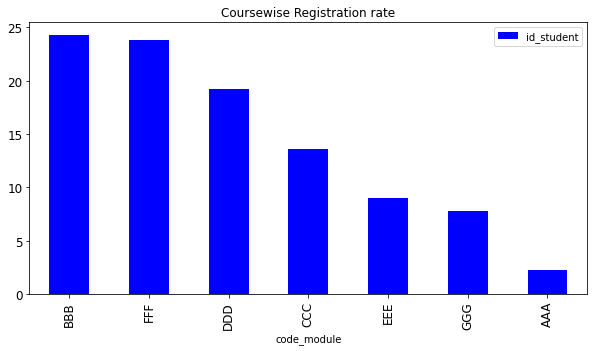

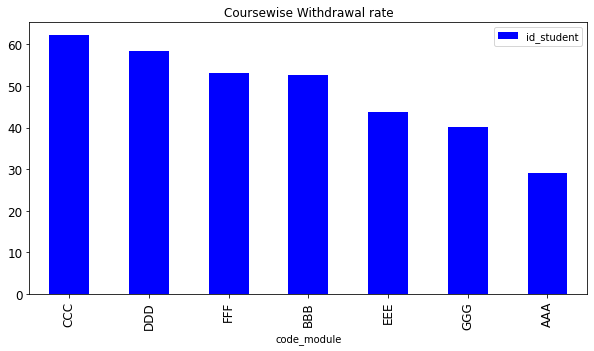

In [14]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each course
groupbyStudentRegistrationPerCourseDF = studentRegistrationDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbystudentRegistrationPerCourseDF
registrationRatePerCourseDF = (groupbyStudentRegistrationPerCourseDF / len(studentRegistrationDF)) *100
registrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate",figsize=(10,5), color="b", fontsize=12 )
#registrationRatePerCourseDF

# Check the withdrawals in each course
groupbyStudentWithdrawalPerCourseDF = unregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyunregisteredCoursesDF
#Take the ratio to find the withdrawal rate
withdrawalRatePerCourseDF = ((groupbyStudentWithdrawalPerCourseDF / groupbyStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#withdrawalRatePerCourseDF
withdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Withdrawal rate",figsize=(10,5), color="b", fontsize=12 )

#### Lets find the Year wise numbers for Registration rate and Withdrawal rate

<AxesSubplot:title={'center':'Registration rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Coursewise Withdrawal rate per Year'}, xlabel='Year'>

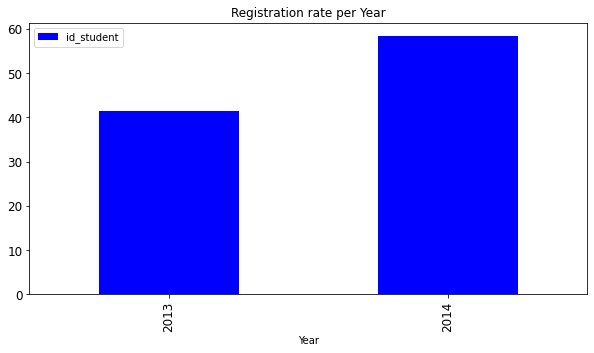

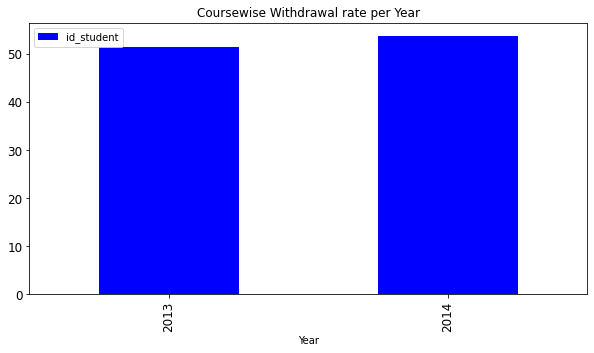

In [15]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each year
groupbyStudentRegistrationPerYearDF = studentRegistrationDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerYearDF
registrationRatePerYearDF = (groupbyStudentRegistrationPerYearDF / len(studentRegistrationDF)) *100
#registrationRatePerYearDF
registrationRatePerYearDF.plot(kind='bar', title = "Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each year
groupbyStudentWithdrawalPerYearDF = unregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
withdrawalRatePerYearDF = ((groupbyStudentWithdrawalPerYearDF / groupbyStudentRegistrationPerYearDF)*100)
#withdrawalRatePerYearDF
withdrawalRatePerYearDF.plot(kind='bar', title = "Coursewise Withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

#### Let find the Term wise Registration rate and Withdrawal rate

<AxesSubplot:title={'center':'Registration rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Withdrawal rate per Term'}, xlabel='Term'>

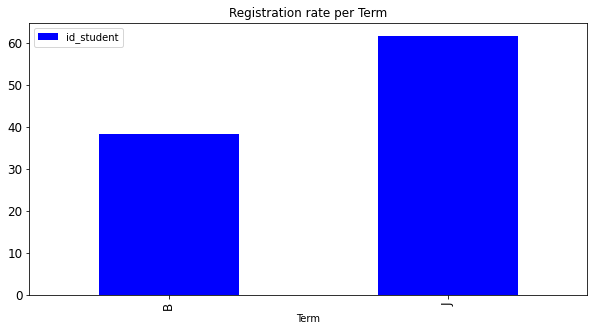

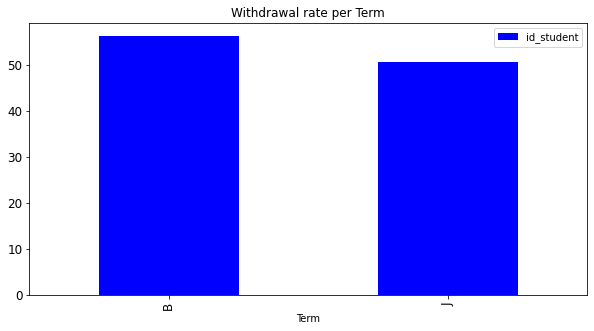

In [16]:
# <aghatpande> on 01-Nov-2017
# Check the enrollment in each Term
groupbyStudentRegistrationPerTermDF = studentRegistrationDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerTermDF
#Take the ratio to find the Registration rate per Term
registrationRatePerTermDF = (groupbyStudentRegistrationPerTermDF / len(studentRegistrationDF)) *100
#registrationRatePerTermDF
registrationRatePerTermDF.plot(kind='bar', title = "Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Term
groupbyStudentWithdrawalPerTermDF = unregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Term
withdrawalRatePerTermDF = ((groupbyStudentWithdrawalPerTermDF / groupbyStudentRegistrationPerTermDF)*100)
#withdrawalRatePerTermDF
withdrawalRatePerTermDF.plot(kind='bar', title = "Withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

In [17]:
studentRegistrationDF

code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
32588         GGG             2014J     2640965               -4.0   
32589         GGG             2014J     2645731              -23.0   
32590         GGG             2014J     2648187             -129.0   
32591         GGG             2014J     2679821              -49.0   
32592         GGG             2014J     2684003              -28.0   

       date_unregistration  Year Term  
0                      NaN  2013    J  
1                      NaN  2013    J  
2                     12.0  2013    J  
3                      NaN  2013    J  
4                      NaN  2013    J  
...                    ...   ...  ...  
32588                  NaN  2014    J  
32589                  NaN  2014    J  
32590                  NaN  2014    J  
32591                101.0  2014    J  
32592                  NaN  2014    J  

[32593 rows x 7 columns]

#### Lets find the Gender wise distribution of students

In [18]:
# <aghatpande> on 28-Oct-2017
# Sepearate out the Dataframes based on Gender
studentInfoWithStudentRegistrationsDF = pd.merge(studentRegistrationDF, studentInfoDF, how='left', on=['id_student', 'code_module', 'code_presentation','Year','Term'])
studentInfoWithStudentRegistrationsUnregisteredDF = studentInfoWithStudentRegistrationsDF[(studentInfoWithStudentRegistrationsDF.final_result=="Withdrawn") | (studentInfoWithStudentRegistrationsDF.final_result=="Fail")]
studentInfoWithStudentRegistrationsCompletedDF = studentInfoWithStudentRegistrationsDF[(studentInfoWithStudentRegistrationsDF.final_result=="Pass") | (studentInfoWithStudentRegistrationsDF.final_result=="Distinction")]


femaleRegistrationsDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF["gender"] == "F"]
maleRegistrationsDF = studentInfoWithStudentRegistrationsDF[studentInfoWithStudentRegistrationsDF["gender"] == "M"]
femaleUnregisteredCoursesDF = femaleRegistrationsDF[(femaleRegistrationsDF.final_result=="Withdrawn") | (femaleRegistrationsDF.final_result=="Fail")]
maleUnregisteredCoursesDF = maleRegistrationsDF[(maleRegistrationsDF.final_result=="Withdrawn") | (maleRegistrationsDF.final_result=="Fail")]

In [19]:
studentInfoWithStudentRegistrationsUnregisteredDF 

code_module code_presentation  id_student  date_registration  \
2             AAA             2013J       30268              -92.0   
15            AAA             2013J       65002             -180.0   
18            AAA             2013J       74372              -50.0   
22            AAA             2013J       94961             -170.0   
29            AAA             2013J      106247                5.0   
...           ...               ...         ...                ...   
32581         GGG             2014J     2456431              -70.0   
32582         GGG             2014J     2475886              -31.0   
32586         GGG             2014J     2608143              -45.0   
32588         GGG             2014J     2640965               -4.0   
32591         GGG             2014J     2679821              -49.0   

       date_unregistration  Year Term gender                region  \
2                     12.0  2013    J      F  North Western Region   
15                    96.0  2013    J      F   East Anglian Region   
18                     NaN  2013    J      M   East Anglian Region   
22                    72.0  2013    J      M          South Region   
29                   175.0  2013    J      M          South Region   
...                    ...   ...  ...    ...                   ...   
32581                  NaN  2014    J      F          South Region   
32582                  NaN  2014    J      F   East Anglian Region   
32586                 48.0  2014    J      M  East Midlands Region   
32588                  NaN  2014    J      F                 Wales   
32591                101.0  2014    J      F     South East Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
2      A Level or Equivalent   30-40%    35-55                     0   
15     A Level or Equivalent   70-80%     0-35                     0   
18     A Level or Equivalent    10-20    35-55                     0   
22        Lower Than A Level   70-80%    35-55                     0   
29          HE Qualification   80-90%    35-55                     0   
...                      ...      ...      ...                   ...   
32581     Lower Than A Level   70-80%     0-35                     0   
32582     Lower Than A Level   40-50%    35-55                     0   
32586       HE Qualification   60-70%    35-55                     0   
32588     Lower Than A Level    10-20     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   

       studied_credits disability final_result  
2                   60          Y    Withdrawn  
15                  60          N    Withdrawn  
18                 150          N         Fail  
22                  60          N    Withdrawn  
29                  60          N    Withdrawn  
...                ...        ...          ...  
32581               30          Y         Fail  
32582               90          N         Fail  
32586               30          N    Withdrawn  
32588               30          N         Fail  
32591               30          N    Withdrawn  

[17208 rows x 16 columns]

In [20]:
# <aghatpande> on 02-Nov-2017
print("Overall student enrollment in Open university is", len(studentInfoWithStudentRegistrationsDF))
print("Overall Male student population as percentage of total enrollment is")
(len(maleRegistrationsDF)+ 0.0)/len(studentInfoWithStudentRegistrationsDF) * 100

Overall student enrollment in Open university is 32593
Overall Male student population as percentage of total enrollment is


54.843064461694226

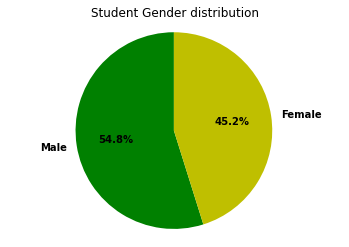

In [21]:
# <aghatpande> on 28-Oct-2017
# Using matplotlib for gender distribution pie chart
fig1, ax1 = plt.subplots()
plt.title("Student Gender distribution");
plt.pie(studentInfoWithStudentRegistrationsDF["gender"].value_counts().tolist(), colors=["g", "y"], labels=["Male", "Female"], startangle=90, autopct='%.1f%%', textprops={'weight': 'bold'});
ax1.axis('equal');

#### Lets find the overall final result for all students

<AxesSubplot:title={'center':'Final result wise Student distribution'}, xlabel='final_result'>

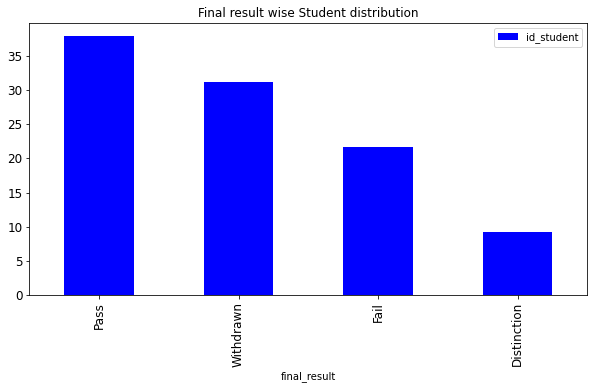

In [22]:
# <aghatpande> on 28-Oct-2017
# Check the Final result of all students
groupbyStudentRegistrationPerResultDF = studentInfoWithStudentRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyStudentRegistrationPerResultDF

studentRegistrationRatePerResultDF = (groupbyStudentRegistrationPerResultDF / len(studentInfoWithStudentRegistrationsDF)) *100
#studentRegistrationRatePerResultDF
studentRegistrationRatePerResultDF.plot(kind='bar', title = "Final result wise Student distribution",figsize=(10,5), color="b", fontsize=12 )

groupbyStudentRegistrationPerResultPerRegionDF = studentInfoWithStudentRegistrationsDF[["final_result", "region", "id_student"]].groupby(["final_result", "region"]).agg({'id_student':'count'})
#groupbyStudentRegistrationPerResultPerRegionDF

groupbyStudentRegistrationPerRegion = studentInfoWithStudentRegistrationsDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyStudentRegistrationPerRegion

finalResultPerRegionRate = (groupbyStudentRegistrationPerResultPerRegionDF / groupbyStudentRegistrationPerRegion) *100
#finalResultPerRegionRate

#### Lets find Age wise registration and withdrawal rate in Females and Males

<AxesSubplot:title={'center':'Female Age wise registration'}, xlabel='age_band'>

<AxesSubplot:title={'center':'Male Age wise registration'}, xlabel='age_band'>

<AxesSubplot:title={'center':'Female Age wise Withdrawal'}, xlabel='age_band'>

<AxesSubplot:title={'center':'Male Age wise Withdrawal'}, xlabel='age_band'>

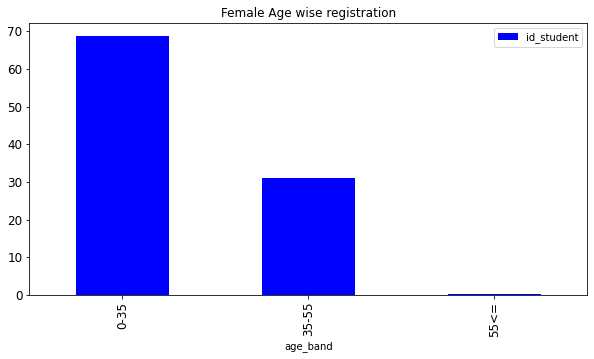

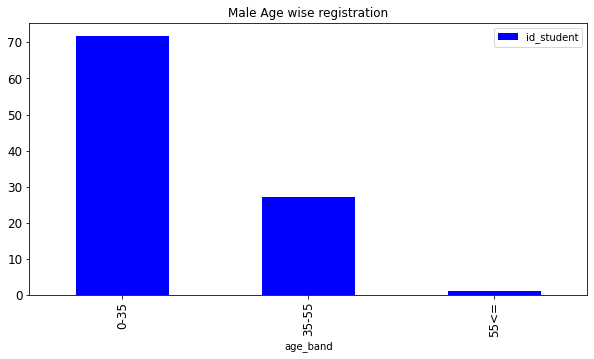

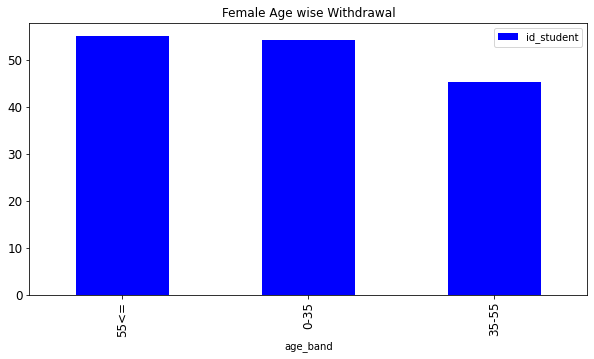

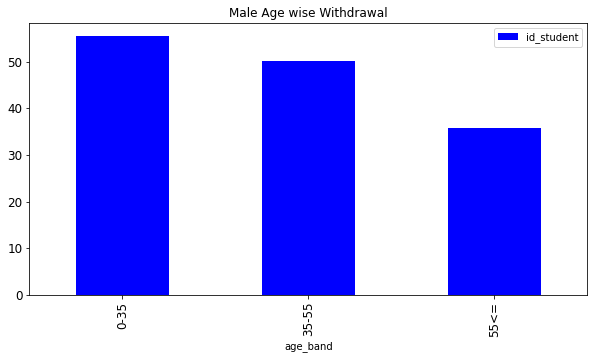

In [23]:
# <aghatpande> on 28-Oct-2017
# Check the Age wise registration of each Gender
groupbyFemaleStudentRegistrationPerAgeDF = femaleRegistrationsDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerAgeDF
groupbyMaleStudentRegistrationPerAgeDF = maleRegistrationsDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerAgeDF

femaleRegistrationRatePerAgeDF = (groupbyFemaleStudentRegistrationPerAgeDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerAgeDF
femaleRegistrationRatePerAgeDF.plot(kind='bar', title = "Female Age wise registration",figsize=(10,5), color="b", fontsize=12 )
maleRegistrationRatePerAgeDF = (groupbyMaleStudentRegistrationPerAgeDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerAgeDF
maleRegistrationRatePerAgeDF.plot(kind='bar', title = "Male Age wise registration",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawal of each Gender in each course
groupbyFemaleStudentWithdrawalPerAgeDF = femaleUnregisteredCoursesDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentWithdrawalPerAgeDF
groupbyMaleStudentWithdrawalPerAgeDF = maleUnregisteredCoursesDF[["age_band", "id_student"]].groupby(["age_band"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentWithdrawalPerAgeDF

#Take the ratio to find the withdrawal rate
femaleWithdrawalRatePerAgeDF = ((groupbyFemaleStudentWithdrawalPerAgeDF / groupbyFemaleStudentRegistrationPerAgeDF)*100).sort_values("id_student", ascending= False)
#femaleWithdrawalRatePerAgeDF
femaleWithdrawalRatePerAgeDF.plot(kind='bar', title = "Female Age wise Withdrawal",figsize=(10,5), color="b", fontsize=12 )

#Take the ratio to find the withdrawal rate
maleWithdrawalRatePerAgeDF = ((groupbyMaleStudentWithdrawalPerAgeDF / groupbyMaleStudentRegistrationPerAgeDF)*100).sort_values("id_student", ascending= False)
#maleWithdrawalRatePerAgeDF
maleWithdrawalRatePerAgeDF.plot(kind='bar', title = "Male Age wise Withdrawal",figsize=(10,5), color="b", fontsize=12 )

#### Lets find "final_result" based registration and withdrawal rates of female and male students

<AxesSubplot:title={'center':'Female result wise distribution'}, xlabel='final_result'>

<AxesSubplot:title={'center':'Male result wise distribution'}, xlabel='final_result'>

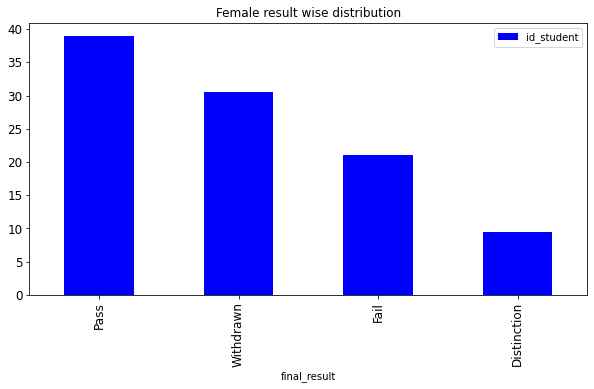

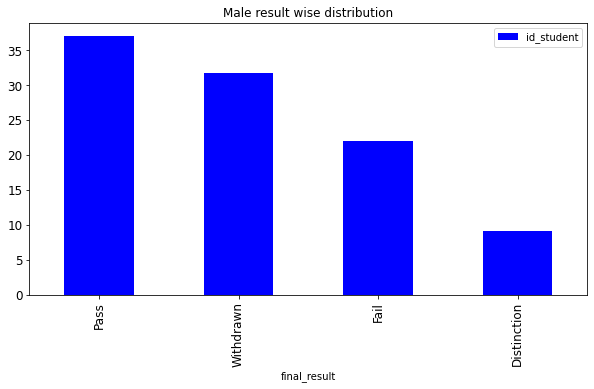

In [24]:
# <aghatpande> on 28-Oct-2017
# Check the Final result wise registration of each Gender
groupbyFemaleStudentRegistrationPerResultDF = femaleRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerResultDF
groupbyMaleStudentRegistrationPerResultDF = maleRegistrationsDF[["final_result", "id_student"]].groupby(["final_result"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerResultDF

femaleRegistrationRatePerResultDF = (groupbyFemaleStudentRegistrationPerResultDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerResultDF
femaleRegistrationRatePerResultDF.plot(kind='bar', title = "Female result wise distribution",figsize=(10,5), color="b", fontsize=12 )
maleRegistrationRatePerResultDF = (groupbyMaleStudentRegistrationPerResultDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerResultDF
maleRegistrationRatePerResultDF.plot(kind='bar', title = "Male result wise distribution",figsize=(10,5), color="b", fontsize=12 )

#### Lets find course based registration and withdrawal rate for each gender

<AxesSubplot:title={'center':'Coursewise Registration rate for females'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Registration rate for Males'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Female Withdrawal rate'}, xlabel='code_module'>

<AxesSubplot:title={'center':'Coursewise Male Withdrawal rate'}, xlabel='code_module'>

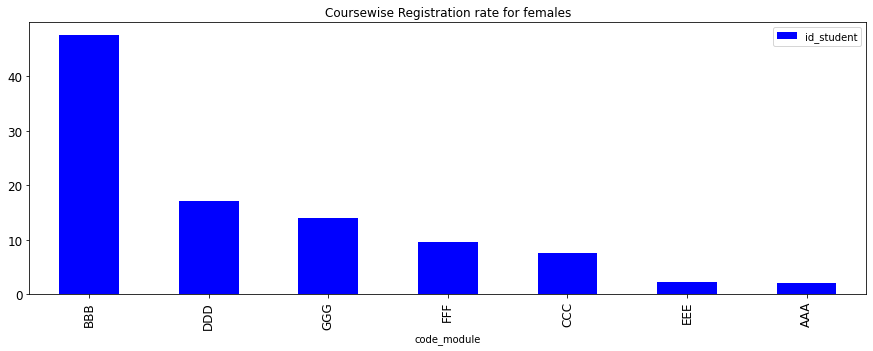

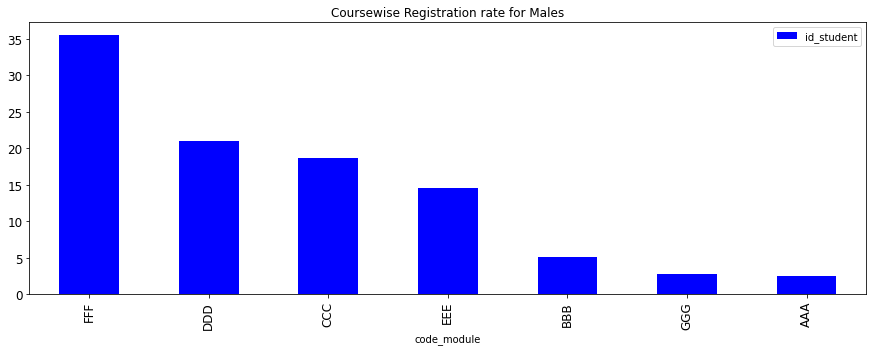

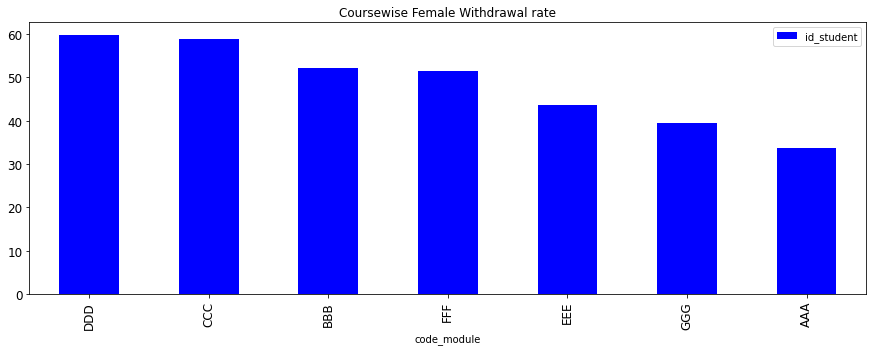

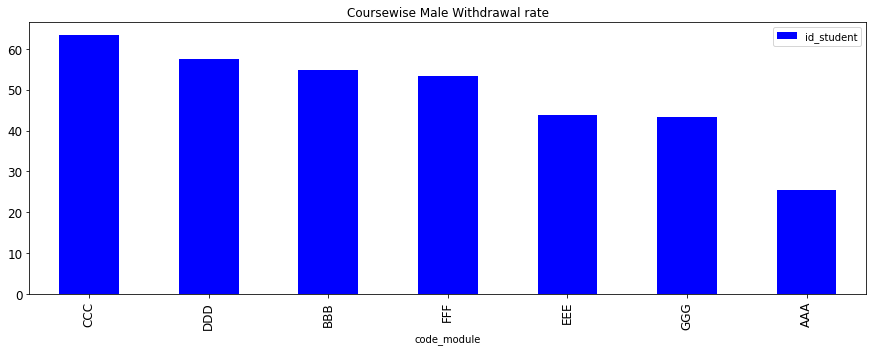

In [25]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment of each Gender in each course
groupbyFemaleStudentRegistrationPerCourseDF = femaleRegistrationsDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentRegistrationPerCourseDF
groupbyMaleStudentRegistrationPerCourseDF = maleRegistrationsDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentRegistrationPerCourseDF

femaleRegistrationRatePerCourseDF = (groupbyFemaleStudentRegistrationPerCourseDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerCourseDF
femaleRegistrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate for females",figsize=(15,5), color="b", fontsize=12 )
maleRegistrationRatePerCourseDF = (groupbyMaleStudentRegistrationPerCourseDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerCourseDF
maleRegistrationRatePerCourseDF.plot(kind='bar', title = "Coursewise Registration rate for Males",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawal of each Gender in each course
groupbyFemaleStudentWithdrawalPerCourseDF = femaleUnregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyFemaleStudentWithdrawalPerCourseDF
groupbyMaleStudentWithdrawalPerCourseDF = maleUnregisteredCoursesDF[["code_module", "id_student"]].groupby(["code_module"]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
#groupbyMaleStudentWithdrawalPerCourseDF

#Take the ratio to find the withdrawal rate
femaleWithdrawalRatePerCourseDF = ((groupbyFemaleStudentWithdrawalPerCourseDF / groupbyFemaleStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#femaleWithdrawalRatePerCourseDF
femaleWithdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Female Withdrawal rate",figsize=(15,5), color="b", fontsize=12 )

#Take the ratio to find the withdrawal rate
maleWithdrawalRatePerCourseDF = ((groupbyMaleStudentWithdrawalPerCourseDF / groupbyMaleStudentRegistrationPerCourseDF)*100).sort_values("id_student", ascending= False)
#maleWithdrawalRatePerCourseDF
maleWithdrawalRatePerCourseDF.plot(kind='bar', title = "Coursewise Male Withdrawal rate",figsize=(15,5), color="b", fontsize=12 )

#### Lets check Year wise registration and withdrawal rates for each gender

<AxesSubplot:title={'center':'Female Registration rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Male Registration rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Female withdrawal rate per Year'}, xlabel='Year'>

<AxesSubplot:title={'center':'Male withdrawal rate per Year'}, xlabel='Year'>

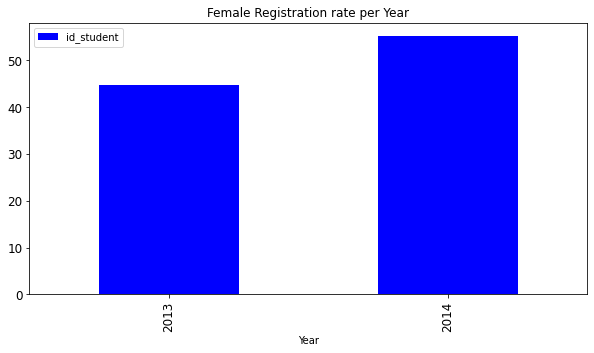

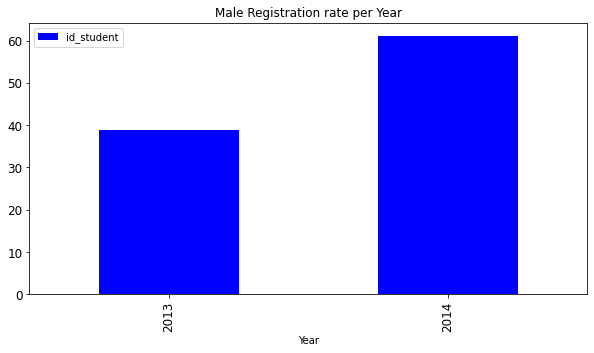

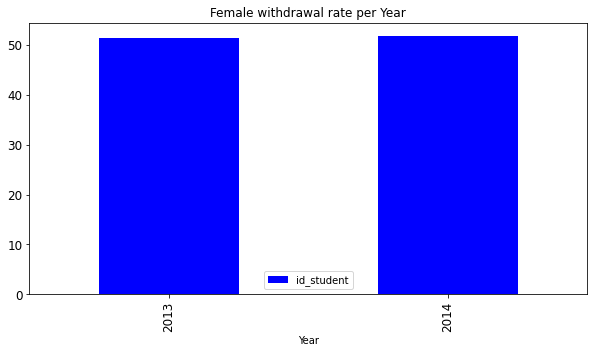

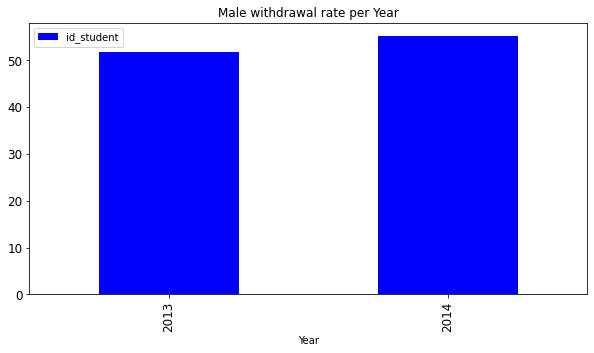

In [26]:
# <aghatpande> on 28-Oct-2017
# Check the Per year registration
groupbyFemaleStudentRegistrationPerYearDF = femaleRegistrationsDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerYearDF
femaleRegistrationRatePerYearDF = (groupbyFemaleStudentRegistrationPerYearDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerYearDF
femaleRegistrationRatePerYearDF.plot(kind='bar', title = "Female Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerYearDF = maleRegistrationsDF[["Year", "id_student"]].groupby(["Year"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerYearDF
maleRegistrationRatePerYearDF = (groupbyMaleStudentRegistrationPerYearDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerYearDF
maleRegistrationRatePerYearDF.plot(kind='bar', title = "Male Registration rate per Year",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each year
groupbyFemaleStudentWithdrawalPerYearDF = femaleUnregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
femaleWithdrawalRatePerYearDF = ((groupbyFemaleStudentWithdrawalPerYearDF / groupbyFemaleStudentRegistrationPerYearDF)*100)
#femaleWithdrawalRatePerYearDF
femaleWithdrawalRatePerYearDF.plot(kind='bar', title = "Female withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerYearDF = maleUnregisteredCoursesDF[["Year", "id_student"]].groupby("Year").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerYearDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerYearDF = ((groupbyMaleStudentWithdrawalPerYearDF / groupbyMaleStudentRegistrationPerYearDF)*100)
#maleWithdrawalRatePerYearDF
maleWithdrawalRatePerYearDF.plot(kind='bar', title = "Male withdrawal rate per Year",figsize=(10,5), color="b", fontsize=12 )

In [27]:
femaleRegistrationsDF

code_module code_presentation  id_student  date_registration  \
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
7             AAA             2013J       45642              -29.0   
...           ...               ...         ...                ...   
32588         GGG             2014J     2640965               -4.0   
32589         GGG             2014J     2645731              -23.0   
32590         GGG             2014J     2648187             -129.0   
32591         GGG             2014J     2679821              -49.0   
32592         GGG             2014J     2684003              -28.0   

       date_unregistration  Year Term gender                region  \
1                      NaN  2013    J      F              Scotland   
2                     12.0  2013    J      F  North Western Region   
3                      NaN  2013    J      F     South East Region   
4                      NaN  2013    J      F  West Midlands Region   
7                      NaN  2013    J      F  North Western Region   
...                    ...   ...  ...    ...                   ...   
32588                  NaN  2014    J      F                 Wales   
32589                  NaN  2014    J      F   East Anglian Region   
32590                  NaN  2014    J      F          South Region   
32591                101.0  2014    J      F     South East Region   
32592                  NaN  2014    J      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
1           HE Qualification   20-30%    35-55                     0   
2      A Level or Equivalent   30-40%    35-55                     0   
3      A Level or Equivalent   50-60%    35-55                     0   
4         Lower Than A Level   50-60%     0-35                     0   
7      A Level or Equivalent  90-100%     0-35                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level    10-20     0-35                     0   
32589     Lower Than A Level   40-50%    35-55                     0   
32590  A Level or Equivalent   20-30%     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   
32592       HE Qualification   50-60%    35-55                     0   

       studied_credits disability final_result  
1                   60          N         Pass  
2                   60          Y    Withdrawn  
3                   60          N         Pass  
4                   60          N         Pass  
7                  120          N         Pass  
...                ...        ...          ...  
32588               30          N         Fail  
32589               30          N  Distinction  
32590               30          Y         Pass  
32591               30          N    Withdrawn  
32592               30          N  Distinction  

[14718 rows x 16 columns]

#### Lets check registration and withdrawal rates per term for each gender

<AxesSubplot:title={'center':'Female Registration rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Male Registration rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Female withdrawal rate per Term'}, xlabel='Term'>

<AxesSubplot:title={'center':'Male withdrawal rate per Term'}, xlabel='Term'>

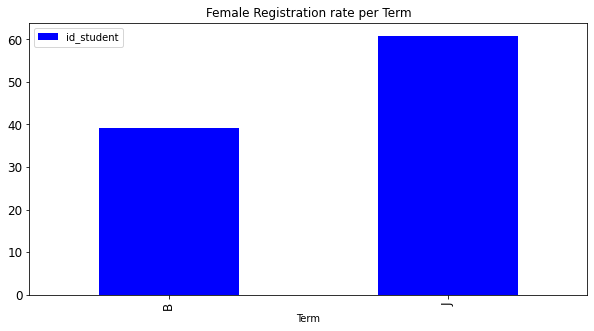

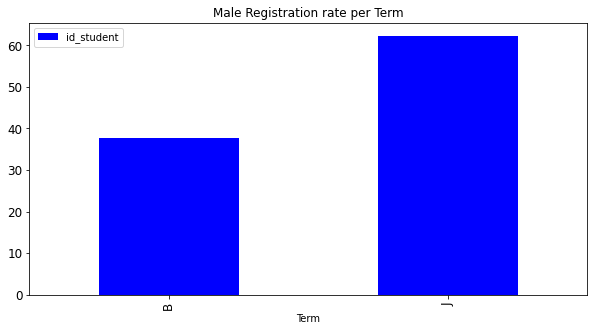

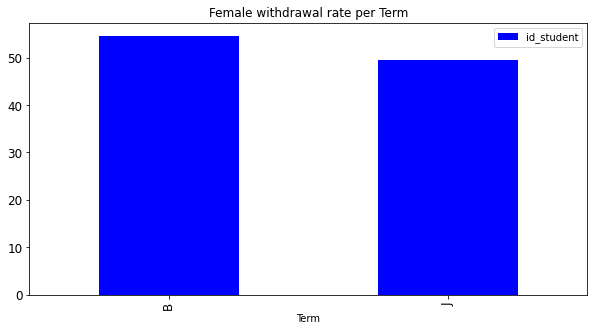

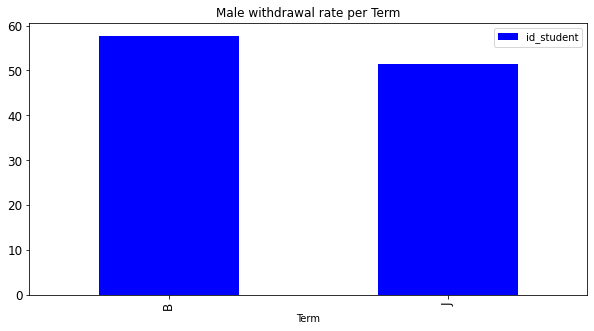

In [28]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Term of each Gender
groupbyFemaleStudentRegistrationPerTermDF = femaleRegistrationsDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerTermDF
femaleRegistrationRatePerTermDF = (groupbyFemaleStudentRegistrationPerTermDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerTermDF
femaleRegistrationRatePerTermDF.plot(kind='bar', title = "Female Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerTermDF = maleRegistrationsDF[["Term", "id_student"]].groupby(["Term"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerTermDF
maleRegistrationRatePerTermDF = (groupbyMaleStudentRegistrationPerTermDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerTermDF
maleRegistrationRatePerTermDF.plot(kind='bar', title = "Male Registration rate per Term",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Term
groupbyFemaleStudentWithdrawalPerTermDF = femaleUnregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Year
femaleWithdrawalRatePerTermDF = ((groupbyFemaleStudentWithdrawalPerTermDF / groupbyFemaleStudentRegistrationPerTermDF)*100)
#femaleWithdrawalRatePerTermDF
femaleWithdrawalRatePerTermDF.plot(kind='bar', title = "Female withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerTermDF = maleUnregisteredCoursesDF[["Term", "id_student"]].groupby("Term").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerTermDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerTermDF = ((groupbyMaleStudentWithdrawalPerTermDF / groupbyMaleStudentRegistrationPerTermDF)*100)
#maleWithdrawalRatePerTermDF
maleWithdrawalRatePerTermDF.plot(kind='bar', title = "Male withdrawal rate per Term",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate as per Education level for each gender

<AxesSubplot:title={'center':'Female Registration rate per Education'}, xlabel='highest_education'>

<AxesSubplot:title={'center':'Male Registration rate per Education'}, xlabel='highest_education'>

<AxesSubplot:title={'center':'Female withdrawal rate per Education'}, xlabel='highest_education'>

<AxesSubplot:title={'center':'Male withdrawal rate per Education'}, xlabel='highest_education'>

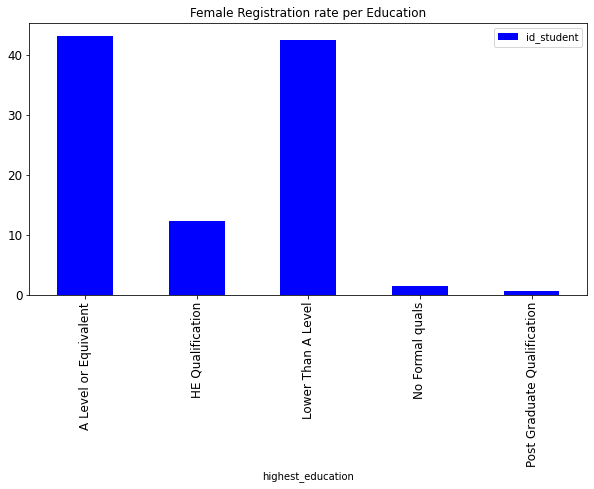

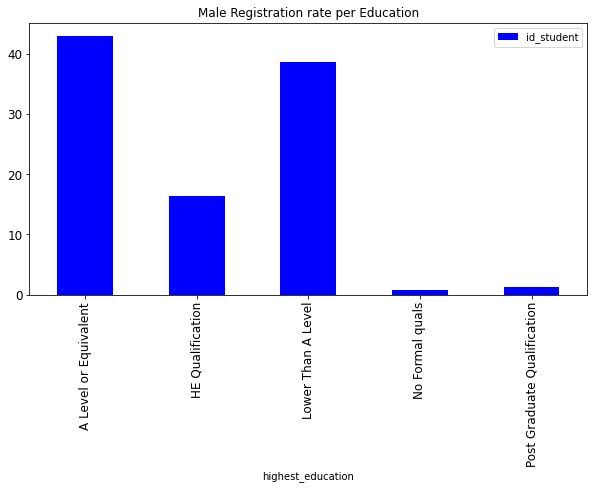

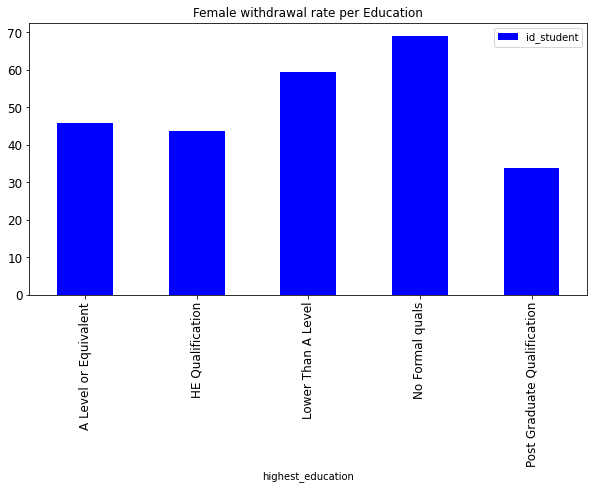

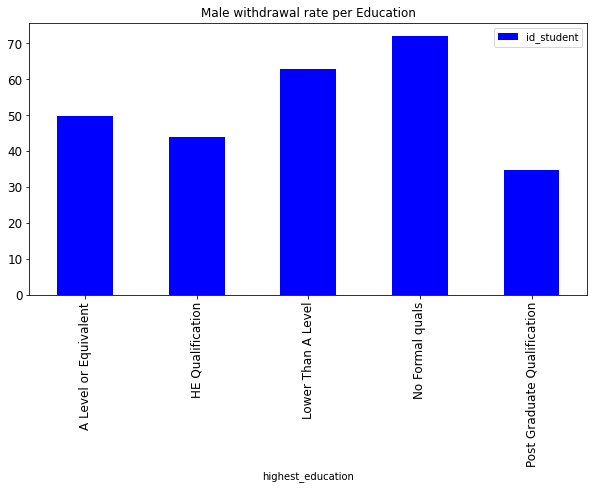

In [29]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Education
groupbyFemaleStudentRegistrationPerEducationDF = femaleRegistrationsDF[["highest_education", "id_student"]].groupby(["highest_education"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerEducationDF
femaleRegistrationRatePerEducationDF = (groupbyFemaleStudentRegistrationPerEducationDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerEducationDF
femaleRegistrationRatePerEducationDF.plot(kind='bar', title = "Female Registration rate per Education",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerEducationDF = maleRegistrationsDF[["highest_education", "id_student"]].groupby(["highest_education"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerEducationDF
maleRegistrationRatePerEducationDF = (groupbyMaleStudentRegistrationPerEducationDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerEducationDF
maleRegistrationRatePerEducationDF.plot(kind='bar', title = "Male Registration rate per Education",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Education
groupbyFemaleStudentWithdrawalPerEducationDF = femaleUnregisteredCoursesDF[["highest_education", "id_student"]].groupby("highest_education").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerEducationDF
#Take the ratio to find the withdrawal rate per Education level
femaleWithdrawalRatePerEducationDF = ((groupbyFemaleStudentWithdrawalPerEducationDF / groupbyFemaleStudentRegistrationPerEducationDF)*100)
#femaleWithdrawalRatePerEducationDF
femaleWithdrawalRatePerEducationDF.plot(kind='bar', title = "Female withdrawal rate per Education",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerEducationDF = maleUnregisteredCoursesDF[["highest_education", "id_student"]].groupby("highest_education").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerEducationDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerEducationDF = ((groupbyMaleStudentWithdrawalPerEducationDF / groupbyMaleStudentRegistrationPerEducationDF)*100)
#maleWithdrawalRatePerEducationDF
maleWithdrawalRatePerEducationDF.plot(kind='bar', title = "Male withdrawal rate per Education",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per imd_band 

<AxesSubplot:title={'center':'Female Registration rate per imd_band'}, xlabel='imd_band'>

<AxesSubplot:title={'center':'Male Registration rate per imd_band'}, xlabel='imd_band'>

<AxesSubplot:title={'center':'Female withdrawal rate per imd_band'}, xlabel='imd_band'>

<AxesSubplot:title={'center':'Male withdrawal rate per imd_band'}, xlabel='imd_band'>

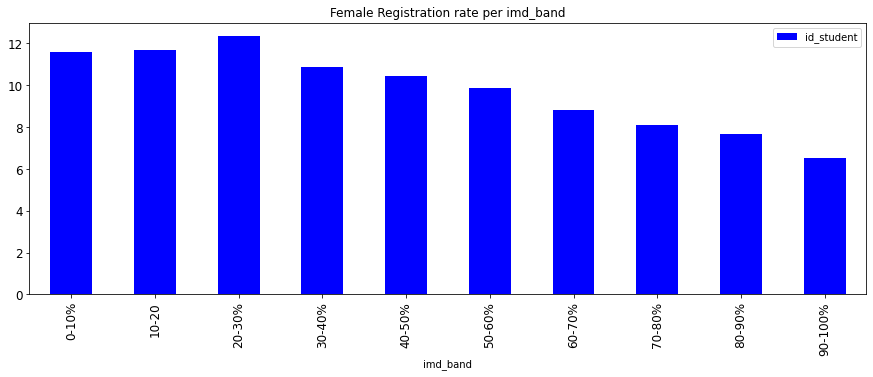

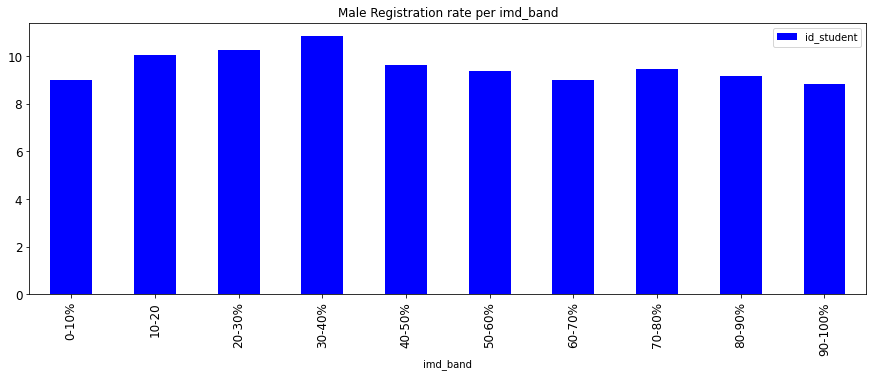

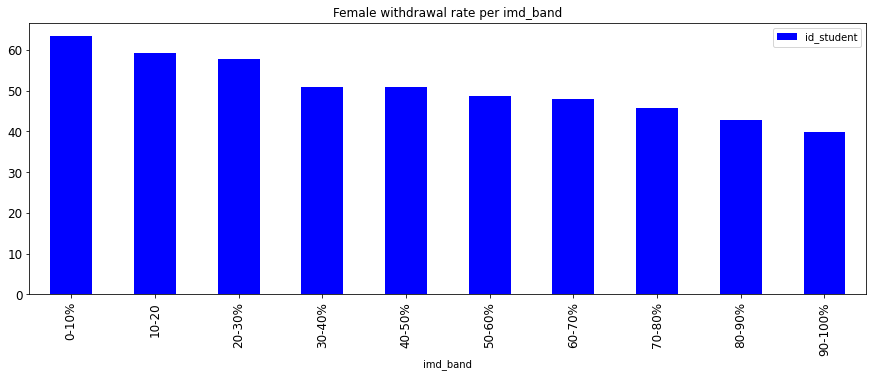

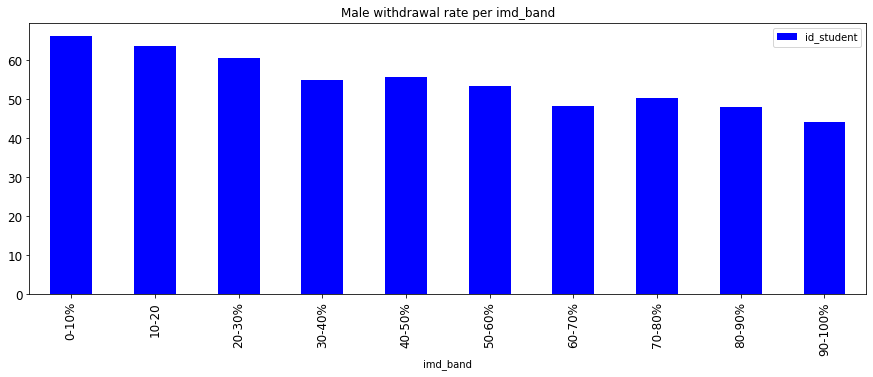

In [30]:
# <aghatpande> on 02-Nov-2017
# Check the enrollment in each imd_band
groupbyFemaleStudentRegistrationPerIMDDF = femaleRegistrationsDF[["imd_band", "id_student"]].groupby(["imd_band"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerIMDDF
femaleRegistrationRatePerIMDDF = (groupbyFemaleStudentRegistrationPerIMDDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerIMDDF
femaleRegistrationRatePerIMDDF.plot(kind='bar', title = "Female Registration rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerIMDDF = maleRegistrationsDF[["imd_band", "id_student"]].groupby(["imd_band"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerIMDDF
maleRegistrationRatePerIMDDF = (groupbyMaleStudentRegistrationPerIMDDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerIMDDF
maleRegistrationRatePerIMDDF.plot(kind='bar', title = "Male Registration rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawals in each Education
groupbyFemaleStudentWithdrawalPerIMDDF = femaleUnregisteredCoursesDF[["imd_band", "id_student"]].groupby("imd_band").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerIMDDF
#Take the ratio to find the withdrawal rate per Education level
femaleWithdrawalRatePerIMDDF = ((groupbyFemaleStudentWithdrawalPerIMDDF / groupbyFemaleStudentRegistrationPerIMDDF )*100)
#femaleWithdrawalRatePerIMDDF
femaleWithdrawalRatePerIMDDF.plot(kind='bar', title = "Female withdrawal rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerIMDDF = maleUnregisteredCoursesDF[["imd_band", "id_student"]].groupby("imd_band").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerIMDDF
#Take the ratio to find the withdrawal rate per Year
maleWithdrawalRatePerIMDDF = ((groupbyMaleStudentWithdrawalPerIMDDF / groupbyMaleStudentRegistrationPerIMDDF)*100)
#maleWithdrawalRatePerIMDDF
maleWithdrawalRatePerIMDDF.plot(kind='bar', title = "Male withdrawal rate per imd_band",figsize=(15,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per Disability

<AxesSubplot:title={'center':'Female Registration rate per Disability'}, xlabel='disability'>

<AxesSubplot:title={'center':'Male Registration rate per Disability'}, xlabel='disability'>

<AxesSubplot:title={'center':'Female withdrawal rate per disability'}, xlabel='disability'>

<AxesSubplot:title={'center':'Male withdrawal rate per disability'}, xlabel='disability'>

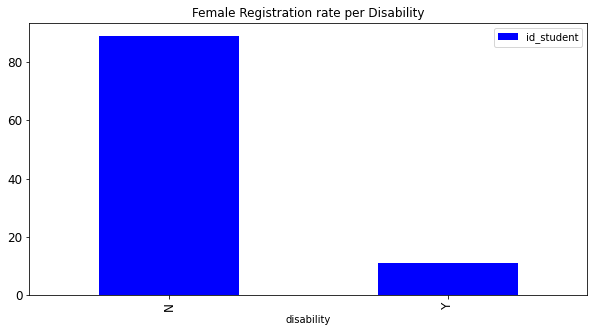

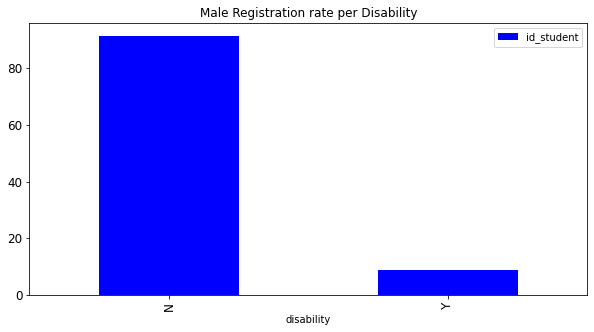

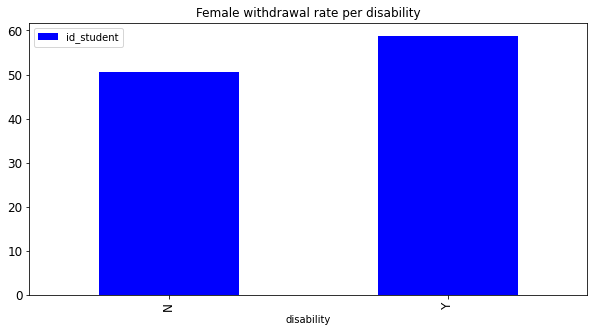

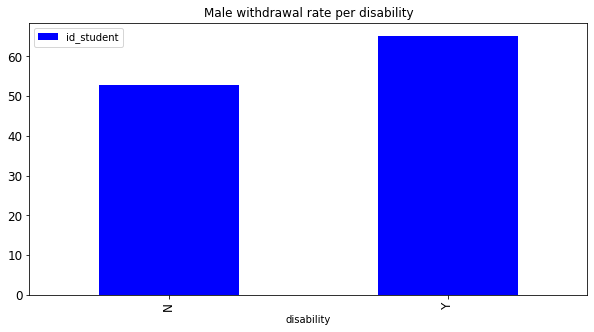

In [31]:
# <aghatpande> on 28-Oct-2017
# Check the enrollment in each Disability
groupbyFemaleStudentRegistrationPerDisabilityDF = femaleRegistrationsDF[["disability", "id_student"]].groupby(["disability"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerDisabilityDF
femaleRegistrationRatePerDisabilityDF = (groupbyFemaleStudentRegistrationPerDisabilityDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerDisabilityDF
femaleRegistrationRatePerDisabilityDF.plot(kind='bar', title = "Female Registration rate per Disability",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerDisabilityDF = maleRegistrationsDF[["disability", "id_student"]].groupby(["disability"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerDisabilityDF
maleRegistrationRatePerDisabilityDF = (groupbyMaleStudentRegistrationPerDisabilityDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerDisabilityDF
maleRegistrationRatePerDisabilityDF.plot(kind='bar', title = "Male Registration rate per Disability",figsize=(10,5), color="b", fontsize=12 )

# Check the withdrawals in each Disability
groupbyFemaleStudentWithdrawalPerDisabilityDF = femaleUnregisteredCoursesDF[["disability", "id_student"]].groupby("disability").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerDisabilityDF
#Take the ratio to find the withdrawal rate per Disability
femaleWithdrawalRatePerDisabilityDF = ((groupbyFemaleStudentWithdrawalPerDisabilityDF / groupbyFemaleStudentRegistrationPerDisabilityDF)*100)
#femaleWithdrawalRatePerDisabilityDF
femaleWithdrawalRatePerDisabilityDF.plot(kind='bar', title = "Female withdrawal rate per disability",figsize=(10,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerDisabilityDF = maleUnregisteredCoursesDF[["disability", "id_student"]].groupby("disability").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerDisabilityDF
#Take the ratio to find the withdrawal rate per Disability
maleWithdrawalRatePerDisabilityDF = ((groupbyMaleStudentWithdrawalPerDisabilityDF / groupbyMaleStudentRegistrationPerDisabilityDF)*100)
#maleWithdrawalRatePerDisabilityDF
maleWithdrawalRatePerDisabilityDF.plot(kind='bar', title = "Male withdrawal rate per disability",figsize=(10,5), color="b", fontsize=12 )

#### Lets analyze the registration rate and withdrawal rate per gender as per geograhical region

<AxesSubplot:title={'center':'Female Registration rate per Region'}, xlabel='region'>

<AxesSubplot:title={'center':'Male Registration rate per Region'}, xlabel='region'>

<AxesSubplot:title={'center':'Female withdrawal rate per Region'}, xlabel='region'>

<AxesSubplot:title={'center':'Male withdrawal rate per Region'}, xlabel='region'>

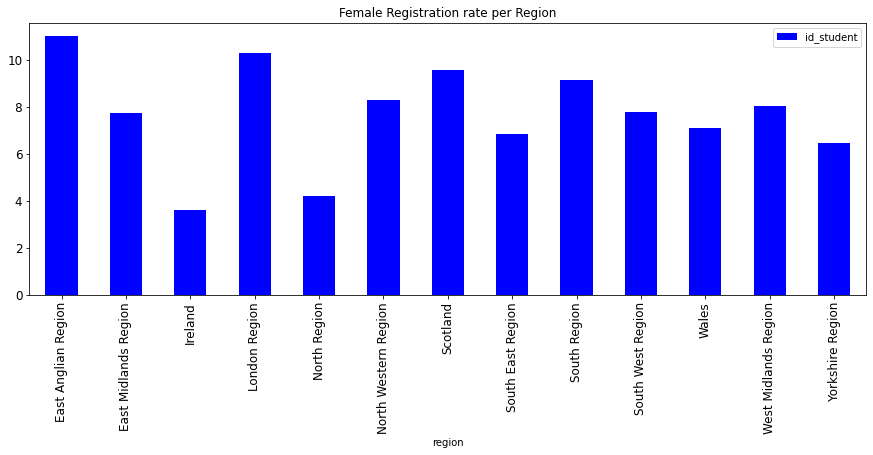

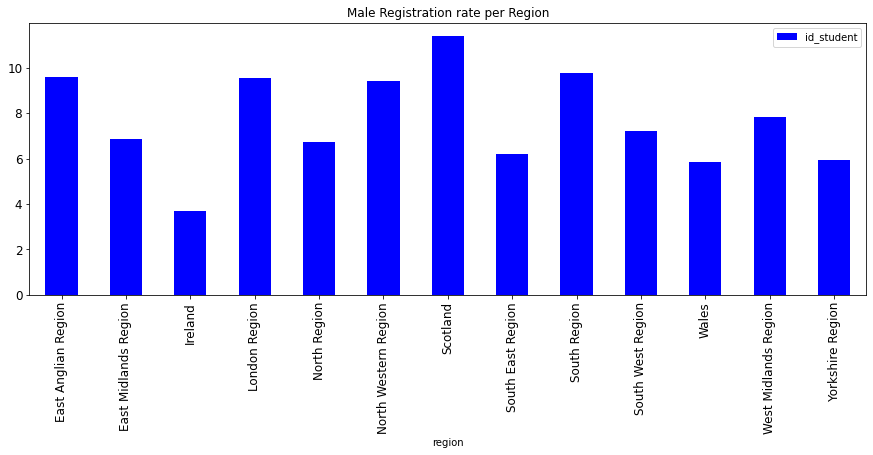

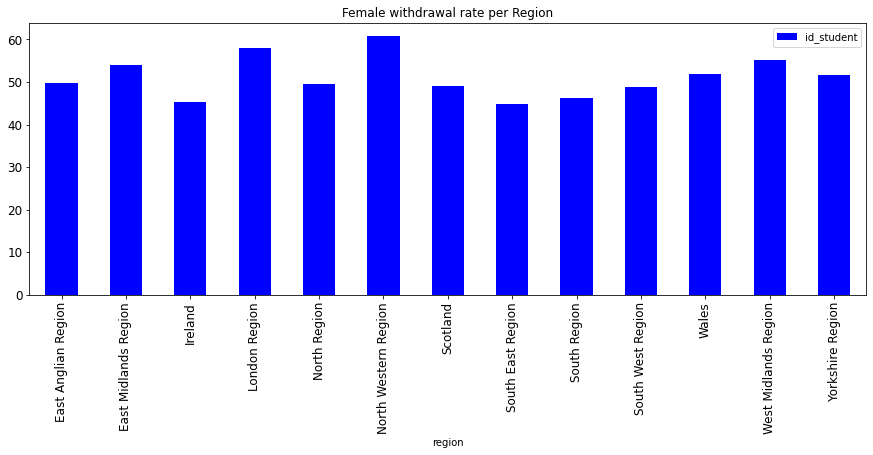

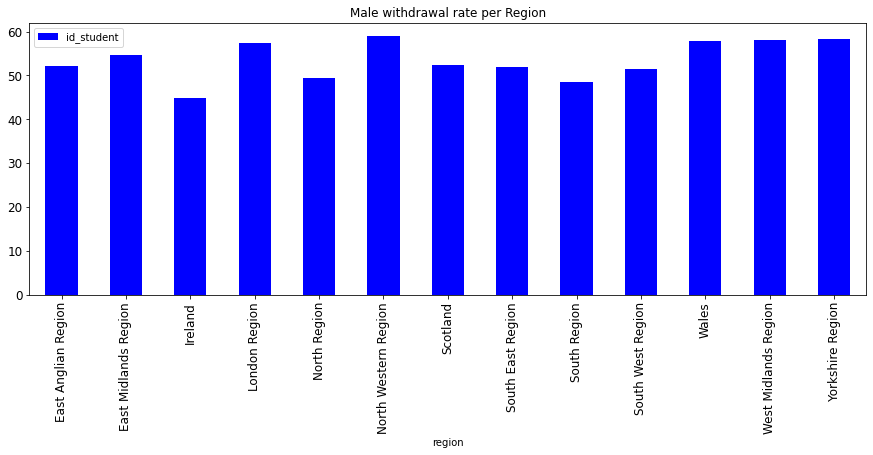

In [32]:
# <aghatpande> on 02-Nov-2017
# Check the enrollment in each region
groupbyFemaleStudentRegistrationPerRegionDF = femaleRegistrationsDF[["region", "id_student"]].groupby(["region"]).agg({'id_student':'count'})
#groupbyFemaleStudentRegistrationPerRegionDF
femaleRegistrationRatePerRegionDF = (groupbyFemaleStudentRegistrationPerRegionDF / len(femaleRegistrationsDF)) *100
#femaleRegistrationRatePerRegionDF
femaleRegistrationRatePerRegionDF.plot(kind='bar', title = "Female Registration rate per Region",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentRegistrationPerRegionDF = maleRegistrationsDF[["region", "id_student"]].groupby(["region"]).agg({'id_student':'count'})
#groupbyMaleStudentRegistrationPerRegionDF
maleRegistrationRatePerRegionDF = (groupbyMaleStudentRegistrationPerRegionDF / len(maleRegistrationsDF)) *100
#maleRegistrationRatePerRegionDF
maleRegistrationRatePerRegionDF.plot(kind='bar', title = "Male Registration rate per Region",figsize=(15,5), color="b", fontsize=12 )

# Check the withdrawals in each Region
groupbyFemaleStudentWithdrawalPerRegionDF = femaleUnregisteredCoursesDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyFemaleStudentWithdrawalPerRegionDF
#Take the ratio to find the withdrawal rate per Region
femaleWithdrawalRatePerRegionDF = ((groupbyFemaleStudentWithdrawalPerRegionDF / groupbyFemaleStudentRegistrationPerRegionDF)*100)
#femaleWithdrawalRatePerRegionDF
femaleWithdrawalRatePerRegionDF.plot(kind='bar', title = "Female withdrawal rate per Region",figsize=(15,5), color="b", fontsize=12 )

groupbyMaleStudentWithdrawalPerRegionDF = maleUnregisteredCoursesDF[["region", "id_student"]].groupby("region").agg({'id_student':'count'})
#groupbyMaleStudentWithdrawalPerRegionDF
#Take the ratio to find the withdrawal rate per Region
maleWithdrawalRatePerRegionDF = ((groupbyMaleStudentWithdrawalPerRegionDF / groupbyMaleStudentRegistrationPerRegionDF)*100)
#maleWithdrawalRatePerRegionDF
maleWithdrawalRatePerRegionDF.plot(kind='bar', title = "Male withdrawal rate per Region",figsize=(15,5), color="b", fontsize=12 )

#### Lets do analysis on student VLE interactions
# VLE 데이터 전처리

In [33]:
# <aghatpande> on 02-Nov-2017
# Merge the StudentVLE with VLEInfo to find the impact of clicks on withdrawal
studentVLEInteractionDF = pd.merge(studentVleDF, vleDF, how='left', on=['id_site', 'code_module', 'code_presentation'])
studentVLEInteractionWithStudentRegistrationAndInfoDF = pd.merge(studentVLEInteractionDF, studentInfoWithStudentRegistrationsDF, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [34]:
studentInfoWithStudentRegistrationsDF

code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
32588         GGG             2014J     2640965               -4.0   
32589         GGG             2014J     2645731              -23.0   
32590         GGG             2014J     2648187             -129.0   
32591         GGG             2014J     2679821              -49.0   
32592         GGG             2014J     2684003              -28.0   

       date_unregistration  Year Term gender                region  \
0                      NaN  2013    J      M   East Anglian Region   
1                      NaN  2013    J      F              Scotland   
2                     12.0  2013    J      F  North Western Region   
3                      NaN  2013    J      F     South East Region   
4                      NaN  2013    J      F  West Midlands Region   
...                    ...   ...  ...    ...                   ...   
32588                  NaN  2014    J      F                 Wales   
32589                  NaN  2014    J      F   East Anglian Region   
32590                  NaN  2014    J      F          South Region   
32591                101.0  2014    J      F     South East Region   
32592                  NaN  2014    J      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1           HE Qualification   20-30%    35-55                     0   
2      A Level or Equivalent   30-40%    35-55                     0   
3      A Level or Equivalent   50-60%    35-55                     0   
4         Lower Than A Level   50-60%     0-35                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level    10-20     0-35                     0   
32589     Lower Than A Level   40-50%    35-55                     0   
32590  A Level or Equivalent   20-30%     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   
32592       HE Qualification   50-60%    35-55                     0   

       studied_credits disability final_result  
0                  240          N         Pass  
1                   60          N         Pass  
2                   60          Y    Withdrawn  
3                   60          N         Pass  
4                   60          N         Pass  
...                ...        ...          ...  
32588               30          N         Fail  
32589               30          N  Distinction  
32590               30          Y         Pass  
32591               30          N    Withdrawn  
32592               30          N  Distinction  

[32593 rows x 16 columns]

In [35]:
studentVLEInteractionWithStudentRegistrationAndInfoDF 

code_module code_presentation  id_student  id_site  date  sum_click  \
0                AAA             2013J       28400   546652   -10          4   
1                AAA             2013J       28400   546652   -10          1   
2                AAA             2013J       28400   546652   -10          1   
3                AAA             2013J       28400   546614   -10         11   
4                AAA             2013J       28400   546714   -10          1   
...              ...               ...         ...      ...   ...        ...   
10655275         GGG             2014J      675811   896943   269          3   
10655276         GGG             2014J      675578   896943   269          1   
10655277         GGG             2014J      654064   896943   269          3   
10655278         GGG             2014J      654064   896939   269          1   
10655279         GGG             2014J      654064   896939   269          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10655275      homepage        NaN      NaN              -63.0   
10655276      homepage        NaN      NaN              -32.0   
10655277      homepage        NaN      NaN              -16.0   
10655278       forumng        NaN      NaN              -16.0   
10655279       forumng        NaN      NaN              -16.0   

          date_unregistration  Year Term gender               region  \
0                         NaN  2013    J      F             Scotland   
1                         NaN  2013    J      F             Scotland   
2                         NaN  2013    J      F             Scotland   
3                         NaN  2013    J      F             Scotland   
4                         NaN  2013    J      F             Scotland   
...                       ...   ...  ...    ...                  ...   
10655275                  NaN  2014    J      F  East Anglian Region   
10655276                  NaN  2014    J      F  East Anglian Region   
10655277                  NaN  2014    J      F             Scotland   
10655278                  NaN  2014    J      F             Scotland   
10655279                  NaN  2014    J      F             Scotland   

              highest_education imd_band age_band  num_of_prev_attempts  \
0              HE Qualification   20-30%    35-55                     0   
1              HE Qualification   20-30%    35-55                     0   
2              HE Qualification   20-30%    35-55                     0   
3              HE Qualification   20-30%    35-55                     0   
4              HE Qualification   20-30%    35-55                     0   
...                         ...      ...      ...                   ...   
10655275     Lower Than A Level   60-70%    35-55                     0   
10655276     Lower Than A Level   50-60%    35-55                     0   
10655277  A Level or Equivalent   40-50%     0-35                     0   
10655278  A Level or Equivalent   40-50%     0-35                     0   
10655279  A Level or Equivalent   40-50%     0-35                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10655275               30          N  Distinction  
10655276               30          N         Pass  
10655277               30        

In [36]:
# <aghatpande> on 02-Nov-2017
# Lets seperate out different dataframes so that they can be used further in the code
femaleVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.gender == 'F']
maleVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.gender == 'M']
withdrawnFemaleVLEDF = femaleVLEDF[(femaleVLEDF.final_result=="Fail") | (femaleVLEDF.final_result=="Withdrawn")]
completedFemaleVLEDF = femaleVLEDF[(femaleVLEDF.final_result=="Pass") | (femaleVLEDF.final_result=="Distinction")]
withdrawnMaleVLEDF = maleVLEDF[(maleVLEDF.final_result=="Fail") | (maleVLEDF.final_result=="Withdrawn")]
completedMaleVLEDF = maleVLEDF[(maleVLEDF.final_result=="Pass") | (maleVLEDF.final_result=="Distinction")]

In [37]:
# <aghatpande> on 02-Nov-2017
# The Dataframes for overall course withdrawal and completion with StudentVLE information
courseWithdrawnVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[(studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Fail") | (studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Withdrawn")]
courseCompletedVLEDF = studentVLEInteractionWithStudentRegistrationAndInfoDF[(studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Pass") | (studentVLEInteractionWithStudentRegistrationAndInfoDF.final_result=="Distinction")]

In [38]:
courseWithdrawnVLEDF

code_module code_presentation  id_student  id_site  date  sum_click  \
14               AAA             2013J       30268   546652   -10          3   
15               AAA             2013J       30268   546662   -10          2   
16               AAA             2013J       30268   546614   -10          3   
17               AAA             2013J       30268   546652   -10          2   
108              AAA             2013J       65002   546614   -10          3   
...              ...               ...         ...      ...   ...        ...   
10655195         GGG             2014J      674939   897082   265          2   
10655198         GGG             2014J      642879   896943   265          2   
10655232         GGG             2014J      568852   896943   267          1   
10655258         GGG             2014J      602360   896943   268          3   
10655259         GGG             2014J      629258   896943   269          2   

         activity_type  week_from  week_to  date_registration  \
14             forumng        NaN      NaN              -92.0   
15           oucontent        NaN      NaN              -92.0   
16            homepage        NaN      NaN              -92.0   
17             forumng        NaN      NaN              -92.0   
108           homepage        NaN      NaN             -180.0   
...                ...        ...      ...                ...   
10655195      resource        NaN      NaN              -21.0   
10655198      homepage        NaN      NaN              -66.0   
10655232      homepage        NaN      NaN              -94.0   
10655258      homepage        NaN      NaN              -18.0   
10655259      homepage        NaN      NaN               -3.0   

          date_unregistration  Year Term gender                region  \
14                       12.0  2013    J      F  North Western Region   
15                       12.0  2013    J      F  North Western Region   
16                       12.0  2013    J      F  North Western Region   
17                       12.0  2013    J      F  North Western Region   
108                      96.0  2013    J      F   East Anglian Region   
...                       ...   ...  ...    ...                   ...   
10655195                  NaN  2014    J      F  West Midlands Region   
10655198                  NaN  2014    J      F         London Region   
10655232                  NaN  2014    J      F          South Region   
10655258                  NaN  2014    J      F      Yorkshire Region   
10655259                  NaN  2014    J      F         London Region   

              highest_education imd_band age_band  num_of_prev_attempts  \
14        A Level or Equivalent   30-40%    35-55                     0   
15        A Level or Equivalent   30-40%    35-55                     0   
16        A Level or Equivalent   30-40%    35-55                     0   
17        A Level or Equivalent   30-40%    35-55                     0   
108       A Level or Equivalent   70-80%     0-35                     0   
...                         ...      ...      ...                   ...   
10655195  A Level or Equivalent   70-80%     0-35                     0   
10655198     Lower Than A Level   20-30%     0-35                     0   
10655232     Lower Than A Level   30-40%    35-55                     0   
10655258  A Level or Equivalent    0-10%     0-35                     2   
10655259  A Level or Equivalent    10-20    35-55                     1   

          studied_credits disability final_result  
14                     60          Y    Withdrawn  
15                     60          Y    Withdrawn  
16                     60          Y    Withdrawn  
17                     60          Y    Withdrawn  
108                    60          N    Withdrawn  
...                   ...        ...          ...  
10655195               30          N         Fail  
10655198               30          Y         Fail  
10655232             

In [39]:
courseCompletedVLEDF

code_module code_presentation  id_student  id_site  date  sum_click  \
0                AAA             2013J       28400   546652   -10          4   
1                AAA             2013J       28400   546652   -10          1   
2                AAA             2013J       28400   546652   -10          1   
3                AAA             2013J       28400   546614   -10         11   
4                AAA             2013J       28400   546714   -10          1   
...              ...               ...         ...      ...   ...        ...   
10655275         GGG             2014J      675811   896943   269          3   
10655276         GGG             2014J      675578   896943   269          1   
10655277         GGG             2014J      654064   896943   269          3   
10655278         GGG             2014J      654064   896939   269          1   
10655279         GGG             2014J      654064   896939   269          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10655275      homepage        NaN      NaN              -63.0   
10655276      homepage        NaN      NaN              -32.0   
10655277      homepage        NaN      NaN              -16.0   
10655278       forumng        NaN      NaN              -16.0   
10655279       forumng        NaN      NaN              -16.0   

          date_unregistration  Year Term gender               region  \
0                         NaN  2013    J      F             Scotland   
1                         NaN  2013    J      F             Scotland   
2                         NaN  2013    J      F             Scotland   
3                         NaN  2013    J      F             Scotland   
4                         NaN  2013    J      F             Scotland   
...                       ...   ...  ...    ...                  ...   
10655275                  NaN  2014    J      F  East Anglian Region   
10655276                  NaN  2014    J      F  East Anglian Region   
10655277                  NaN  2014    J      F             Scotland   
10655278                  NaN  2014    J      F             Scotland   
10655279                  NaN  2014    J      F             Scotland   

              highest_education imd_band age_band  num_of_prev_attempts  \
0              HE Qualification   20-30%    35-55                     0   
1              HE Qualification   20-30%    35-55                     0   
2              HE Qualification   20-30%    35-55                     0   
3              HE Qualification   20-30%    35-55                     0   
4              HE Qualification   20-30%    35-55                     0   
...                         ...      ...      ...                   ...   
10655275     Lower Than A Level   60-70%    35-55                     0   
10655276     Lower Than A Level   50-60%    35-55                     0   
10655277  A Level or Equivalent   40-50%     0-35                     0   
10655278  A Level or Equivalent   40-50%     0-35                     0   
10655279  A Level or Equivalent   40-50%     0-35                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10655275               30          N  Distinction  
10655276               30          N         Pass  
10655277               30        

In [40]:
# Store the local copy of these Dataframes, so that we dont have to compute it again.

courseCompletedVLEDF.to_csv("Created-Dataframes\\courseCompletedVLEDF.csv")
courseWithdrawnVLEDF.to_csv("Created-Dataframes\\courseWithdrawnVLEDF.csv")
#femaleVLEDF.to_csv("Created-Dataframes\\femaleVLEDF.csv")
#maleVLEDF.to_csv("Created-Dataframes\\maleVLEDF.csv")
#withdrawnFemaleVLEDF.to_csv("Created-Dataframes\\femaleWithdrawnVLEDF.csv")
#completedFemaleVLEDF.to_csv("Created-Dataframes\\femaleCompletedVLEDF.csv")
#withdrawnMaleVLEDF.to_csv("Created-Dataframes\\maleWithdrawnVLEDF.csv")
#completedMaleVLEDF.to_csv("Created-Dataframes\\maleCompletedVLEDF.csv")

In [41]:
# <aghatpande> on 02-Nov-2017
# Calculate the total clicks per code_module
groupbyCourseCompletedVLEDF = courseCompletedVLEDF.groupby(["code_module","activity_type"]).agg({'sum_click':'sum'})
groupbyCourseWithdrawnVLEDF = courseWithdrawnVLEDF.groupby(["code_module","activity_type"]).agg({'sum_click':'sum'})

In [42]:
groupbyCourseCompletedVLEDF

sum_click
code_module activity_type            
AAA         dataplus             3036
            forumng            292767
            glossary              480
            homepage           230844
            oucollaborate         377
            oucontent          452445
            resource            12437
            subpage             60190
            url                 24621
BBB         forumng           1745041
            glossary             7774
            homepage           914757
            oucollaborate       10835
            oucontent          804474
            ouelluminate         1078
            questionnaire        6370
            quiz               370833
            resource           163252
            sharedsubpage         106
            subpage            207479
            url                 64505
CCC         forumng            519803
            homepage           555470
            oucollaborate        7756
            oucontent          363535
            page                 3738
            quiz              1644211
            resource           153971
            subpage            247494
            url                 19087
DDD         externalquiz        47888
            forumng           1165125
            glossary            52597
            homepage          1047009
            oucollaborate       43847
            oucontent          440682
            ouelluminate         9813
            ouwiki             205146
            page                  741
            resource           214615
            subpage            711983
            url                116016
EEE         dualpane             3625
            forumng            711106
            homepage           564060
            oucollaborate        5758
            oucontent         1288982
            ouwiki             436071
            page                  824
            quiz               248746
            resource            46321
            subpage             69045
            url                 80946
FFF         dataplus            42306
            dualpane            13385
            folder               4898
            forumng           1863241
            glossary             5304
            homepage          1937298
            htmlactivity         5888
            oucollaborate       20009
            oucontent         5439529
            ouelluminate        17510
            ouwiki             121384
            page                39530
            questionnaire       49977
            quiz              3170713
            repeatactivity          2
            resource           171301
            subpage           1239558
            url                132926
GGG         forumng            212051
            glossary             6931
            homepage           237649
            oucontent          417836
            quiz               176031
            resource            53665
            subpage             41123

In [43]:
groupbyCourseWithdrawnVLEDF

sum_click
code_module activity_type            
AAA         dataplus              362
            forumng             44336
            glossary              176
            homepage            35876
            oucollaborate         121
            oucontent           70949
            resource             2487
            subpage             11392
            url                  3756
BBB         forumng            364679
            glossary             2046
            homepage           222035
            oucollaborate        1721
            oucontent          116786
            ouelluminate          355
            questionnaire         360
            quiz                92162
            resource            50353
            sharedsubpage          65
            subpage             66121
            url                 20989
CCC         forumng            123291
            homepage           200562
            oucollaborate        2066
            oucontent          152967
            page                  450
            quiz               519899
            resource            63875
            subpage             95080
            url                  8894
DDD         externalquiz        16404
            forumng            328250
            glossary            10739
            homepage           386197
            oucollaborate        9543
            oucontent          245649
            ouelluminate         3752
            ouwiki              70721
            page                  795
            resource            87029
            subpage            267999
            url                 47549
EEE         dualpane             1246
            forumng             81550
            homepage            90465
            oucollaborate        1162
            oucontent          225745
            ouwiki              21868
            page                   55
            quiz                74026
            resource             6102
            subpage             14225
            url                 12299
FFF         dataplus             1764
            dualpane             2460
            folder                522
            forumng            494919
            glossary              838
            homepage           481037
            htmlactivity         3351
            oucollaborate        5779
            oucontent         1127687
            ouelluminate         6520
            ouwiki              39322
            page                17498
            questionnaire        8057
            quiz               660313
            repeatactivity          7
            resource            65774
            subpage            368201
            url                 35114
GGG         forumng             27231
            glossary             1077
            homepage            45805
            oucontent           59537
            quiz                24306
            resource            18950
            subpage             11692

In [44]:
courseCompletionRatioDF = (groupbyCourseCompletedVLEDF / groupbyCourseWithdrawnVLEDF)

In [45]:
courseCompletionRatioDF

sum_click
code_module activity_type            
AAA         dataplus         8.386740
            forumng          6.603370
            glossary         2.727273
            homepage         6.434497
            oucollaborate    3.115702
            oucontent        6.377045
            resource         5.000804
            subpage          5.283532
            url              6.555112
BBB         forumng          4.785143
            glossary         3.799609
            homepage         4.119877
            oucollaborate    6.295758
            oucontent        6.888446
            ouelluminate     3.036620
            questionnaire   17.694444
            quiz             4.023708
            resource         3.242150
            sharedsubpage    1.630769
            subpage          3.137868
            url              3.073276
CCC         forumng          4.216066
            homepage         2.769568
            oucollaborate    3.754114
            oucontent        2.376558
            page             8.306667
            quiz             3.162558
            resource         2.410505
            subpage          2.603008
            url              2.146054
DDD         externalquiz     2.919288
            forumng          3.549505
            glossary         4.897756
            homepage         2.711075
            oucollaborate    4.594677
            oucontent        1.793950
            ouelluminate     2.615405
            ouwiki           2.900779
            page             0.932075
            resource         2.466017
            subpage          2.656663
            url              2.439925
EEE         dualpane         2.909310
            forumng          8.719877
            homepage         6.235119
            oucollaborate    4.955250
            oucontent        5.709903
            ouwiki          19.941055
            page            14.981818
            quiz             3.360252
            resource         7.591118
            subpage          4.853779
            url              6.581511
FFF         dataplus        23.982993
            dualpane         5.441057
            folder           9.383142
            forumng          3.764739
            glossary         6.329356
            homepage         4.027337
            htmlactivity     1.757087
            oucollaborate    3.462364
            oucontent        4.823616
            ouelluminate     2.685583
            ouwiki           3.086923
            page             2.259115
            questionnaire    6.202929
            quiz             4.801833
            repeatactivity   0.285714
            resource         2.604388
            subpage          3.366525
            url              3.785556
GGG         forumng          7.787118
            glossary         6.435469
            homepage         5.188276
            oucontent        7.018090
            quiz             7.242286
            resource         2.831926
            subpage          3.517191

In [46]:
groupbyCompletedCoursesClicks = courseCompletedVLEDF.groupby("activity_type").agg({'sum_click':'sum'})
groupbyUnregisteredCoursesClicks = courseWithdrawnVLEDF.groupby("activity_type").agg({'sum_click':'sum'})

In [47]:
groupbyUnregisteredCoursesClicks

sum_click
activity_type            
dataplus             2126
dualpane             3706
externalquiz        16404
folder                522
forumng           1464256
glossary            14876
homepage          1461977
htmlactivity         3351
oucollaborate       20392
oucontent         1999320
ouelluminate        10627
ouwiki             131911
page                18798
questionnaire        8417
quiz              1370706
repeatactivity          7
resource           294570
sharedsubpage          65
subpage            834710
url                128601

In [48]:
groupbyCompletedCoursesClicks 

sum_click
activity_type            
dataplus            45342
dualpane            17010
externalquiz        47888
folder               4898
forumng           6509134
glossary            73086
homepage          5487087
htmlactivity         5888
oucollaborate       88582
oucontent         9207483
ouelluminate        28401
ouwiki             762601
page                44833
questionnaire       56347
quiz              5610534
repeatactivity          2
resource           815562
sharedsubpage         106
subpage           2576872
url                438101

#### The following ratio will tell us which activity was done the most and least by students who withdrew from course

In [49]:
totalClicksForUnregisteredCourses = groupbyUnregisteredCoursesClicks["sum_click"].sum()
#totalClicksForUnregisteredCourses

In [50]:
totalClicksForUnregisteredCourses

7785342

In [51]:
(groupbyUnregisteredCoursesClicks / totalClicksForUnregisteredCourses)*100

sum_click
activity_type            
dataplus         0.027308
dualpane         0.047602
externalquiz     0.210704
folder           0.006705
forumng         18.807857
glossary         0.191077
homepage        18.778584
htmlactivity     0.043042
oucollaborate    0.261928
oucontent       25.680567
ouelluminate     0.136500
ouwiki           1.694351
page             0.241454
questionnaire    0.108113
quiz            17.606240
repeatactivity   0.000090
resource         3.783649
sharedsubpage    0.000835
subpage         10.721559
url              1.651835

In [52]:
print((totalClicksForUnregisteredCourses/groupbyUnregisteredCoursesClicks ))


                   sum_click
activity_type               
dataplus        3.661967e+03
dualpane        2.100740e+03
externalquiz    4.746002e+02
folder          1.491445e+04
forumng         5.316927e+00
glossary        5.233492e+02
homepage        5.325215e+00
htmlactivity    2.323289e+03
oucollaborate   3.817841e+02
oucontent       3.893995e+00
ouelluminate    7.326002e+02
ouwiki          5.901966e+01
page            4.141580e+02
questionnaire   9.249545e+02
quiz            5.679804e+00
repeatactivity  1.112192e+06
resource        2.642951e+01
sharedsubpage   1.197745e+05
subpage         9.327002e+00
url             6.053874e+01


#### The following ratio will tell us which activity was done the most and least by students who completed the course

In [53]:
totalClicksForCompletedCourses = groupbyCompletedCoursesClicks["sum_click"].sum()
#totalClicksForCompletedCourses

In [54]:
(groupbyCompletedCoursesClicks / totalClicksForCompletedCourses)*100

sum_click
activity_type            
dataplus         0.142496
dualpane         0.053457
externalquiz     0.150498
folder           0.015393
forumng         20.456266
glossary         0.229687
homepage        17.244277
htmlactivity     0.018504
oucollaborate    0.278387
oucontent       28.936371
ouelluminate     0.089256
ouwiki           2.396627
page             0.140897
questionnaire    0.177082
quiz            17.632234
repeatactivity   0.000006
resource         2.563068
sharedsubpage    0.000333
subpage          8.098340
url              1.376821

#### Lets analyze how much more interaction students did with the VLE when they completed the course 

In [55]:
totalClicksForCompletedCourses / totalClicksForUnregisteredCourses

4.087136698683244

#### Activity wise interaction ratio of completed to withdrawn courses

In [56]:
overallClicksRatio = (groupbyCompletedCoursesClicks / groupbyUnregisteredCoursesClicks)
overallClicksRatio

sum_click
activity_type            
dataplus        21.327375
dualpane         4.589854
externalquiz     2.919288
folder           9.383142
forumng          4.445352
glossary         4.913014
homepage         3.753197
htmlactivity     1.757087
oucollaborate    4.343958
oucontent        4.605307
ouelluminate     2.672532
ouwiki           5.781178
page             2.384988
questionnaire    6.694428
quiz             4.093171
repeatactivity   0.285714
resource         2.768653
sharedsubpage    1.630769
subpage          3.087146
url              3.406669

## Lets find out the most important parameters for Churn/success

#### Dependent variable - final_result
#### Independent variables are
# 실험 1
# 기존 연구를 참고하여, 아래 변수 선정
# 개인정보+VLE중 대표성이 있는 클릭 변수

개인:
"date_registration",
"gender",
"region",
"highest_education", 
"imd_band", 
"age_band",
"num_of_prev_attempts",
"studied_credits",
"disability", 

VLE:
"Totalclicks","forumng","homepage","oucontent","quiz","resource","subpage","url",

예측:
"FinalResult":1=pass, 0=at risk

In [57]:
studentVLEInteractionWithStudentRegistrationAndInfoDF

code_module code_presentation  id_student  id_site  date  sum_click  \
0                AAA             2013J       28400   546652   -10          4   
1                AAA             2013J       28400   546652   -10          1   
2                AAA             2013J       28400   546652   -10          1   
3                AAA             2013J       28400   546614   -10         11   
4                AAA             2013J       28400   546714   -10          1   
...              ...               ...         ...      ...   ...        ...   
10655275         GGG             2014J      675811   896943   269          3   
10655276         GGG             2014J      675578   896943   269          1   
10655277         GGG             2014J      654064   896943   269          3   
10655278         GGG             2014J      654064   896939   269          1   
10655279         GGG             2014J      654064   896939   269          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10655275      homepage        NaN      NaN              -63.0   
10655276      homepage        NaN      NaN              -32.0   
10655277      homepage        NaN      NaN              -16.0   
10655278       forumng        NaN      NaN              -16.0   
10655279       forumng        NaN      NaN              -16.0   

          date_unregistration  Year Term gender               region  \
0                         NaN  2013    J      F             Scotland   
1                         NaN  2013    J      F             Scotland   
2                         NaN  2013    J      F             Scotland   
3                         NaN  2013    J      F             Scotland   
4                         NaN  2013    J      F             Scotland   
...                       ...   ...  ...    ...                  ...   
10655275                  NaN  2014    J      F  East Anglian Region   
10655276                  NaN  2014    J      F  East Anglian Region   
10655277                  NaN  2014    J      F             Scotland   
10655278                  NaN  2014    J      F             Scotland   
10655279                  NaN  2014    J      F             Scotland   

              highest_education imd_band age_band  num_of_prev_attempts  \
0              HE Qualification   20-30%    35-55                     0   
1              HE Qualification   20-30%    35-55                     0   
2              HE Qualification   20-30%    35-55                     0   
3              HE Qualification   20-30%    35-55                     0   
4              HE Qualification   20-30%    35-55                     0   
...                         ...      ...      ...                   ...   
10655275     Lower Than A Level   60-70%    35-55                     0   
10655276     Lower Than A Level   50-60%    35-55                     0   
10655277  A Level or Equivalent   40-50%     0-35                     0   
10655278  A Level or Equivalent   40-50%     0-35                     0   
10655279  A Level or Equivalent   40-50%     0-35                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10655275               30          N  Distinction  
10655276               30          N         Pass  
10655277               30        

#### Lets find the churn parameters for course AAA

In [58]:

#coursesAAADF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.code_module == "AAA"]



In [59]:
coursesAAADF = studentVLEInteractionWithStudentRegistrationAndInfoDF[studentVLEInteractionWithStudentRegistrationAndInfoDF.code_module != None]


In [60]:
coursesAAADF 

code_module code_presentation  id_student  id_site  date  sum_click  \
0                AAA             2013J       28400   546652   -10          4   
1                AAA             2013J       28400   546652   -10          1   
2                AAA             2013J       28400   546652   -10          1   
3                AAA             2013J       28400   546614   -10         11   
4                AAA             2013J       28400   546714   -10          1   
...              ...               ...         ...      ...   ...        ...   
10655275         GGG             2014J      675811   896943   269          3   
10655276         GGG             2014J      675578   896943   269          1   
10655277         GGG             2014J      654064   896943   269          3   
10655278         GGG             2014J      654064   896939   269          1   
10655279         GGG             2014J      654064   896939   269          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10655275      homepage        NaN      NaN              -63.0   
10655276      homepage        NaN      NaN              -32.0   
10655277      homepage        NaN      NaN              -16.0   
10655278       forumng        NaN      NaN              -16.0   
10655279       forumng        NaN      NaN              -16.0   

          date_unregistration  Year Term gender               region  \
0                         NaN  2013    J      F             Scotland   
1                         NaN  2013    J      F             Scotland   
2                         NaN  2013    J      F             Scotland   
3                         NaN  2013    J      F             Scotland   
4                         NaN  2013    J      F             Scotland   
...                       ...   ...  ...    ...                  ...   
10655275                  NaN  2014    J      F  East Anglian Region   
10655276                  NaN  2014    J      F  East Anglian Region   
10655277                  NaN  2014    J      F             Scotland   
10655278                  NaN  2014    J      F             Scotland   
10655279                  NaN  2014    J      F             Scotland   

              highest_education imd_band age_band  num_of_prev_attempts  \
0              HE Qualification   20-30%    35-55                     0   
1              HE Qualification   20-30%    35-55                     0   
2              HE Qualification   20-30%    35-55                     0   
3              HE Qualification   20-30%    35-55                     0   
4              HE Qualification   20-30%    35-55                     0   
...                         ...      ...      ...                   ...   
10655275     Lower Than A Level   60-70%    35-55                     0   
10655276     Lower Than A Level   50-60%    35-55                     0   
10655277  A Level or Equivalent   40-50%     0-35                     0   
10655278  A Level or Equivalent   40-50%     0-35                     0   
10655279  A Level or Equivalent   40-50%     0-35                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10655275               30          N  Distinction  
10655276               30          N         Pass  
10655277               30        

In [61]:
#sumOfclicksForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"sum_click":"sum"})

In [62]:
activity_type_count=coursesAAADF.groupby(["code_module", "code_presentation","id_student"]).agg({"id_student":"count"})
activity_type_count
Totalstudent_vle=activity_type_count.groupby(["code_module", "code_presentation"]).agg({"count"})
Totalstudent_vle

id_student
code_module code_presentation id_student            
AAA         2013J             11391              196
                              28400              430
                              30268               76
                              31604              663
                              32885              352
...                                              ...
GGG         2014J             2640965             19
                              2645731            237
                              2648187            108
                              2679821             61
                              2684003            181

[29228 rows x 1 columns]

id_student
                                   count
code_module code_presentation           
AAA         2013J                    378
            2014J                    357
BBB         2013B                   1537
            2013J                   1870
            2014B                   1294
            2014J                   1921
CCC         2014B                   1681
            2014J                   2302
DDD         2013B                   1214
            2013J                   1768
            2014B                   1116
            2014J                   1647
EEE         2013J                    964
            2014B                    624
            2014J                   1097
FFF         2013B                   1510
            2013J                   2098
            2014B                   1363
            2014J                   2121
GGG         2013J                    895
            2014B                    773
            2014J                    698

In [63]:

Totalstudent=studentInfoDF.groupby(["code_module", "code_presentation"]).agg({"id_student":"count"})
Totalstudent

id_student
code_module code_presentation            
AAA         2013J                     383
            2014J                     365
BBB         2013B                    1767
            2013J                    2237
            2014B                    1613
            2014J                    2292
CCC         2014B                    1936
            2014J                    2498
DDD         2013B                    1303
            2013J                    1938
            2014B                    1228
            2014J                    1803
EEE         2013J                    1052
            2014B                     694
            2014J                    1188
FFF         2013B                    1614
            2013J                    2283
            2014B                    1500
            2014J                    2365
GGG         2013J                     952
            2014B                     833
            2014J                     749

In [64]:
studentInfoDF

code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1           HE Qualification   20-30%    35-55                     0   
2      A Level or Equivalent   30-40%    35-55                     0   
3      A Level or Equivalent   50-60%    35-55                     0   
4         Lower Than A Level   50-60%     0-35                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level    10-20     0-35                     0   
32589     Lower Than A Level   40-50%    35-55                     0   
32590  A Level or Equivalent   20-30%     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   
32592       HE Qualification   50-60%    35-55                     0   

       studied_credits disability final_result  Year Term  
0                  240          N         Pass  2013    J  
1                   60          N         Pass  2013    J  
2                   60          Y    Withdrawn  2013    J  
3                   60          N         Pass  2013    J  
4                   60          N         Pass  2013    J  
...                ...        ...          ...   ...  ...  
32588               30          N         Fail  2014    J  
32589               30          N  Distinction  2014    J  
32590               30          Y         Pass  2014    J  
32591               30          N    Withdrawn  2014    J  
32592               30          N  Distinction  2014    J  

[32593 rows x 14 columns]

In [65]:
sumOfclicksForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"sum_click":"sum"}).unstack(level=3)

#sumOfclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv",header=2)
#sumOfClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv")
#sumOfClicksForAAADF["Totalclicks"] = sumOfClicksForAAADF["sum_click"]


In [66]:
sumOfclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOfoneClicksForCourseAAA.csv")
sumOfoneClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOfoneClicksForCourseAAA.csv",header=1)
sumOfoneClicksForAAADF.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneClicksForAAADF=sumOfoneClicksForAAADF.drop([0])

In [67]:
sumOfoneClicksForAAADF[["id_student"]]=sumOfoneClicksForAAADF[["id_student"]].astype("object")


In [68]:
#sumOfoneClicksForAAADF.sort_values("id_student")
sumOfoneClicksForAAADF

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400      10.0       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       2.0       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29224         GGG             2014J    2640965       NaN       NaN   
29225         GGG             2014J    2645731       NaN       NaN   
29226         GGG             2014J    2648187       NaN       NaN   
29227         GGG             2014J    2679821       NaN       NaN   
29228         GGG             2014J    2684003       NaN       NaN   

       externalquiz  folder  forumng  glossary  homepage  htmlactivity  \
1               NaN     NaN    193.0       NaN     138.0           NaN   
2               NaN     NaN    417.0       NaN     324.0           NaN   
3               NaN     NaN    126.0       NaN      59.0           NaN   
4               NaN     NaN    634.0       1.0     432.0           NaN   
5               NaN     NaN    194.0       4.0     204.0           NaN   
...             ...     ...      ...       ...       ...           ...   
29224           NaN     NaN      NaN       NaN      22.0           NaN   
29225           NaN     NaN     65.0       5.0     167.0           NaN   
29226           NaN     NaN      NaN       1.0      63.0           NaN   
29227           NaN     NaN    118.0       NaN      65.0           NaN   
29228           NaN     NaN    111.0       NaN     120.0           NaN   

       oucollaborate  oucontent  ouelluminate  ouwiki  page  questionnaire  \
1                NaN      553.0           NaN     NaN   NaN            NaN   
2                NaN      537.0           NaN     NaN   NaN            NaN   
3                NaN       66.0           NaN     NaN   NaN            NaN   
4                NaN      836.0           NaN     NaN   NaN            NaN   
5                NaN      494.0           NaN     NaN   NaN            NaN   
...              ...        ...           ...     ...   ...            ...   
29224            NaN        6.0           NaN     NaN   NaN            NaN   
29225            NaN      348.0           NaN     NaN   NaN            NaN   
29226            NaN       79.0           NaN     NaN   NaN            NaN   
29227            NaN       40.0           NaN     NaN   NaN            NaN   
29228            NaN      265.0           NaN     NaN   NaN            NaN   

        quiz  repeatactivity  resource  sharedsubpage  subpage   url  
1        NaN             NaN      13.0            NaN     32.0   5.0  
2        NaN             NaN      12.0            NaN     87.0  48.0  
3        NaN             NaN       4.0            NaN     22.0   4.0  
4        NaN             NaN      19.0            NaN    144.0  90.0  
5        NaN             NaN      45.0            NaN     79.0  14.0  
...      ...             ...       ...            ...      ...   ...  
29224    NaN             NaN       4.0            NaN      9.0   NaN  
29225  152.0             NaN     109.0            NaN     47.0   NaN  
29226  130.0             NaN      19.0            NaN     20.0   NaN  
29227   31.0             NaN       9.0            NaN     12.0   NaN  
29228   60.0             NaN      33.0            NaN     27.0   NaN  

[29228 rows x 23 columns]

In [69]:
sumOftotalclicksForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student"]).agg({"sum_click":"sum"})


sumOftotalclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOftotalclicksForcoursesAAADF.csv")
sumOftotalClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOftotalclicksForcoursesAAADF.csv",header=0)
#sumOftotalClicksForAAADF.rename(columns={"sum_click":"Totalclicks"}, inplace = True)
#sumOfClicksForAAADF["Totalclicks"] = sumOfClicksForAAADF["sum_click"]
sumOftotalClicksForAAADF.rename(columns={"sum_click":"Totalclicks"}, inplace = True)

In [70]:

sumOftotalclicksForcoursesAAADF



sum_click
code_module code_presentation id_student           
AAA         2013J             11391             934
                              28400            1435
                              30268             281
                              31604            2158
                              32885            1034
...                                             ...
GGG         2014J             2640965            41
                              2645731           893
                              2648187           312
                              2679821           275
                              2684003           616

[29228 rows x 1 columns]

In [71]:
sumOftotalClicksForAAADF.dtypes

code_module          object
code_presentation    object
id_student            int64
Totalclicks           int64
dtype: object

In [72]:
#sumOftotalClicksForAAADF.round(0)
#sumOftotalClicksForAAADF.sort_values("id_student")
sumOftotalClicksForAAADF[sumOftotalClicksForAAADF.id_student==23629]

code_module code_presentation  id_student  Totalclicks
735         BBB             2013B       23629          161

In [73]:
#sumOftotalClicksForAAADF[["id_student"]]=sumOftotalClicksForAAADF[["id_student"]].astype("int")
sumOftotalClicksForAAADF[["id_student"]]=sumOftotalClicksForAAADF[["id_student"]].astype("object")

In [74]:
sumOftotalClicksForAAADF.dtypes

code_module          object
code_presentation    object
id_student           object
Totalclicks           int64
dtype: object

In [75]:
#sumOfClicksForAAADF=pd.merge(sumOftotalClicksForAAADF,sumOfoneClicksForAAADF,  how='right', on=['code_module', 'code_presentation','id_student'])

In [76]:
sumOfoneClicksForAAADF

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400      10.0       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       2.0       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29224         GGG             2014J    2640965       NaN       NaN   
29225         GGG             2014J    2645731       NaN       NaN   
29226         GGG             2014J    2648187       NaN       NaN   
29227         GGG             2014J    2679821       NaN       NaN   
29228         GGG             2014J    2684003       NaN       NaN   

       externalquiz  folder  forumng  glossary  homepage  htmlactivity  \
1               NaN     NaN    193.0       NaN     138.0           NaN   
2               NaN     NaN    417.0       NaN     324.0           NaN   
3               NaN     NaN    126.0       NaN      59.0           NaN   
4               NaN     NaN    634.0       1.0     432.0           NaN   
5               NaN     NaN    194.0       4.0     204.0           NaN   
...             ...     ...      ...       ...       ...           ...   
29224           NaN     NaN      NaN       NaN      22.0           NaN   
29225           NaN     NaN     65.0       5.0     167.0           NaN   
29226           NaN     NaN      NaN       1.0      63.0           NaN   
29227           NaN     NaN    118.0       NaN      65.0           NaN   
29228           NaN     NaN    111.0       NaN     120.0           NaN   

       oucollaborate  oucontent  ouelluminate  ouwiki  page  questionnaire  \
1                NaN      553.0           NaN     NaN   NaN            NaN   
2                NaN      537.0           NaN     NaN   NaN            NaN   
3                NaN       66.0           NaN     NaN   NaN            NaN   
4                NaN      836.0           NaN     NaN   NaN            NaN   
5                NaN      494.0           NaN     NaN   NaN            NaN   
...              ...        ...           ...     ...   ...            ...   
29224            NaN        6.0           NaN     NaN   NaN            NaN   
29225            NaN      348.0           NaN     NaN   NaN            NaN   
29226            NaN       79.0           NaN     NaN   NaN            NaN   
29227            NaN       40.0           NaN     NaN   NaN            NaN   
29228            NaN      265.0           NaN     NaN   NaN            NaN   

        quiz  repeatactivity  resource  sharedsubpage  subpage   url  
1        NaN             NaN      13.0            NaN     32.0   5.0  
2        NaN             NaN      12.0            NaN     87.0  48.0  
3        NaN             NaN       4.0            NaN     22.0   4.0  
4        NaN             NaN      19.0            NaN    144.0  90.0  
5        NaN             NaN      45.0            NaN     79.0  14.0  
...      ...             ...       ...            ...      ...   ...  
29224    NaN             NaN       4.0            NaN      9.0   NaN  
29225  152.0             NaN     109.0            NaN     47.0   NaN  
29226  130.0             NaN      19.0            NaN     20.0   NaN  
29227   31.0             NaN       9.0            NaN     12.0   NaN  
29228   60.0             NaN      33.0            NaN     27.0   NaN  

[29228 rows x 23 columns]

In [77]:
#sumOftotalClicksForAAADF
sumOftotalClicksForAAADF

code_module code_presentation id_student  Totalclicks
0             AAA             2013J      11391          934
1             AAA             2013J      28400         1435
2             AAA             2013J      30268          281
3             AAA             2013J      31604         2158
4             AAA             2013J      32885         1034
...           ...               ...        ...          ...
29223         GGG             2014J    2640965           41
29224         GGG             2014J    2645731          893
29225         GGG             2014J    2648187          312
29226         GGG             2014J    2679821          275
29227         GGG             2014J    2684003          616

[29228 rows x 4 columns]

In [78]:
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,lsuffix='_l',sort=True) 
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=["code_module","code_presentation","Id_student"],lsuffix='_l',sort=True) 
sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=sumOftotalClicksForAAADF.index,lsuffix='_l') 
#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)
sumOfClicksForAAADF

code_module_l code_presentation_l id_student_l  dataplus  dualpane  \
1               AAA               2013J        11391       NaN       NaN   
2               AAA               2013J        28400      10.0       NaN   
3               AAA               2013J        30268       NaN       NaN   
4               AAA               2013J        31604       2.0       NaN   
5               AAA               2013J        32885       NaN       NaN   
...             ...                 ...          ...       ...       ...   
29224           GGG               2014J      2640965       NaN       NaN   
29225           GGG               2014J      2645731       NaN       NaN   
29226           GGG               2014J      2648187       NaN       NaN   
29227           GGG               2014J      2679821       NaN       NaN   
29228           GGG               2014J      2684003       NaN       NaN   

       externalquiz  folder  forumng  glossary  homepage  htmlactivity  \
1               NaN     NaN    193.0       NaN     138.0           NaN   
2               NaN     NaN    417.0       NaN     324.0           NaN   
3               NaN     NaN    126.0       NaN      59.0           NaN   
4               NaN     NaN    634.0       1.0     432.0           NaN   
5               NaN     NaN    194.0       4.0     204.0           NaN   
...             ...     ...      ...       ...       ...           ...   
29224           NaN     NaN      NaN       NaN      22.0           NaN   
29225           NaN     NaN     65.0       5.0     167.0           NaN   
29226           NaN     NaN      NaN       1.0      63.0           NaN   
29227           NaN     NaN    118.0       NaN      65.0           NaN   
29228           NaN     NaN    111.0       NaN     120.0           NaN   

       oucollaborate  oucontent  ouelluminate  ouwiki  page  questionnaire  \
1                NaN      553.0           NaN     NaN   NaN            NaN   
2                NaN      537.0           NaN     NaN   NaN            NaN   
3                NaN       66.0           NaN     NaN   NaN            NaN   
4                NaN      836.0           NaN     NaN   NaN            NaN   
5                NaN      494.0           NaN     NaN   NaN            NaN   
...              ...        ...           ...     ...   ...            ...   
29224            NaN        6.0           NaN     NaN   NaN            NaN   
29225            NaN      348.0           NaN     NaN   NaN            NaN   
29226            NaN       79.0           NaN     NaN   NaN            NaN   
29227            NaN       40.0           NaN     NaN   NaN            NaN   
29228            NaN      265.0           NaN     NaN   NaN            NaN   

        quiz  repeatactivity  resource  sharedsubpage  subpage   url  \
1        NaN             NaN      13.0            NaN     32.0   5.0   
2        NaN             NaN      12.0            NaN     87.0  48.0   
3        NaN             NaN       4.0            NaN     22.0   4.0   
4        NaN             NaN      19.0            NaN    144.0  90.0   
5        NaN             NaN      45.0            NaN     79.0  14.0   
...      ...             ...       ...            ...      ...   ...   
29224    NaN             NaN       4.0            NaN      9.0   NaN   
29225  152.0             NaN     109.0            NaN     47.0   NaN   
29226  130.0             NaN      19.0            NaN     20.0   NaN   
29227   31.0             NaN       9.0            NaN     12.0   NaN   
29228   60.0             NaN      33.0            NaN     27.0   NaN   

      code_module code_presentation id_student  Totalclicks  
1             AAA             2013J      11391          934  
2             AAA             2013J      28400         1435  
3             AAA             2013J      30268          281  
4             AAA             2013J      31604         2158  
5             AAA             2013J      32885         1034  
...           ...             

In [79]:
sumOfClicksForAAADF

code_module_l code_presentation_l id_student_l  dataplus  dualpane  \
1               AAA               2013J        11391       NaN       NaN   
2               AAA               2013J        28400      10.0       NaN   
3               AAA               2013J        30268       NaN       NaN   
4               AAA               2013J        31604       2.0       NaN   
5               AAA               2013J        32885       NaN       NaN   
...             ...                 ...          ...       ...       ...   
29224           GGG               2014J      2640965       NaN       NaN   
29225           GGG               2014J      2645731       NaN       NaN   
29226           GGG               2014J      2648187       NaN       NaN   
29227           GGG               2014J      2679821       NaN       NaN   
29228           GGG               2014J      2684003       NaN       NaN   

       externalquiz  folder  forumng  glossary  homepage  htmlactivity  \
1               NaN     NaN    193.0       NaN     138.0           NaN   
2               NaN     NaN    417.0       NaN     324.0           NaN   
3               NaN     NaN    126.0       NaN      59.0           NaN   
4               NaN     NaN    634.0       1.0     432.0           NaN   
5               NaN     NaN    194.0       4.0     204.0           NaN   
...             ...     ...      ...       ...       ...           ...   
29224           NaN     NaN      NaN       NaN      22.0           NaN   
29225           NaN     NaN     65.0       5.0     167.0           NaN   
29226           NaN     NaN      NaN       1.0      63.0           NaN   
29227           NaN     NaN    118.0       NaN      65.0           NaN   
29228           NaN     NaN    111.0       NaN     120.0           NaN   

       oucollaborate  oucontent  ouelluminate  ouwiki  page  questionnaire  \
1                NaN      553.0           NaN     NaN   NaN            NaN   
2                NaN      537.0           NaN     NaN   NaN            NaN   
3                NaN       66.0           NaN     NaN   NaN            NaN   
4                NaN      836.0           NaN     NaN   NaN            NaN   
5                NaN      494.0           NaN     NaN   NaN            NaN   
...              ...        ...           ...     ...   ...            ...   
29224            NaN        6.0           NaN     NaN   NaN            NaN   
29225            NaN      348.0           NaN     NaN   NaN            NaN   
29226            NaN       79.0           NaN     NaN   NaN            NaN   
29227            NaN       40.0           NaN     NaN   NaN            NaN   
29228            NaN      265.0           NaN     NaN   NaN            NaN   

        quiz  repeatactivity  resource  sharedsubpage  subpage   url  \
1        NaN             NaN      13.0            NaN     32.0   5.0   
2        NaN             NaN      12.0            NaN     87.0  48.0   
3        NaN             NaN       4.0            NaN     22.0   4.0   
4        NaN             NaN      19.0            NaN    144.0  90.0   
5        NaN             NaN      45.0            NaN     79.0  14.0   
...      ...             ...       ...            ...      ...   ...   
29224    NaN             NaN       4.0            NaN      9.0   NaN   
29225  152.0             NaN     109.0            NaN     47.0   NaN   
29226  130.0             NaN      19.0            NaN     20.0   NaN   
29227   31.0             NaN       9.0            NaN     12.0   NaN   
29228   60.0             NaN      33.0            NaN     27.0   NaN   

      code_module code_presentation id_student  Totalclicks  
1             AAA             2013J      11391          934  
2             AAA             2013J      28400         1435  
3             AAA             2013J      30268          281  
4             AAA             2013J      31604         2158  
5             AAA             2013J      32885         1034  
...           ...             

In [80]:
sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module_l","code_presentation_l","id_student_l"})
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module","code_presentation","id_student"})

#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [81]:
#sumOfClicksForAAADF
sumOfClicksForAAADF.sort_values("id_student")

dataplus  dualpane  externalquiz  folder  forumng  glossary  homepage  \
379        21.0       NaN           NaN     NaN    451.0       NaN     497.0   
12555       NaN       NaN          12.0     NaN     36.0       NaN     184.0   
15439       NaN       NaN           NaN     NaN      2.0       NaN       7.0   
1           NaN       NaN           NaN     NaN    193.0       NaN     138.0   
736         NaN       NaN           NaN     NaN     87.0       NaN      36.0   
...         ...       ...           ...     ...      ...       ...       ...   
378         NaN       NaN           NaN     NaN    201.0       NaN     165.0   
9038        NaN       NaN           NaN     NaN    309.0       NaN      98.0   
18049       NaN       2.0           NaN     NaN   1953.0       NaN     391.0   
7356        NaN       NaN           NaN     NaN    103.0       NaN     204.0   
7357        NaN       NaN           NaN     NaN     67.0       NaN     171.0   

       htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
379             NaN            NaN     1505.0           NaN     NaN   NaN   
12555           NaN           12.0       64.0           NaN    18.0   NaN   
15439           NaN            1.0        NaN           NaN     NaN   NaN   
1               NaN            NaN      553.0           NaN     NaN   NaN   
736             NaN            NaN        NaN           NaN     NaN   NaN   
...             ...            ...        ...           ...     ...   ...   
378             NaN            NaN      331.0           NaN     NaN   NaN   
9038            NaN            NaN        6.0           NaN     NaN   NaN   
18049           NaN            NaN      773.0           NaN   119.0   NaN   
7356            NaN            5.0      253.0           NaN     NaN   NaN   
7357            NaN            7.0      233.0           NaN     NaN   NaN   

       questionnaire   quiz  repeatactivity  resource  sharedsubpage  subpage  \
379              NaN    NaN             NaN      31.0            NaN    143.0   
12555            NaN    NaN             NaN      70.0            NaN    227.0   
15439            NaN    NaN             NaN       NaN            NaN      NaN   
1                NaN    NaN             NaN      13.0            NaN     32.0   
736              NaN   31.0             NaN       2.0            NaN      5.0   
...              ...    ...             ...       ...            ...      ...   
378              NaN    NaN             NaN      12.0            NaN     44.0   
9038             NaN  292.0             NaN      23.0            NaN     52.0   
18049            NaN  111.0             NaN       3.0            NaN     13.0   
7356             NaN   72.0             NaN      38.0            NaN     38.0   
7357             NaN    NaN             NaN      49.0            NaN     76.0   

         url code_module code_presentation id_student  Totalclicks  
379    143.0         AAA             2014J       6516         2791  
12555   23.0         DDD             2013J       8462          646  
15439    NaN         DDD             2014J       8462           10  
1        5.0         AAA             2013J      11391          934  
736      NaN         BBB             2013B      23629          161  
...      ...         ...               ...        ...          ...  
378      5.0         AAA             2013J    2698257          758  
9038     6.0         CCC             2014B    2698535          786  
18049   90.0         EEE             2013J    2698535         3455  
7356     4.0         BBB             2014J    2698577          717  
7357     2.0         BBB             2014J    2698588          605  

[29228 rows x 24 columns]

In [82]:
sumOfClicksForAAADF[sumOfClicksForAAADF.id_student==11391]

dataplus  dualpane  externalquiz  folder  forumng  glossary  homepage  \
1       NaN       NaN           NaN     NaN    193.0       NaN     138.0   

   htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
1           NaN            NaN      553.0           NaN     NaN   NaN   

   questionnaire  quiz  repeatactivity  resource  sharedsubpage  subpage  url  \
1            NaN   NaN             NaN      13.0            NaN     32.0  5.0   

  code_module code_presentation id_student  Totalclicks  
1         AAA             2013J      11391          934

In [83]:
sumOfClicksForAAADF.index

RangeIndex(start=1, stop=29229, step=1)

In [84]:
coursesAAADF[["id_student"]]=coursesAAADF[["id_student"]].astype("object")
removeDuplicatesCoursesAAADF = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student"])

In [85]:
removeDuplicatesCoursesAAADF.sort_values("id_student")

code_module code_presentation id_student  id_site  date  sum_click  \
183051          AAA             2014J       6516   877049   -23          1   
3700196         DDD             2013J       8462   673519    -6          5   
4821621         DDD             2014J       8462   814280    10          1   
6758            AAA             2013J      11391   546669    -5         16   
358541          BBB             2013B      23629   542864    -6          2   
...             ...               ...        ...      ...   ...        ...   
2635            AAA             2013J    2698257   546871    -9          4   
5295185         EEE             2013J    2698535   551053   -10          1   
1921343         CCC             2014B    2698535   729671   -18          1   
1569402         BBB             2014J    2698577   913680    18          1   
1527179         BBB             2014J    2698588   913473     5          1   

         activity_type  week_from  week_to  date_registration  \
183051       oucontent        NaN      NaN              -52.0   
3700196       homepage        NaN      NaN             -137.0   
4821621  oucollaborate        NaN      NaN              -38.0   
6758         oucontent        NaN      NaN             -159.0   
358541        homepage        NaN      NaN              -47.0   
...                ...        ...      ...                ...   
2635           subpage        NaN      NaN              -58.0   
5295185      oucontent        1.0      1.0              -74.0   
1921343       homepage        NaN      NaN             -156.0   
1569402       resource        NaN      NaN               16.0   
1527179       homepage        NaN      NaN                4.0   

         date_unregistration  Year Term gender                region  \
183051                   NaN  2014    J      M              Scotland   
3700196                119.0  2013    J      M         London Region   
4821621                 18.0  2014    J      M         London Region   
6758                     NaN  2013    J      M   East Anglian Region   
358541                   NaN  2013    B      F   East Anglian Region   
...                      ...   ...  ...    ...                   ...   
2635                     NaN  2013    J      M  East Midlands Region   
5295185                  NaN  2013    J      M                 Wales   
1921343                180.0  2014    B      M                 Wales   
1569402                  NaN  2014    J      F                 Wales   
1527179                  NaN  2014    J      F      Yorkshire Region   

          highest_education imd_band age_band  num_of_prev_attempts  \
183051     HE Qualification   80-90%     55<=                     0   
3700196    HE Qualification   30-40%     55<=                     0   
4821621    HE Qualification   30-40%     55<=                     1   
6758       HE Qualification  90-100%     55<=                     0   
358541   Lower Than A Level   20-30%     0-35                     2   
...                     ...      ...      ...                   ...   
2635     Lower Than A Level   60-70%     0-35                     0   
5295185  Lower Than A Level   50-60%     0-35                     0   
1921343  Lower Than A Level   50-60%     0-35                     0   
1569402  Lower Than A Level   50-60%    35-55                     0   
1527179    HE Qualification   30-40%     0-35                     0   

         studied_credits disability final_result  
183051                60          N         Pass  
3700196               90          N    Withdrawn  
4821621               60          N    Withdrawn  
6758                 240          N         Pass  
358541                60          N         Fail  
...                  ...        ...          ...  
2635                 120          N         Pass  
5295185               60          N         Pass  
1921343               60          N    Withdrawn  
1569402               60          N         Fail  
1527179    

In [86]:
removeDuplicatesCoursesAAADF.dtypes

code_module              object
code_presentation        object
id_student               object
id_site                   int64
date                      int64
sum_click                 int64
activity_type            object
week_from               float64
week_to                 float64
date_registration       float64
date_unregistration     float64
Year                     object
Term                     object
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
dtype: object

In [87]:
#sumOfClicksForAAADF.dtypes

In [88]:
#dataForCourseAAADF = pd.merge(removeDuplicatesCoursesAAADF, sumOfClicksForAAADF,  how='left',on=['code_module', 'code_presentation','id_student'])
#coursesAAADF.sort_values("id_student")
sumOfClicksForAAADF

dataplus  dualpane  externalquiz  folder  forumng  glossary  homepage  \
1           NaN       NaN           NaN     NaN    193.0       NaN     138.0   
2          10.0       NaN           NaN     NaN    417.0       NaN     324.0   
3           NaN       NaN           NaN     NaN    126.0       NaN      59.0   
4           2.0       NaN           NaN     NaN    634.0       1.0     432.0   
5           NaN       NaN           NaN     NaN    194.0       4.0     204.0   
...         ...       ...           ...     ...      ...       ...       ...   
29224       NaN       NaN           NaN     NaN      NaN       NaN      22.0   
29225       NaN       NaN           NaN     NaN     65.0       5.0     167.0   
29226       NaN       NaN           NaN     NaN      NaN       1.0      63.0   
29227       NaN       NaN           NaN     NaN    118.0       NaN      65.0   
29228       NaN       NaN           NaN     NaN    111.0       NaN     120.0   

       htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
1               NaN            NaN      553.0           NaN     NaN   NaN   
2               NaN            NaN      537.0           NaN     NaN   NaN   
3               NaN            NaN       66.0           NaN     NaN   NaN   
4               NaN            NaN      836.0           NaN     NaN   NaN   
5               NaN            NaN      494.0           NaN     NaN   NaN   
...             ...            ...        ...           ...     ...   ...   
29224           NaN            NaN        6.0           NaN     NaN   NaN   
29225           NaN            NaN      348.0           NaN     NaN   NaN   
29226           NaN            NaN       79.0           NaN     NaN   NaN   
29227           NaN            NaN       40.0           NaN     NaN   NaN   
29228           NaN            NaN      265.0           NaN     NaN   NaN   

       questionnaire   quiz  repeatactivity  resource  sharedsubpage  subpage  \
1                NaN    NaN             NaN      13.0            NaN     32.0   
2                NaN    NaN             NaN      12.0            NaN     87.0   
3                NaN    NaN             NaN       4.0            NaN     22.0   
4                NaN    NaN             NaN      19.0            NaN    144.0   
5                NaN    NaN             NaN      45.0            NaN     79.0   
...              ...    ...             ...       ...            ...      ...   
29224            NaN    NaN             NaN       4.0            NaN      9.0   
29225            NaN  152.0             NaN     109.0            NaN     47.0   
29226            NaN  130.0             NaN      19.0            NaN     20.0   
29227            NaN   31.0             NaN       9.0            NaN     12.0   
29228            NaN   60.0             NaN      33.0            NaN     27.0   

        url code_module code_presentation id_student  Totalclicks  
1       5.0         AAA             2013J      11391          934  
2      48.0         AAA             2013J      28400         1435  
3       4.0         AAA             2013J      30268          281  
4      90.0         AAA             2013J      31604         2158  
5      14.0         AAA             2013J      32885         1034  
...     ...         ...               ...        ...          ...  
29224   NaN         GGG             2014J    2640965           41  
29225   NaN         GGG             2014J    2645731          893  
29226   NaN         GGG             2014J    2648187          312  
29227   NaN         GGG             2014J    2679821          275  
29228   NaN         GGG             2014J    2684003          616  

[29228 rows x 24 columns]

In [89]:
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfClicksForAAADF.join(removeDuplicatesCoursesAAADF,on=removeDuplicatesCoursesAAADF.index,lsuffix='_l',sort=True) 

dataForCourseAAADF=pd.merge(sumOfClicksForAAADF,removeDuplicatesCoursesAAADF,  how='left', on=['code_module', 'code_presentation','id_student'])


#dataForCourseAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [90]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

dataForCourseAAADF=dataForCourseAAADF.sort_values("id_student")
#dataForCourseAAADF.dtypes


In [91]:
dataForCourseAAADF


dataplus  dualpane  externalquiz  folder  forumng  glossary  homepage  \
378        21.0       NaN           NaN     NaN    451.0       NaN     497.0   
12554       NaN       NaN          12.0     NaN     36.0       NaN     184.0   
15438       NaN       NaN           NaN     NaN      2.0       NaN       7.0   
0           NaN       NaN           NaN     NaN    193.0       NaN     138.0   
735         NaN       NaN           NaN     NaN     87.0       NaN      36.0   
...         ...       ...           ...     ...      ...       ...       ...   
377         NaN       NaN           NaN     NaN    201.0       NaN     165.0   
9037        NaN       NaN           NaN     NaN    309.0       NaN      98.0   
18048       NaN       2.0           NaN     NaN   1953.0       NaN     391.0   
7355        NaN       NaN           NaN     NaN    103.0       NaN     204.0   
7356        NaN       NaN           NaN     NaN     67.0       NaN     171.0   

       htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
378             NaN            NaN     1505.0           NaN     NaN   NaN   
12554           NaN           12.0       64.0           NaN    18.0   NaN   
15438           NaN            1.0        NaN           NaN     NaN   NaN   
0               NaN            NaN      553.0           NaN     NaN   NaN   
735             NaN            NaN        NaN           NaN     NaN   NaN   
...             ...            ...        ...           ...     ...   ...   
377             NaN            NaN      331.0           NaN     NaN   NaN   
9037            NaN            NaN        6.0           NaN     NaN   NaN   
18048           NaN            NaN      773.0           NaN   119.0   NaN   
7355            NaN            5.0      253.0           NaN     NaN   NaN   
7356            NaN            7.0      233.0           NaN     NaN   NaN   

       questionnaire   quiz  repeatactivity  resource  sharedsubpage  subpage  \
378              NaN    NaN             NaN      31.0            NaN    143.0   
12554            NaN    NaN             NaN      70.0            NaN    227.0   
15438            NaN    NaN             NaN       NaN            NaN      NaN   
0                NaN    NaN             NaN      13.0            NaN     32.0   
735              NaN   31.0             NaN       2.0            NaN      5.0   
...              ...    ...             ...       ...            ...      ...   
377              NaN    NaN             NaN      12.0            NaN     44.0   
9037             NaN  292.0             NaN      23.0            NaN     52.0   
18048            NaN  111.0             NaN       3.0            NaN     13.0   
7355             NaN   72.0             NaN      38.0            NaN     38.0   
7356             NaN    NaN             NaN      49.0            NaN     76.0   

         url code_module code_presentation id_student  Totalclicks  id_site  \
378    143.0         AAA             2014J       6516         2791   877049   
12554   23.0         DDD             2013J       8462          646   673519   
15438    NaN         DDD             2014J       8462           10   814280   
0        5.0         AAA             2013J      11391          934   546669   
735      NaN         BBB             2013B      23629          161   542864   
...      ...         ...               ...        ...          ...      ...   
377      5.0         AAA             2013J    2698257          758   546871   
9037     6.0         CCC             2014B    2698535          786   729671   
18048   90.0         EEE             2013J    2698535         3455   551053   
7355     4.0         BBB             2014J    2698577          717   913680   
7356     2.0         BBB             2014J    2698588          605   913473   

       date  sum_click  activity_type  week_from  week_to  date_registration  \
378     -23          1      oucontent        NaN      NaN              -52.0   
12554    -6          5       homepage  

In [92]:
dataForCourseAAADF[dataForCourseAAADF.index==378]

dataplus  dualpane  externalquiz  folder  forumng  glossary  homepage  \
378      21.0       NaN           NaN     NaN    451.0       NaN     497.0   

     htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
378           NaN            NaN     1505.0           NaN     NaN   NaN   

     questionnaire  quiz  repeatactivity  resource  sharedsubpage  subpage  \
378            NaN   NaN             NaN      31.0            NaN    143.0   

       url code_module code_presentation id_student  Totalclicks  id_site  \
378  143.0         AAA             2014J       6516         2791   877049   

     date  sum_click activity_type  week_from  week_to  date_registration  \
378   -23          1     oucontent        NaN      NaN              -52.0   

     date_unregistration  Year Term gender    region highest_education  \
378                  NaN  2014    J      M  Scotland  HE Qualification   

    imd_band age_band  num_of_prev_attempts  studied_credits disability  \
378   80-90%     55<=                     0               60          N   

    final_result  
378         Pass

In [93]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date","sum_click","activity_type","week_from","week_to","date_unregistration"})

In [94]:
dataForCourseAAADF.to_csv("Created-Dataframes\\dataForCourseAAADF20220124.csv")

In [95]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60
dataForCourseAAADF

dataplus  dualpane  externalquiz  folder  forumng  glossary  homepage  \
378        21.0       NaN           NaN     NaN    451.0       NaN     497.0   
12554       NaN       NaN          12.0     NaN     36.0       NaN     184.0   
15438       NaN       NaN           NaN     NaN      2.0       NaN       7.0   
0           NaN       NaN           NaN     NaN    193.0       NaN     138.0   
735         NaN       NaN           NaN     NaN     87.0       NaN      36.0   
...         ...       ...           ...     ...      ...       ...       ...   
377         NaN       NaN           NaN     NaN    201.0       NaN     165.0   
9037        NaN       NaN           NaN     NaN    309.0       NaN      98.0   
18048       NaN       2.0           NaN     NaN   1953.0       NaN     391.0   
7355        NaN       NaN           NaN     NaN    103.0       NaN     204.0   
7356        NaN       NaN           NaN     NaN     67.0       NaN     171.0   

       htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
378             NaN            NaN     1505.0           NaN     NaN   NaN   
12554           NaN           12.0       64.0           NaN    18.0   NaN   
15438           NaN            1.0        NaN           NaN     NaN   NaN   
0               NaN            NaN      553.0           NaN     NaN   NaN   
735             NaN            NaN        NaN           NaN     NaN   NaN   
...             ...            ...        ...           ...     ...   ...   
377             NaN            NaN      331.0           NaN     NaN   NaN   
9037            NaN            NaN        6.0           NaN     NaN   NaN   
18048           NaN            NaN      773.0           NaN   119.0   NaN   
7355            NaN            5.0      253.0           NaN     NaN   NaN   
7356            NaN            7.0      233.0           NaN     NaN   NaN   

       questionnaire   quiz  repeatactivity  resource  sharedsubpage  subpage  \
378              NaN    NaN             NaN      31.0            NaN    143.0   
12554            NaN    NaN             NaN      70.0            NaN    227.0   
15438            NaN    NaN             NaN       NaN            NaN      NaN   
0                NaN    NaN             NaN      13.0            NaN     32.0   
735              NaN   31.0             NaN       2.0            NaN      5.0   
...              ...    ...             ...       ...            ...      ...   
377              NaN    NaN             NaN      12.0            NaN     44.0   
9037             NaN  292.0             NaN      23.0            NaN     52.0   
18048            NaN  111.0             NaN       3.0            NaN     13.0   
7355             NaN   72.0             NaN      38.0            NaN     38.0   
7356             NaN    NaN             NaN      49.0            NaN     76.0   

         url code_module code_presentation id_student  Totalclicks  \
378    143.0         AAA             2014J       6516         2791   
12554   23.0         DDD             2013J       8462          646   
15438    NaN         DDD             2014J       8462           10   
0        5.0         AAA             2013J      11391          934   
735      NaN         BBB             2013B      23629          161   
...      ...         ...               ...        ...          ...   
377      5.0         AAA             2013J    2698257          758   
9037     6.0         CCC             2014B    2698535          786   
18048   90.0         EEE             2013J    2698535         3455   
7355     4.0         BBB             2014J    2698577          717   
7356     2.0         BBB             2014J    2698588          605   

       date_registration  Year Term gender                region  \
378                -52.0  2014    J      M              Scotland   
12554             -137.0  2013    J      M         London Region   
15438              -38.0  2014    J      M         London Region   
0                 -159.0  2013    J

In [96]:
# def changeFinalResultToNumber(x):
#    if x == "Withdrawn":
#        return int(0)
#    else:
#       return int(1)

In [97]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
        return int(0)
    else:
        return int(1) 

In [98]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [99]:
dataForCourseAAADF
dataForCourseAAADF.dtypes

dataplus  dualpane  externalquiz  folder  forumng  glossary  homepage  \
378        21.0       NaN           NaN     NaN    451.0       NaN     497.0   
12554       NaN       NaN          12.0     NaN     36.0       NaN     184.0   
15438       NaN       NaN           NaN     NaN      2.0       NaN       7.0   
0           NaN       NaN           NaN     NaN    193.0       NaN     138.0   
735         NaN       NaN           NaN     NaN     87.0       NaN      36.0   
...         ...       ...           ...     ...      ...       ...       ...   
377         NaN       NaN           NaN     NaN    201.0       NaN     165.0   
9037        NaN       NaN           NaN     NaN    309.0       NaN      98.0   
18048       NaN       2.0           NaN     NaN   1953.0       NaN     391.0   
7355        NaN       NaN           NaN     NaN    103.0       NaN     204.0   
7356        NaN       NaN           NaN     NaN     67.0       NaN     171.0   

       htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
378             NaN            NaN     1505.0           NaN     NaN   NaN   
12554           NaN           12.0       64.0           NaN    18.0   NaN   
15438           NaN            1.0        NaN           NaN     NaN   NaN   
0               NaN            NaN      553.0           NaN     NaN   NaN   
735             NaN            NaN        NaN           NaN     NaN   NaN   
...             ...            ...        ...           ...     ...   ...   
377             NaN            NaN      331.0           NaN     NaN   NaN   
9037            NaN            NaN        6.0           NaN     NaN   NaN   
18048           NaN            NaN      773.0           NaN   119.0   NaN   
7355            NaN            5.0      253.0           NaN     NaN   NaN   
7356            NaN            7.0      233.0           NaN     NaN   NaN   

       questionnaire   quiz  repeatactivity  resource  sharedsubpage  subpage  \
378              NaN    NaN             NaN      31.0            NaN    143.0   
12554            NaN    NaN             NaN      70.0            NaN    227.0   
15438            NaN    NaN             NaN       NaN            NaN      NaN   
0                NaN    NaN             NaN      13.0            NaN     32.0   
735              NaN   31.0             NaN       2.0            NaN      5.0   
...              ...    ...             ...       ...            ...      ...   
377              NaN    NaN             NaN      12.0            NaN     44.0   
9037             NaN  292.0             NaN      23.0            NaN     52.0   
18048            NaN  111.0             NaN       3.0            NaN     13.0   
7355             NaN   72.0             NaN      38.0            NaN     38.0   
7356             NaN    NaN             NaN      49.0            NaN     76.0   

         url code_module code_presentation id_student  Totalclicks  \
378    143.0         AAA             2014J       6516         2791   
12554   23.0         DDD             2013J       8462          646   
15438    NaN         DDD             2014J       8462           10   
0        5.0         AAA             2013J      11391          934   
735      NaN         BBB             2013B      23629          161   
...      ...         ...               ...        ...          ...   
377      5.0         AAA             2013J    2698257          758   
9037     6.0         CCC             2014B    2698535          786   
18048   90.0         EEE             2013J    2698535         3455   
7355     4.0         BBB             2014J    2698577          717   
7356     2.0         BBB             2014J    2698588          605   

       date_registration  Year Term gender                region  \
378                -52.0  2014    J      M              Scotland   
12554             -137.0  2013    J      M         London Region   
15438              -38.0  2014    J      M         London Region   
0                 -159.0  2013    J

dataplus                float64
dualpane                float64
externalquiz            float64
folder                  float64
forumng                 float64
glossary                float64
homepage                float64
htmlactivity            float64
oucollaborate           float64
oucontent               float64
ouelluminate            float64
ouwiki                  float64
page                    float64
questionnaire           float64
quiz                    float64
repeatactivity          float64
resource                float64
sharedsubpage           float64
subpage                 float64
url                     float64
code_module              object
code_presentation        object
id_student               object
Totalclicks               int64
date_registration       float64
Year                     object
Term                     object
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band

In [100]:
pd.isnull(dataForCourseAAADF).sum() 

dataplus                26518
dualpane                25521
externalquiz            24346
folder                  27294
forumng                  3222
glossary                23192
homepage                   43
htmlactivity            27310
oucollaborate           18338
oucontent                2306
ouelluminate            26727
ouwiki                  18612
page                    20500
questionnaire           24717
quiz                     9255
repeatactivity          29225
resource                 1632
sharedsubpage           29100
subpage                  1018
url                      5327
code_module                 0
code_presentation           0
id_student                  0
Totalclicks                 0
date_registration           7
Year                        0
Term                        0
gender                      0
region                      0
highest_education           0
imd_band                 1054
age_band                    0
num_of_prev_attempts        0
studied_cr

In [101]:
#268733
dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "Totalclicks", "FinalResult"]].describe()

date_registration  num_of_prev_attempts  studied_credits   Totalclicks  \
count       29221.000000          29228.000000     29228.000000  29228.000000   
mean          -66.622737              0.158512        77.987204   1355.039654   
std            47.632959              0.472554        39.466858   1733.546045   
min          -312.000000              0.000000        30.000000      1.000000   
25%           -95.000000              0.000000        60.000000    260.750000   
50%           -53.000000              0.000000        60.000000    739.500000   
75%           -29.000000              0.000000        90.000000   1770.000000   
max           124.000000              6.000000       630.000000  24139.000000   

        FinalResult  
count  29228.000000  
mean       0.526276  
std        0.499318  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [102]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "Totalclicks","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

In [103]:
dataForRunningModel

date_registration gender                region   highest_education  \
378                -52.0      M              Scotland    HE Qualification   
12554             -137.0      M         London Region    HE Qualification   
15438              -38.0      M         London Region    HE Qualification   
0                 -159.0      M   East Anglian Region    HE Qualification   
735                -47.0      F   East Anglian Region  Lower Than A Level   
...                  ...    ...                   ...                 ...   
377                -58.0      M  East Midlands Region  Lower Than A Level   
9037              -156.0      M                 Wales  Lower Than A Level   
18048              -74.0      M                 Wales  Lower Than A Level   
7355                16.0      F                 Wales  Lower Than A Level   
7356                 4.0      F      Yorkshire Region    HE Qualification   

      imd_band age_band  num_of_prev_attempts  studied_credits disability  \
378     80-90%     55<=                     0               60          N   
12554   30-40%     55<=                     0               90          N   
15438   30-40%     55<=                     1               60          N   
0      90-100%     55<=                     0              240          N   
735     20-30%     0-35                     2               60          N   
...        ...      ...                   ...              ...        ...   
377     60-70%     0-35                     0              120          N   
9037    50-60%     0-35                     0               60          N   
18048   50-60%     0-35                     0               60          N   
7355    50-60%    35-55                     0               60          N   
7356    30-40%     0-35                     0              120          N   

       Totalclicks  forumng  homepage  oucontent   quiz  resource  subpage  \
378           2791    451.0     497.0     1505.0    NaN      31.0    143.0   
12554          646     36.0     184.0       64.0    NaN      70.0    227.0   
15438           10      2.0       7.0        NaN    NaN       NaN      NaN   
0              934    193.0     138.0      553.0    NaN      13.0     32.0   
735            161     87.0      36.0        NaN   31.0       2.0      5.0   
...            ...      ...       ...        ...    ...       ...      ...   
377            758    201.0     165.0      331.0    NaN      12.0     44.0   
9037           786    309.0      98.0        6.0  292.0      23.0     52.0   
18048         3455   1953.0     391.0      773.0  111.0       3.0     13.0   
7355           717    103.0     204.0      253.0   72.0      38.0     38.0   
7356           605     67.0     171.0      233.0    NaN      49.0     76.0   

         url  FinalResult  
378    143.0            1  
12554   23.0            0  
15438    NaN            0  
0        5.0            1  
735      NaN            0  
...      ...          ...  
377      5.0            1  
9037     6.0            0  
18048   90.0            1  
7355     4.0            0  
7356     2.0            1  

[29228 rows x 18 columns]

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [104]:
pd.isnull(dataForRunningModel).sum() 

date_registration          7
gender                     0
region                     0
highest_education          0
imd_band                1054
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
Totalclicks                0
forumng                 3222
homepage                  43
oucontent               2306
quiz                    9255
resource                1632
subpage                 1018
url                     5327
FinalResult                0
dtype: int64

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [105]:
dataForRunningModel.fillna("0")

date_registration gender                region   highest_education  \
378               -52.0      M              Scotland    HE Qualification   
12554            -137.0      M         London Region    HE Qualification   
15438             -38.0      M         London Region    HE Qualification   
0                -159.0      M   East Anglian Region    HE Qualification   
735               -47.0      F   East Anglian Region  Lower Than A Level   
...                 ...    ...                   ...                 ...   
377               -58.0      M  East Midlands Region  Lower Than A Level   
9037             -156.0      M                 Wales  Lower Than A Level   
18048             -74.0      M                 Wales  Lower Than A Level   
7355               16.0      F                 Wales  Lower Than A Level   
7356                4.0      F      Yorkshire Region    HE Qualification   

      imd_band age_band  num_of_prev_attempts  studied_credits disability  \
378     80-90%     55<=                     0               60          N   
12554   30-40%     55<=                     0               90          N   
15438   30-40%     55<=                     1               60          N   
0      90-100%     55<=                     0              240          N   
735     20-30%     0-35                     2               60          N   
...        ...      ...                   ...              ...        ...   
377     60-70%     0-35                     0              120          N   
9037    50-60%     0-35                     0               60          N   
18048   50-60%     0-35                     0               60          N   
7355    50-60%    35-55                     0               60          N   
7356    30-40%     0-35                     0              120          N   

       Totalclicks forumng homepage oucontent   quiz resource subpage    url  \
378           2791   451.0    497.0    1505.0      0     31.0   143.0  143.0   
12554          646    36.0    184.0      64.0      0     70.0   227.0   23.0   
15438           10     2.0      7.0         0      0        0       0      0   
0              934   193.0    138.0     553.0      0     13.0    32.0    5.0   
735            161    87.0     36.0         0   31.0      2.0     5.0      0   
...            ...     ...      ...       ...    ...      ...     ...    ...   
377            758   201.0    165.0     331.0      0     12.0    44.0    5.0   
9037           786   309.0     98.0       6.0  292.0     23.0    52.0    6.0   
18048         3455  1953.0    391.0     773.0  111.0      3.0    13.0   90.0   
7355           717   103.0    204.0     253.0   72.0     38.0    38.0    4.0   
7356           605    67.0    171.0     233.0      0     49.0    76.0    2.0   

       FinalResult  
378              1  
12554            0  
15438            0  
0                1  
735              0  
...            ...  
377              1  
9037             0  
18048            1  
7355             0  
7356             1  

[29228 rows x 18 columns]

In [106]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [107]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [108]:
dataForRunningModel.describe()

date_registration  num_of_prev_attempts  studied_credits   Totalclicks  \
count       29221.000000          29228.000000     29228.000000  29228.000000   
mean          -66.622737              0.158512        77.987204   1355.039654   
std            47.632959              0.472554        39.466858   1733.546045   
min          -312.000000              0.000000        30.000000      1.000000   
25%           -95.000000              0.000000        60.000000    260.750000   
50%           -53.000000              0.000000        60.000000    739.500000   
75%           -29.000000              0.000000        90.000000   1770.000000   
max           124.000000              6.000000       630.000000  24139.000000   

            forumng      homepage     oucontent          quiz      resource  \
count  26006.000000  29185.000000  26922.000000  19973.000000  27596.000000   
mean     306.598093    238.103958    416.269334    349.533871     40.228004   
std      625.387986    320.326208    675.003340    528.741273     74.232354   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       34.000000     55.000000     28.000000     72.000000     11.000000   
50%      121.000000    145.000000    135.000000    131.000000     25.000000   
75%      326.750000    304.000000    501.000000    528.000000     50.000000   
max    13154.000000   7277.000000   9308.000000  13032.000000   5147.000000   

            subpage           url   FinalResult  
count  28210.000000  23901.000000  29228.000000  
mean     120.935200     23.710389      0.526276  
std      165.162535     38.666024      0.499318  
min        1.000000      1.000000      0.000000  
25%       20.000000      4.000000      0.000000  
50%       56.000000     12.000000      1.000000  
75%      161.000000     30.000000      1.000000  
max     4345.000000   2134.000000      1.000000

In [109]:
dataForRunningModel.head(100)

date_registration gender                region  \
378                -52.0      M              Scotland   
12554             -137.0      M         London Region   
15438              -38.0      M         London Region   
0                 -159.0      M   East Anglian Region   
735                -47.0      F   East Anglian Region   
9038              -110.0      F   East Anglian Region   
2272               -27.0      M                 Wales   
27757              -25.0      F      Yorkshire Region   
14322              -54.0      F   East Anglian Region   
26862              -64.0      M  East Midlands Region   
379                -18.0      F          South Region   
736                -73.0      F   East Anglian Region   
18049              -47.0      M  North Western Region   
9039              -114.0      F              Scotland   
15439              -68.0      F         London Region   
4142              -156.0      F              Scotland   
4143              -139.0      F         London Region   
26863              -37.0      M  North Western Region   
380                -38.0      F   East Anglian Region   
23378              -25.0      F         London Region   
21280              -47.0      M     South East Region   
5436               -92.0      F   East Anglian Region   
5437              -101.0      M     South West Region   
17085              -61.0      M                 Wales   
9040              -156.0      M      Yorkshire Region   
23379              -65.0      F          South Region   
15440             -131.0      M     South West Region   
12555              -74.0      M     South West Region   
23380              -24.0      M         London Region   
2273               -43.0      M  North Western Region   
18050              -23.0      M                 Wales   
737                -58.0      M              Scotland   
4144              -191.0      M              Scotland   
12556             -134.0      F   East Anglian Region   
12557             -190.0      F      Yorkshire Region   
381               -130.0      M      Yorkshire Region   
1                  -53.0      F              Scotland   
7357               -37.0      F  West Midlands Region   
9041               -29.0      M     South East Region   
23381             -120.0      F          South Region   
23382             -136.0      M     South West Region   
9042               -50.0      F      Yorkshire Region   
738                -24.0      M          South Region   
21281              -31.0      M  West Midlands Region   
12558              -96.0      M  East Midlands Region   
9043              -135.0      M  East Midlands Region   
9044               -14.0      M                 Wales   
9045               -24.0      M          North Region   
18051              -26.0      M          North Region   
7358               -34.0      M   East Anglian Region   
21282              -32.0      M  East Midlands Region   
18052              -57.0      M   East Anglian Region   
7359               -57.0      M   East Anglian Region   
27758              -93.0      F          South Region   
2274              -145.0      F     South West Region   
9046               -22.0      M   East Anglian Region   
2                  -92.0      F  North Western Region   
23383             -137.0      M   East Anglian Region   
12559             -102.0      M     South East Region   
9047               -56.0      F              Scotland   
2275               -43.0      F  West Midlands Region   
27759              -47.0      M     South West Region   
9048               -43.0      M          South Region   
12560              -44.0      M  North Western Region   
28530              -31.0      M  East Midlands Region   
14323              -90.0      F  East Midlands Region   
12561              -53.0      F  East Midlands Region   
24741              -20.0      M  East Midlands Region   
382                -52.0      F     South West Region   
3                

In [110]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [111]:
X
y

date_registration gender                region   highest_education  \
378                -52.0      M              Scotland    HE Qualification   
12554             -137.0      M         London Region    HE Qualification   
15438              -38.0      M         London Region    HE Qualification   
0                 -159.0      M   East Anglian Region    HE Qualification   
735                -47.0      F   East Anglian Region  Lower Than A Level   
...                  ...    ...                   ...                 ...   
377                -58.0      M  East Midlands Region  Lower Than A Level   
9037              -156.0      M                 Wales  Lower Than A Level   
18048              -74.0      M                 Wales  Lower Than A Level   
7355                16.0      F                 Wales  Lower Than A Level   
7356                 4.0      F      Yorkshire Region    HE Qualification   

      imd_band age_band  num_of_prev_attempts  studied_credits disability  \
378     80-90%     55<=                     0               60          N   
12554   30-40%     55<=                     0               90          N   
15438   30-40%     55<=                     1               60          N   
0      90-100%     55<=                     0              240          N   
735     20-30%     0-35                     2               60          N   
...        ...      ...                   ...              ...        ...   
377     60-70%     0-35                     0              120          N   
9037    50-60%     0-35                     0               60          N   
18048   50-60%     0-35                     0               60          N   
7355    50-60%    35-55                     0               60          N   
7356    30-40%     0-35                     0              120          N   

       Totalclicks  forumng  homepage  oucontent   quiz  resource  subpage  \
378           2791    451.0     497.0     1505.0    NaN      31.0    143.0   
12554          646     36.0     184.0       64.0    NaN      70.0    227.0   
15438           10      2.0       7.0        NaN    NaN       NaN      NaN   
0              934    193.0     138.0      553.0    NaN      13.0     32.0   
735            161     87.0      36.0        NaN   31.0       2.0      5.0   
...            ...      ...       ...        ...    ...       ...      ...   
377            758    201.0     165.0      331.0    NaN      12.0     44.0   
9037           786    309.0      98.0        6.0  292.0      23.0     52.0   
18048         3455   1953.0     391.0      773.0  111.0       3.0     13.0   
7355           717    103.0     204.0      253.0   72.0      38.0     38.0   
7356           605     67.0     171.0      233.0    NaN      49.0     76.0   

         url  
378    143.0  
12554   23.0  
15438    NaN  
0        5.0  
735      NaN  
...      ...  
377      5.0  
9037     6.0  
18048   90.0  
7355     4.0  
7356     2.0  

[29228 rows x 17 columns]

378      1
12554    0
15438    0
0        1
735      0
        ..
377      1
9037     0
18048    1
7355     0
7356     1
Name: FinalResult, Length: 29228, dtype: int64

In [112]:
X=X.fillna(0)
X

date_registration gender                region   highest_education  \
378                -52.0      M              Scotland    HE Qualification   
12554             -137.0      M         London Region    HE Qualification   
15438              -38.0      M         London Region    HE Qualification   
0                 -159.0      M   East Anglian Region    HE Qualification   
735                -47.0      F   East Anglian Region  Lower Than A Level   
...                  ...    ...                   ...                 ...   
377                -58.0      M  East Midlands Region  Lower Than A Level   
9037              -156.0      M                 Wales  Lower Than A Level   
18048              -74.0      M                 Wales  Lower Than A Level   
7355                16.0      F                 Wales  Lower Than A Level   
7356                 4.0      F      Yorkshire Region    HE Qualification   

      imd_band age_band  num_of_prev_attempts  studied_credits disability  \
378     80-90%     55<=                     0               60          N   
12554   30-40%     55<=                     0               90          N   
15438   30-40%     55<=                     1               60          N   
0      90-100%     55<=                     0              240          N   
735     20-30%     0-35                     2               60          N   
...        ...      ...                   ...              ...        ...   
377     60-70%     0-35                     0              120          N   
9037    50-60%     0-35                     0               60          N   
18048   50-60%     0-35                     0               60          N   
7355    50-60%    35-55                     0               60          N   
7356    30-40%     0-35                     0              120          N   

       Totalclicks  forumng  homepage  oucontent   quiz  resource  subpage  \
378           2791    451.0     497.0     1505.0    0.0      31.0    143.0   
12554          646     36.0     184.0       64.0    0.0      70.0    227.0   
15438           10      2.0       7.0        0.0    0.0       0.0      0.0   
0              934    193.0     138.0      553.0    0.0      13.0     32.0   
735            161     87.0      36.0        0.0   31.0       2.0      5.0   
...            ...      ...       ...        ...    ...       ...      ...   
377            758    201.0     165.0      331.0    0.0      12.0     44.0   
9037           786    309.0      98.0        6.0  292.0      23.0     52.0   
18048         3455   1953.0     391.0      773.0  111.0       3.0     13.0   
7355           717    103.0     204.0      253.0   72.0      38.0     38.0   
7356           605     67.0     171.0      233.0    0.0      49.0     76.0   

         url  
378    143.0  
12554   23.0  
15438    0.0  
0        5.0  
735      0.0  
...      ...  
377      5.0  
9037     6.0  
18048   90.0  
7355     4.0  
7356     2.0  

[29228 rows x 17 columns]

In [113]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [114]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [115]:
X_dummies
X

gender_F  gender_M  region_East Anglian Region  \
378           0         1                           0   
12554         0         1                           0   
15438         0         1                           0   
0             0         1                           1   
735           1         0                           1   
...         ...       ...                         ...   
377           0         1                           0   
9037          0         1                           0   
18048         0         1                           0   
7355          1         0                           0   
7356          1         0                           0   

       region_East Midlands Region  region_Ireland  region_London Region  \
378                              0               0                     0   
12554                            0               0                     1   
15438                            0               0                     1   
0                                0               0                     0   
735                              0               0                     0   
...                            ...             ...                   ...   
377                              1               0                     0   
9037                             0               0                     0   
18048                            0               0                     0   
7355                             0               0                     0   
7356                             0               0                     0   

       region_North Region  region_North Western Region  region_Scotland  \
378                      0                            0                1   
12554                    0                            0                0   
15438                    0                            0                0   
0                        0                            0                0   
735                      0                            0                0   
...                    ...                          ...              ...   
377                      0                            0                0   
9037                     0                            0                0   
18048                    0                            0                0   
7355                     0                            0                0   
7356                     0                            0                0   

       region_South East Region  region_South Region  \
378                           0                    0   
12554                         0                    0   
15438                         0                    0   
0                             0                    0   
735                           0                    0   
...                         ...                  ...   
377                           0                    0   
9037                          0                    0   
18048                         0                    0   
7355                          0                    0   
7356                          0                    0   

       region_South West Region  region_Wales  region_West Midlands Region  \
378                           0             0                            0   
12554                         0             0                            0   
15438                         0             0                            0   
0                             0             0                            0   
735                           0             0                            0   
...                         ...           ...                          ...   
377                           0             0                            0   
9037                          0             1                            0   
18048                         0             1                            0   
7355                          0            

date_registration gender                region   highest_education  \
378                -52.0      M              Scotland    HE Qualification   
12554             -137.0      M         London Region    HE Qualification   
15438              -38.0      M         London Region    HE Qualification   
0                 -159.0      M   East Anglian Region    HE Qualification   
735                -47.0      F   East Anglian Region  Lower Than A Level   
...                  ...    ...                   ...                 ...   
377                -58.0      M  East Midlands Region  Lower Than A Level   
9037              -156.0      M                 Wales  Lower Than A Level   
18048              -74.0      M                 Wales  Lower Than A Level   
7355                16.0      F                 Wales  Lower Than A Level   
7356                 4.0      F      Yorkshire Region    HE Qualification   

      imd_band age_band  num_of_prev_attempts  studied_credits disability  \
378     80-90%     55<=                     0               60          N   
12554   30-40%     55<=                     0               90          N   
15438   30-40%     55<=                     1               60          N   
0      90-100%     55<=                     0              240          N   
735     20-30%     0-35                     2               60          N   
...        ...      ...                   ...              ...        ...   
377     60-70%     0-35                     0              120          N   
9037    50-60%     0-35                     0               60          N   
18048   50-60%     0-35                     0               60          N   
7355    50-60%    35-55                     0               60          N   
7356    30-40%     0-35                     0              120          N   

       Totalclicks  forumng  homepage  oucontent   quiz  resource  subpage  \
378           2791    451.0     497.0     1505.0    0.0      31.0    143.0   
12554          646     36.0     184.0       64.0    0.0      70.0    227.0   
15438           10      2.0       7.0        0.0    0.0       0.0      0.0   
0              934    193.0     138.0      553.0    0.0      13.0     32.0   
735            161     87.0      36.0        0.0   31.0       2.0      5.0   
...            ...      ...       ...        ...    ...       ...      ...   
377            758    201.0     165.0      331.0    0.0      12.0     44.0   
9037           786    309.0      98.0        6.0  292.0      23.0     52.0   
18048         3455   1953.0     391.0      773.0  111.0       3.0     13.0   
7355           717    103.0     204.0      253.0   72.0      38.0     38.0   
7356           605     67.0     171.0      233.0    0.0      49.0     76.0   

         url  gender_F  gender_M  region_East Anglian Region  \
378    143.0         0         1                           0   
12554   23.0         0         1                           0   
15438    0.0         0         1                           0   
0        5.0         0         1                           1   
735      0.0         1         0                           1   
...      ...       ...       ...                         ...   
377      5.0         0         1                           0   
9037     6.0         0         1                           0   
18048   90.0         0         1                           0   
7355     4.0         1         0                           0   
7356     2.0         1         0                           0   

       region_East Midlands Region  region_Ireland  region_London Region  \
378                              0               0                     0   
12554                            0               0                     1   
15438                            0               0                     1   
0                                0               0                     0   
735                              0               0                     

In [116]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [117]:
X = X.drop(["gender", "region", "disability"], axis=1)

In [118]:
X.head(10)

date_registration      highest_education imd_band age_band  \
378                -52.0       HE Qualification   80-90%     55<=   
12554             -137.0       HE Qualification   30-40%     55<=   
15438              -38.0       HE Qualification   30-40%     55<=   
0                 -159.0       HE Qualification  90-100%     55<=   
735                -47.0     Lower Than A Level   20-30%     0-35   
9038              -110.0  A Level or Equivalent   50-60%     0-35   
2272               -27.0  A Level or Equivalent   50-60%     0-35   
27757              -25.0     Lower Than A Level    10-20     0-35   
14322              -54.0  A Level or Equivalent   40-50%     0-35   
26862              -64.0  A Level or Equivalent   80-90%     0-35   

       num_of_prev_attempts  studied_credits  Totalclicks  forumng  homepage  \
378                       0               60         2791    451.0     497.0   
12554                     0               90          646     36.0     184.0   
15438                     1               60           10      2.0       7.0   
0                         0              240          934    193.0     138.0   
735                       2               60          161     87.0      36.0   
9038                      0              120          910     63.0     121.0   
2272                      0               60          590    145.0     169.0   
27757                     0               30          184     14.0      46.0   
14322                     1               60         1992    778.0     325.0   
26862                     0               30          712     62.0     130.0   

       oucontent   quiz  resource  subpage    url  gender_F  gender_M  \
378       1505.0    0.0      31.0    143.0  143.0         0         1   
12554       64.0    0.0      70.0    227.0   23.0         0         1   
15438        0.0    0.0       0.0      0.0    0.0         0         1   
0          553.0    0.0      13.0     32.0    5.0         0         1   
735          0.0   31.0       2.0      5.0    0.0         1         0   
9038         4.0  576.0      42.0     98.0    5.0         1         0   
2272        44.0  104.0      21.0     47.0   56.0         0         1   
27757        9.0  102.0       8.0      5.0    0.0         1         0   
14322      262.0    0.0      51.0    427.0   26.0         1         0   
26862      357.0  120.0      18.0     23.0    0.0         0         1   

       region_East Anglian Region  region_East Midlands Region  \
378                             0                            0   
12554                           0                            0   
15438                           0                            0   
0                               1                            0   
735                             1                            0   
9038                            1                            0   
2272                            0                            0   
27757                           0                            0   
14322                           1                            0   
26862                           0                            1   

       region_Ireland  region_London Region  region_North Region  \
378                 0                     0                    0   
12554               0                     1                    0   
15438               0                     1                    0   
0                   0                     0                    0   
735                 0                     0                    0   
9038                0                     0                    0   
2272                0                     0                    0   
27757               0                     0                    0   
14322               0                     0                    0   
26862               0                     0                    0   

       region_North Western Region  region_Scotland  region_South East Region  \
378  

In [119]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

'\nimd_band 분포\n20-30%     3654\n30-40%     3539\n10-20      3516\n0-10%      3311\n40-50%     3256\n50-60%     3124\n60-70%     2905\n70-80%     2879\n80-90%     2762\n90-100%    2536\n0-100%     1111\n\n학력 분포\nA Level or Equivalent          14045\nLower Than A Level             13158\nHE Qualification                4730\nNo Formal quals                  347\nPost Graduate Qualification      313\n'

In [120]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [121]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [122]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

date_registration                 0
highest_education                 0
imd_band                       1054
age_band                          0
num_of_prev_attempts              0
studied_credits                   0
Totalclicks                       0
forumng                           0
homepage                          0
oucontent                         0
quiz                              0
resource                          0
subpage                           0
url                               0
gender_F                          0
gender_M                          0
region_East Anglian Region        0
region_East Midlands Region       0
region_Ireland                    0
region_London Region              0
region_North Region               0
region_North Western Region       0
region_Scotland                   0
region_South East Region          0
region_South Region               0
region_South West Region          0
region_Wales                      0
region_West Midlands Region 

In [123]:
X.head(10)

date_registration  highest_education  imd_band  age_band  \
378                -52.0                  4       8.0         3   
12554             -137.0                  4       3.0         3   
15438              -38.0                  4       3.0         3   
0                 -159.0                  4       9.0         3   
735                -47.0                  2       2.0         1   
9038              -110.0                  3       5.0         1   
2272               -27.0                  3       5.0         1   
27757              -25.0                  2       1.0         1   
14322              -54.0                  3       4.0         1   
26862              -64.0                  3       8.0         1   

       num_of_prev_attempts  studied_credits  Totalclicks  forumng  homepage  \
378                       0               60         2791    451.0     497.0   
12554                     0               90          646     36.0     184.0   
15438                     1               60           10      2.0       7.0   
0                         0              240          934    193.0     138.0   
735                       2               60          161     87.0      36.0   
9038                      0              120          910     63.0     121.0   
2272                      0               60          590    145.0     169.0   
27757                     0               30          184     14.0      46.0   
14322                     1               60         1992    778.0     325.0   
26862                     0               30          712     62.0     130.0   

       oucontent   quiz  resource  subpage    url  gender_F  gender_M  \
378       1505.0    0.0      31.0    143.0  143.0         0         1   
12554       64.0    0.0      70.0    227.0   23.0         0         1   
15438        0.0    0.0       0.0      0.0    0.0         0         1   
0          553.0    0.0      13.0     32.0    5.0         0         1   
735          0.0   31.0       2.0      5.0    0.0         1         0   
9038         4.0  576.0      42.0     98.0    5.0         1         0   
2272        44.0  104.0      21.0     47.0   56.0         0         1   
27757        9.0  102.0       8.0      5.0    0.0         1         0   
14322      262.0    0.0      51.0    427.0   26.0         1         0   
26862      357.0  120.0      18.0     23.0    0.0         0         1   

       region_East Anglian Region  region_East Midlands Region  \
378                             0                            0   
12554                           0                            0   
15438                           0                            0   
0                               1                            0   
735                             1                            0   
9038                            1                            0   
2272                            0                            0   
27757                           0                            0   
14322                           1                            0   
26862                           0                            1   

       region_Ireland  region_London Region  region_North Region  \
378                 0                     0                    0   
12554               0                     1                    0   
15438               0                     1                    0   
0                   0                     0                    0   
735                 0                     0                    0   
9038                0                     0                    0   
2272                0                     0                    0   
27757               0                     0                    0   
14322               0                     0                    0   
26862               0                     0                    0   

       region_North Western Region  region_Scotland  region_South East Region  \
378                        

In [124]:


X['imd_band']=X['imd_band'].fillna(5)

In [125]:
#X.head(10)
X.isnull().sum()

date_registration              0
highest_education              0
imd_band                       0
age_band                       0
num_of_prev_attempts           0
studied_credits                0
Totalclicks                    0
forumng                        0
homepage                       0
oucontent                      0
quiz                           0
resource                       0
subpage                        0
url                            0
gender_F                       0
gender_M                       0
region_East Anglian Region     0
region_East Midlands Region    0
region_Ireland                 0
region_London Region           0
region_North Region            0
region_North Western Region    0
region_Scotland                0
region_South East Region       0
region_South Region            0
region_South West Region       0
region_Wales                   0
region_West Midlands Region    0
region_Yorkshire Region        0
disability_N                   0
disability

In [126]:
#X = X.drop(["date","week_from","week_to"], axis=1)

In [221]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler

In [225]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)

dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}

Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [245]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# 학습 시작

### Accuracy of the Model
# 실험1
# XGBoost

In [127]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [128]:
x_train

date_registration  highest_education  imd_band  age_band  \
16461             -143.0                  3       3.0         1   
14306              -38.0                  4       8.0         1   
18030              -16.0                  2       5.0         2   
22938              -32.0                  3       1.0         1   
25688             -148.0                  2       4.0         2   
...                  ...                ...       ...       ...   
4908              -107.0                  4       4.0         1   
8064               -22.0                  3       5.0         1   
26976              -58.0                  3       5.0         1   
488               -114.0                  4       7.0         3   
6632               -51.0                  2       0.0         1   

       num_of_prev_attempts  studied_credits  Totalclicks  forumng  homepage  \
16461                     0              120          658     35.0     150.0   
14306                     0               90          132     64.0      34.0   
18030                     0               90         2241    611.0     344.0   
22938                     0              120         1231    146.0     206.0   
25688                     0              120        19415   6472.0    4622.0   
...                     ...              ...          ...      ...       ...   
4908                      0               60          476    229.0      92.0   
8064                      0               60          679      4.0      96.0   
26976                     0               30          744    160.0     131.0   
488                       0               60         1642    232.0     175.0   
6632                      0               60         4929   1928.0    1031.0   

       oucontent    quiz  resource  subpage   url  gender_F  gender_M  \
16461      261.0     0.0      45.0    138.0  11.0         1         0   
14306        6.0     0.0       6.0     17.0   1.0         0         1   
18030      893.0   102.0      41.0    120.0  49.0         0         1   
22938      474.0   172.0      13.0    167.0   9.0         0         1   
25688     4201.0  2471.0      77.0   1191.0  98.0         1         0   
...          ...     ...       ...      ...   ...       ...       ...   
4908        29.0    83.0       5.0      9.0  29.0         1         0   
8064         0.0   459.0      48.0     62.0   7.0         0         1   
26976      241.0   162.0      20.0     30.0   0.0         1         0   
488       1192.0     0.0       9.0     25.0   0.0         0         1   
6632      1590.0   142.0      78.0     88.0   1.0         1         0   

       region_East Anglian Region  region_East Midlands Region  \
16461                           0                            0   
14306                           0                            0   
18030                           0                            0   
22938                           0                            0   
25688                           0                            0   
...                           ...                          ...   
4908                            0                            0   
8064                            0                            0   
26976                           0                            0   
488                             0                            0   
6632                            0                            0   

       region_Ireland  region_London Region  region_North Region  \
16461               0                     0                    0   
14306               0                     0                    0   
18030               0                     0                    0   
22938               0                     1                    0   
25688               0                     0                    0   
...               ...                   ...                  ...   
4908                0                     0                    0   
8064                0      

In [129]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

D:\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [130]:
x_train["imd_band"].unique()

array([3., 8., 5., 1., 4., 9., 2., 7., 6., 0.])

In [131]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

D:\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 83.72%


0.8371536093055081

F1: 0.8489528242013963
Precision: 0.8270816158285244
Recall: 0.8720121686223381
Accuracy: 0.8371536093055081
AUC: 0.8353341380668686

 confusion_matrix 
 [[4013  589]
 [ 839 3328]] 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      4167
           1       0.83      0.87      0.85      4602

    accuracy                           0.84      8769
   macro avg       0.84      0.84      0.84      8769
weighted avg       0.84      0.84      0.84      8769



D:\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [132]:
#model = tree.DecisionTreeClassifier()
"""

model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.04,
    n_estimators=50,
    reg_alpha =0.45,
    reg_lambda=0.6
)
model.fit(X = x_train, y= y_train)
"""

"\n\nmodel = XGBClassifier(\n    booster='gbtree',\n    objective='binary:logistic',\n    learning_rate=0.04,\n    n_estimators=50,\n    reg_alpha =0.45,\n    reg_lambda=0.6\n)\nmodel.fit(X = x_train, y= y_train)\n"

In [133]:
"""
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
y_pred = model.predict(x_test)


print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
"""

'\nfrom sklearn.metrics import accuracy_score\n\ndef calculate_accuracy(model, x_test, y_test):\n    # make predictions\n    y_pred = model.predict(x_test)\n    predictions = [round(value) for value in y_pred]\n    \n    # evaluations\n    accuracy = accuracy_score(y_test, predictions)\n    print(\'Accuracy: %.2f%%\' % (accuracy * 100.0))\n    return accuracy\n\ncalculate_accuracy(model, x_test, y_test)\ny_pred = model.predict(x_test)\n\n\nprint("F1:",metrics.f1_score(y_test, y_pred))\nprint("Precision:",metrics.precision_score(y_test, y_pred))\nprint("Recall:",metrics.recall_score(y_test, y_pred))\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\n\nfrom sklearn.metrics import roc_auc_score\nprint("AUC:",roc_auc_score(y_test,y_pred))\n\nfrom sklearn.metrics import confusion_matrix\nprint("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")\n\nfrom sklearn.metrics import classification_report\nprint(classification_report(y_test,y_pred))\n'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

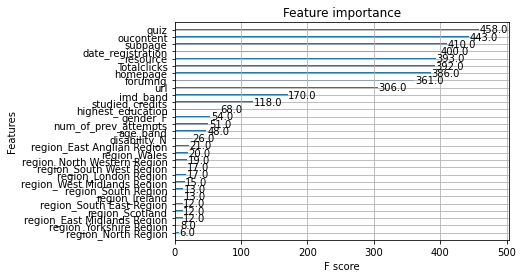

In [134]:
import xgboost
xgboost.plot_importance(model)

In [135]:
#!pip install --upgrade scikit-image

In [136]:
import shap


In [137]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [138]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

date_registration               -17.0
highest_education                 3.0
imd_band                          5.0
age_band                          1.0
num_of_prev_attempts              0.0
studied_credits                  60.0
Totalclicks                    1151.0
forumng                         123.0
homepage                         86.0
oucontent                       481.0
quiz                            259.0
resource                         14.0
subpage                         145.0
url                               2.0
gender_F                          0.0
gender_M                          1.0
region_East Anglian Region        0.0
region_East Midlands Region       0.0
region_Ireland                    1.0
region_London Region              0.0
region_North Region               0.0
region_North Western Region       0.0
region_Scotland                   0.0
region_South East Region          0.0
region_South Region               0.0
region_South West Region          0.0
region_Wales

0

In [143]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

0

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# 여기부터 삭제 계획
# 여기부터 삭제 계획
# 여기부터 삭제 계획






# 여기부터 삭제 계획

# DT

In [244]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

ValueError: could not convert string to float: 'DDD'

In [141]:
X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [142]:
model = tree.DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'DecisionTreeClassifier'

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",metrics.f1_score(y_test, y_pred_random))
print("Precision:",metrics.precision_score(y_test, y_pred_random))
print("Recall:",metrics.recall_score(y_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))


from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_random))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')
print("F1:",metrics.f1_score(y_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_test, y_pred_logistic))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))



from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_logistic))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')
print("F1:",metrics.f1_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))


from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_svm))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험 2 
# 단순 7개 VLE로 예측

In [ ]:
#X = X.drop(["gender", "region", "disability"], axis=1)
X=X[["Totalclicks","forumng","homepage","oucontent","quiz","resource","subpage","url"]]

In [ ]:
X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
xgboost.plot_importance(model)

In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험 3 JHA et al.,기존 연구 참조

### 추가 변수
### Groupby_VLE Activity Count : 7개 VLE activity 별, groupby_Activity_count, 즉 한 학기 중, 각 Activity를 총 몇 번 등록했는지


In [145]:
coursesAAADF
coursesAAADF.dtypes

code_module code_presentation id_student  id_site  date  sum_click  \
0                AAA             2013J      28400   546652   -10          4   
1                AAA             2013J      28400   546652   -10          1   
2                AAA             2013J      28400   546652   -10          1   
3                AAA             2013J      28400   546614   -10         11   
4                AAA             2013J      28400   546714   -10          1   
...              ...               ...        ...      ...   ...        ...   
10655275         GGG             2014J     675811   896943   269          3   
10655276         GGG             2014J     675578   896943   269          1   
10655277         GGG             2014J     654064   896943   269          3   
10655278         GGG             2014J     654064   896939   269          1   
10655279         GGG             2014J     654064   896939   269          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10655275      homepage        NaN      NaN              -63.0   
10655276      homepage        NaN      NaN              -32.0   
10655277      homepage        NaN      NaN              -16.0   
10655278       forumng        NaN      NaN              -16.0   
10655279       forumng        NaN      NaN              -16.0   

          date_unregistration  Year Term gender               region  \
0                         NaN  2013    J      F             Scotland   
1                         NaN  2013    J      F             Scotland   
2                         NaN  2013    J      F             Scotland   
3                         NaN  2013    J      F             Scotland   
4                         NaN  2013    J      F             Scotland   
...                       ...   ...  ...    ...                  ...   
10655275                  NaN  2014    J      F  East Anglian Region   
10655276                  NaN  2014    J      F  East Anglian Region   
10655277                  NaN  2014    J      F             Scotland   
10655278                  NaN  2014    J      F             Scotland   
10655279                  NaN  2014    J      F             Scotland   

              highest_education imd_band age_band  num_of_prev_attempts  \
0              HE Qualification   20-30%    35-55                     0   
1              HE Qualification   20-30%    35-55                     0   
2              HE Qualification   20-30%    35-55                     0   
3              HE Qualification   20-30%    35-55                     0   
4              HE Qualification   20-30%    35-55                     0   
...                         ...      ...      ...                   ...   
10655275     Lower Than A Level   60-70%    35-55                     0   
10655276     Lower Than A Level   50-60%    35-55                     0   
10655277  A Level or Equivalent   40-50%     0-35                     0   
10655278  A Level or Equivalent   40-50%     0-35                     0   
10655279  A Level or Equivalent   40-50%     0-35                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10655275               30          N  Distinction  
10655276               30          N         Pass  
10655277               30          N         

code_module              object
code_presentation        object
id_student               object
id_site                   int64
date                      int64
sum_click                 int64
activity_type            object
week_from               float64
week_to                 float64
date_registration       float64
date_unregistration     float64
Year                     object
Term                     object
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
dtype: object

In [ ]:

coursesAAADF[(coursesAAADF.id_student==11391) & (coursesAAADF.date==37) ]

In [ ]:
sumOfidsiteForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"id_site":"count"}).unstack(level=3)
sumOfidsiteForcoursesAAADF
#sumOfidsiteForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type","date"]).agg({"id_site":"count"}).unstack(level=3)

#sumOfclicksForcoursesAAADF.to_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv",header=2)
#sumOfClicksForAAADF = pd.read_csv("Created-Dataframes\\sumOfClicksForCourseAAA.csv")
#sumOfClicksForAAADF["Totalclicks"] = sumOfClicksForAAADF["sum_click"]




In [ ]:
sumOfidsiteForcoursesAAADF.to_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF.csv")
sumOfoneidsiteForAAADF = pd.read_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF.csv",header=1)
sumOfoneidsiteForAAADF.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneidsiteForAAADF=sumOfoneidsiteForAAADF.drop([0])

In [ ]:
sumOfoneidsiteForAAADF[["id_student"]]=sumOfoneidsiteForAAADF[["id_student"]].astype("object")


In [ ]:
#sumOfoneClicksForAAADF.sort_values("id_student")
sumOfoneidsiteForAAADF

In [ ]:
sumOfoneidsiteForAAADF["total_activity_count"]=sumOfoneidsiteForAAADF.iloc[:,3:].sum(axis=1)
sumOfoneidsiteForAAADF

In [ ]:
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,lsuffix='_l',sort=True) 
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=["code_module","code_presentation","Id_student"],lsuffix='_l',sort=True) 
sumOfidsiteForAAADF=sumOfoneidsiteForAAADF
#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)
sumOfidsiteForAAADF

In [ ]:
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module_l","code_presentation_l","id_student_l"})
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module","code_presentation","id_student"})

#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [ ]:
#sumOfClicksForAAADF


sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("int")
sumOfClicksForAAADF.sort_values("id_student")
sumOfClicksForAAADF.reset_index()
sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("object")
sumOfClicksForAAADF.dtypes

In [ ]:
sumOfidsiteForAAADF[sumOfidsiteForAAADF.id_student==11391]

In [ ]:
sumOfClicksForAAADF.index

In [ ]:
coursesAAADF[["id_student"]]=coursesAAADF[["id_student"]].astype("object")
removeDuplicatesCoursesAAADF = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student"])

In [ ]:
removeDuplicatesCoursesAAADF[["id_student"]]=removeDuplicatesCoursesAAADF[["id_student"]].astype("int")
removeDuplicatesCoursesAAADF.dtypes
removeDuplicatesCoursesAAADF.sort_values("id_student")
removeDuplicatesCoursesAAADF.reset_index()
removeDuplicatesCoursesAAADF[["id_student"]]=removeDuplicatesCoursesAAADF[["id_student"]].astype("object")
#removeDuplicatesCoursesAAADF

In [ ]:
removeDuplicatesCoursesAAADF.dtypes

In [ ]:
#sumOfClicksForAAADF.dtypes

In [ ]:
#dataForCourseAAADF = pd.merge(removeDuplicatesCoursesAAADF, sumOfClicksForAAADF,  how='left',on=['code_module', 'code_presentation','id_student'])
#coursesAAADF.sort_values("id_student")


In [ ]:
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfClicksForAAADF.join(coursesAAADF, lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfidsiteForAAADF.join(removeDuplicatesCoursesAAADF,on=removeDuplicatesCoursesAAADF.index,lsuffix='_l',sort=True) 
#dataForCourseAAADF=sumOfidsiteForAAADF.join(removeDuplicatesCoursesAAADF,how="right",on=["code_module","code_presentation","id_student"],lsuffix='_l',sort=False)

#dataForCourseAAADF=pd.merge(removeDuplicatesCoursesAAADF,sumOfClicksForAAADF,how='left', on=['code_module', 'code_presentation','id_student'])
dataForCourseAAADF=pd.merge(removeDuplicatesCoursesAAADF,sumOfClicksForAAADF,how='left', on=['code_module', 'code_presentation','id_student'])

dataForCourseAAADF


#dataForCourseAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

dataForCourseAAADF=dataForCourseAAADF.sort_values("id_student")
#dataForCourseAAADF.dtypes


In [ ]:
dataForCourseAAADF


In [ ]:
dataForCourseAAADF[dataForCourseAAADF.index==322]

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date","sum_click","activity_type","week_from","week_to","date_unregistration"})

In [ ]:
dataForCourseAAADF.to_csv("Created-Dataframes\\dataForCourseAAADF20220124.csv")

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60
dataForCourseAAADF

In [ ]:
# def changeFinalResultToNumber(x):
#    if x == "Withdrawn":
#        return int(0)
#    else:
#       return int(1)

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
dataForCourseAAADF.dtypes

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
dataForRunningModel.describe()

In [ ]:
dataForRunningModel.head(100)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
X
y

In [ ]:
X=X.fillna(0)
X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["gender", "region", "disability"], axis=1)

In [ ]:
X.head(10)

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:


X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

# 학습 진행 실험 3& 4----- only activity_count*8

In [ ]:
#X = X.drop(["gender", "region", "disability"], axis=1)

# 실험4: 단순vle_activity_count*8개 변수를 사용한 예측
X=X[["total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url"]]

#실험3에서 위 코드를 생략...

In [ ]:

X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train[:,3:]
x_train

y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
xgboost.plot_importance(model)

In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험5
# 개인 정보+Groupby-VLE-Activity-SUM-Click*8개+Groupby_VLE Activity Count : 8개 

In [ ]:
sumOfoneidsiteForAAADF


## sum click  정리

In [ ]:
sumOfoneClicksForAAADF
sumOfEachAndTotalClicksForAAADF=sumOfoneClicksForAAADF
sumOfEachAndTotalClicksForAAADF

In [ ]:
sumOfEachAndTotalClicksForAAADF["total_sum_click"]=sumOfoneClicksForAAADF.iloc[:,3:].sum(axis=1)

In [ ]:
sumOfEachAndTotalClicksForAAADF

In [ ]:
#sumOfoneClicksForAAADF=sumOfoneClicksForAAADF[['code_module',"code_presentation","id_student","forumng","homepage","oucontent","quiz","resource","subpage","url"]]
#sumOfoneClicksForAAADF.rename(columns={"forumng":"forumng_click","homepage":"homepage_click","oucontent":"oucontent_click","quiz":"quiz_click","resource":"resource_click","subpage":"subpage_click","url":"url_click"}, inplace = True)
#sumOfoneClicksForAAADF


In [ ]:
sumOfoneClicksForAAADF.dtypes

In [ ]:
#
#sumOfoneClicksForAAADF["total_sum_click"]=sumOfoneClicksForAAADF.iloc[:,3:].sum(axis=1)

In [ ]:
#sumOfoneClicksForAAADF
#sumOfoneClicksForAAADF.dtypes

In [ ]:

sumOfEachAndTotalClicksForAAADF2=sumOfEachAndTotalClicksForAAADF.rename(columns={"dataplus":"dataplus_click","dualpane":"dualpane_click","externalquiz":"externalquiz_click","folder":"folder_click","forumng":"forumng_click","glossary":"glossary_click","homepage":"homepage_click","htmlactivity":"htmlactivity_click","oucollaborate":"oucollaborate_click","oucontent":"oucontent_click","ouelluminate":"ouelluminate_click","ouwiki":"ouwiki_click","page":"page_click","questionnaire":"questionnaire_click","quiz":"quiz_click","repeatactivity":"repeatactivity_click","resource":"resource_click","sharedsubpage":"sharedsubpage_click", "subpage":"subpage_click","url":"url_click"})
sumOfEachAndTotalClicksForAAADF2

In [ ]:
sumOfoneidsiteForAAADF=sumOfoneidsiteForAAADF.rename(columns={"dataplus":"dataplus_visit","dualpane":"dualpane_visit","externalquiz":"externalquiz_visit","folder":"folder_visit","forumng":"forumng_visit","glossary":"glossary_visit","homepage":"homepage_visit","htmlactivity":"htmlactivity_visit","oucollaborate":"oucollaborate_visit","oucontent":"oucontent_visit","ouelluminate":"ouelluminate_visit","ouwiki":"ouwiki_visit","page":"page_visit","questionnaire":"questionnaire_visit","quiz":"quiz_visit","repeatactivity":"repeatactivity_visit","resource":"resource_visit","sharedsubpage":"sharedsubpage_visit", "subpage":"subpage_visit","url":"url_visit","total_activity_count":"total_activity_visit"})
sumOfoneidsiteForAAADF

In [ ]:
#dataIdsiteAndClickDF = pd.merge(sumOfoneidsiteForAAADF,sumOfoneClicksForAAADF, how='left', on=['code_module', 'code_presentation','id_student'])
dataIdsiteAndClickDF = pd.merge(sumOfoneidsiteForAAADF,sumOfEachAndTotalClicksForAAADF2, how='right', on=['code_module', 'code_presentation','id_student'])
#dataIdsiteAndDemoAndClickDF = pd.merge(sumOfoneClicksForAAADF,dataIdsiteAndDemoDF, how='left')

#dataIdsiteAndDemoAndClickDF=sumOfoneClicksForAAADF.join(dataIdsiteAndDemoDF,how="left",on=['code_module', 'code_presentation','id_student'],lsuffix='_l') 
#dataIdsiteAndClickDF.sort_values("id_student")
dataIdsiteAndClickDF

In [ ]:
dataIdsiteAndClickDF["id_stu"]=dataIdsiteAndClickDF["id_student"].astype("int64")
dataIdsiteAndClickDF.dtypes
dataIdsiteAndClickDF=dataIdsiteAndClickDF.sort_values("id_stu")
dataIdsiteAndClickDF

In [ ]:
dataIdsiteAndClickDF=dataIdsiteAndClickDF.sort_values("id_stu").reset_index()
dataIdsiteAndClickDF
dataIdsiteAndClickDF["id_stu"]=dataIdsiteAndClickDF["id_stu"].astype("object")

In [ ]:
removeDuplicatesCoursesAAADF=removeDuplicatesCoursesAAADF.sort_values("id_student").reset_index()


In [ ]:
removeDuplicatesCoursesAAADF["id_stu"]=removeDuplicatesCoursesAAADF["id_student"]
removeDuplicatesCoursesAAADF.dtypes
removeDuplicatesCoursesAAADF.sort_values("id_stu")
removeDuplicatesCoursesAAADF

In [ ]:
removeDuplicatesCoursesAAADF=removeDuplicatesCoursesAAADF.drop(columns={"level_0","index"})

In [ ]:
dataIdsiteAndClickAndDemoDF = pd.merge(removeDuplicatesCoursesAAADF, dataIdsiteAndClickDF,how='right', on=['code_module', 'code_presentation','id_stu'])
#dataIdsiteAndDemoAndClickDF = pd.merge(dataIdsiteAndDemoDF,sumOfoneClicksForAAADF, how='left')

#dataIdsiteAndDemoAndClickDF=sumOfoneClicksForAAADF.join(dataIdsiteAndDemoDF,how="left",o.n=['code_module', 'code_presentation','id_student'],lsuffix='_l') 
dataIdsiteAndClickAndDemoDF

In [ ]:
#dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF.drop(columns={"id_student_x","id_student_y"})
dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF.rename(columns={"id_stu":"id_student"})
dataIdsiteAndClickAndDemoDF
                                                                        

In [ ]:
#dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF.drop(columns={"index"})

# 학습 부분 코드 =>개인+sum click+count enter

In [ ]:
dataForCourseAAADF=dataIdsiteAndClickAndDemoDF

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"index_x","id_site","date","sum_click","activity_type","week_from","week_to","date_unregistration","Year","id_stu_x","index_y","id_stut","id_stu_y"})
dataForCourseAAADF.dtypes

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

In [ ]:
dataForCourseAAADF
#

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

dataForRunningModel =dataForCourseAAADF

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
dataForRunningModel.describe()

In [ ]:
dataForRunningModel.head(100)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
X
y

In [ ]:
X=X.fillna(0)
X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["code_module","Term","gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender", "region", "disability"], axis=1)

In [ ]:
X.head(10)

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:


X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

# 학습 진행 실험 5----- 개인+클릭+count

In [ ]:
#X = X.drop(["gender", "region", "disability"], axis=1)

# 실험4: 단순vle_activity_count*8개 변수를 사용한 예측
#X=X[["total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url"]]

#실험3에서 위 코드를 생략...

In [ ]:

#X=X.drop(columns=({"code_module","code_presentation","id_student"}))
X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험 7
## 실험5,6에 기반하에, 
## 추가할 변수: (한 학기 중)
## 총 방문한 날짜 수 
## 매번 방문한 id_site의 Activity 유형 수 SUM (groupby_date~count_Duplicates_id_stie) 
## (매번) 방문한 id_site 의 단순 횟수 SUM ( 중복 방문 고려, groupby_date~count) 


In [ ]:
coursesAAADF

In [ ]:
#coursesAAADF.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"groupby"}).unstack(level=3)
#ordered = coursesAAADF.groupby(["code_module", "code_presentation", "id_student"], as_index=False)
#countenterdate = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","date"]).agg({"date":"sum"}).unstack(level=3)

datedropduplicates = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student","date"])
datedropduplicates.sort_values("id_student")


In [ ]:

CountEnterDate=datedropduplicates.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"count"})
CountEnterDate

# 날짜 Count

In [ ]:



CountEnterDate.to_csv("Created-Dataframes\\CountEnterDate.csv")
CountEnterDateSum = pd.read_csv("Created-Dataframes\\CountEnterDate.csv")
CountEnterDateSum


In [ ]:
# 최대 미등록 날짜수는 ? 최대 연속 등록 날짜 수는? (실험 생략)

# 매번 방문한 id_site의 Activity 유형 수 SUM (groupby_date~count_Duplicates_id_stie)

In [ ]:
 coursesAAADF

In [ ]:
EnterActivityDropduplicates = coursesAAADF.drop_duplicates(["code_module", "code_presentation", "id_student","date","id_site"])


In [ ]:
EnterActivityDropduplicates.sort_values("id_student")

In [ ]:
#.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"id_site":"count"}).unstack(level=3)
EnterActivityGroupby=EnterActivityDropduplicates.groupby(["code_module", "code_presentation", "id_student","date","activity_type"]).agg({"date":"count"})
EnterActivityGroupby
#activity 하고 같은 방법 진행

In [ ]:
EnterActivityGroupby

In [ ]:
EnterActivityGroupby.to_csv("Created-Dataframes\\EnterActivityGroupby.csv")
EnterActivityGroupby2 = pd.read_csv("Created-Dataframes\\EnterActivityGroupby.csv")

EnterActivityGroupby2

In [ ]:
#EnterActivityGroupbyDateAndActivity= EnterActivityGroupby2.drop([0,1])
#EnterActivityGroupbyDateAndActivity.rename(columns={'Unnamed: 0':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student","Unnamed: 3":"activity_type"}, inplace = True)
EnterActivityGroupbyDateAndActivity=EnterActivityGroupby2
EnterActivityGroupbyDateAndActivity
#sumOfoneClicksForAAADF.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)

In [ ]:
EnterActivityGroupbyDateAndActivity=EnterActivityGroupbyDateAndActivity.rename(columns={'date.1':'enter_acivity'}, inplace = True)


In [ ]:
EnterActivityGroupbyDateAndActivity

In [ ]:
EnterActivitytypeCount=EnterActivityGroupbyDateAndActivity.groupby(["code_module", "code_presentation", "id_student","date"]).agg({"activity_type":"count"})
EnterActivitytypeCount

In [ ]:
EnterActivitytypeCount.to_csv("Created-Dataframes\\EnterActivitytypeCount.csv")
EnterActivitytypeCount2 = pd.read_csv("Created-Dataframes\\EnterActivitytypeCount.csv")
EnterActivitytypeCount2.rename(columns={'activity_type':'enter_acivity_count'}, inplace = True)


In [ ]:
EnterActivitytypeCount2.head(50)

In [ ]:
EnterActivitytypeCount3=EnterActivitytypeCount.groupby(["code_module", "code_presentation", "id_student"]).mean()

In [ ]:
EnterActivitytypeCount3

In [ ]:
EnterActivitytypeCount3.to_csv("Created-Dataframes\\EnterActivitytypeCount3.csv")
EnterActivitytypeCountMean = pd.read_csv("Created-Dataframes\\EnterActivitytypeCount3.csv")

EnterActivitytypeCountMean.rename(columns={'activity_type':'enter_acivity_count_mean'}, inplace = True)
EnterActivitytypeCountMean

In [ ]:
#EnterActivitytypeCountMean

In [ ]:
#CountEnterDateSum

In [ ]:
PlusDateSumAndActivityMean= pd.merge(CountEnterDateSum, EnterActivitytypeCountMean, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
PlusDateSumAndActivityMean

# 기존 학습 데이터와 date, enter_acivity_count_mean 합병

In [ ]:
dataForRunningModel

In [ ]:
dataForRunningModelExp7=pd.merge(dataForRunningModel,PlusDateSumAndActivityMean, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
dataForRunningModelExp7

# 실험 7 개인 모형의 X 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModelExp7["FinalResult"]
X = dataForRunningModelExp7.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
X
y

In [ ]:
X=X.fillna(0)
X

#  더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["code_module","Term","gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender", "region", "disability"], axis=1)

In [ ]:
X.head(10)

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:


X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
X.iloc[:,3:]

In [ ]:

#X=X.drop(columns=({"code_module","code_presentation","id_student"}))
X=X.iloc[:,3:]
X
y


In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# 실험8 : only+ date, enter_activity_type_mean 추가하지 않음.

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

In [ ]:
CountEnterDateSum

In [ ]:
dataIdsiteAndClickAndDemoDF2=pd.merge(dataIdsiteAndClickAndDemoDF,CountEnterDateSum, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2.rename(columns={"date_y":"sum_visit_date"})

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

In [ ]:
dataForCourseAAADF=dataIdsiteAndClickAndDemoDF2

def changeFinalResultToNumber(x):
#    if x == "Withdrawn" or x == "Fail":
    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
#backup_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:

dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date_x","sum_click","activity_type","week_from","week_to","date_unregistration"})
dataForCourseAAADF.dtypes


In [ ]:
dataForCourseAAADF

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

In [ ]:
dataForCourseAAADF
#

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
#dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

dataForRunningModel =dataForCourseAAADF

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#dataForRunningModel.describe()
dataForRunningModel

In [ ]:
dataForRunningModel

# find_missing_vle_student ,vle데이터에서는 3205학생의 행동 데이터가 없음, 대다수는 Withdrawn or Fail

In [ ]:
dataForRunningModel
dataForRunningModel_findmiss=dataForRunningModel

dataForRunningModel_findmiss=dataForRunningModel_findmiss.rename(columns={"FinalResult":"FinalResult_vle"})

In [ ]:
dataForRunningModel_findmiss.dtypes

In [ ]:
studentInfoDF

In [ ]:
studentInfoDF_col3=studentInfoDF
studentInfoDF_col3=studentInfoDF_col3.rename(columns={"final_result":"FinalResult"})
studentInfoDF_col3


In [ ]:
studentInfoDF_col3.dtypes

In [ ]:
find_missing_idstudent=pd.merge(studentInfoDF_col3,dataForRunningModel_findmiss, how='left', on=['id_student', 'code_module', 'code_presentation',"gender","region","highest_education","imd_band","age_band","num_of_prev_attempts","studied_credits","disability","Year","Term"])
find_missing_idstudent


In [ ]:
#find_missing_idstudent.to_csv("Created-Dataframes\\find_missing_idstudent2.csv")
#studentInfoDF.to_csv("Created-Dataframes\\studentInfoDF.csv")
#dataForRunningModel.to_csv("Created-Dataframes\\dataForRunningModel.csv")

In [ ]:
find_missing_idstudent.sort_values("id_student")

In [ ]:
find_missing_idstudent[find_missing_idstudent.id_student==292923]
find_missing_idstudent[find_missing_idstudent.id_student==11391]

In [ ]:

find_missing_idstudent['FinalResult_vle']=find_missing_idstudent['FinalResult_vle'].fillna(-1)

In [ ]:
vle_missing_student=find_missing_idstudent[find_missing_idstudent.FinalResult_vle == -1]
vle_missing_student

In [ ]:
#vle_missing_student.to_csv("Created-Dataframes\\vle_missing_student.csv")

In [ ]:
find_missing_idstudent=find_missing_idstudent.drop(["FinalResult_vle"], axis=1)
find_missing_idstudent

In [ ]:
dataForRunningModel2=find_missing_idstudent

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
y = dataForRunningModel2["FinalResult"]
X = dataForRunningModel2.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
X
y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)

In [ ]:
#X=X.astype("object")

In [ ]:
X.dtypes

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#X=X.astype("int")

In [ ]:
X.dtypes

In [ ]:
X
y


In [ ]:

X2=X.drop(columns=({"code_module","code_presentation","id_student"}))
#X3=X.drop(columns=({"code_module","code_presentation","id_student",""}))

X=X2
y


In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#   if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [ ]:
"""
def changeFinalResultToNumber(x):
#    if x == "Withdrawn" or x == "Fail":
    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 
        """

In [ ]:
y = y.apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
y

In [ ]:
#backup_x_exp8_Fail=X
#backup_y_exp8_Fail=y

In [ ]:
#Backup_withdrawn_X=X

In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_baggingmodel
x_train_with_metapreds[:, -5] = y_pred_adamodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
#idx=12
#x_train.iloc[idx, :]
#y_train.iloc[idx]

In [ ]:
"""
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stacking by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





# 실험 9- 각 수업별 예측


In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

In [ ]:
CountEnterDateSum

In [ ]:
dataIdsiteAndClickAndDemoDF2=pd.merge(dataIdsiteAndClickAndDemoDF,CountEnterDateSum, how='left', on=['id_student', 'code_module', 'code_presentation'])

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2.rename(columns={"date_y":"sum_visit_date"})

In [ ]:
dataIdsiteAndClickAndDemoDF2

In [ ]:
#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

In [ ]:
dataForCourseAAADF=dataIdsiteAndClickAndDemoDF2

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

In [ ]:
#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

In [ ]:
#dataForCourseAAADF=Backup_dataIdsiteAndClickAndDemoDF
dataForCourseAAADF

In [ ]:
#backup_fail_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
dataForCourseAAADF
#backup_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:

dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date_x","sum_click","activity_type","week_from","week_to","date_unregistration"})
dataForCourseAAADF.dtypes


In [ ]:
dataForCourseAAADF

In [ ]:
dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

In [ ]:
dataForCourseAAADF
#

In [ ]:
pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
#dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

dataForRunningModel =dataForCourseAAADF

In [ ]:
dataForRunningModel

# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
#dataForRunningModel.describe()
dataForRunningModel

In [ ]:
dataForRunningModel2


In [ ]:
#BACKUP_dataForRunningModel=dataForRunningModel

In [ ]:
dataForRunningModel=dataForRunningModel2

In [ ]:
dataForRunningModel_AAA=dataForRunningModel[dataForRunningModel.code_module=="AAA"]
dataForRunningModel_BBB=dataForRunningModel[dataForRunningModel.code_module=="BBB"]
dataForRunningModel_CCC=dataForRunningModel[dataForRunningModel.code_module=="CCC"]
dataForRunningModel_DDD=dataForRunningModel[dataForRunningModel.code_module=="DDD"]
dataForRunningModel_EEE=dataForRunningModel[dataForRunningModel.code_module=="EEE"]
dataForRunningModel_FFF=dataForRunningModel[dataForRunningModel.code_module=="FFF"]
dataForRunningModel_GGG=dataForRunningModel[dataForRunningModel.code_module=="GGG"]



# 실험 9 와 실험 10 공유 부분

In [ ]:
#dataForRunningModel[dataForRunningModel.code_presentation].groupby([dataForRunningModel.code_module]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
dataForRunningModel.groupby([dataForRunningModel.code_module,dataForRunningModel.code_presentation]).agg({'id_student':'count'})

In [ ]:


#coursesAAADF

coursesAAADF.groupby([coursesAAADF.code_module,coursesAAADF.code_presentation]).agg({'sum_click':'sum'})
coursesAAADF.groupby([coursesAAADF.code_module,coursesAAADF.code_presentation]).agg({'activity_type':'count'})

In [ ]:
dataForRunningModel.groupby([dataForRunningModel.code_module]).agg({'id_student':'count'})

In [ ]:


dataForRunningModel_AAA2013J=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_AAA2014J=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_BBB2013J=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_BBB2013B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_BBB2014J=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_CCC2014J=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_DDD2013J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_DDD2014J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]
                                             
dataForRunningModel_EEE2013J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_EEE2014J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]
                                                  
dataForRunningModel_FFF2013J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_FFF2013B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_FFF2014J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_FFF2014B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_GGG=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]




dataForRunningModel_FFF2013J

In [ ]:
#ABCDEFG

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_AAA["FinalResult"]
#X = dataForRunningModel_AAA.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB["FinalResult"]
#X = dataForRunningModel_BBB.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_CCC["FinalResult"]
#X = dataForRunningModel_CCC.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_DDD["FinalResult"]
#X = dataForRunningModel_DDD.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_EEE["FinalResult"]
#X = dataForRunningModel_EEE.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF["FinalResult"]
#X = dataForRunningModel_FFF.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_GGG["FinalResult"]
#X = dataForRunningModel_GGG.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_BBB2013J["FinalResult"]
#X = dataForRunningModel_BBB2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2013B["FinalResult"]
#X = dataForRunningModel_BBB2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014J["FinalResult"]
#X = dataForRunningModel_BBB2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014B["FinalResult"]
#X = dataForRunningModel_BBB2014B.drop(["FinalResult"], axis=1)


############


#y = dataForRunningModel_FFF2013J["FinalResult"]
#X = dataForRunningModel_FFF2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2013B["FinalResult"]
#X = dataForRunningModel_FFF2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014J["FinalResult"]
#X = dataForRunningModel_FFF2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014B["FinalResult"]
#X = dataForRunningModel_FFF2014B.drop(["FinalResult"], axis=1)



###############
y = dataForRunningModel2["FinalResult"]
X = dataForRunningModel2.drop(["FinalResult"], axis=1)

In [ ]:
X
y

In [ ]:

"""
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#   if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 
    """

In [ ]:

def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#     if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 
       

In [ ]:
y = y.apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)

In [ ]:
#X=X.astype("object")

In [ ]:
X.dtypes

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
X
y

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#X_dataForRunningModel2=X
#y_dataForRunningModel2=y

In [ ]:
#backup_noplus_dummy_X

In [ ]:
#X=X.astype("int")

In [ ]:
X.dtypes

In [ ]:
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:

X2=X.drop(columns=({"code_module","code_presentation","id_student"}))
#X3=X.drop(columns=({"code_module","code_presentation","id_student",""}))
#X4=X.drop(columns=({"date_registration"}))
X=X2
y


In [ ]:
#Backup_withdrawn_X=X

In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train
y_train

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

In [ ]:
# <aghatpande> on 02-Nov-2017
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_baggingmodel
x_train_with_metapreds[:, -5] = y_pred_adamodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
#idx=12
#x_train.iloc[idx, :]
#y_train.iloc[idx]

In [ ]:
"""
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

# 실험 11: 기존 학기로 학습하고,  현 학기의 데이터 예측하기

In [ ]:
#dataIdsiteAndClickAndDemoDF2

In [ ]:
dataForRunningModel2

In [ ]:
#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

CountEnterDateSum

dataIdsiteAndClickAndDemoDF2=pd.merge(dataIdsiteAndClickAndDemoDF,CountEnterDateSum, how='left', on=['id_student', 'code_module', 'code_presentation'])

dataIdsiteAndClickAndDemoDF2

dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2.rename(columns={"date_y":"sum_visit_date"})

dataIdsiteAndClickAndDemoDF2

#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

dataForCourseAAADF=dataIdsiteAndClickAndDemoDF2

#20개 클릭 변수+20개 visit변수+개인 정보 변수+ID 정리
#Backup_dataIdsiteAndClickAndDemoDF=dataIdsiteAndClickAndDemoDF

#backup2_dataIdsiteAndClickAndDemoDF2=dataIdsiteAndClickAndDemoDF2

#dataForCourseAAADF=Backup_dataIdsiteAndClickAndDemoDF
dataForCourseAAADF

#backup_fail_withdrawn_dataForCourseAAADF=dataForCourseAAADF

In [ ]:
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
#dataForRunningModel.describe()
#X_dataForRunningModel2
#dataForRunningModel=dataForRunningModel2

In [ ]:
y_dataForRunningModel2

In [ ]:
#BACKUP_dataForRunningModel=dataForRunningModel

In [ ]:
#dataForRunningModel=dataForRunningModel2


X2=X.drop(columns=({"code_module","code_presentation","id_student"}))
#X3=X.drop(columns=({"code_module","code_presentation","id_student",""}))
#X4=X.drop(columns=({"date_registration"}))
X=X2
y


#Backup_withdrawn_X=X

import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

dataForCourseAAADF["FinalResult"] = dataForCourseAAADF["final_result"].apply(lambda x: changeFinalResultToNumber(x))

dataForCourseAAADF
#backup_withdrawn_dataForCourseAAADF=dataForCourseAAADF


dataForCourseAAADF=dataForCourseAAADF.drop(columns={"id_site","date_x","sum_click","activity_type","week_from","week_to","date_unregistration"})
dataForCourseAAADF.dtypes


dataForCourseAAADF

dataForCourseAAADF=dataForCourseAAADF.drop(columns={"final_result"})

dataForCourseAAADF
#

pd.isnull(dataForCourseAAADF).sum() 

In [ ]:
#268733
#dataForCourseAAADF[["date_registration","gender","region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count", "FinalResult"]].describe()

In [ ]:
# <aghatpande> on 02-Nov-2017
# select the columns for running the model
#dataForRunningModel = dataForCourseAAADF[["date_registration", "gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "total_activity_count","forumng","homepage","oucontent","quiz","resource","subpage","url","FinalResult"]]

#dataForRunningModel =dataForCourseAAADF

In [ ]:
#dataForRunningModel=dataForRunningModel2
#dataForRunningModel3=dataForRunningModel2
#backup3
dataForRunningModel

In [ ]:
dataForRunningModel_week16=DataFromVLEStudentInfoAndActivity_all16_Registrtion
dataForRunningModel_week16

In [ ]:
dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8_Registrtion
#Backup_dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8

In [ ]:
dataForRunningModel_week16=dataForRunningModel_week16.rename(columns={"final_result":"FinalResult"})


In [ ]:
dataForRunningModel_week8=dataForRunningModel_week8.rename(columns={"final_result":"FinalResult"})

In [ ]:
#bacuup_dataForRunningModel_week16=dataForRunningModel_week16

In [ ]:
#dataForRunningModel=dataForRunningModel_week16
dataForRunningModel=dataForRunningModel_week8

In [ ]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [ ]:
dataForRunningModel

In [ ]:
dataForRunningModel["FinalResult"] = dataForRunningModel["FinalResult"].apply(lambda x: changeFinalResultToNumber(x))

In [ ]:
# imd_band의 1054 결측치를 평균값 5로 바꿈

In [ ]:
pd.isnull(dataForRunningModel).sum() 

In [ ]:
# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [ ]:
X=dataForRunningModel
#y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

In [ ]:
# 개인+VLE를 통합한 후, 더미 변수 전처리

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [ ]:
X_dummies
X

In [ ]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [ ]:
#X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)
X = X.drop(["gender", "region", "disability"], axis=1)

In [ ]:
#X=X.astype("object")

In [ ]:
X.dtypes

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [ ]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [ ]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

In [ ]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

In [ ]:
X.head(10)

In [ ]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [ ]:
#X.head(10)
X.isnull().sum()

In [ ]:
X

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#backup_noplus_dummy_X

In [ ]:
#X=X.astype("int")

In [ ]:
X

In [ ]:
#dataForRunningModel[dataForRunningModel.code_presentation].groupby([dataForRunningModel.code_module]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
dataForRunningModel.groupby([dataForRunningModel.code_module,dataForRunningModel.code_presentation]).agg({'id_student':'count'})

In [ ]:
X.to_csv("Created-Dataframes\\badkup_X_week8_registration_exp13.csv")

In [ ]:
#X=X.astype("int")
X.dtypes

In [ ]:
dataForRunningModel=X
dataForRunningModel
#backup_dataForRunningModel_week8=X

In [ ]:
#dataForRunningModel4=X
#backup_dataForRunningModel_32593_0_1=dataForRunningModel4


In [ ]:
#같은 수업의 지난 모든 학기



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm1
#dataForRunningModel_PastTerm2
##dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 전체 수업



#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm



In [ ]:
#지난 모든 학기의 동일 수업


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
#=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm


In [ ]:
#지난 모든 학기의 동일한 수업과 동일한 학기로 학습



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#########
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B)]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]





#dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:

dataForRunningModel_CCC2014J=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_DDD2013J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_DDD2014J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]
                                             
dataForRunningModel_EEE2013J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_EEE2014J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]
                                                  
dataForRunningModel_FFF2013J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_FFF2013B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_FFF2014J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_FFF2014B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_GGG=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]




In [ ]:
#지난 모든 학기의 전체 수업 2014B



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA") & (dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]
#
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]

#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014B"]




#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 동일 수업 2014B
#지난 모든 학기의 동일 수업

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#ABCDEFG

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_AAA["FinalResult"]
#X = dataForRunningModel_AAA.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB["FinalResult"]
#X = dataForRunningModel_BBB.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_CCC["FinalResult"]
#X = dataForRunningModel_CCC.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_DDD["FinalResult"]
#X = dataForRunningModel_DDD.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_EEE["FinalResult"]
#X = dataForRunningModel_EEE.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF["FinalResult"]
#X = dataForRunningModel_FFF.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_GGG["FinalResult"]
#X = dataForRunningModel_GGG.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_BBB2013J["FinalResult"]
#X = dataForRunningModel_BBB2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2013B["FinalResult"]
#X = dataForRunningModel_BBB2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014J["FinalResult"]
#X = dataForRunningModel_BBB2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014B["FinalResult"]
#X = dataForRunningModel_BBB2014B.drop(["FinalResult"], axis=1)


############


#y = dataForRunningModel_FFF2013J["FinalResult"]
#X = dataForRunningModel_FFF2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2013B["FinalResult"]
#X = dataForRunningModel_FFF2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014J["FinalResult"]
#X = dataForRunningModel_FFF2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014B["FinalResult"]
#X = dataForRunningModel_FFF2014B.drop(["FinalResult"], axis=1)



###############
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


In [ ]:
#dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))
#dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))

In [ ]:


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
x_train
y_train
x_test
y_test

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=12
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
"""model = DecisionTreeClassifier()
model.fit(X = x_train, y= y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)
"""

In [ ]:
"""
#error

idx=1
y_train.iloc[idx]



# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_baggingmodel
x_train_with_metapreds[:, -5] = y_pred_adamodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
#idx=12
#x_train.iloc[idx, :]
#y_train.iloc[idx]

In [ ]:
"""
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])
                """

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(RF,GB,Bag,ada,+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred_votemodel6))


# 여기부터 설정 시작
# 여기부터 설정 시작
# 여기부터 설정 시작
# 여기부터 설정 시작


# 실험 12 학기 초/학기 중간 시점 예측
학기 초=8주=56 date
학기 중간 시점=16주=112 date
학기= 총 34주 ~38주(240-270 date)


In [ ]:
stop run ^^
# change week

In [144]:
coursesAAADF

code_module code_presentation id_student  id_site  date  sum_click  \
0                AAA             2013J      28400   546652   -10          4   
1                AAA             2013J      28400   546652   -10          1   
2                AAA             2013J      28400   546652   -10          1   
3                AAA             2013J      28400   546614   -10         11   
4                AAA             2013J      28400   546714   -10          1   
...              ...               ...        ...      ...   ...        ...   
10655275         GGG             2014J     675811   896943   269          3   
10655276         GGG             2014J     675578   896943   269          1   
10655277         GGG             2014J     654064   896943   269          3   
10655278         GGG             2014J     654064   896939   269          1   
10655279         GGG             2014J     654064   896939   269          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10655275      homepage        NaN      NaN              -63.0   
10655276      homepage        NaN      NaN              -32.0   
10655277      homepage        NaN      NaN              -16.0   
10655278       forumng        NaN      NaN              -16.0   
10655279       forumng        NaN      NaN              -16.0   

          date_unregistration  Year Term gender               region  \
0                         NaN  2013    J      F             Scotland   
1                         NaN  2013    J      F             Scotland   
2                         NaN  2013    J      F             Scotland   
3                         NaN  2013    J      F             Scotland   
4                         NaN  2013    J      F             Scotland   
...                       ...   ...  ...    ...                  ...   
10655275                  NaN  2014    J      F  East Anglian Region   
10655276                  NaN  2014    J      F  East Anglian Region   
10655277                  NaN  2014    J      F             Scotland   
10655278                  NaN  2014    J      F             Scotland   
10655279                  NaN  2014    J      F             Scotland   

              highest_education imd_band age_band  num_of_prev_attempts  \
0              HE Qualification   20-30%    35-55                     0   
1              HE Qualification   20-30%    35-55                     0   
2              HE Qualification   20-30%    35-55                     0   
3              HE Qualification   20-30%    35-55                     0   
4              HE Qualification   20-30%    35-55                     0   
...                         ...      ...      ...                   ...   
10655275     Lower Than A Level   60-70%    35-55                     0   
10655276     Lower Than A Level   50-60%    35-55                     0   
10655277  A Level or Equivalent   40-50%     0-35                     0   
10655278  A Level or Equivalent   40-50%     0-35                     0   
10655279  A Level or Equivalent   40-50%     0-35                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10655275               30          N  Distinction  
10655276               30          N         Pass  
10655277               30          N         

In [ ]:
coursesAAADF_week52_date365=coursesAAADF[coursesAAADF.date<=365]
coursesAAADF_week52_date365

In [146]:
coursesAAADF_week8_date56=coursesAAADF[coursesAAADF.date<=56]
coursesAAADF_week8_date56

code_module code_presentation id_student  id_site  date  sum_click  \
0                AAA             2013J      28400   546652   -10          4   
1                AAA             2013J      28400   546652   -10          1   
2                AAA             2013J      28400   546652   -10          1   
3                AAA             2013J      28400   546614   -10         11   
4                AAA             2013J      28400   546714   -10          1   
...              ...               ...        ...      ...   ...        ...   
10574076         GGG             2014J     620239   896943    56          3   
10574077         GGG             2014J     620239   896938    56          3   
10574078         GGG             2014J     620826   897151    56          1   
10574079         GGG             2014J     620826   896943    56          3   
10574080         GGG             2014J     620826   897071    56          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10574076      homepage        NaN      NaN             -123.0   
10574077       forumng        NaN      NaN             -123.0   
10574078       subpage        NaN      NaN              -10.0   
10574079      homepage        NaN      NaN              -10.0   
10574080      resource        NaN      NaN              -10.0   

          date_unregistration  Year Term gender                region  \
0                         NaN  2013    J      F              Scotland   
1                         NaN  2013    J      F              Scotland   
2                         NaN  2013    J      F              Scotland   
3                         NaN  2013    J      F              Scotland   
4                         NaN  2013    J      F              Scotland   
...                       ...   ...  ...    ...                   ...   
10574076                  NaN  2014    J      F  North Western Region   
10574077                  NaN  2014    J      F  North Western Region   
10574078                104.0  2014    J      F   East Anglian Region   
10574079                104.0  2014    J      F   East Anglian Region   
10574080                104.0  2014    J      F   East Anglian Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification   20-30%    35-55                     0   
1           HE Qualification   20-30%    35-55                     0   
2           HE Qualification   20-30%    35-55                     0   
3           HE Qualification   20-30%    35-55                     0   
4           HE Qualification   20-30%    35-55                     0   
...                      ...      ...      ...                   ...   
10574076  Lower Than A Level    0-10%     0-35                     1   
10574077  Lower Than A Level    0-10%     0-35                     1   
10574078  Lower Than A Level   80-90%    35-55                     0   
10574079  Lower Than A Level   80-90%    35-55                     0   
10574080  Lower Than A Level   80-90%    35-55                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10574076               30          N         Pass  
10574077               30          N         Pass  
10574078               30          Y    Withdrawn  
10574079         

In [ ]:
coursesAAADF_week16_date112=coursesAAADF[coursesAAADF.date<=112]
coursesAAADF_week16_date112

In [ ]:
coursesAAADF_week24_date168=coursesAAADF[coursesAAADF.date<=168]
coursesAAADF_week24_date168

In [ ]:
coursesAAADF_week32_date224=coursesAAADF[coursesAAADF.date<=224]
coursesAAADF_week32_date224

In [147]:
coursesAAADF816=coursesAAADF_week8_date56

In [ ]:
coursesAAADF816=coursesAAADF_week16_date112

In [ ]:
coursesAAADF816=coursesAAADF_week24_date168

In [ ]:
#coursesAAADF816=coursesAAADF_week24_date168
#coursesAAADF816

In [ ]:
#coursesAAADF816=coursesAAADF_week32_date224
#coursesAAADF816

In [ ]:
coursesAAADF816=coursesAAADF_week52_date365

In [148]:
sumOfidsiteForcoursesAAADF816 = coursesAAADF816.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"id_site":"count"}).unstack(level=3)
sumOfidsiteForcoursesAAADF816
#sumOfidsiteForcoursesAAADF = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","activity_type","date"]).agg({"id_site":"count"}).unstack(level=3)





id_site                        \
activity_type                            dataplus dualpane externalquiz   
code_module code_presentation id_student                                  
AAA         2013J             11391           NaN      NaN          NaN   
                              28400           NaN      NaN          NaN   
                              30268           NaN      NaN          NaN   
                              31604           NaN      NaN          NaN   
                              32885           NaN      NaN          NaN   
...                                           ...      ...          ...   
GGG         2014J             2640965         NaN      NaN          NaN   
                              2645731         NaN      NaN          NaN   
                              2648187         NaN      NaN          NaN   
                              2679821         NaN      NaN          NaN   
                              2684003         NaN      NaN          NaN   

                                                                    \
activity_type                            forumng glossary homepage   
code_module code_presentation id_student                             
AAA         2013J             11391         26.0      NaN     18.0   
                              28400         74.0      NaN     26.0   
                              30268         30.0      NaN     12.0   
                              31604         77.0      1.0     39.0   
                              32885         47.0      1.0     26.0   
...                                          ...      ...      ...   
GGG         2014J             2640965        NaN      NaN      5.0   
                              2645731        NaN      NaN      2.0   
                              2648187        NaN      1.0      4.0   
                              2679821       12.0      NaN      7.0   
                              2684003       50.0      NaN     19.0   

                                                                               \
activity_type                            htmlactivity oucollaborate oucontent   
code_module code_presentation id_student                                        
AAA         2013J             11391               NaN           NaN      32.0   
                              28400               NaN           NaN      34.0   
                              30268               NaN           NaN      14.0   
                              31604               NaN           NaN      60.0   
                              32885               NaN           NaN      55.0   
...                                               ...           ...       ...   
GGG         2014J             2640965             NaN           NaN       4.0   
                              2645731             NaN           NaN       4.0   
                              2648187             NaN           NaN       1.0   
                              2679821             NaN           NaN       8.0   
                              2684003             NaN           NaN       8.0   

                                                                   \
activity_type                            ouelluminate ouwiki page   
code_module code_presentation id_student                            
AAA         2013J             11391               NaN    NaN  NaN   
                              28400               NaN    NaN  NaN   
                              30268               NaN    NaN  NaN   
                              31604               NaN    NaN  NaN   
                              32885               NaN    NaN  NaN   
...                                               ...    ...  ...   
GGG         2014J             2640965             NaN    NaN  NaN   
                              2645731             NaN    NaN  NaN   
                              2648187             NaN    NaN  NaN   
                              2679821          

In [149]:

sumOfidsiteForcoursesAAADF816.to_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF816.csv")
sumOfoneidsiteForAAADF816 = pd.read_csv("Created-Dataframes\\sumOfidsiteForcoursesAAADF816.csv",header=1)
sumOfoneidsiteForAAADF816.rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneidsiteForAAADF816=sumOfoneidsiteForAAADF816.drop([0])

In [150]:
sumOfoneidsiteForAAADF816[["id_student"]]=sumOfoneidsiteForAAADF816[["id_student"]].astype("object")


In [151]:
#sumOfoneClicksForAAADF.sort_values("id_student")
sumOfoneidsiteForAAADF816

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400       NaN       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       NaN       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29079         GGG             2014J    2640965       NaN       NaN   
29080         GGG             2014J    2645731       NaN       NaN   
29081         GGG             2014J    2648187       NaN       NaN   
29082         GGG             2014J    2679821       NaN       NaN   
29083         GGG             2014J    2684003       NaN       NaN   

       externalquiz  forumng  glossary  homepage  htmlactivity  oucollaborate  \
1               NaN     26.0       NaN      18.0           NaN            NaN   
2               NaN     74.0       NaN      26.0           NaN            NaN   
3               NaN     30.0       NaN      12.0           NaN            NaN   
4               NaN     77.0       1.0      39.0           NaN            NaN   
5               NaN     47.0       1.0      26.0           NaN            NaN   
...             ...      ...       ...       ...           ...            ...   
29079           NaN      NaN       NaN       5.0           NaN            NaN   
29080           NaN      NaN       NaN       2.0           NaN            NaN   
29081           NaN      NaN       1.0       4.0           NaN            NaN   
29082           NaN     12.0       NaN       7.0           NaN            NaN   
29083           NaN     50.0       NaN      19.0           NaN            NaN   

       oucontent  ouelluminate  ouwiki  page  questionnaire  quiz  \
1           32.0           NaN     NaN   NaN            NaN   NaN   
2           34.0           NaN     NaN   NaN            NaN   NaN   
3           14.0           NaN     NaN   NaN            NaN   NaN   
4           60.0           NaN     NaN   NaN            NaN   NaN   
5           55.0           NaN     NaN   NaN            NaN   NaN   
...          ...           ...     ...   ...            ...   ...   
29079        4.0           NaN     NaN   NaN            NaN   NaN   
29080        4.0           NaN     NaN   NaN            NaN   NaN   
29081        1.0           NaN     NaN   NaN            NaN   2.0   
29082        8.0           NaN     NaN   NaN            NaN   NaN   
29083        8.0           NaN     NaN   NaN            NaN   3.0   

       repeatactivity  resource  sharedsubpage  subpage   url  
1                 NaN       7.0            NaN      6.0   1.0  
2                 NaN       5.0            NaN     25.0  16.0  
3                 NaN       4.0            NaN     12.0   4.0  
4                 NaN       6.0            NaN     39.0  23.0  
5                 NaN       7.0            NaN     16.0   5.0  
...               ...       ...            ...      ...   ...  
29079             NaN       4.0            NaN      6.0   NaN  
29080             NaN      22.0            NaN      3.0   NaN  
29081             NaN       5.0            NaN      9.0   NaN  
29082             NaN       8.0            NaN      4.0   NaN  
29083             NaN       8.0            NaN     14.0   NaN  

[29083 rows x 22 columns]

In [152]:
sumOfoneidsiteForAAADF816["total_activity_visit"]=sumOfoneidsiteForAAADF816.iloc[:,3:].sum(axis=1)
sumOfoneidsiteForAAADF816
sumOfoneidsiteForAAADF816.iloc[:,3:]

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400       NaN       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       NaN       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29079         GGG             2014J    2640965       NaN       NaN   
29080         GGG             2014J    2645731       NaN       NaN   
29081         GGG             2014J    2648187       NaN       NaN   
29082         GGG             2014J    2679821       NaN       NaN   
29083         GGG             2014J    2684003       NaN       NaN   

       externalquiz  forumng  glossary  homepage  htmlactivity  oucollaborate  \
1               NaN     26.0       NaN      18.0           NaN            NaN   
2               NaN     74.0       NaN      26.0           NaN            NaN   
3               NaN     30.0       NaN      12.0           NaN            NaN   
4               NaN     77.0       1.0      39.0           NaN            NaN   
5               NaN     47.0       1.0      26.0           NaN            NaN   
...             ...      ...       ...       ...           ...            ...   
29079           NaN      NaN       NaN       5.0           NaN            NaN   
29080           NaN      NaN       NaN       2.0           NaN            NaN   
29081           NaN      NaN       1.0       4.0           NaN            NaN   
29082           NaN     12.0       NaN       7.0           NaN            NaN   
29083           NaN     50.0       NaN      19.0           NaN            NaN   

       oucontent  ouelluminate  ouwiki  page  questionnaire  quiz  \
1           32.0           NaN     NaN   NaN            NaN   NaN   
2           34.0           NaN     NaN   NaN            NaN   NaN   
3           14.0           NaN     NaN   NaN            NaN   NaN   
4           60.0           NaN     NaN   NaN            NaN   NaN   
5           55.0           NaN     NaN   NaN            NaN   NaN   
...          ...           ...     ...   ...            ...   ...   
29079        4.0           NaN     NaN   NaN            NaN   NaN   
29080        4.0           NaN     NaN   NaN            NaN   NaN   
29081        1.0           NaN     NaN   NaN            NaN   2.0   
29082        8.0           NaN     NaN   NaN            NaN   NaN   
29083        8.0           NaN     NaN   NaN            NaN   3.0   

       repeatactivity  resource  sharedsubpage  subpage   url  \
1                 NaN       7.0            NaN      6.0   1.0   
2                 NaN       5.0            NaN     25.0  16.0   
3                 NaN       4.0            NaN     12.0   4.0   
4                 NaN       6.0            NaN     39.0  23.0   
5                 NaN       7.0            NaN     16.0   5.0   
...               ...       ...            ...      ...   ...   
29079             NaN       4.0            NaN      6.0   NaN   
29080             NaN      22.0            NaN      3.0   NaN   
29081             NaN       5.0            NaN      9.0   NaN   
29082             NaN       8.0            NaN      4.0   NaN   
29083             NaN       8.0            NaN     14.0   NaN   

       total_activity_visit  
1                      90.0  
2                     180.0  
3                      76.0  
4                     245.0  
5                     157.0  
...                     ...  
29079                  19.0  
29080                  31.0  
29081                  22.0  
29082                  39.0  
29083                 102.0  

[29083 rows x 23 columns]

dataplus  dualpane  externalquiz  forumng  glossary  homepage  \
1           NaN       NaN           NaN     26.0       NaN      18.0   
2           NaN       NaN           NaN     74.0       NaN      26.0   
3           NaN       NaN           NaN     30.0       NaN      12.0   
4           NaN       NaN           NaN     77.0       1.0      39.0   
5           NaN       NaN           NaN     47.0       1.0      26.0   
...         ...       ...           ...      ...       ...       ...   
29079       NaN       NaN           NaN      NaN       NaN       5.0   
29080       NaN       NaN           NaN      NaN       NaN       2.0   
29081       NaN       NaN           NaN      NaN       1.0       4.0   
29082       NaN       NaN           NaN     12.0       NaN       7.0   
29083       NaN       NaN           NaN     50.0       NaN      19.0   

       htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
1               NaN            NaN       32.0           NaN     NaN   NaN   
2               NaN            NaN       34.0           NaN     NaN   NaN   
3               NaN            NaN       14.0           NaN     NaN   NaN   
4               NaN            NaN       60.0           NaN     NaN   NaN   
5               NaN            NaN       55.0           NaN     NaN   NaN   
...             ...            ...        ...           ...     ...   ...   
29079           NaN            NaN        4.0           NaN     NaN   NaN   
29080           NaN            NaN        4.0           NaN     NaN   NaN   
29081           NaN            NaN        1.0           NaN     NaN   NaN   
29082           NaN            NaN        8.0           NaN     NaN   NaN   
29083           NaN            NaN        8.0           NaN     NaN   NaN   

       questionnaire  quiz  repeatactivity  resource  sharedsubpage  subpage  \
1                NaN   NaN             NaN       7.0            NaN      6.0   
2                NaN   NaN             NaN       5.0            NaN     25.0   
3                NaN   NaN             NaN       4.0            NaN     12.0   
4                NaN   NaN             NaN       6.0            NaN     39.0   
5                NaN   NaN             NaN       7.0            NaN     16.0   
...              ...   ...             ...       ...            ...      ...   
29079            NaN   NaN             NaN       4.0            NaN      6.0   
29080            NaN   NaN             NaN      22.0            NaN      3.0   
29081            NaN   2.0             NaN       5.0            NaN      9.0   
29082            NaN   NaN             NaN       8.0            NaN      4.0   
29083            NaN   3.0             NaN       8.0            NaN     14.0   

        url  total_activity_visit  
1       1.0                  90.0  
2      16.0                 180.0  
3       4.0                  76.0  
4      23.0                 245.0  
5       5.0                 157.0  
...     ...                   ...  
29079   NaN                  19.0  
29080   NaN                  31.0  
29081   NaN                  22.0  
29082   NaN                  39.0  
29083   NaN                 102.0  

[29083 rows x 20 columns]

In [153]:
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,lsuffix='_l',sort=True) 
#sumOfClicksForAAADF=sumOfoneClicksForAAADF.join(sumOftotalClicksForAAADF,on=["code_module","code_presentation","Id_student"],lsuffix='_l',sort=True) 
sumOfidsiteForAAADF816=sumOfoneidsiteForAAADF816
#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)
sumOfidsiteForAAADF816

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400       NaN       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       NaN       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29079         GGG             2014J    2640965       NaN       NaN   
29080         GGG             2014J    2645731       NaN       NaN   
29081         GGG             2014J    2648187       NaN       NaN   
29082         GGG             2014J    2679821       NaN       NaN   
29083         GGG             2014J    2684003       NaN       NaN   

       externalquiz  forumng  glossary  homepage  htmlactivity  oucollaborate  \
1               NaN     26.0       NaN      18.0           NaN            NaN   
2               NaN     74.0       NaN      26.0           NaN            NaN   
3               NaN     30.0       NaN      12.0           NaN            NaN   
4               NaN     77.0       1.0      39.0           NaN            NaN   
5               NaN     47.0       1.0      26.0           NaN            NaN   
...             ...      ...       ...       ...           ...            ...   
29079           NaN      NaN       NaN       5.0           NaN            NaN   
29080           NaN      NaN       NaN       2.0           NaN            NaN   
29081           NaN      NaN       1.0       4.0           NaN            NaN   
29082           NaN     12.0       NaN       7.0           NaN            NaN   
29083           NaN     50.0       NaN      19.0           NaN            NaN   

       oucontent  ouelluminate  ouwiki  page  questionnaire  quiz  \
1           32.0           NaN     NaN   NaN            NaN   NaN   
2           34.0           NaN     NaN   NaN            NaN   NaN   
3           14.0           NaN     NaN   NaN            NaN   NaN   
4           60.0           NaN     NaN   NaN            NaN   NaN   
5           55.0           NaN     NaN   NaN            NaN   NaN   
...          ...           ...     ...   ...            ...   ...   
29079        4.0           NaN     NaN   NaN            NaN   NaN   
29080        4.0           NaN     NaN   NaN            NaN   NaN   
29081        1.0           NaN     NaN   NaN            NaN   2.0   
29082        8.0           NaN     NaN   NaN            NaN   NaN   
29083        8.0           NaN     NaN   NaN            NaN   3.0   

       repeatactivity  resource  sharedsubpage  subpage   url  \
1                 NaN       7.0            NaN      6.0   1.0   
2                 NaN       5.0            NaN     25.0  16.0   
3                 NaN       4.0            NaN     12.0   4.0   
4                 NaN       6.0            NaN     39.0  23.0   
5                 NaN       7.0            NaN     16.0   5.0   
...               ...       ...            ...      ...   ...   
29079             NaN       4.0            NaN      6.0   NaN   
29080             NaN      22.0            NaN      3.0   NaN   
29081             NaN       5.0            NaN      9.0   NaN   
29082             NaN       8.0            NaN      4.0   NaN   
29083             NaN       8.0            NaN     14.0   NaN   

       total_activity_visit  
1                      90.0  
2                     180.0  
3                      76.0  
4                     245.0  
5                     157.0  
...                     ...  
29079                  19.0  
29080                  31.0  
29081                  22.0  
29082                  39.0  
29083                 102.0  

[29083 rows x 23 columns]

In [ ]:
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module_l","code_presentation_l","id_student_l"})
#sumOfClicksForAAADF=sumOfClicksForAAADF.drop(columns={"code_module","code_presentation","id_student"})

#sumOfClicksForAAADF.rename(columns={"code_module_l":"code_module","code_presentation_l":"code_presentation","id_student_l":"id_student"}, inplace = True)

In [154]:
coursesAAADF816

code_module code_presentation id_student  id_site  date  sum_click  \
0                AAA             2013J      28400   546652   -10          4   
1                AAA             2013J      28400   546652   -10          1   
2                AAA             2013J      28400   546652   -10          1   
3                AAA             2013J      28400   546614   -10         11   
4                AAA             2013J      28400   546714   -10          1   
...              ...               ...        ...      ...   ...        ...   
10574076         GGG             2014J     620239   896943    56          3   
10574077         GGG             2014J     620239   896938    56          3   
10574078         GGG             2014J     620826   897151    56          1   
10574079         GGG             2014J     620826   896943    56          3   
10574080         GGG             2014J     620826   897071    56          1   

         activity_type  week_from  week_to  date_registration  \
0              forumng        NaN      NaN              -53.0   
1              forumng        NaN      NaN              -53.0   
2              forumng        NaN      NaN              -53.0   
3             homepage        NaN      NaN              -53.0   
4            oucontent        NaN      NaN              -53.0   
...                ...        ...      ...                ...   
10574076      homepage        NaN      NaN             -123.0   
10574077       forumng        NaN      NaN             -123.0   
10574078       subpage        NaN      NaN              -10.0   
10574079      homepage        NaN      NaN              -10.0   
10574080      resource        NaN      NaN              -10.0   

          date_unregistration  Year Term gender                region  \
0                         NaN  2013    J      F              Scotland   
1                         NaN  2013    J      F              Scotland   
2                         NaN  2013    J      F              Scotland   
3                         NaN  2013    J      F              Scotland   
4                         NaN  2013    J      F              Scotland   
...                       ...   ...  ...    ...                   ...   
10574076                  NaN  2014    J      F  North Western Region   
10574077                  NaN  2014    J      F  North Western Region   
10574078                104.0  2014    J      F   East Anglian Region   
10574079                104.0  2014    J      F   East Anglian Region   
10574080                104.0  2014    J      F   East Anglian Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification   20-30%    35-55                     0   
1           HE Qualification   20-30%    35-55                     0   
2           HE Qualification   20-30%    35-55                     0   
3           HE Qualification   20-30%    35-55                     0   
4           HE Qualification   20-30%    35-55                     0   
...                      ...      ...      ...                   ...   
10574076  Lower Than A Level    0-10%     0-35                     1   
10574077  Lower Than A Level    0-10%     0-35                     1   
10574078  Lower Than A Level   80-90%    35-55                     0   
10574079  Lower Than A Level   80-90%    35-55                     0   
10574080  Lower Than A Level   80-90%    35-55                     0   

          studied_credits disability final_result  
0                      60          N         Pass  
1                      60          N         Pass  
2                      60          N         Pass  
3                      60          N         Pass  
4                      60          N         Pass  
...                   ...        ...          ...  
10574076               30          N         Pass  
10574077               30          N         Pass  
10574078               30          Y    Withdrawn  
10574079         

In [155]:
#sumOfClicksForAAADF
sumOfoneClickForcoursesAAADF816=coursesAAADF816.groupby(["code_module", "code_presentation", "id_student","activity_type"]).agg({"sum_click":"sum"}).unstack(level=3)
sumOfoneClickForcoursesAAADF816

sum_click                        \
activity_type                             dataplus dualpane externalquiz   
code_module code_presentation id_student                                   
AAA         2013J             11391            NaN      NaN          NaN   
                              28400            NaN      NaN          NaN   
                              30268            NaN      NaN          NaN   
                              31604            NaN      NaN          NaN   
                              32885            NaN      NaN          NaN   
...                                            ...      ...          ...   
GGG         2014J             2640965          NaN      NaN          NaN   
                              2645731          NaN      NaN          NaN   
                              2648187          NaN      NaN          NaN   
                              2679821          NaN      NaN          NaN   
                              2684003          NaN      NaN          NaN   

                                                                    \
activity_type                            forumng glossary homepage   
code_module code_presentation id_student                             
AAA         2013J             11391         98.0      NaN     67.0   
                              28400        228.0      NaN    151.0   
                              30268        126.0      NaN     59.0   
                              31604        216.0      1.0    169.0   
                              32885        138.0      2.0    107.0   
...                                          ...      ...      ...   
GGG         2014J             2640965        NaN      NaN     22.0   
                              2645731        NaN      NaN     11.0   
                              2648187        NaN      1.0     11.0   
                              2679821      106.0      NaN     46.0   
                              2684003      108.0      NaN     78.0   

                                                                               \
activity_type                            htmlactivity oucollaborate oucontent   
code_module code_presentation id_student                                        
AAA         2013J             11391               NaN           NaN     331.0   
                              28400               NaN           NaN     192.0   
                              30268               NaN           NaN      66.0   
                              31604               NaN           NaN     297.0   
                              32885               NaN           NaN     313.0   
...                                               ...           ...       ...   
GGG         2014J             2640965             NaN           NaN       6.0   
                              2645731             NaN           NaN      18.0   
                              2648187             NaN           NaN       1.0   
                              2679821             NaN           NaN      16.0   
                              2684003             NaN           NaN      51.0   

                                                                   \
activity_type                            ouelluminate ouwiki page   
code_module code_presentation id_student                            
AAA         2013J             11391               NaN    NaN  NaN   
                              28400               NaN    NaN  NaN   
                              30268               NaN    NaN  NaN   
                              31604               NaN    NaN  NaN   
                              32885               NaN    NaN  NaN   
...                                               ...    ...  ...   
GGG         2014J             2640965             NaN    NaN  NaN   
                              2645731             NaN    NaN  NaN   
                              2648187             NaN    NaN  NaN   
                              26

In [156]:

sumOfoneClickForcoursesAAADF816.to_csv("Created-Dataframes\\sumOfoneClickForcoursesAAADF816.csv")
sumOfoneClickForAAADF816 = pd.read_csv("Created-Dataframes\\sumOfoneClickForcoursesAAADF816.csv",header=1)
sumOfoneClickForAAADF816 .rename(columns={'activity_type':'code_module',"Unnamed: 1":"code_presentation","Unnamed: 2":"id_student"}, inplace = True)
sumOfoneClickForAAADF816 =sumOfoneClickForAAADF816.drop([0])
sumOfoneClickForAAADF816 

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400       NaN       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       NaN       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29079         GGG             2014J    2640965       NaN       NaN   
29080         GGG             2014J    2645731       NaN       NaN   
29081         GGG             2014J    2648187       NaN       NaN   
29082         GGG             2014J    2679821       NaN       NaN   
29083         GGG             2014J    2684003       NaN       NaN   

       externalquiz  forumng  glossary  homepage  htmlactivity  oucollaborate  \
1               NaN     98.0       NaN      67.0           NaN            NaN   
2               NaN    228.0       NaN     151.0           NaN            NaN   
3               NaN    126.0       NaN      59.0           NaN            NaN   
4               NaN    216.0       1.0     169.0           NaN            NaN   
5               NaN    138.0       2.0     107.0           NaN            NaN   
...             ...      ...       ...       ...           ...            ...   
29079           NaN      NaN       NaN      22.0           NaN            NaN   
29080           NaN      NaN       NaN      11.0           NaN            NaN   
29081           NaN      NaN       1.0      11.0           NaN            NaN   
29082           NaN    106.0       NaN      46.0           NaN            NaN   
29083           NaN    108.0       NaN      78.0           NaN            NaN   

       oucontent  ouelluminate  ouwiki  page  questionnaire  quiz  \
1          331.0           NaN     NaN   NaN            NaN   NaN   
2          192.0           NaN     NaN   NaN            NaN   NaN   
3           66.0           NaN     NaN   NaN            NaN   NaN   
4          297.0           NaN     NaN   NaN            NaN   NaN   
5          313.0           NaN     NaN   NaN            NaN   NaN   
...          ...           ...     ...   ...            ...   ...   
29079        6.0           NaN     NaN   NaN            NaN   NaN   
29080       18.0           NaN     NaN   NaN            NaN   NaN   
29081        1.0           NaN     NaN   NaN            NaN   2.0   
29082       16.0           NaN     NaN   NaN            NaN   NaN   
29083       51.0           NaN     NaN   NaN            NaN   3.0   

       repeatactivity  resource  sharedsubpage  subpage   url  
1                 NaN       9.0            NaN     23.0   1.0  
2                 NaN       5.0            NaN     61.0  32.0  
3                 NaN       4.0            NaN     22.0   4.0  
4                 NaN      10.0            NaN     75.0  36.0  
5                 NaN       7.0            NaN     28.0   6.0  
...               ...       ...            ...      ...   ...  
29079             NaN       4.0            NaN      9.0   NaN  
29080             NaN      29.0            NaN      4.0   NaN  
29081             NaN       7.0            NaN     12.0   NaN  
29082             NaN       8.0            NaN      8.0   NaN  
29083             NaN      28.0            NaN     21.0   NaN  

[29083 rows x 22 columns]

In [157]:

#sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("int")
#sumOfClicksForAAADF.sort_values("id_student")
#sumOfClicksForAAADF.reset_index()
#sumOfClicksForAAADF[["id_student"]]=sumOfClicksForAAADF[["id_student"]].astype("object")
#sumOfClicksForAAADF.dtypes

In [158]:
sumOfoneClickForAAADF816 [sumOfidsiteForAAADF816.id_student=="11391"]

code_module code_presentation id_student  dataplus  dualpane  externalquiz  \
1         AAA             2013J      11391       NaN       NaN           NaN   

   forumng  glossary  homepage  htmlactivity  oucollaborate  oucontent  \
1     98.0       NaN      67.0           NaN            NaN      331.0   

   ouelluminate  ouwiki  page  questionnaire  quiz  repeatactivity  resource  \
1           NaN     NaN   NaN            NaN   NaN             NaN       9.0   

   sharedsubpage  subpage  url  
1            NaN     23.0  1.0

In [159]:
sumOfoneClickForAAADF816 ["Total_activity_Click"]=sumOfoneClickForAAADF816 .iloc[:,3:].sum(axis=1)
sumOfoneClickForAAADF816 
sumOfoneClickForAAADF816 .iloc[:,3:]

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400       NaN       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       NaN       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29079         GGG             2014J    2640965       NaN       NaN   
29080         GGG             2014J    2645731       NaN       NaN   
29081         GGG             2014J    2648187       NaN       NaN   
29082         GGG             2014J    2679821       NaN       NaN   
29083         GGG             2014J    2684003       NaN       NaN   

       externalquiz  forumng  glossary  homepage  htmlactivity  oucollaborate  \
1               NaN     98.0       NaN      67.0           NaN            NaN   
2               NaN    228.0       NaN     151.0           NaN            NaN   
3               NaN    126.0       NaN      59.0           NaN            NaN   
4               NaN    216.0       1.0     169.0           NaN            NaN   
5               NaN    138.0       2.0     107.0           NaN            NaN   
...             ...      ...       ...       ...           ...            ...   
29079           NaN      NaN       NaN      22.0           NaN            NaN   
29080           NaN      NaN       NaN      11.0           NaN            NaN   
29081           NaN      NaN       1.0      11.0           NaN            NaN   
29082           NaN    106.0       NaN      46.0           NaN            NaN   
29083           NaN    108.0       NaN      78.0           NaN            NaN   

       oucontent  ouelluminate  ouwiki  page  questionnaire  quiz  \
1          331.0           NaN     NaN   NaN            NaN   NaN   
2          192.0           NaN     NaN   NaN            NaN   NaN   
3           66.0           NaN     NaN   NaN            NaN   NaN   
4          297.0           NaN     NaN   NaN            NaN   NaN   
5          313.0           NaN     NaN   NaN            NaN   NaN   
...          ...           ...     ...   ...            ...   ...   
29079        6.0           NaN     NaN   NaN            NaN   NaN   
29080       18.0           NaN     NaN   NaN            NaN   NaN   
29081        1.0           NaN     NaN   NaN            NaN   2.0   
29082       16.0           NaN     NaN   NaN            NaN   NaN   
29083       51.0           NaN     NaN   NaN            NaN   3.0   

       repeatactivity  resource  sharedsubpage  subpage   url  \
1                 NaN       9.0            NaN     23.0   1.0   
2                 NaN       5.0            NaN     61.0  32.0   
3                 NaN       4.0            NaN     22.0   4.0   
4                 NaN      10.0            NaN     75.0  36.0   
5                 NaN       7.0            NaN     28.0   6.0   
...               ...       ...            ...      ...   ...   
29079             NaN       4.0            NaN      9.0   NaN   
29080             NaN      29.0            NaN      4.0   NaN   
29081             NaN       7.0            NaN     12.0   NaN   
29082             NaN       8.0            NaN      8.0   NaN   
29083             NaN      28.0            NaN     21.0   NaN   

       Total_activity_Click  
1                     529.0  
2                     669.0  
3                     281.0  
4                     804.0  
5                     601.0  
...                     ...  
29079                  41.0  
29080                  62.0  
29081                  34.0  
29082                 184.0  
29083                 289.0  

[29083 rows x 23 columns]

dataplus  dualpane  externalquiz  forumng  glossary  homepage  \
1           NaN       NaN           NaN     98.0       NaN      67.0   
2           NaN       NaN           NaN    228.0       NaN     151.0   
3           NaN       NaN           NaN    126.0       NaN      59.0   
4           NaN       NaN           NaN    216.0       1.0     169.0   
5           NaN       NaN           NaN    138.0       2.0     107.0   
...         ...       ...           ...      ...       ...       ...   
29079       NaN       NaN           NaN      NaN       NaN      22.0   
29080       NaN       NaN           NaN      NaN       NaN      11.0   
29081       NaN       NaN           NaN      NaN       1.0      11.0   
29082       NaN       NaN           NaN    106.0       NaN      46.0   
29083       NaN       NaN           NaN    108.0       NaN      78.0   

       htmlactivity  oucollaborate  oucontent  ouelluminate  ouwiki  page  \
1               NaN            NaN      331.0           NaN     NaN   NaN   
2               NaN            NaN      192.0           NaN     NaN   NaN   
3               NaN            NaN       66.0           NaN     NaN   NaN   
4               NaN            NaN      297.0           NaN     NaN   NaN   
5               NaN            NaN      313.0           NaN     NaN   NaN   
...             ...            ...        ...           ...     ...   ...   
29079           NaN            NaN        6.0           NaN     NaN   NaN   
29080           NaN            NaN       18.0           NaN     NaN   NaN   
29081           NaN            NaN        1.0           NaN     NaN   NaN   
29082           NaN            NaN       16.0           NaN     NaN   NaN   
29083           NaN            NaN       51.0           NaN     NaN   NaN   

       questionnaire  quiz  repeatactivity  resource  sharedsubpage  subpage  \
1                NaN   NaN             NaN       9.0            NaN     23.0   
2                NaN   NaN             NaN       5.0            NaN     61.0   
3                NaN   NaN             NaN       4.0            NaN     22.0   
4                NaN   NaN             NaN      10.0            NaN     75.0   
5                NaN   NaN             NaN       7.0            NaN     28.0   
...              ...   ...             ...       ...            ...      ...   
29079            NaN   NaN             NaN       4.0            NaN      9.0   
29080            NaN   NaN             NaN      29.0            NaN      4.0   
29081            NaN   2.0             NaN       7.0            NaN     12.0   
29082            NaN   NaN             NaN       8.0            NaN      8.0   
29083            NaN   3.0             NaN      28.0            NaN     21.0   

        url  Total_activity_Click  
1       1.0                 529.0  
2      32.0                 669.0  
3       4.0                 281.0  
4      36.0                 804.0  
5       6.0                 601.0  
...     ...                   ...  
29079   NaN                  41.0  
29080   NaN                  62.0  
29081   NaN                  34.0  
29082   NaN                 184.0  
29083   NaN                 289.0  

[29083 rows x 20 columns]

In [160]:
#coursesAAADF.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"groupby"}).unstack(level=3)
#ordered = coursesAAADF.groupby(["code_module", "code_presentation", "id_student"], as_index=False)
#countenterdate = coursesAAADF.groupby(["code_module", "code_presentation", "id_student","date"]).agg({"date":"sum"}).unstack(level=3)

datedropduplicates816 = coursesAAADF816.drop_duplicates(["code_module", "code_presentation", "id_student","date"])
datedropduplicates816.sort_values("id_student")


code_module code_presentation id_student  id_site  date  sum_click  \
246124          AAA             2014J       6516   877012    52          5   
225761          AAA             2014J       6516   877128    26          1   
226807          AAA             2014J       6516   877052    27          3   
227544          AAA             2014J       6516   877025    28          3   
227875          AAA             2014J       6516   877012    29          2   
...             ...               ...        ...      ...   ...        ...   
1648459         BBB             2014J    2698588   913685    53          1   
1545530         BBB             2014J    2698588   913669    11          1   
1569401         BBB             2014J    2698588   913696    18          4   
1597959         BBB             2014J    2698588   913466    30          3   
1623332         BBB             2014J    2698588   913537    41          1   

        activity_type  week_from  week_to  date_registration  \
246124        forumng        NaN      NaN              -52.0   
225761        subpage        NaN      NaN              -52.0   
226807      oucontent        NaN      NaN              -52.0   
227544        forumng        NaN      NaN              -52.0   
227875        forumng        NaN      NaN              -52.0   
...               ...        ...      ...                ...   
1648459      resource        NaN      NaN                4.0   
1545530      resource        2.0      2.0                4.0   
1569401       subpage        NaN      NaN                4.0   
1597959       forumng        NaN      NaN                4.0   
1623332     oucontent        4.0      4.0                4.0   

         date_unregistration  Year Term gender            region  \
246124                   NaN  2014    J      M          Scotland   
225761                   NaN  2014    J      M          Scotland   
226807                   NaN  2014    J      M          Scotland   
227544                   NaN  2014    J      M          Scotland   
227875                   NaN  2014    J      M          Scotland   
...                      ...   ...  ...    ...               ...   
1648459                  NaN  2014    J      F  Yorkshire Region   
1545530                  NaN  2014    J      F  Yorkshire Region   
1569401                  NaN  2014    J      F  Yorkshire Region   
1597959                  NaN  2014    J      F  Yorkshire Region   
1623332                  NaN  2014    J      F  Yorkshire Region   

        highest_education imd_band age_band  num_of_prev_attempts  \
246124   HE Qualification   80-90%     55<=                     0   
225761   HE Qualification   80-90%     55<=                     0   
226807   HE Qualification   80-90%     55<=                     0   
227544   HE Qualification   80-90%     55<=                     0   
227875   HE Qualification   80-90%     55<=                     0   
...                   ...      ...      ...                   ...   
1648459  HE Qualification   30-40%     0-35                     0   
1545530  HE Qualification   30-40%     0-35                     0   
1569401  HE Qualification   30-40%     0-35                     0   
1597959  HE Qualification   30-40%     0-35                     0   
1623332  HE Qualification   30-40%     0-35                     0   

         studied_credits disability final_result  
246124                60          N         Pass  
225761                60          N         Pass  
226807                60          N         Pass  
227544                60          N         Pass  
227875                60          N         Pass  
...                  ...        ...          ...  
1648459              120          N  Distinction  
1545530              120          N  Distinction  
1569401              120          N  Distinction  
1597959              120          N  Distinction  
1623332              120          N  Distinction  

[675754 rows x 22 columns]

In [161]:

CountEnterDate816=datedropduplicates816.groupby(["code_module", "code_presentation", "id_student"]).agg({"date":"count"})
CountEnterDate816

date
code_module code_presentation id_student      
AAA         2013J             11391         18
                              28400         26
                              30268         12
                              31604         40
                              32885         26
...                                        ...
GGG         2014J             2640965        5
                              2645731        4
                              2648187        4
                              2679821        7
                              2684003       19

[29083 rows x 1 columns]

# 날짜 Count

In [162]:



CountEnterDate816.to_csv("Created-Dataframes\\CountEnterDate816.csv")
CountEnterDateSum816 = pd.read_csv("Created-Dataframes\\CountEnterDate816.csv")
CountEnterDateSum816


code_module code_presentation  id_student  date
0             AAA             2013J       11391    18
1             AAA             2013J       28400    26
2             AAA             2013J       30268    12
3             AAA             2013J       31604    40
4             AAA             2013J       32885    26
...           ...               ...         ...   ...
29078         GGG             2014J     2640965     5
29079         GGG             2014J     2645731     4
29080         GGG             2014J     2648187     4
29081         GGG             2014J     2679821     7
29082         GGG             2014J     2684003    19

[29083 rows x 4 columns]

In [163]:
#sumOfClicksForAAADF.dtypes

In [ ]:
#dataForCourseAAADF = pd.merge(removeDuplicatesCoursesAAADF, sumOfClicksForAAADF,  how='left',on=['code_module', 'code_presentation','id_student'])
#coursesAAADF.sort_values("id_student")


In [164]:
sumOfoneClickForAAADF816 
sumOfidsiteForAAADF816 
CountEnterDateSum816

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400       NaN       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       NaN       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29079         GGG             2014J    2640965       NaN       NaN   
29080         GGG             2014J    2645731       NaN       NaN   
29081         GGG             2014J    2648187       NaN       NaN   
29082         GGG             2014J    2679821       NaN       NaN   
29083         GGG             2014J    2684003       NaN       NaN   

       externalquiz  forumng  glossary  homepage  htmlactivity  oucollaborate  \
1               NaN     98.0       NaN      67.0           NaN            NaN   
2               NaN    228.0       NaN     151.0           NaN            NaN   
3               NaN    126.0       NaN      59.0           NaN            NaN   
4               NaN    216.0       1.0     169.0           NaN            NaN   
5               NaN    138.0       2.0     107.0           NaN            NaN   
...             ...      ...       ...       ...           ...            ...   
29079           NaN      NaN       NaN      22.0           NaN            NaN   
29080           NaN      NaN       NaN      11.0           NaN            NaN   
29081           NaN      NaN       1.0      11.0           NaN            NaN   
29082           NaN    106.0       NaN      46.0           NaN            NaN   
29083           NaN    108.0       NaN      78.0           NaN            NaN   

       oucontent  ouelluminate  ouwiki  page  questionnaire  quiz  \
1          331.0           NaN     NaN   NaN            NaN   NaN   
2          192.0           NaN     NaN   NaN            NaN   NaN   
3           66.0           NaN     NaN   NaN            NaN   NaN   
4          297.0           NaN     NaN   NaN            NaN   NaN   
5          313.0           NaN     NaN   NaN            NaN   NaN   
...          ...           ...     ...   ...            ...   ...   
29079        6.0           NaN     NaN   NaN            NaN   NaN   
29080       18.0           NaN     NaN   NaN            NaN   NaN   
29081        1.0           NaN     NaN   NaN            NaN   2.0   
29082       16.0           NaN     NaN   NaN            NaN   NaN   
29083       51.0           NaN     NaN   NaN            NaN   3.0   

       repeatactivity  resource  sharedsubpage  subpage   url  \
1                 NaN       9.0            NaN     23.0   1.0   
2                 NaN       5.0            NaN     61.0  32.0   
3                 NaN       4.0            NaN     22.0   4.0   
4                 NaN      10.0            NaN     75.0  36.0   
5                 NaN       7.0            NaN     28.0   6.0   
...               ...       ...            ...      ...   ...   
29079             NaN       4.0            NaN      9.0   NaN   
29080             NaN      29.0            NaN      4.0   NaN   
29081             NaN       7.0            NaN     12.0   NaN   
29082             NaN       8.0            NaN      8.0   NaN   
29083             NaN      28.0            NaN     21.0   NaN   

       Total_activity_Click  
1                     529.0  
2                     669.0  
3                     281.0  
4                     804.0  
5                     601.0  
...                     ...  
29079                  41.0  
29080                  62.0  
29081                  34.0  
29082                 184.0  
29083                 289.0  

[29083 rows x 23 columns]

code_module code_presentation id_student  dataplus  dualpane  \
1             AAA             2013J      11391       NaN       NaN   
2             AAA             2013J      28400       NaN       NaN   
3             AAA             2013J      30268       NaN       NaN   
4             AAA             2013J      31604       NaN       NaN   
5             AAA             2013J      32885       NaN       NaN   
...           ...               ...        ...       ...       ...   
29079         GGG             2014J    2640965       NaN       NaN   
29080         GGG             2014J    2645731       NaN       NaN   
29081         GGG             2014J    2648187       NaN       NaN   
29082         GGG             2014J    2679821       NaN       NaN   
29083         GGG             2014J    2684003       NaN       NaN   

       externalquiz  forumng  glossary  homepage  htmlactivity  oucollaborate  \
1               NaN     26.0       NaN      18.0           NaN            NaN   
2               NaN     74.0       NaN      26.0           NaN            NaN   
3               NaN     30.0       NaN      12.0           NaN            NaN   
4               NaN     77.0       1.0      39.0           NaN            NaN   
5               NaN     47.0       1.0      26.0           NaN            NaN   
...             ...      ...       ...       ...           ...            ...   
29079           NaN      NaN       NaN       5.0           NaN            NaN   
29080           NaN      NaN       NaN       2.0           NaN            NaN   
29081           NaN      NaN       1.0       4.0           NaN            NaN   
29082           NaN     12.0       NaN       7.0           NaN            NaN   
29083           NaN     50.0       NaN      19.0           NaN            NaN   

       oucontent  ouelluminate  ouwiki  page  questionnaire  quiz  \
1           32.0           NaN     NaN   NaN            NaN   NaN   
2           34.0           NaN     NaN   NaN            NaN   NaN   
3           14.0           NaN     NaN   NaN            NaN   NaN   
4           60.0           NaN     NaN   NaN            NaN   NaN   
5           55.0           NaN     NaN   NaN            NaN   NaN   
...          ...           ...     ...   ...            ...   ...   
29079        4.0           NaN     NaN   NaN            NaN   NaN   
29080        4.0           NaN     NaN   NaN            NaN   NaN   
29081        1.0           NaN     NaN   NaN            NaN   2.0   
29082        8.0           NaN     NaN   NaN            NaN   NaN   
29083        8.0           NaN     NaN   NaN            NaN   3.0   

       repeatactivity  resource  sharedsubpage  subpage   url  \
1                 NaN       7.0            NaN      6.0   1.0   
2                 NaN       5.0            NaN     25.0  16.0   
3                 NaN       4.0            NaN     12.0   4.0   
4                 NaN       6.0            NaN     39.0  23.0   
5                 NaN       7.0            NaN     16.0   5.0   
...               ...       ...            ...      ...   ...   
29079             NaN       4.0            NaN      6.0   NaN   
29080             NaN      22.0            NaN      3.0   NaN   
29081             NaN       5.0            NaN      9.0   NaN   
29082             NaN       8.0            NaN      4.0   NaN   
29083             NaN       8.0            NaN     14.0   NaN   

       total_activity_visit  
1                      90.0  
2                     180.0  
3                      76.0  
4                     245.0  
5                     157.0  
...                     ...  
29079                  19.0  
29080                  31.0  
29081                  22.0  
29082                  39.0  
29083                 102.0  

[29083 rows x 23 columns]

code_module code_presentation  id_student  date
0             AAA             2013J       11391    18
1             AAA             2013J       28400    26
2             AAA             2013J       30268    12
3             AAA             2013J       31604    40
4             AAA             2013J       32885    26
...           ...               ...         ...   ...
29078         GGG             2014J     2640965     5
29079         GGG             2014J     2645731     4
29080         GGG             2014J     2648187     4
29081         GGG             2014J     2679821     7
29082         GGG             2014J     2684003    19

[29083 rows x 4 columns]

In [165]:
sumOfoneClickForAAADF816_rename=sumOfoneClickForAAADF816.rename(columns={"dataplus":"dataplus_click","dualpane":"dualpane_click","externalquiz":"externalquiz_click","folder":"folder_click","forumng":"forumng_click","glossary":"glossary_click","homepage":"homepage_click","htmlactivity":"htmlactivity_click","oucollaborate":"oucollaborate_click","oucontent":"oucontent_click","ouelluminate":"ouelluminate_click","ouwiki":"ouwiki_click","page":"page_click","questionnaire":"questionnaire_click","quiz":"quiz_click","repeatactivity":"repeatactivity_click","resource":"resource_click","sharedsubpage":"sharedsubpage_click", "subpage":"subpage_click","url":"url_click"})
sumOfoneClickForAAADF816_rename
sumOfidsiteForAAADF81_rename=sumOfidsiteForAAADF816 .rename(columns={"dataplus":"dataplus_visit","dualpane":"dualpane_visit","externalquiz":"externalquiz_visit","folder":"folder_visit","forumng":"forumng_visit","glossary":"glossary_visit","homepage":"homepage_visit","htmlactivity":"htmlactivity_visit","oucollaborate":"oucollaborate_visit","oucontent":"oucontent_visit","ouelluminate":"ouelluminate_visit","ouwiki":"ouwiki_visit","page":"page_visit","questionnaire":"questionnaire_visit","quiz":"quiz_visit","repeatactivity":"repeatactivity_visit","resource":"resource_visit","sharedsubpage":"sharedsubpage_visit", "subpage":"subpage_visit","url":"url_visit"})
sumOfidsiteForAAADF81_rename

code_module code_presentation id_student  dataplus_click  \
1             AAA             2013J      11391             NaN   
2             AAA             2013J      28400             NaN   
3             AAA             2013J      30268             NaN   
4             AAA             2013J      31604             NaN   
5             AAA             2013J      32885             NaN   
...           ...               ...        ...             ...   
29079         GGG             2014J    2640965             NaN   
29080         GGG             2014J    2645731             NaN   
29081         GGG             2014J    2648187             NaN   
29082         GGG             2014J    2679821             NaN   
29083         GGG             2014J    2684003             NaN   

       dualpane_click  externalquiz_click  forumng_click  glossary_click  \
1                 NaN                 NaN           98.0             NaN   
2                 NaN                 NaN          228.0             NaN   
3                 NaN                 NaN          126.0             NaN   
4                 NaN                 NaN          216.0             1.0   
5                 NaN                 NaN          138.0             2.0   
...               ...                 ...            ...             ...   
29079             NaN                 NaN            NaN             NaN   
29080             NaN                 NaN            NaN             NaN   
29081             NaN                 NaN            NaN             1.0   
29082             NaN                 NaN          106.0             NaN   
29083             NaN                 NaN          108.0             NaN   

       homepage_click  htmlactivity_click  oucollaborate_click  \
1                67.0                 NaN                  NaN   
2               151.0                 NaN                  NaN   
3                59.0                 NaN                  NaN   
4               169.0                 NaN                  NaN   
5               107.0                 NaN                  NaN   
...               ...                 ...                  ...   
29079            22.0                 NaN                  NaN   
29080            11.0                 NaN                  NaN   
29081            11.0                 NaN                  NaN   
29082            46.0                 NaN                  NaN   
29083            78.0                 NaN                  NaN   

       oucontent_click  ouelluminate_click  ouwiki_click  page_click  \
1                331.0                 NaN           NaN         NaN   
2                192.0                 NaN           NaN         NaN   
3                 66.0                 NaN           NaN         NaN   
4                297.0                 NaN           NaN         NaN   
5                313.0                 NaN           NaN         NaN   
...                ...                 ...           ...         ...   
29079              6.0                 NaN           NaN         NaN   
29080             18.0                 NaN           NaN         NaN   
29081              1.0                 NaN           NaN         NaN   
29082             16.0                 NaN           NaN         NaN   
29083             51.0                 NaN           NaN         NaN   

       questionnaire_click  quiz_click  repeatactivity_click  resource_click  \
1                      NaN         NaN                   NaN             9.0   
2                      NaN         NaN                   NaN             5.0   
3                      NaN         NaN                   NaN             4.0   
4                      NaN         NaN                   NaN            10.0   
5                      NaN         NaN                   NaN             7.0   
...                    ...         ...                   ...             ...   
29079                  NaN         NaN                   NaN             4.0   
29

code_module code_presentation id_student  dataplus_visit  \
1             AAA             2013J      11391             NaN   
2             AAA             2013J      28400             NaN   
3             AAA             2013J      30268             NaN   
4             AAA             2013J      31604             NaN   
5             AAA             2013J      32885             NaN   
...           ...               ...        ...             ...   
29079         GGG             2014J    2640965             NaN   
29080         GGG             2014J    2645731             NaN   
29081         GGG             2014J    2648187             NaN   
29082         GGG             2014J    2679821             NaN   
29083         GGG             2014J    2684003             NaN   

       dualpane_visit  externalquiz_visit  forumng_visit  glossary_visit  \
1                 NaN                 NaN           26.0             NaN   
2                 NaN                 NaN           74.0             NaN   
3                 NaN                 NaN           30.0             NaN   
4                 NaN                 NaN           77.0             1.0   
5                 NaN                 NaN           47.0             1.0   
...               ...                 ...            ...             ...   
29079             NaN                 NaN            NaN             NaN   
29080             NaN                 NaN            NaN             NaN   
29081             NaN                 NaN            NaN             1.0   
29082             NaN                 NaN           12.0             NaN   
29083             NaN                 NaN           50.0             NaN   

       homepage_visit  htmlactivity_visit  oucollaborate_visit  \
1                18.0                 NaN                  NaN   
2                26.0                 NaN                  NaN   
3                12.0                 NaN                  NaN   
4                39.0                 NaN                  NaN   
5                26.0                 NaN                  NaN   
...               ...                 ...                  ...   
29079             5.0                 NaN                  NaN   
29080             2.0                 NaN                  NaN   
29081             4.0                 NaN                  NaN   
29082             7.0                 NaN                  NaN   
29083            19.0                 NaN                  NaN   

       oucontent_visit  ouelluminate_visit  ouwiki_visit  page_visit  \
1                 32.0                 NaN           NaN         NaN   
2                 34.0                 NaN           NaN         NaN   
3                 14.0                 NaN           NaN         NaN   
4                 60.0                 NaN           NaN         NaN   
5                 55.0                 NaN           NaN         NaN   
...                ...                 ...           ...         ...   
29079              4.0                 NaN           NaN         NaN   
29080              4.0                 NaN           NaN         NaN   
29081              1.0                 NaN           NaN         NaN   
29082              8.0                 NaN           NaN         NaN   
29083              8.0                 NaN           NaN         NaN   

       questionnaire_visit  quiz_visit  repeatactivity_visit  resource_visit  \
1                      NaN         NaN                   NaN             7.0   
2                      NaN         NaN                   NaN             5.0   
3                      NaN         NaN                   NaN             4.0   
4                      NaN         NaN                   NaN             6.0   
5                      NaN         NaN                   NaN             7.0   
...                    ...         ...                   ...             ...   
29079                  NaN         NaN                   NaN             4.0   
29

In [166]:
dataIdsiteAndClickDF816 = pd.merge(sumOfoneClickForAAADF816_rename,sumOfidsiteForAAADF81_rename, how='right', on=['code_module', 'code_presentation','id_student'])

In [167]:
dataIdsiteAndClickDF816

code_module code_presentation id_student  dataplus_click  \
0             AAA             2013J      11391             NaN   
1             AAA             2013J      28400             NaN   
2             AAA             2013J      30268             NaN   
3             AAA             2013J      31604             NaN   
4             AAA             2013J      32885             NaN   
...           ...               ...        ...             ...   
29078         GGG             2014J    2640965             NaN   
29079         GGG             2014J    2645731             NaN   
29080         GGG             2014J    2648187             NaN   
29081         GGG             2014J    2679821             NaN   
29082         GGG             2014J    2684003             NaN   

       dualpane_click  externalquiz_click  forumng_click  glossary_click  \
0                 NaN                 NaN           98.0             NaN   
1                 NaN                 NaN          228.0             NaN   
2                 NaN                 NaN          126.0             NaN   
3                 NaN                 NaN          216.0             1.0   
4                 NaN                 NaN          138.0             2.0   
...               ...                 ...            ...             ...   
29078             NaN                 NaN            NaN             NaN   
29079             NaN                 NaN            NaN             NaN   
29080             NaN                 NaN            NaN             1.0   
29081             NaN                 NaN          106.0             NaN   
29082             NaN                 NaN          108.0             NaN   

       homepage_click  htmlactivity_click  oucollaborate_click  \
0                67.0                 NaN                  NaN   
1               151.0                 NaN                  NaN   
2                59.0                 NaN                  NaN   
3               169.0                 NaN                  NaN   
4               107.0                 NaN                  NaN   
...               ...                 ...                  ...   
29078            22.0                 NaN                  NaN   
29079            11.0                 NaN                  NaN   
29080            11.0                 NaN                  NaN   
29081            46.0                 NaN                  NaN   
29082            78.0                 NaN                  NaN   

       oucontent_click  ouelluminate_click  ouwiki_click  page_click  \
0                331.0                 NaN           NaN         NaN   
1                192.0                 NaN           NaN         NaN   
2                 66.0                 NaN           NaN         NaN   
3                297.0                 NaN           NaN         NaN   
4                313.0                 NaN           NaN         NaN   
...                ...                 ...           ...         ...   
29078              6.0                 NaN           NaN         NaN   
29079             18.0                 NaN           NaN         NaN   
29080              1.0                 NaN           NaN         NaN   
29081             16.0                 NaN           NaN         NaN   
29082             51.0                 NaN           NaN         NaN   

       questionnaire_click  quiz_click  repeatactivity_click  resource_click  \
0                      NaN         NaN                   NaN             9.0   
1                      NaN         NaN                   NaN             5.0   
2                      NaN         NaN                   NaN             4.0   
3                      NaN         NaN                   NaN            10.0   
4                      NaN         NaN                   NaN             7.0   
...                    ...         ...                   ...             ...   
29078                  NaN         NaN                   NaN             4.0   
29

In [168]:

CountEnterDateSum816["id_student"]=CountEnterDateSum816["id_student"].astype("object")
CountEnterDateSum816.dtypes

code_module          object
code_presentation    object
id_student           object
date                  int64
dtype: object

In [169]:
CountEnterDateSum816
CountEnterDateSum816_3=CountEnterDateSum816["date"]


code_module code_presentation id_student  date
0             AAA             2013J      11391    18
1             AAA             2013J      28400    26
2             AAA             2013J      30268    12
3             AAA             2013J      31604    40
4             AAA             2013J      32885    26
...           ...               ...        ...   ...
29078         GGG             2014J    2640965     5
29079         GGG             2014J    2645731     4
29080         GGG             2014J    2648187     4
29081         GGG             2014J    2679821     7
29082         GGG             2014J    2684003    19

[29083 rows x 4 columns]

In [170]:
dataIdsiteAndClickandDateDF816=pd.concat([dataIdsiteAndClickDF816,CountEnterDateSum816_3], axis =1)
#dataIdsiteAndClickandDateDF816=dataIdsiteAndClickandDateDF816.drop([46])
dataIdsiteAndClickandDateDF816



code_module code_presentation id_student  dataplus_click  \
0             AAA             2013J      11391             NaN   
1             AAA             2013J      28400             NaN   
2             AAA             2013J      30268             NaN   
3             AAA             2013J      31604             NaN   
4             AAA             2013J      32885             NaN   
...           ...               ...        ...             ...   
29078         GGG             2014J    2640965             NaN   
29079         GGG             2014J    2645731             NaN   
29080         GGG             2014J    2648187             NaN   
29081         GGG             2014J    2679821             NaN   
29082         GGG             2014J    2684003             NaN   

       dualpane_click  externalquiz_click  forumng_click  glossary_click  \
0                 NaN                 NaN           98.0             NaN   
1                 NaN                 NaN          228.0             NaN   
2                 NaN                 NaN          126.0             NaN   
3                 NaN                 NaN          216.0             1.0   
4                 NaN                 NaN          138.0             2.0   
...               ...                 ...            ...             ...   
29078             NaN                 NaN            NaN             NaN   
29079             NaN                 NaN            NaN             NaN   
29080             NaN                 NaN            NaN             1.0   
29081             NaN                 NaN          106.0             NaN   
29082             NaN                 NaN          108.0             NaN   

       homepage_click  htmlactivity_click  oucollaborate_click  \
0                67.0                 NaN                  NaN   
1               151.0                 NaN                  NaN   
2                59.0                 NaN                  NaN   
3               169.0                 NaN                  NaN   
4               107.0                 NaN                  NaN   
...               ...                 ...                  ...   
29078            22.0                 NaN                  NaN   
29079            11.0                 NaN                  NaN   
29080            11.0                 NaN                  NaN   
29081            46.0                 NaN                  NaN   
29082            78.0                 NaN                  NaN   

       oucontent_click  ouelluminate_click  ouwiki_click  page_click  \
0                331.0                 NaN           NaN         NaN   
1                192.0                 NaN           NaN         NaN   
2                 66.0                 NaN           NaN         NaN   
3                297.0                 NaN           NaN         NaN   
4                313.0                 NaN           NaN         NaN   
...                ...                 ...           ...         ...   
29078              6.0                 NaN           NaN         NaN   
29079             18.0                 NaN           NaN         NaN   
29080              1.0                 NaN           NaN         NaN   
29081             16.0                 NaN           NaN         NaN   
29082             51.0                 NaN           NaN         NaN   

       questionnaire_click  quiz_click  repeatactivity_click  resource_click  \
0                      NaN         NaN                   NaN             9.0   
1                      NaN         NaN                   NaN             5.0   
2                      NaN         NaN                   NaN             4.0   
3                      NaN         NaN                   NaN            10.0   
4                      NaN         NaN                   NaN             7.0   
...                    ...         ...                   ...             ...   
29078                  NaN         NaN                   NaN             4.0   
29

In [171]:
dataIdsiteAndClickandDateDF816=dataIdsiteAndClickandDateDF816.rename(columns={"date":"sum_visit_date"})

In [172]:
dataIdsiteAndClickandDateDF816

code_module code_presentation id_student  dataplus_click  \
0             AAA             2013J      11391             NaN   
1             AAA             2013J      28400             NaN   
2             AAA             2013J      30268             NaN   
3             AAA             2013J      31604             NaN   
4             AAA             2013J      32885             NaN   
...           ...               ...        ...             ...   
29078         GGG             2014J    2640965             NaN   
29079         GGG             2014J    2645731             NaN   
29080         GGG             2014J    2648187             NaN   
29081         GGG             2014J    2679821             NaN   
29082         GGG             2014J    2684003             NaN   

       dualpane_click  externalquiz_click  forumng_click  glossary_click  \
0                 NaN                 NaN           98.0             NaN   
1                 NaN                 NaN          228.0             NaN   
2                 NaN                 NaN          126.0             NaN   
3                 NaN                 NaN          216.0             1.0   
4                 NaN                 NaN          138.0             2.0   
...               ...                 ...            ...             ...   
29078             NaN                 NaN            NaN             NaN   
29079             NaN                 NaN            NaN             NaN   
29080             NaN                 NaN            NaN             1.0   
29081             NaN                 NaN          106.0             NaN   
29082             NaN                 NaN          108.0             NaN   

       homepage_click  htmlactivity_click  oucollaborate_click  \
0                67.0                 NaN                  NaN   
1               151.0                 NaN                  NaN   
2                59.0                 NaN                  NaN   
3               169.0                 NaN                  NaN   
4               107.0                 NaN                  NaN   
...               ...                 ...                  ...   
29078            22.0                 NaN                  NaN   
29079            11.0                 NaN                  NaN   
29080            11.0                 NaN                  NaN   
29081            46.0                 NaN                  NaN   
29082            78.0                 NaN                  NaN   

       oucontent_click  ouelluminate_click  ouwiki_click  page_click  \
0                331.0                 NaN           NaN         NaN   
1                192.0                 NaN           NaN         NaN   
2                 66.0                 NaN           NaN         NaN   
3                297.0                 NaN           NaN         NaN   
4                313.0                 NaN           NaN         NaN   
...                ...                 ...           ...         ...   
29078              6.0                 NaN           NaN         NaN   
29079             18.0                 NaN           NaN         NaN   
29080              1.0                 NaN           NaN         NaN   
29081             16.0                 NaN           NaN         NaN   
29082             51.0                 NaN           NaN         NaN   

       questionnaire_click  quiz_click  repeatactivity_click  resource_click  \
0                      NaN         NaN                   NaN             9.0   
1                      NaN         NaN                   NaN             5.0   
2                      NaN         NaN                   NaN             4.0   
3                      NaN         NaN                   NaN            10.0   
4                      NaN         NaN                   NaN             7.0   
...                    ...         ...                   ...             ...   
29078                  NaN         NaN                   NaN             4.0   
29

In [173]:

#dataIdsiteAndClickandDateDF816=dataIdsiteAndClickandDateDF816.sort_values("id_student").reset_index(drop=True)
#studentInfoDF[["id_student"]]=studentInfoDF[["id_student"]].astype("object")
dataIdsiteAndClickandDateDF816[["id_student"]]=dataIdsiteAndClickandDateDF816[["id_student"]].astype("int64")
dataIdsiteAndClickandDateDF816.dtypes
studentInfoDF.dtypes

code_module              object
code_presentation        object
id_student                int64
dataplus_click          float64
dualpane_click          float64
externalquiz_click      float64
forumng_click           float64
glossary_click          float64
homepage_click          float64
htmlactivity_click      float64
oucollaborate_click     float64
oucontent_click         float64
ouelluminate_click      float64
ouwiki_click            float64
page_click              float64
questionnaire_click     float64
quiz_click              float64
repeatactivity_click    float64
resource_click          float64
sharedsubpage_click     float64
subpage_click           float64
url_click               float64
Total_activity_Click    float64
dataplus_visit          float64
dualpane_visit          float64
externalquiz_visit      float64
forumng_visit           float64
glossary_visit          float64
homepage_visit          float64
htmlactivity_visit      float64
oucollaborate_visit     float64
ouconten

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
Year                    object
Term                    object
dtype: object

In [174]:
studentInfoDF = pd.read_csv("OULAD\\studentInfo.csv")

In [178]:
#DataFromVLEStudentInfoAndActivity_all=pd.merge(studentInfoDF, DataFromVLEStudentInfoAndActivity_VLE2, how='left', on=['id_student', 'code_module', 'code_presentation'])
#DataFromVLEStudentInfoAndActivity_all

DataFromVLEStudentInfoAndActivity_all2=pd.merge(studentInfoDF, dataIdsiteAndClickandDateDF816, how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all2


code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1           HE Qualification   20-30%    35-55                     0   
2      A Level or Equivalent   30-40%    35-55                     0   
3      A Level or Equivalent   50-60%    35-55                     0   
4         Lower Than A Level   50-60%     0-35                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level    10-20     0-35                     0   
32589     Lower Than A Level   40-50%    35-55                     0   
32590  A Level or Equivalent   20-30%     0-35                     0   
32591     Lower Than A Level  90-100%    35-55                     0   
32592       HE Qualification   50-60%    35-55                     0   

       studied_credits disability final_result  dataplus_click  \
0                  240          N         Pass             NaN   
1                   60          N         Pass             NaN   
2                   60          Y    Withdrawn             NaN   
3                   60          N         Pass             NaN   
4                   60          N         Pass             NaN   
...                ...        ...          ...             ...   
32588               30          N         Fail             NaN   
32589               30          N  Distinction             NaN   
32590               30          Y         Pass             NaN   
32591               30          N    Withdrawn             NaN   
32592               30          N  Distinction             NaN   

       dualpane_click  externalquiz_click  forumng_click  glossary_click  \
0                 NaN                 NaN           98.0             NaN   
1                 NaN                 NaN          228.0             NaN   
2                 NaN                 NaN          126.0             NaN   
3                 NaN                 NaN          216.0             1.0   
4                 NaN                 NaN          138.0             2.0   
...               ...                 ...            ...             ...   
32588             NaN                 NaN            NaN             NaN   
32589             NaN                 NaN            NaN             NaN   
32590             NaN                 NaN            NaN             1.0   
32591             NaN                 NaN          106.0             NaN   
32592             NaN                 NaN          108.0             NaN   

       homepage_click  htmlactivity_click  oucollaborate_click  \
0                67.0                 NaN                  NaN   
1               151.0                 NaN                  NaN   
2                59.0                 NaN                  NaN   
3               169.0                 NaN                  NaN   
4               107.0                 NaN                  NaN   
...               ...                 ...                  ...   
32588       

In [176]:
DataFromVLEStudentInfoAndActivity_all16=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
#DataFromVLEStudentInfoAndActivity_all16

In [177]:
DataFromVLEStudentInfoAndActivity_all52=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
DataFromVLEStudentInfoAndActivity_all52

code_module code_presentation  id_student gender                region  \
0             DDD             2013J        3733      M          South Region   
1             AAA             2014J        6516      M              Scotland   
2             DDD             2013J        8462      M         London Region   
3             DDD             2014J        8462      M         London Region   
4             AAA             2013J       11391      M   East Anglian Region   
...           ...               ...         ...    ...                   ...   
32588         FFF             2014J     2702660      F         London Region   
32589         DDD             2013B     2707979      F  East Midlands Region   
32590         DDD             2013B     2710343      M  North Western Region   
32591         DDD             2014B     2710343      M  North Western Region   
32592         DDD             2014J     2716795      F         London Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1           HE Qualification   80-90%     55<=                     0   
2           HE Qualification   30-40%     55<=                     0   
3           HE Qualification   30-40%     55<=                     1   
4           HE Qualification  90-100%     55<=                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level   50-60%     0-35                     0   
32589     Lower Than A Level   60-70%     0-35                     0   
32590     Lower Than A Level    0-10%     0-35                     0   
32591     Lower Than A Level    0-10%     0-35                     1   
32592  A Level or Equivalent   50-60%     0-35                     0   

       studied_credits disability final_result  dataplus_click  \
0                   60          N    Withdrawn             NaN   
1                   60          N         Pass             7.0   
2                   90          N    Withdrawn             NaN   
3                   60          N    Withdrawn             NaN   
4                  240          N         Pass             NaN   
...                ...        ...          ...             ...   
32588              240          N    Withdrawn             NaN   
32589              120          N         Fail             NaN   
32590               60          N         Fail             NaN   
32591               60          N         Fail             NaN   
32592              120          N    Withdrawn             NaN   

       dualpane_click  externalquiz_click  forumng_click  glossary_click  \
0                 NaN                 NaN            NaN             NaN   
1                 NaN                 NaN          230.0             NaN   
2                 NaN                 5.0           35.0             NaN   
3                 NaN                 NaN            2.0             NaN   
4                 NaN                 NaN           98.0             NaN   
...               ...                 ...            ...             ...   
32588             NaN                 NaN            NaN             NaN   
32589             NaN                 NaN            NaN             NaN   
32590             NaN                 NaN            NaN             NaN   
32591             NaN                 NaN            NaN             NaN   
32592             NaN                 NaN            NaN             NaN   

       homepage_click  htmlactivity_click  oucollaborate_click  \
0                 NaN                 NaN                  NaN   
1               172.0                 NaN                  NaN   
2               142.0                 NaN                 12.0   
3                 7.0                 NaN                  1.0   
4                67.0                 NaN                  NaN   
...               ...                 ...                  ...   
32588       

In [179]:
DataFromVLEStudentInfoAndActivity_all8=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
DataFromVLEStudentInfoAndActivity_all8

code_module code_presentation  id_student gender                region  \
0             DDD             2013J        3733      M          South Region   
1             AAA             2014J        6516      M              Scotland   
2             DDD             2013J        8462      M         London Region   
3             DDD             2014J        8462      M         London Region   
4             AAA             2013J       11391      M   East Anglian Region   
...           ...               ...         ...    ...                   ...   
32588         FFF             2014J     2702660      F         London Region   
32589         DDD             2013B     2707979      F  East Midlands Region   
32590         DDD             2013B     2710343      M  North Western Region   
32591         DDD             2014B     2710343      M  North Western Region   
32592         DDD             2014J     2716795      F         London Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
0           HE Qualification  90-100%     55<=                     0   
1           HE Qualification   80-90%     55<=                     0   
2           HE Qualification   30-40%     55<=                     0   
3           HE Qualification   30-40%     55<=                     1   
4           HE Qualification  90-100%     55<=                     0   
...                      ...      ...      ...                   ...   
32588     Lower Than A Level   50-60%     0-35                     0   
32589     Lower Than A Level   60-70%     0-35                     0   
32590     Lower Than A Level    0-10%     0-35                     0   
32591     Lower Than A Level    0-10%     0-35                     1   
32592  A Level or Equivalent   50-60%     0-35                     0   

       studied_credits disability final_result  dataplus_click  \
0                   60          N    Withdrawn             NaN   
1                   60          N         Pass             7.0   
2                   90          N    Withdrawn             NaN   
3                   60          N    Withdrawn             NaN   
4                  240          N         Pass             NaN   
...                ...        ...          ...             ...   
32588              240          N    Withdrawn             NaN   
32589              120          N         Fail             NaN   
32590               60          N         Fail             NaN   
32591               60          N         Fail             NaN   
32592              120          N    Withdrawn             NaN   

       dualpane_click  externalquiz_click  forumng_click  glossary_click  \
0                 NaN                 NaN            NaN             NaN   
1                 NaN                 NaN          230.0             NaN   
2                 NaN                 5.0           35.0             NaN   
3                 NaN                 NaN            2.0             NaN   
4                 NaN                 NaN           98.0             NaN   
...               ...                 ...            ...             ...   
32588             NaN                 NaN            NaN             NaN   
32589             NaN                 NaN            NaN             NaN   
32590             NaN                 NaN            NaN             NaN   
32591             NaN                 NaN            NaN             NaN   
32592             NaN                 NaN            NaN             NaN   

       homepage_click  htmlactivity_click  oucollaborate_click  \
0                 NaN                 NaN                  NaN   
1               172.0                 NaN                  NaN   
2               142.0                 NaN                 12.0   
3                 7.0                 NaN                  1.0   
4                67.0                 NaN                  NaN   
...               ...                 ...                  ...   
32588       

In [ ]:
#DataFromVLEStudentInfoAndActivity_all32=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
#DataFromVLEStudentInfoAndActivity_all32

In [ ]:
DataFromVLEStudentInfoAndActivity_all24=DataFromVLEStudentInfoAndActivity_all2.sort_values("id_student").reset_index(drop=True)
DataFromVLEStudentInfoAndActivity_all24

In [ ]:
#Backup_DataFromVLEStudentInfoAndActivity_all32=DataFromVLEStudentInfoAndActivity_all32

In [ ]:
Backup_DataFromVLEStudentInfoAndActivity_all24=DataFromVLEStudentInfoAndActivity_all24

In [180]:
Backup_DataFromVL_StudentInfoAndActivity_all8=DataFromVLEStudentInfoAndActivity_all8
#DataFromVLEStudentInfoAndActivity_all8


In [ ]:
#DataFromVLEStudentInfoAndActivity_all16.to_csv("Created-Dataframes\\DataFromVLEStudentInfoAndActivity_all16.csv")

In [ ]:
Backup_DataFromVLEStudentInfoAndActivity_all16=DataFromVLEStudentInfoAndActivity_all16
#DataFromVLEStudentInfoAndActivity_all16
#DataFromVLEStudentInfoAndActivity_all8

In [181]:
studentRegistrationDF_registration=studentRegistrationDF.iloc[:,:4]
studentRegistrationDF_registration=studentRegistrationDF_registration.sort_values("id_student").reset_index(drop=True)
studentRegistrationDF_registration

code_module code_presentation  id_student  date_registration
0             DDD             2013J        3733              -68.0
1             AAA             2014J        6516              -52.0
2             DDD             2013J        8462             -137.0
3             DDD             2014J        8462              -38.0
4             AAA             2013J       11391             -159.0
...           ...               ...         ...                ...
32588         FFF             2014J     2702660                NaN
32589         DDD             2013B     2707979                NaN
32590         DDD             2013B     2710343                NaN
32591         DDD             2014B     2710343                NaN
32592         DDD             2014J     2716795                NaN

[32593 rows x 4 columns]

In [182]:
studentRegistrationDF.sort_values("id_student")

code_module code_presentation  id_student  date_registration  \
14394         DDD             2013J        3733              -68.0   
383           AAA             2014J        6516              -52.0   
14395         DDD             2013J        8462             -137.0   
17560         DDD             2014J        8462              -38.0   
0             AAA             2013J       11391             -159.0   
...           ...               ...         ...                ...   
30058         FFF             2014J     2702660                NaN   
14392         DDD             2013B     2707979                NaN   
14393         DDD             2013B     2710343                NaN   
17559         DDD             2014B     2710343                NaN   
19362         DDD             2014J     2716795                NaN   

       date_unregistration  Year Term  
14394                 -8.0  2013    J  
383                    NaN  2014    J  
14395                119.0  2013    J  
17560                 18.0  2014    J  
0                      NaN  2013    J  
...                    ...   ...  ...  
30058                  9.0  2014    J  
14392                  NaN  2013    B  
14393                  NaN  2013    B  
17559                  NaN  2014    B  
19362                  5.0  2014    J  

[32593 rows x 7 columns]

In [183]:
DataFromVLEStudentInfoAndActivity_all8_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all8,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all8_Registrtion

code_module code_presentation  id_student  date_registration gender  \
0             DDD             2013J        3733              -68.0      M   
1             AAA             2014J        6516              -52.0      M   
2             DDD             2013J        8462             -137.0      M   
3             DDD             2014J        8462              -38.0      M   
4             AAA             2013J       11391             -159.0      M   
...           ...               ...         ...                ...    ...   
32588         FFF             2014J     2702660                NaN      F   
32589         DDD             2013B     2707979                NaN      F   
32590         DDD             2013B     2710343                NaN      M   
32591         DDD             2014B     2710343                NaN      M   
32592         DDD             2014J     2716795                NaN      F   

                     region      highest_education imd_band age_band  \
0              South Region       HE Qualification  90-100%     55<=   
1                  Scotland       HE Qualification   80-90%     55<=   
2             London Region       HE Qualification   30-40%     55<=   
3             London Region       HE Qualification   30-40%     55<=   
4       East Anglian Region       HE Qualification  90-100%     55<=   
...                     ...                    ...      ...      ...   
32588         London Region     Lower Than A Level   50-60%     0-35   
32589  East Midlands Region     Lower Than A Level   60-70%     0-35   
32590  North Western Region     Lower Than A Level    0-10%     0-35   
32591  North Western Region     Lower Than A Level    0-10%     0-35   
32592         London Region  A Level or Equivalent   50-60%     0-35   

       num_of_prev_attempts  studied_credits disability final_result  \
0                         0               60          N    Withdrawn   
1                         0               60          N         Pass   
2                         0               90          N    Withdrawn   
3                         1               60          N    Withdrawn   
4                         0              240          N         Pass   
...                     ...              ...        ...          ...   
32588                     0              240          N    Withdrawn   
32589                     0              120          N         Fail   
32590                     0               60          N         Fail   
32591                     1               60          N         Fail   
32592                     0              120          N    Withdrawn   

       dataplus_click  dualpane_click  externalquiz_click  forumng_click  \
0                 NaN             NaN                 NaN            NaN   
1                 7.0             NaN                 NaN          230.0   
2                 NaN             NaN                 5.0           35.0   
3                 NaN             NaN                 NaN            2.0   
4                 NaN             NaN                 NaN           98.0   
...               ...             ...                 ...            ...   
32588             NaN             NaN                 NaN            NaN   
32589             NaN             NaN                 NaN            NaN   
32590             NaN             NaN                 NaN            NaN   
32591             NaN             NaN                 NaN            NaN   
32592             NaN             NaN                 NaN            NaN   

       glossary_click  homepage_click  htmlactivity_click  \
0                 NaN             NaN                 NaN   
1                 NaN           172.0                 NaN   
2                 NaN           142.0                 NaN   
3                 NaN             7.0                 NaN   
4                 NaN            67.0                 NaN   
...               ...             ...                 ...   
32588      

In [ ]:
DataFromVLEStudentInfoAndActivity_all16_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all16,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all16_Registrtion

In [ ]:
#DataFromVLEStudentInfoAndActivity_all32_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all32,how='left', on=['id_student', 'code_module', 'code_presentation'])
#DataFromVLEStudentInfoAndActivity_all32_Registrtion

In [ ]:
DataFromVLEStudentInfoAndActivity_all24_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all24,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all24_Registrtion

In [ ]:
DataFromVLEStudentInfoAndActivity_all52_Registrtion=pd.merge(studentRegistrationDF_registration,DataFromVLEStudentInfoAndActivity_all52,how='left', on=['id_student', 'code_module', 'code_presentation'])
DataFromVLEStudentInfoAndActivity_all52_Registrtion


# 실험 13 최적 알고리즘 선정+XAI

In [ ]:
dataForRunningModel_week24=DataFromVLEStudentInfoAndActivity_all24_Registrtion
dataForRunningModel_week24

In [ ]:
dataForRunningModel_week32=DataFromVLEStudentInfoAndActivity_all32_Registrtion
dataForRunningModel_week32

In [ ]:
#backup_dataForRunningModel_week32=dataForRunningModel_week32

In [ ]:
dataForRunningModel_week16=DataFromVLEStudentInfoAndActivity_all16_Registrtion
dataForRunningModel_week16

In [ ]:
dataForRunningModel_week52=DataFromVLEStudentInfoAndActivity_all52_Registrtion

In [184]:
dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8_Registrtion
#Backup_dataForRunningModel_week8=DataFromVLEStudentInfoAndActivity_all8

In [ ]:
dataForRunningModel_week16=dataForRunningModel_week16.rename(columns={"final_result":"FinalResult"})


In [ ]:
dataForRunningModel_week52=dataForRunningModel_week52.rename(columns={"final_result":"FinalResult"})

In [185]:
dataForRunningModel_week8=dataForRunningModel_week8.rename(columns={"final_result":"FinalResult"})

In [ ]:
dataForRunningModel_week24=dataForRunningModel_week24.rename(columns={"final_result":"FinalResult"})

In [ ]:
dataForRunningModel_week32=dataForRunningModel_week32.rename(columns={"final_result":"FinalResult"})

In [ ]:
#bacuup_dataForRunningModel_week16=dataForRunningModel_week16

In [188]:
#dataForRunningModel=dataForRunningModel_week24
#dataForRunningModel=dataForRunningModel_week32
#dataForRunningModel=dataForRunningModel_week16
#dataForRunningModel=dataForRunningModel_week8
#dataForRunningModel=dataForRunningModel_week52

In [ ]:
dataForRunningModel=dataForRunningModel_week16

In [ ]:
dataForRunningModel=dataForRunningModel_week24

In [ ]:
dataForRunningModel=dataForRunningModel_week32

In [187]:
dataForRunningModel=dataForRunningModel_week8

In [189]:
def changeFinalResultToNumber(x):
    if x == "Withdrawn" or x == "Fail":
#    if x == "Withdrawn":
        return int(0)
    else:
        return int(1) 

In [190]:
dataForRunningModel

code_module code_presentation  id_student  date_registration gender  \
0             DDD             2013J        3733              -68.0      M   
1             AAA             2014J        6516              -52.0      M   
2             DDD             2013J        8462             -137.0      M   
3             DDD             2014J        8462              -38.0      M   
4             AAA             2013J       11391             -159.0      M   
...           ...               ...         ...                ...    ...   
32588         FFF             2014J     2702660                NaN      F   
32589         DDD             2013B     2707979                NaN      F   
32590         DDD             2013B     2710343                NaN      M   
32591         DDD             2014B     2710343                NaN      M   
32592         DDD             2014J     2716795                NaN      F   

                     region      highest_education imd_band age_band  \
0              South Region       HE Qualification  90-100%     55<=   
1                  Scotland       HE Qualification   80-90%     55<=   
2             London Region       HE Qualification   30-40%     55<=   
3             London Region       HE Qualification   30-40%     55<=   
4       East Anglian Region       HE Qualification  90-100%     55<=   
...                     ...                    ...      ...      ...   
32588         London Region     Lower Than A Level   50-60%     0-35   
32589  East Midlands Region     Lower Than A Level   60-70%     0-35   
32590  North Western Region     Lower Than A Level    0-10%     0-35   
32591  North Western Region     Lower Than A Level    0-10%     0-35   
32592         London Region  A Level or Equivalent   50-60%     0-35   

       num_of_prev_attempts  studied_credits disability FinalResult  \
0                         0               60          N   Withdrawn   
1                         0               60          N        Pass   
2                         0               90          N   Withdrawn   
3                         1               60          N   Withdrawn   
4                         0              240          N        Pass   
...                     ...              ...        ...         ...   
32588                     0              240          N   Withdrawn   
32589                     0              120          N        Fail   
32590                     0               60          N        Fail   
32591                     1               60          N        Fail   
32592                     0              120          N   Withdrawn   

       dataplus_click  dualpane_click  externalquiz_click  forumng_click  \
0                 NaN             NaN                 NaN            NaN   
1                 7.0             NaN                 NaN          230.0   
2                 NaN             NaN                 5.0           35.0   
3                 NaN             NaN                 NaN            2.0   
4                 NaN             NaN                 NaN           98.0   
...               ...             ...                 ...            ...   
32588             NaN             NaN                 NaN            NaN   
32589             NaN             NaN                 NaN            NaN   
32590             NaN             NaN                 NaN            NaN   
32591             NaN             NaN                 NaN            NaN   
32592             NaN             NaN                 NaN            NaN   

       glossary_click  homepage_click  htmlactivity_click  \
0                 NaN             NaN                 NaN   
1                 NaN           172.0                 NaN   
2                 NaN           142.0                 NaN   
3                 NaN             7.0                 NaN   
4                 NaN            67.0                 NaN   
...               ...             ...                 ...   
32588             NaN  

In [191]:
dataForRunningModel["FinalResult"] = dataForRunningModel["FinalResult"].apply(lambda x: changeFinalResultToNumber(x))

In [192]:
# imd_band의 1054 결측치를 평균값 5로 바꿈

In [193]:
pd.isnull(dataForRunningModel).sum() 

code_module                 0
code_presentation           0
id_student                  0
date_registration          45
gender                      0
region                      0
highest_education           0
imd_band                 1111
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
FinalResult                 0
dataplus_click          32416
dualpane_click          29986
externalquiz_click      27927
forumng_click            7825
glossary_click          28290
homepage_click           3566
htmlactivity_click      30688
oucollaborate_click     23898
oucontent_click          6699
ouelluminate_click      30480
ouwiki_click            24074
page_click              25889
questionnaire_click     29263
quiz_click              15068
repeatactivity_click    32591
resource_click           6026
sharedsubpage_click     32502
subpage_click            4903
url_click                9563
Total_activity_Click     3510
dataplus_v

In [ ]:
# 클릭 변수의 일부 결측치를 0으로 바꿈, 클릭 없음!

In [ ]:
#dataForRunningModel.fillna("0")

In [ ]:
# <aghatpande> on 02-Nov-2017
# The DecisionTreeclassifier model will not accept "?" as inputs. Need to convert it
#def convertQuestionMarksToZero(x):
#    if  x is None:
#        return  int(x)
#    else:
#        return int(0)

In [ ]:
#dataForRunningModel["week_from"] = dataForRunningModel["week_from"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["week_to"] = dataForRunningModel["week_to"].apply(lambda x: convertQuestionMarksToZero(x))
#dataForRunningModel["date_unregistration"] = dataForRunningModel["date_unregistration"].apply(lambda x: convertQuestionMarksToZero(x))

In [194]:
X=dataForRunningModel
#y

In [ ]:
#X.fillna(0)
#X

In [ ]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "highest_education", "imd_band", "age_band", "disability"]])

#X = pd.concat([X, X_dummies], axis =1)

In [ ]:
# 개인+VLE를 통합한 후, 더미 변수 전처리

In [195]:
# <aghatpande> on 02-Nov-2017
# convert the categorical values to Dummies
#X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
#X_dummies = pd.get_dummies(X[["code_module","Term","Year","gender", "region", "disability"]])
X_dummies = pd.get_dummies(X[["gender", "region", "disability"]])
X = pd.concat([X, X_dummies], axis =1)

In [196]:
X_dummies
X

gender_F  gender_M  region_East Anglian Region  \
0             0         1                           0   
1             0         1                           0   
2             0         1                           0   
3             0         1                           0   
4             0         1                           1   
...         ...       ...                         ...   
32588         1         0                           0   
32589         1         0                           0   
32590         0         1                           0   
32591         0         1                           0   
32592         1         0                           0   

       region_East Midlands Region  region_Ireland  region_London Region  \
0                                0               0                     0   
1                                0               0                     0   
2                                0               0                     1   
3                                0               0                     1   
4                                0               0                     0   
...                            ...             ...                   ...   
32588                            0               0                     1   
32589                            1               0                     0   
32590                            0               0                     0   
32591                            0               0                     0   
32592                            0               0                     1   

       region_North Region  region_North Western Region  region_Scotland  \
0                        0                            0                0   
1                        0                            0                1   
2                        0                            0                0   
3                        0                            0                0   
4                        0                            0                0   
...                    ...                          ...              ...   
32588                    0                            0                0   
32589                    0                            0                0   
32590                    0                            1                0   
32591                    0                            1                0   
32592                    0                            0                0   

       region_South East Region  region_South Region  \
0                             0                    1   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    0   
...                         ...                  ...   
32588                         0                    0   
32589                         0                    0   
32590                         0                    0   
32591                         0                    0   
32592                         0                    0   

       region_South West Region  region_Wales  region_West Midlands Region  \
0                             0             0                            0   
1                             0             0                            0   
2                             0             0                            0   
3                             0             0                            0   
4                             0             0                            0   
...                         ...           ...                          ...   
32588                         0             0                            0   
32589                         0             0                            0   
32590                         0             0                            0   
32591                         0            

code_module code_presentation  id_student  date_registration gender  \
0             DDD             2013J        3733              -68.0      M   
1             AAA             2014J        6516              -52.0      M   
2             DDD             2013J        8462             -137.0      M   
3             DDD             2014J        8462              -38.0      M   
4             AAA             2013J       11391             -159.0      M   
...           ...               ...         ...                ...    ...   
32588         FFF             2014J     2702660                NaN      F   
32589         DDD             2013B     2707979                NaN      F   
32590         DDD             2013B     2710343                NaN      M   
32591         DDD             2014B     2710343                NaN      M   
32592         DDD             2014J     2716795                NaN      F   

                     region      highest_education imd_band age_band  \
0              South Region       HE Qualification  90-100%     55<=   
1                  Scotland       HE Qualification   80-90%     55<=   
2             London Region       HE Qualification   30-40%     55<=   
3             London Region       HE Qualification   30-40%     55<=   
4       East Anglian Region       HE Qualification  90-100%     55<=   
...                     ...                    ...      ...      ...   
32588         London Region     Lower Than A Level   50-60%     0-35   
32589  East Midlands Region     Lower Than A Level   60-70%     0-35   
32590  North Western Region     Lower Than A Level    0-10%     0-35   
32591  North Western Region     Lower Than A Level    0-10%     0-35   
32592         London Region  A Level or Equivalent   50-60%     0-35   

       num_of_prev_attempts  studied_credits disability  FinalResult  \
0                         0               60          N            0   
1                         0               60          N            1   
2                         0               90          N            0   
3                         1               60          N            0   
4                         0              240          N            1   
...                     ...              ...        ...          ...   
32588                     0              240          N            0   
32589                     0              120          N            0   
32590                     0               60          N            0   
32591                     1               60          N            0   
32592                     0              120          N            0   

       dataplus_click  dualpane_click  externalquiz_click  forumng_click  \
0                 NaN             NaN                 NaN            NaN   
1                 7.0             NaN                 NaN          230.0   
2                 NaN             NaN                 5.0           35.0   
3                 NaN             NaN                 NaN            2.0   
4                 NaN             NaN                 NaN           98.0   
...               ...             ...                 ...            ...   
32588             NaN             NaN                 NaN            NaN   
32589             NaN             NaN                 NaN            NaN   
32590             NaN             NaN                 NaN            NaN   
32591             NaN             NaN                 NaN            NaN   
32592             NaN             NaN                 NaN            NaN   

       glossary_click  homepage_click  htmlactivity_click  \
0                 NaN             NaN                 NaN   
1                 NaN           172.0                 NaN   
2                 NaN           142.0                 NaN   
3                 NaN             7.0                 NaN   
4                 NaN            67.0                 NaN   
...               ...             ...                 ...   
32588      

In [197]:
#X = X.drop(["gender", "region", "highest_education", "imd_band", "age_band", "disability", "date_unregistration"], axis=1)

In [198]:
#X = X.drop(["Term","gender","Year", "region", "disability"], axis=1)
X = X.drop(["gender", "region", "disability"], axis=1)

In [199]:
#X=X.astype("object")

In [200]:
X.dtypes

code_module                     object
code_presentation               object
id_student                       int64
date_registration              float64
highest_education               object
imd_band                        object
age_band                        object
num_of_prev_attempts             int64
studied_credits                  int64
FinalResult                      int64
dataplus_click                 float64
dualpane_click                 float64
externalquiz_click             float64
forumng_click                  float64
glossary_click                 float64
homepage_click                 float64
htmlactivity_click             float64
oucollaborate_click            float64
oucontent_click                float64
ouelluminate_click             float64
ouwiki_click                   float64
page_click                     float64
questionnaire_click            float64
quiz_click                     float64
repeatactivity_click           float64
resource_click           

In [ ]:
"""
imd_band 분포
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
0-100%     1111

학력 분포
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
"""

In [201]:
education_mapping={'No Formal quals':1,'Lower Than A Level':2,'A Level or Equivalent':3,'HE Qualification':4,'Post Graduate Qualification':5}
ageband_mapping={'0-35':1,'35-55':2,'55<=':3}
#imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'10-20':1,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:-1}
imdband_mapping={'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9,np.nan:5}
X['age_band']=X['age_band'].map(ageband_mapping)
X['imd_band']=X['imd_band'].map(imdband_mapping)
X['highest_education']=X['highest_education'].map(education_mapping)

In [202]:
#X['imd_band'] = X['imd_band'].apply(lambda x: convertQuestionMarksToZero(x))
X

code_module code_presentation  id_student  date_registration  \
0             DDD             2013J        3733              -68.0   
1             AAA             2014J        6516              -52.0   
2             DDD             2013J        8462             -137.0   
3             DDD             2014J        8462              -38.0   
4             AAA             2013J       11391             -159.0   
...           ...               ...         ...                ...   
32588         FFF             2014J     2702660                NaN   
32589         DDD             2013B     2707979                NaN   
32590         DDD             2013B     2710343                NaN   
32591         DDD             2014B     2710343                NaN   
32592         DDD             2014J     2716795                NaN   

       highest_education  imd_band  age_band  num_of_prev_attempts  \
0                      4         9         3                     0   
1                      4         8         3                     0   
2                      4         3         3                     0   
3                      4         3         3                     1   
4                      4         9         3                     0   
...                  ...       ...       ...                   ...   
32588                  2         5         1                     0   
32589                  2         6         1                     0   
32590                  2         0         1                     0   
32591                  2         0         1                     1   
32592                  3         5         1                     0   

       studied_credits  FinalResult  dataplus_click  dualpane_click  \
0                   60            0             NaN             NaN   
1                   60            1             7.0             NaN   
2                   90            0             NaN             NaN   
3                   60            0             NaN             NaN   
4                  240            1             NaN             NaN   
...                ...          ...             ...             ...   
32588              240            0             NaN             NaN   
32589              120            0             NaN             NaN   
32590               60            0             NaN             NaN   
32591               60            0             NaN             NaN   
32592              120            0             NaN             NaN   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     NaN            NaN             NaN             NaN   
1                     NaN          230.0             NaN           172.0   
2                     5.0           35.0             NaN           142.0   
3                     NaN            2.0             NaN             7.0   
4                     NaN           98.0             NaN            67.0   
...                   ...            ...             ...             ...   
32588                 NaN            NaN             NaN             NaN   
32589                 NaN            NaN             NaN             NaN   
32590                 NaN            NaN             NaN             NaN   
32591                 NaN            NaN             NaN             NaN   
32592                 NaN            NaN             NaN             NaN   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     NaN                  NaN              NaN   
1                     NaN                  NaN            500.0   
2                     NaN                 12.0             53.0   
3                     NaN                  1.0              NaN   
4                     NaN                  NaN            331.0   
...                   ...                  ...              ...   
32588                 NaN                  NaN              NaN   
32589                 

In [203]:
#X[pd.isnull(X.highest_education)]
X.isnull().sum()

code_module                        0
code_presentation                  0
id_student                         0
date_registration                 45
highest_education                  0
imd_band                           0
age_band                           0
num_of_prev_attempts               0
studied_credits                    0
FinalResult                        0
dataplus_click                 32416
dualpane_click                 29986
externalquiz_click             27927
forumng_click                   7825
glossary_click                 28290
homepage_click                  3566
htmlactivity_click             30688
oucollaborate_click            23898
oucontent_click                 6699
ouelluminate_click             30480
ouwiki_click                   24074
page_click                     25889
questionnaire_click            29263
quiz_click                     15068
repeatactivity_click           32591
resource_click                  6026
sharedsubpage_click            32502
s

In [204]:
X.head(10)

code_module code_presentation  id_student  date_registration  \
0         DDD             2013J        3733              -68.0   
1         AAA             2014J        6516              -52.0   
2         DDD             2013J        8462             -137.0   
3         DDD             2014J        8462              -38.0   
4         AAA             2013J       11391             -159.0   
5         BBB             2013B       23629              -47.0   
6         BBB             2013J       23632             -194.0   
7         CCC             2014J       23698             -110.0   
8         BBB             2013J       23798              -27.0   
9         GGG             2014B       24186              -25.0   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0                  4         9         3                     0   
1                  4         8         3                     0   
2                  4         3         3                     0   
3                  4         3         3                     1   
4                  4         9         3                     0   
5                  2         2         1                     2   
6                  3         4         1                     0   
7                  3         5         1                     0   
8                  3         5         1                     0   
9                  2         1         1                     0   

   studied_credits  FinalResult  dataplus_click  dualpane_click  \
0               60            0             NaN             NaN   
1               60            1             7.0             NaN   
2               90            0             NaN             NaN   
3               60            0             NaN             NaN   
4              240            1             NaN             NaN   
5               60            0             NaN             NaN   
6               60            0             NaN             NaN   
7              120            1             NaN             NaN   
8               60            1             NaN             NaN   
9               30            1             NaN             NaN   

   externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                 NaN            NaN             NaN             NaN   
1                 NaN          230.0             NaN           172.0   
2                 5.0           35.0             NaN           142.0   
3                 NaN            2.0             NaN             7.0   
4                 NaN           98.0             NaN            67.0   
5                 NaN           37.0             NaN            22.0   
6                 NaN            NaN             NaN             NaN   
7                 NaN           41.0             NaN            52.0   
8                 NaN           99.0             NaN            43.0   
9                 NaN            NaN             NaN            17.0   

   htmlactivity_click  oucollaborate_click  oucontent_click  \
0                 NaN                  NaN              NaN   
1                 NaN                  NaN            500.0   
2                 NaN                 12.0             53.0   
3                 NaN                  1.0              NaN   
4                 NaN                  NaN            331.0   
5                 NaN                  NaN              NaN   
6                 NaN                  NaN              NaN   
7                 NaN                  NaN              3.0   
8                 NaN                  2.0             19.0   
9                 NaN                  NaN              2.0   

   ouelluminate_click  ouwiki_click  page_click  questionnaire_click  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN          18.0         NaN                  NaN   
3                 NaN           NaN

In [205]:
X=X.fillna(0)

#X['imd_band']=X['imd_band'].fillna(5)

In [206]:
#X.head(10)
X.isnull().sum()

code_module                    0
code_presentation              0
id_student                     0
date_registration              0
highest_education              0
imd_band                       0
age_band                       0
num_of_prev_attempts           0
studied_credits                0
FinalResult                    0
dataplus_click                 0
dualpane_click                 0
externalquiz_click             0
forumng_click                  0
glossary_click                 0
homepage_click                 0
htmlactivity_click             0
oucollaborate_click            0
oucontent_click                0
ouelluminate_click             0
ouwiki_click                   0
page_click                     0
questionnaire_click            0
quiz_click                     0
repeatactivity_click           0
resource_click                 0
sharedsubpage_click            0
subpage_click                  0
url_click                      0
Total_activity_Click           0
dataplus_v

In [207]:
X

code_module code_presentation  id_student  date_registration  \
0             DDD             2013J        3733              -68.0   
1             AAA             2014J        6516              -52.0   
2             DDD             2013J        8462             -137.0   
3             DDD             2014J        8462              -38.0   
4             AAA             2013J       11391             -159.0   
...           ...               ...         ...                ...   
32588         FFF             2014J     2702660                0.0   
32589         DDD             2013B     2707979                0.0   
32590         DDD             2013B     2710343                0.0   
32591         DDD             2014B     2710343                0.0   
32592         DDD             2014J     2716795                0.0   

       highest_education  imd_band  age_band  num_of_prev_attempts  \
0                      4         9         3                     0   
1                      4         8         3                     0   
2                      4         3         3                     0   
3                      4         3         3                     1   
4                      4         9         3                     0   
...                  ...       ...       ...                   ...   
32588                  2         5         1                     0   
32589                  2         6         1                     0   
32590                  2         0         1                     0   
32591                  2         0         1                     1   
32592                  3         5         1                     0   

       studied_credits  FinalResult  dataplus_click  dualpane_click  \
0                   60            0             0.0             0.0   
1                   60            1             7.0             0.0   
2                   90            0             0.0             0.0   
3                   60            0             0.0             0.0   
4                  240            1             0.0             0.0   
...                ...          ...             ...             ...   
32588              240            0             0.0             0.0   
32589              120            0             0.0             0.0   
32590               60            0             0.0             0.0   
32591               60            0             0.0             0.0   
32592              120            0             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     0.0            0.0             0.0             0.0   
1                     0.0          230.0             0.0           172.0   
2                     5.0           35.0             0.0           142.0   
3                     0.0            2.0             0.0             7.0   
4                     0.0           98.0             0.0            67.0   
...                   ...            ...             ...             ...   
32588                 0.0            0.0             0.0             0.0   
32589                 0.0            0.0             0.0             0.0   
32590                 0.0            0.0             0.0             0.0   
32591                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     0.0                  0.0              0.0   
1                     0.0                  0.0            500.0   
2                     0.0                 12.0             53.0   
3                     0.0                  1.0              0.0   
4                     0.0                  0.0            331.0   
...                   ...                  ...              ...   
32588                 0.0                  0.0              0.0   
32589                 

In [ ]:
# 실험 8 전처리가 된 X

#backup_X=X
#backup_hasdummy_X=X
#backup_noplus_dummy_X=X

In [ ]:
#backup_noplus_dummy_X

In [ ]:
#X=X.astype("int")

In [208]:
X

code_module code_presentation  id_student  date_registration  \
0             DDD             2013J        3733              -68.0   
1             AAA             2014J        6516              -52.0   
2             DDD             2013J        8462             -137.0   
3             DDD             2014J        8462              -38.0   
4             AAA             2013J       11391             -159.0   
...           ...               ...         ...                ...   
32588         FFF             2014J     2702660                0.0   
32589         DDD             2013B     2707979                0.0   
32590         DDD             2013B     2710343                0.0   
32591         DDD             2014B     2710343                0.0   
32592         DDD             2014J     2716795                0.0   

       highest_education  imd_band  age_band  num_of_prev_attempts  \
0                      4         9         3                     0   
1                      4         8         3                     0   
2                      4         3         3                     0   
3                      4         3         3                     1   
4                      4         9         3                     0   
...                  ...       ...       ...                   ...   
32588                  2         5         1                     0   
32589                  2         6         1                     0   
32590                  2         0         1                     0   
32591                  2         0         1                     1   
32592                  3         5         1                     0   

       studied_credits  FinalResult  dataplus_click  dualpane_click  \
0                   60            0             0.0             0.0   
1                   60            1             7.0             0.0   
2                   90            0             0.0             0.0   
3                   60            0             0.0             0.0   
4                  240            1             0.0             0.0   
...                ...          ...             ...             ...   
32588              240            0             0.0             0.0   
32589              120            0             0.0             0.0   
32590               60            0             0.0             0.0   
32591               60            0             0.0             0.0   
32592              120            0             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     0.0            0.0             0.0             0.0   
1                     0.0          230.0             0.0           172.0   
2                     5.0           35.0             0.0           142.0   
3                     0.0            2.0             0.0             7.0   
4                     0.0           98.0             0.0            67.0   
...                   ...            ...             ...             ...   
32588                 0.0            0.0             0.0             0.0   
32589                 0.0            0.0             0.0             0.0   
32590                 0.0            0.0             0.0             0.0   
32591                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     0.0                  0.0              0.0   
1                     0.0                  0.0            500.0   
2                     0.0                 12.0             53.0   
3                     0.0                  1.0              0.0   
4                     0.0                  0.0            331.0   
...                   ...                  ...              ...   
32588                 0.0                  0.0              0.0   
32589                 

In [209]:
#dataForRunningModel[dataForRunningModel.code_presentation].groupby([dataForRunningModel.code_module]).agg({'id_student':'count'}).sort_values("id_student", ascending= False)
dataForRunningModel.groupby([dataForRunningModel.code_module,dataForRunningModel.code_presentation]).agg({'id_student':'count'})

id_student
code_module code_presentation            
AAA         2013J                     383
            2014J                     365
BBB         2013B                    1767
            2013J                    2237
            2014B                    1613
            2014J                    2292
CCC         2014B                    1936
            2014J                    2498
DDD         2013B                    1303
            2013J                    1938
            2014B                    1228
            2014J                    1803
EEE         2013J                    1052
            2014B                     694
            2014J                    1188
FFF         2013B                    1614
            2013J                    2283
            2014B                    1500
            2014J                    2365
GGG         2013J                     952
            2014B                     833
            2014J                     749

In [210]:
X.to_csv("Created-Dataframes\\badkup_X_week52_again_registration_exp8-20220314.csv")

In [211]:
#X=X.astype("int")
X.dtypes

code_module                     object
code_presentation               object
id_student                       int64
date_registration              float64
highest_education                int64
imd_band                         int64
age_band                         int64
num_of_prev_attempts             int64
studied_credits                  int64
FinalResult                      int64
dataplus_click                 float64
dualpane_click                 float64
externalquiz_click             float64
forumng_click                  float64
glossary_click                 float64
homepage_click                 float64
htmlactivity_click             float64
oucollaborate_click            float64
oucontent_click                float64
ouelluminate_click             float64
ouwiki_click                   float64
page_click                     float64
questionnaire_click            float64
quiz_click                     float64
repeatactivity_click           float64
resource_click           

In [212]:
dataForRunningModel=X
dataForRunningModel
#backup_dataForRunningModel_week8=X

code_module code_presentation  id_student  date_registration  \
0             DDD             2013J        3733              -68.0   
1             AAA             2014J        6516              -52.0   
2             DDD             2013J        8462             -137.0   
3             DDD             2014J        8462              -38.0   
4             AAA             2013J       11391             -159.0   
...           ...               ...         ...                ...   
32588         FFF             2014J     2702660                0.0   
32589         DDD             2013B     2707979                0.0   
32590         DDD             2013B     2710343                0.0   
32591         DDD             2014B     2710343                0.0   
32592         DDD             2014J     2716795                0.0   

       highest_education  imd_band  age_band  num_of_prev_attempts  \
0                      4         9         3                     0   
1                      4         8         3                     0   
2                      4         3         3                     0   
3                      4         3         3                     1   
4                      4         9         3                     0   
...                  ...       ...       ...                   ...   
32588                  2         5         1                     0   
32589                  2         6         1                     0   
32590                  2         0         1                     0   
32591                  2         0         1                     1   
32592                  3         5         1                     0   

       studied_credits  FinalResult  dataplus_click  dualpane_click  \
0                   60            0             0.0             0.0   
1                   60            1             7.0             0.0   
2                   90            0             0.0             0.0   
3                   60            0             0.0             0.0   
4                  240            1             0.0             0.0   
...                ...          ...             ...             ...   
32588              240            0             0.0             0.0   
32589              120            0             0.0             0.0   
32590               60            0             0.0             0.0   
32591               60            0             0.0             0.0   
32592              120            0             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     0.0            0.0             0.0             0.0   
1                     0.0          230.0             0.0           172.0   
2                     5.0           35.0             0.0           142.0   
3                     0.0            2.0             0.0             7.0   
4                     0.0           98.0             0.0            67.0   
...                   ...            ...             ...             ...   
32588                 0.0            0.0             0.0             0.0   
32589                 0.0            0.0             0.0             0.0   
32590                 0.0            0.0             0.0             0.0   
32591                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     0.0                  0.0              0.0   
1                     0.0                  0.0            500.0   
2                     0.0                 12.0             53.0   
3                     0.0                  1.0              0.0   
4                     0.0                  0.0            331.0   
...                   ...                  ...              ...   
32588                 0.0                  0.0              0.0   
32589                 

In [213]:
dataForRunningModel

code_module code_presentation  id_student  date_registration  \
0             DDD             2013J        3733              -68.0   
1             AAA             2014J        6516              -52.0   
2             DDD             2013J        8462             -137.0   
3             DDD             2014J        8462              -38.0   
4             AAA             2013J       11391             -159.0   
...           ...               ...         ...                ...   
32588         FFF             2014J     2702660                0.0   
32589         DDD             2013B     2707979                0.0   
32590         DDD             2013B     2710343                0.0   
32591         DDD             2014B     2710343                0.0   
32592         DDD             2014J     2716795                0.0   

       highest_education  imd_band  age_band  num_of_prev_attempts  \
0                      4         9         3                     0   
1                      4         8         3                     0   
2                      4         3         3                     0   
3                      4         3         3                     1   
4                      4         9         3                     0   
...                  ...       ...       ...                   ...   
32588                  2         5         1                     0   
32589                  2         6         1                     0   
32590                  2         0         1                     0   
32591                  2         0         1                     1   
32592                  3         5         1                     0   

       studied_credits  FinalResult  dataplus_click  dualpane_click  \
0                   60            0             0.0             0.0   
1                   60            1             7.0             0.0   
2                   90            0             0.0             0.0   
3                   60            0             0.0             0.0   
4                  240            1             0.0             0.0   
...                ...          ...             ...             ...   
32588              240            0             0.0             0.0   
32589              120            0             0.0             0.0   
32590               60            0             0.0             0.0   
32591               60            0             0.0             0.0   
32592              120            0             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     0.0            0.0             0.0             0.0   
1                     0.0          230.0             0.0           172.0   
2                     5.0           35.0             0.0           142.0   
3                     0.0            2.0             0.0             7.0   
4                     0.0           98.0             0.0            67.0   
...                   ...            ...             ...             ...   
32588                 0.0            0.0             0.0             0.0   
32589                 0.0            0.0             0.0             0.0   
32590                 0.0            0.0             0.0             0.0   
32591                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     0.0                  0.0              0.0   
1                     0.0                  0.0            500.0   
2                     0.0                 12.0             53.0   
3                     0.0                  1.0              0.0   
4                     0.0                  0.0            331.0   
...                   ...                  ...              ...   
32588                 0.0                  0.0              0.0   
32589                 

# 여기까지 RUN 데이터 설정
# 여기까지 RUN 데이터 설정
# 여기까지 RUN 데이터 설정
# 여기까지 RUN 데이터 설정
# 여기까지 RUN 데이터 설정

In [ ]:
#dataForRunningModel4=X
#backup_dataForRunningModel_32593_0_1=dataForRunningModel4


In [ ]:
#같은 수업의 지난 모든 학기



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel_BBB2014B=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]

#dataForRunningModel_PastTerm1
#dataForRunningModel_PastTerm2
##dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 전체 수업
20220626-TCD


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm



In [ ]:
#지난 모든 학기의 동일 수업


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
#=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm


In [ ]:
#지난 모든 학기의 동일한 수업과 동일한 학기로 학습



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#########
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B)]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]





#dataForRunningModel_PastTerm
#dataForRunningModel_PredictTerm

In [ ]:
"""
dataForRunningModel_CCC2014J=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_DDD2013J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_DDD2014J=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]
                                             
dataForRunningModel_EEE2013J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_EEE2014J=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]
                                                  
dataForRunningModel_FFF2013J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
dataForRunningModel_FFF2013B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
dataForRunningModel_FFF2014J=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]
dataForRunningModel_FFF2014B=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

dataForRunningModel_GGG=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

"""


In [ ]:
#지난 모든 학기의 전체 수업 2014B



#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA") & (dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]
#
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]

#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_presentation=="2013J")|(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014B"]




#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 동일 수업 2014B
#지난 모든 학기의 동일 수업

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014B")]

#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm1=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013J")]
#dataForRunningModel_PastTerm2=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2013B")]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014B")]


#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
#ABCDEFG

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_AAA["FinalResult"]
#X = dataForRunningModel_AAA.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB["FinalResult"]
#X = dataForRunningModel_BBB.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_CCC["FinalResult"]
#X = dataForRunningModel_CCC.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_DDD["FinalResult"]
#X = dataForRunningModel_DDD.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_EEE["FinalResult"]
#X = dataForRunningModel_EEE.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF["FinalResult"]
#X = dataForRunningModel_FFF.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_GGG["FinalResult"]
#X = dataForRunningModel_GGG.drop(["FinalResult"], axis=1)

#y = dataForRunningModel["final_result"]
#X = dataForRunningModel.drop(["final_result"], axis=1)

In [ ]:
# <aghatpande> on 02-Nov-2017
# Set the Dependent and the independent variables
#y = dataForRunningModel_BBB2013J["FinalResult"]
#X = dataForRunningModel_BBB2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2013B["FinalResult"]
#X = dataForRunningModel_BBB2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014J["FinalResult"]
#X = dataForRunningModel_BBB2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_BBB2014B["FinalResult"]
#X = dataForRunningModel_BBB2014B.drop(["FinalResult"], axis=1)


############


#y = dataForRunningModel_FFF2013J["FinalResult"]
#X = dataForRunningModel_FFF2013J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2013B["FinalResult"]
#X = dataForRunningModel_FFF2013B.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014J["FinalResult"]
#X = dataForRunningModel_FFF2014J.drop(["FinalResult"], axis=1)

#y = dataForRunningModel_FFF2014B["FinalResult"]
#X = dataForRunningModel_FFF2014B.drop(["FinalResult"], axis=1)



###############
#y = dataForRunningModel["FinalResult"]
#X = dataForRunningModel.drop(["FinalResult"], axis=1)

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


In [ ]:
#dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))
#dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student","Year","Term"}))

In [ ]:


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
x_train
y_train
x_test
y_test

# 실험13 알고리즘 학습 결과 및 XAI 
# 각 방식을 모두 정렬하여, 1번에 실행하기

In [ ]:
# 수업 AAA
# 수업 DDD

In [ ]:
#지난 모든 학기의 동일 수업




#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation!="2014J")]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]


###
#TermB=['2013B','2014B']

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#df.loc[df['B'].isin(['one','three'])])

dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PastTerm.sort_values("code_module")
dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 전체 수업
#20220626-TCD


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))

In [ ]:

x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=0
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:],matplotlib=True)



In [ ]:
#shap.plots.waterfall(shap_values[idx,0], max_display=14)

In [ ]:
explainer.expected_value
model.predict(x_train)

In [ ]:
 explainer.shap_values

In [ ]:
shap_values[0]
#shap_values[0][0]

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("sum_visit_date", shap_values, x_train,interaction)

In [ ]:
shap.dependence_plot("sum_visit_date", shap_values, x_train,interaction_index=None)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train,plot_type="violin")

In [ ]:
#shap_violin_plot(rf_model, x_train)
#shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(features))

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

shap_interaction_values=explainer.shap_interaction_values(x_train)
shap.summary_plot(shap_interaction_values,x_train)

#explainer = shap.Explainer(model.predict, x_test)
#shap_values = explainer(x_test)

#shap.summary_plot(shap_values, x_test)

#shap.summary_plot(shap_values, x_test, plot_type="bar")

shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [ ]:
"""
shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)
"""

In [ ]:
#shap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:

#shap.plots.waterfall(shap_values[1,], max_display=14)

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_adamodel
x_train_with_metapreds[:, -5] = y_pred_baggingmodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
#x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,ada) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel9 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+KNN+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))

In [ ]:
# 수업 BBB - Go 
# 수업 EEE - Go 

dfdfdfdfda

In [ ]:
#지난 모든 학기의 전체 수업
#20220626-TCD-2
 

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


#ALL COURSE
#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2014J"]



#dataForRunningModel_PastTerm1=dataForRunningModel[dataForRunningModel.code_presentation=="2013B"]
#dataForRunningModel_PastTerm2=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PastTerm=pd.concat([dataForRunningModel_PastTerm1,dataForRunningModel_PastTerm2], axis =0)

#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

In [ ]:
#지난 모든 학기의 동일 수업


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]



#dataForRunningModel_PastTerm.sort_values("code_presentation")
#dataForRunningModel_PredictTerm

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))

In [ ]:

x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=0
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:],matplotlib=True)



In [ ]:
#shap.plots.waterfall(shap_values[idx,0], max_display=14)

In [ ]:
explainer.expected_value
model.predict(x_train)

In [ ]:
 explainer.shap_values

In [ ]:
shap_values[0]

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train,plot_type="violin")

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
#shap_interaction_values=explainer.shap_interaction_values(x_train)
#shap.summary_plot(shap_interaction_values,x_train)

In [ ]:

#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
#explainer = shap.Explainer(model.predict, x_test)
#shap_values = explainer(x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
"""shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)"""

In [ ]:
"""
shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)"""

In [ ]:
#shap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:

#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_adamodel
x_train_with_metapreds[:, -5] = y_pred_baggingmodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
#x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,ada) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+KNN,+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))

In [ ]:
# 수업 CCC
# 수업 FFF
# 수업 GGG

In [ ]:
#지난 모든 학기의 동일 수업




#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]




#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]

###


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)
print("XGBoost")
print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print("F1:",round(metrics.f1_score(y_test, y_pred),3))

In [ ]:
import xgboost
fig, ax = plt.subplots(figsize=(20,20))
xgboost.plot_importance(model,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

In [ ]:
import shap


In [ ]:
#import sklearn 
#import skimage 
#from sklearn.preprocessing import Imputer
#from sklearn import impute
#print (sklearn.__version__)
#print(skimage.__version__)

In [ ]:
idx=0
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

In [ ]:
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:],matplotlib=True)



In [ ]:
#shap.plots.waterfall(shap_values[idx,0], max_display=14)

In [ ]:
explainer.expected_value
model.predict(x_train)

In [ ]:
 explainer.shap_values

In [ ]:
shap_values[0]

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("sum_visit_date", shap_values, x_train,interaction_index=None)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
shap_interaction_values=explainer.shap_interaction_values(x_train)
shap.summary_plot(shap_interaction_values,x_train)

In [ ]:

#shap.plots.waterfall(shap_values[1,], max_display=14)

In [ ]:
#explainer = shap.Explainer(model.predict, x_test)
#shap_values = explainer(x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test)

In [ ]:
#shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
"""shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)"""

In [ ]:
"""shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)"""

In [ ]:
#shap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:

#shap.plots.waterfall(shap_values[1,], max_display=14)

In [ ]:
#declaration of the models
clfdecision = DecisionTreeClassifier()
clfrandom=RandomForestClassifier(n_estimators=100)
clflogistic=LogisticRegression()
clfsvc = svm.SVC()

# DT

# 
# Run a DecisonTreeClassifier to find out the feature importance
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

In [ ]:
#X.to_csv("Created-Dataframes\\AAA-run-data-backup.csv")

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Decision Tree
clfdecision = clfdecision.fit(x_train,y_train)
y_pred = clfdecision.predict(x_test)
print('studentinfo decision tree')


print("F1:",round(metrics.f1_score(y_test, y_pred),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

####
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#pr,tpr,thresholds=roc_curve(y_test,y_pred,pos_label=1)
#uc(fpr.tpr)

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",round(metrics.f1_score(y_test, y_pred_random),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_random),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_random),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_random),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_random),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

# LR

In [ ]:
# Logistic Regression #
clflogistic = clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

# SVM

In [ ]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                            recall_score, f1_score)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler


In [ ]:
knnmodel = KNN(n_neighbors=11)

knnmodel = knnmodel.fit(x_train,y_train)
y_pred_knnmodel=knnmodel.predict(x_test)
print('result knnmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_knnmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_knnmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_knnmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_knnmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_knnmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_knnmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knnmodel))

# bagging

In [ ]:
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_test)
print('result baggingmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_baggingmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_baggingmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_baggingmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_baggingmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_baggingmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_baggingmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_baggingmodel))

# ada boost

In [ ]:
dt_params = {
    'max_depth': 1,
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)
ab_params = {
    'n_estimators': 21,
    'base_estimator': dt,
    'random_state': 11
}
adamodel = AdaBoostClassifier(**ab_params)



adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_test)
print('result adamodel ')
print("F1:",round(metrics.f1_score(y_test, y_pred_adamodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_adamodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_adamodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_adamodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_adamodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_adamodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adamodel))



# Gradient Boosting

In [ ]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

# Stacked Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=11, shuffle=True)

In [ ]:
x_train

In [ ]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+5))
x_train_with_metapreds.shape

In [ ]:
x_train_with_metapreds[:, :-5] = x_train
x_train_with_metapreds[:, -5:] = -1
x_train_with_metapreds
x_train_with_metapreds[0,:]
x_train_with_metapreds.shape

In [ ]:
XGBoostmodel = XGBClassifier()
XGBoostmodel.fit(x_train, y_train)
    
XGBoost_pred = XGBoostmodel.predict(x_train)
####    
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_train)
#####
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel = Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_train)
#####
 
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}
baggingmodel = BaggingClassifier(**bc_params)

baggingmodel = baggingmodel.fit(x_train,y_train)
y_pred_baggingmodel=baggingmodel.predict(x_train)

adamodel = AdaBoostClassifier(**ab_params)

adamodel = adamodel.fit(x_train,y_train)
y_pred_adamodel=adamodel.predict(x_train)

#####  
    
    
x_train_with_metapreds[:, -1] = XGBoost_pred
x_train_with_metapreds[:, -2] = y_pred_random
x_train_with_metapreds[:, -3] = y_pred_Gradientmodel
x_train_with_metapreds[:, -4] = y_pred_adamodel
x_train_with_metapreds[:, -5] = y_pred_baggingmodel
x_train_with_metapreds

In [ ]:
x_train_with_metapreds[1, -5]

In [ ]:
#x_test

In [ ]:
    
x_val_with_metapreds = np.zeros((x_test.shape[0], x_test.shape[1]+5))
x_val_with_metapreds[:, :-5] = x_test
x_val_with_metapreds[:, -5:] = -1
x_val_with_metapreds

In [ ]:
x_val_with_metapreds
x_val_with_metapreds[0,:]

In [ ]:
#XGBoostmodel = XGBClassifier()
#XGBoostmodel.fit(x_test, y_train)
    

####    
#clfrandom = clfrandom.fit(x_train,y_train)

#####
"""
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)
"""

#Gradientmodel = Gradientmodel.fit(x_train,y_train)

#####
"""
dt_params = {
    'criterion': 'entropy',
    'random_state': 11
}
dt = DecisionTreeClassifier(**dt_params)

bc_params = {
    'base_estimator': dt,    
    'n_estimators': 50,    
    'max_samples': 0.5,    
    'random_state': 11,
    'n_jobs': -1
}""" 
#baggingmodel = BaggingClassifier(**bc_params)

#baggingmodel = baggingmodel.fit(x_train,y_train)
XGBoost_pred = XGBoostmodel.predict(x_test)
y_pred_baggingmodel=baggingmodel.predict(x_test)
y_pred_random=clfrandom.predict(x_test)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
##### 
y_pred_adamodel=adamodel.predict(x_test)

x_val_with_metapreds[:, -1] = XGBoost_pred
x_val_with_metapreds[:, -2] = y_pred_random
x_val_with_metapreds[:, -3] = y_pred_Gradientmodel
x_val_with_metapreds[:, -4] = y_pred_baggingmodel
x_val_with_metapreds[:, -5] = y_pred_adamodel
x_val_with_metapreds

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression

# clfrandom
  #  clfdecision
#XGBoostmodel = XGBClassifier()
#clfstacking =  RandomForestClassifier()
#clfstacking=XGBoostmodel.fit(x_train_with_metapreds, y_train)
clfstacking=clfrandom.fit(x_train_with_metapreds, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds)
print('student info stacking by RF(XGB,GV,RF,Bag,Ada)')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#import xgboost
#fig, ax = plt.subplots(figsize=(20,20))
#xgboost.plot_importance(XGBoostmodel,ax)

#xgboost.plot_importance(model)


In [ ]:
#!pip install --upgrade scikit-image

# only (XGB,GB,RF,Ada) 4개 변수로 예측할 때

x_train_with_metapreds4=x_train_with_metapreds.iloc[:,-5,-3,-2,-1]
x_val_with_metapreds4=x_val_with_metapreds.iloc[:,-5,-3,-2,-1]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test


clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)


y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('student info stackin by RF(XGB,RF,GB,Bag) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
# only (XGB,GB,RF,Bag) 4개 변수로 예측할 때

In [ ]:
x_train_with_metapreds4=x_train_with_metapreds[:,-4:]
x_val_with_metapreds4=x_val_with_metapreds[:,-4:]
x_train_with_metapreds4
y_train
x_val_with_metapreds4
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds4, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds4)
print('by stackin by RF(XGB,RF,GB,ada) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

In [ ]:
# only 핵심 뒷 3개 변수로 예측 할 때:

In [ ]:
x_train_with_metapreds3=x_train_with_metapreds[:,-3:]
x_val_with_metapreds3=x_val_with_metapreds[:,-3:]
x_train_with_metapreds3
y_train
x_val_with_metapreds3
y_test

In [ ]:

clfstacking=clfrandom.fit(x_train_with_metapreds3, y_train)
#lr_preds_train = clfstacking.predict(x_train_with_metapreds)
#lr_preds_val = clfstacking.predict(x_val_with_metapreds)

In [ ]:

y_pred_clfstacking=clfstacking.predict(x_val_with_metapreds3)
print('student info stackin by RF(XGB,RF,GB) ')
print("F1:",round(metrics.f1_score(y_test, y_pred_clfstacking),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_clfstacking),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_clfstacking),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_clfstacking),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_clfstacking),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_clfstacking,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_clfstacking))   





In [ ]:
#X

# Vote ensemble

In [ ]:
# VotingRegressor


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor


RFRegressor=RandomForestRegressor(n_estimators=100)
#Gradientmodel = GradientBoostingRegressor(**gbc_params)
#XGBmodel = XGBRegressor()

estimators = [ ("RFRegressor",RFRegressor),('svr', LinearSVR(random_state=42)),]
StackingRegressor= VotingRegressor(estimators=estimators)


StackingRegressormodel1 =  StackingRegressor.fit(x_train,y_train)
y_pred_StackingRegressor=StackingRegressormodel1.predict(x_test)
print('student info VotingClassifier-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_StackingRegressor),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_StackingRegressor),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_StackingRegressor),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_StackingRegressor),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_StackingRegressor),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_StackingRegressor,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_StackingRegressor))

# VotingClassifier

In [ ]:
>>> import numpy as np
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, 
                              GradientBoostingClassifier, RandomForestClassifier)

from xgboost import XGBClassifier


#>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)

clfrandom=RandomForestClassifier(n_estimators=100)
Gradientmodel = GradientBoostingClassifier(**gbc_params)
XGBmodel = XGBClassifier()
baggingmodel = BaggingClassifier(**bc_params)
adamodel = AdaBoostClassifier(**ab_params)


#>>> er = VotingRegressor([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)])


votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='hard')
votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel)],voting='soft')

#votemodel1 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='hard')
#votemodel2 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel3 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("baggingmodel",baggingmodel)],voting='soft')
votemodel4 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel)],voting='soft')
votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')
#votemodel5 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("adamodel",adamodel),("baggingmodel",baggingmodel)],voting='soft')

In [ ]:
votemodel1 =  votemodel1.fit(x_train,y_train)
y_pred_votemodel=votemodel1.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel))

In [ ]:
votemodel2 =  votemodel2.fit(x_train,y_train)
y_pred_votemodel2=votemodel2.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel2),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel2),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel2),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel2),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel2),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel2,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel2))

In [ ]:
votemodel3 =  votemodel3.fit(x_train,y_train)
y_pred_votemodel3=votemodel3.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel3),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel3),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel3),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel3),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel3,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel3))

In [ ]:
votemodel4 =  votemodel4.fit(x_train,y_train)
y_pred_votemodel4=votemodel4.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel4),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel3),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel4),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel4),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel4),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel4,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel4))

In [ ]:
votemodel5 =  votemodel5.fit(x_train,y_train)
y_pred_votemodel5=votemodel5.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada)-soft')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel5),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel5),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel5),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel5),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel5),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel5,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel5))

In [ ]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7 =  votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))


In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+SVM+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))

# 실험 14 XAI부분

# 여기부터 아래는 XAI부분 SSD
# 여기부터 아래는 XAI부분 SSD
# 여기부터 아래는 XAI부분 SSD
# 여기부터 아래는 XAI부분 SSD

In [ ]:
dataForRunningModel

In [307]:
#동일 학기 SSD


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]



#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="CCC")&(dataForRunningModel.code_presentation=="2014J")]


dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]


#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]



#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="FFF")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="GGG")&(dataForRunningModel.code_presentation=="2014J")]




dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PredictTerm

dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))


x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]


##############

#x_test_AAA=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_AAA=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_BBB=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_BBB=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_CCC=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_CCC=dataForRunningModel_PredictTerm2["FinalResult"]

x_test_DDD=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test_DDD=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_EEE=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_EEE=dataForRunningModel_PredictTerm2["FinalResult"]


#x_test_FFF=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_FFF=dataForRunningModel_PredictTerm2["FinalResult"]

#x_test_GGG=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
#y_test_GGG=dataForRunningModel_PredictTerm2["FinalResult"]


code_module code_presentation  id_student  date_registration  \
0             DDD             2013J        3733              -68.0   
16839         FFF             2013J      593671              -88.0   
16838         FFF             2013J      593670              -81.0   
16834         DDD             2013J      593654              -29.0   
16833         BBB             2013J      593631              -89.0   
...           ...               ...         ...                ...   
10493         DDD             2013J      544155              -95.0   
10498         FFF             2013J      544207             -149.0   
10509         FFF             2013J      544289             -198.0   
10485         FFF             2013J      544092             -130.0   
32584         EEE             2013J     2698535              -74.0   

       highest_education  imd_band  age_band  num_of_prev_attempts  \
0                      4         9         3                     0   
16839                  2         1         2                     0   
16838                  2         3         2                     0   
16834                  3         8         2                     0   
16833                  3         3         1                     0   
...                  ...       ...       ...                   ...   
10493                  2         1         1                     0   
10498                  2         6         2                     0   
10509                  4         5         1                     1   
10485                  3         2         1                     0   
32584                  2         5         1                     0   

       studied_credits  FinalResult  dataplus_click  dualpane_click  \
0                   60            0             0.0             0.0   
16839               90            0             0.0             0.0   
16838               60            0             0.0             0.0   
16834               60            1             0.0             0.0   
16833               60            1             0.0             0.0   
...                ...          ...             ...             ...   
10493              120            0             0.0             0.0   
10498               60            1             0.0             2.0   
10509               90            1             0.0             2.0   
10485               90            1             0.0             4.0   
32584               60            1             0.0             2.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     0.0            0.0             0.0             0.0   
16839                 0.0            0.0             0.0             4.0   
16838                 0.0           11.0             0.0            14.0   
16834                14.0           86.0             0.0           146.0   
16833                 0.0          142.0             2.0           133.0   
...                   ...            ...             ...             ...   
10493                 0.0            0.0             0.0             0.0   
10498                 0.0         1222.0             0.0           777.0   
10509                 0.0          917.0             0.0          1400.0   
10485                 0.0          256.0             0.0           258.0   
32584                 0.0          934.0             0.0           208.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     0.0                  0.0              0.0   
16839                 0.0                  0.0              0.0   
16838                 0.0                  0.0              5.0   
16834                 0.0                  0.0             66.0   
16833                 0.0                  0.0              9.0   
...                   ...                  ...              ...   
10493                 0.0                  0.0              0.0   
10498                 

code_module code_presentation  id_student  date_registration  \
3             DDD             2014J        8462              -38.0   
17            DDD             2014J       25572              -68.0   
33            DDD             2014J       27417             -131.0   
87            DDD             2014J       33387             -129.0   
93            DDD             2014J       33681              -29.0   
...           ...               ...         ...                ...   
32478         DDD             2014J     2684043              -42.0   
32490         DDD             2014J     2685863             -136.0   
32529         DDD             2014J     2689863             -116.0   
32579         DDD             2014J     2698109              -52.0   
32592         DDD             2014J     2716795                0.0   

       highest_education  imd_band  age_band  num_of_prev_attempts  \
3                      4         3         3                     1   
17                     4         1         1                     2   
33                     2         6         1                     1   
87                     4         1         1                     2   
93                     3         5         2                     3   
...                  ...       ...       ...                   ...   
32478                  2         6         1                     0   
32490                  2         6         2                     0   
32529                  3         3         1                     1   
32579                  2         7         1                     0   
32592                  3         5         1                     0   

       studied_credits  FinalResult  dataplus_click  dualpane_click  \
3                   60            0             0.0             0.0   
17                 150            0             0.0             0.0   
33                  60            0             0.0             0.0   
87                  90            0             0.0             0.0   
93                  60            0             0.0             0.0   
...                ...          ...             ...             ...   
32478              120            1             0.0             0.0   
32490               90            1             0.0             0.0   
32529              120            1             0.0             0.0   
32579               60            0             0.0             0.0   
32592              120            0             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
3                     0.0            2.0             0.0             7.0   
17                    0.0            4.0             0.0            39.0   
33                    0.0            1.0            10.0            13.0   
87                    0.0            0.0             0.0             0.0   
93                    0.0            0.0             0.0             6.0   
...                   ...            ...             ...             ...   
32478                 3.0           73.0             9.0           101.0   
32490                 3.0          161.0            36.0           128.0   
32529                 3.0          312.0             0.0           107.0   
32579                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
3                     0.0                  1.0              0.0   
17                    0.0                  0.0              6.0   
33                    0.0                  0.0             15.0   
87                    0.0                  0.0              0.0   
93                    0.0                  0.0              0.0   
...                   ...                  ...              ...   
32478                 0.0                  1.0             74.0   
32490                 

In [217]:

x_train
len(y_train)

x_test_AAA
len(y_test_AAA)

x_test_BBB
len(y_test_BBB)

x_test_CCC
len(y_test_CCC)

x_test_DDD
len(y_test_DDD)

x_test_EEE
len(y_test_EEE)


x_test_FFF
len(y_test_FFF)

x_test_GGG
len(y_test_GGG)

date_registration  highest_education  imd_band  age_band  \
0                  -68.0                  4         9         3   
2                 -137.0                  4         3         3   
4                 -159.0                  4         9         3   
6                 -194.0                  3         4         1   
8                  -27.0                  3         5         1   
...                  ...                ...       ...       ...   
32576             -123.0                  2         8         1   
32578              -99.0                  2         8         1   
32580              -38.0                  2         7         1   
32582              -58.0                  2         6         1   
32584              -74.0                  2         5         1   

       num_of_prev_attempts  studied_credits  dataplus_click  dualpane_click  \
0                         0               60             0.0             0.0   
2                         0               90             0.0             0.0   
4                         0              240             0.0             0.0   
6                         0               60             0.0             0.0   
8                         0               60             0.0             0.0   
...                     ...              ...             ...             ...   
32576                     0              120             0.0             0.0   
32578                     0              120             0.0             0.0   
32580                     0               60             0.0             0.0   
32582                     0              120             0.0             0.0   
32584                     0               60             0.0             2.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     0.0            0.0             0.0             0.0   
2                     5.0           35.0             0.0           142.0   
4                     0.0           98.0             0.0            67.0   
6                     0.0            0.0             0.0             0.0   
8                     0.0           99.0             0.0            43.0   
...                   ...            ...             ...             ...   
32576                 0.0            0.0             0.0             0.0   
32578                 0.0          187.0             0.0           119.0   
32580                 0.0           47.0             0.0            36.0   
32582                 0.0          111.0             0.0            82.0   
32584                 0.0          934.0             0.0           208.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     0.0                  0.0              0.0   
2                     0.0                 12.0             53.0   
4                     0.0                  0.0            331.0   
6                     0.0                  0.0              0.0   
8                     0.0                  2.0             19.0   
...                   ...                  ...              ...   
32576                 0.0                  0.0              0.0   
32578                 0.0                  2.0            163.0   
32580                 0.0                  0.0            164.0   
32582                 0.0                  0.0            209.0   
32584                 0.0                  0.0            407.0   

       ouelluminate_click  ouwiki_click  page_click  questionnaire_click  \
0                     0.0           0.0         0.0                  0.0   
2                     0.0          18.0         0.0                  0.0   
4                     0.0           0.0         0.0                  0.0   
6                     0.0           0.0         0.0                  0.0   
8                     0.0           0.0         0.0                  0.0   
...                   ...           ...         ...                

8845

date_registration  highest_education  imd_band  age_band  \
3                  -38.0                  4         3         3   
17                 -68.0                  4         1         1   
33                -131.0                  2         6         1   
87                -129.0                  4         1         1   
93                 -29.0                  3         5         2   
...                  ...                ...       ...       ...   
32478              -42.0                  2         6         1   
32490             -136.0                  2         6         2   
32529             -116.0                  3         3         1   
32579              -52.0                  2         7         1   
32592                0.0                  3         5         1   

       num_of_prev_attempts  studied_credits  dataplus_click  dualpane_click  \
3                         1               60             0.0             0.0   
17                        2              150             0.0             0.0   
33                        1               60             0.0             0.0   
87                        2               90             0.0             0.0   
93                        3               60             0.0             0.0   
...                     ...              ...             ...             ...   
32478                     0              120             0.0             0.0   
32490                     0               90             0.0             0.0   
32529                     1              120             0.0             0.0   
32579                     0               60             0.0             0.0   
32592                     0              120             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
3                     0.0            2.0             0.0             7.0   
17                    0.0            4.0             0.0            39.0   
33                    0.0            1.0            10.0            13.0   
87                    0.0            0.0             0.0             0.0   
93                    0.0            0.0             0.0             6.0   
...                   ...            ...             ...             ...   
32478                 3.0           73.0             9.0           101.0   
32490                 3.0          161.0            36.0           128.0   
32529                 3.0          312.0             0.0           107.0   
32579                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
3                     0.0                  1.0              0.0   
17                    0.0                  0.0              6.0   
33                    0.0                  0.0             15.0   
87                    0.0                  0.0              0.0   
93                    0.0                  0.0              0.0   
...                   ...                  ...              ...   
32478                 0.0                  1.0             74.0   
32490                 0.0                  7.0            102.0   
32529                 0.0                  6.0             73.0   
32579                 0.0                  0.0              0.0   
32592                 0.0                  0.0              0.0   

       ouelluminate_click  ouwiki_click  page_click  questionnaire_click  \
3                     0.0           0.0         0.0                  0.0   
17                    0.0           0.0         0.0                  0.0   
33                    0.0           0.0         0.0                  0.0   
87                    0.0           0.0         0.0                  0.0   
93                    0.0           0.0         0.0                  0.0   
...                   ...           ...         ...                

1803

NameError: name 'x_test_BBB' is not defined

In [270]:
votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')
#votemodel7 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic)],voting='hard')
votemodel7.fit(x_train,y_train)
y_pred_votemodel7=votemodel7.predict(x_test)
print('student info VotingClassifier(XGB,RF,GB,Bag,ada,+SVM+LR+KNN)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel7),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel7),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel7),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel7),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel7),3))

#from sklearn.metrics import confusion_matrix
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=[1,0]),"\n")
#print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7,labels=["1", "0"]),"\n")
from sklearn.metrics import confusion_matrix



NameError: name 'knnmodel' is not defined

In [219]:
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel7),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel7)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')
#fmt='.2%'
#import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel7))

NameError: name 'y_pred_votemodel7' is not defined

In [271]:
gbc_params = {
    'n_estimators': 100,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}
Gradientmodel = GradientBoostingClassifier(**gbc_params)


Gradientmodel.fit(x_train,y_train)
y_pred_Gradientmodel=Gradientmodel.predict(x_test)
print('result Gradientmodel')
print("F1:",round(metrics.f1_score(y_test, y_pred_Gradientmodel),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_Gradientmodel),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_Gradientmodel),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_Gradientmodel),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_Gradientmodel),3))


from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_Gradientmodel,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Gradientmodel))

GradientBoostingClassifier(min_samples_leaf=5, random_state=11)

result Gradientmodel
F1: 0.717
Precision: 0.717
Recall: 0.717
Accuracy: 0.752
AUC: 0.748

 confusion_matrix 
 [[568 224]
 [224 787]] 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1011
           1       0.72      0.72      0.72       792

    accuracy                           0.75      1803
   macro avg       0.75      0.75      0.75      1803
weighted avg       0.75      0.75      0.75      1803



# XAI-1 TreeExplainer

In [227]:
idx=2
x_train.iloc[idx, :]
y_train.iloc[idx]

date_registration             -159.0
highest_education                4.0
imd_band                         9.0
age_band                         3.0
num_of_prev_attempts             0.0
studied_credits                240.0
dataplus_click                   0.0
dualpane_click                   0.0
externalquiz_click               0.0
forumng_click                   98.0
glossary_click                   0.0
homepage_click                  67.0
htmlactivity_click               0.0
oucollaborate_click              0.0
oucontent_click                331.0
ouelluminate_click               0.0
ouwiki_click                     0.0
page_click                       0.0
questionnaire_click              0.0
quiz_click                       0.0
repeatactivity_click             0.0
resource_click                   9.0
sharedsubpage_click              0.0
subpage_click                   23.0
url_click                        1.0
Total_activity_Click           529.0
dataplus_visit                   0.0
d

1

In [272]:
import shap
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerGB = shap.TreeExplainer(Gradientmodel)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)



1

In [273]:
x_train_summary = shap.kmeans(x_train, 10)
x_train_summary

In [274]:
shap.initjs()
#explainerGB = shap.KernelExplainer(Gradientmodel,x_train_summary)
#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

In [275]:
x_train.iloc[:,:]
x_test.iloc[:,:]

date_registration  highest_education  imd_band  age_band  \
0                  -68.0                  4         9         3   
2                 -137.0                  4         3         3   
4                 -159.0                  4         9         3   
6                 -194.0                  3         4         1   
8                  -27.0                  3         5         1   
...                  ...                ...       ...       ...   
32576             -123.0                  2         8         1   
32578              -99.0                  2         8         1   
32580              -38.0                  2         7         1   
32582              -58.0                  2         6         1   
32584              -74.0                  2         5         1   

       num_of_prev_attempts  studied_credits  dataplus_click  dualpane_click  \
0                         0               60             0.0             0.0   
2                         0               90             0.0             0.0   
4                         0              240             0.0             0.0   
6                         0               60             0.0             0.0   
8                         0               60             0.0             0.0   
...                     ...              ...             ...             ...   
32576                     0              120             0.0             0.0   
32578                     0              120             0.0             0.0   
32580                     0               60             0.0             0.0   
32582                     0              120             0.0             0.0   
32584                     0               60             0.0             2.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
0                     0.0            0.0             0.0             0.0   
2                     5.0           35.0             0.0           142.0   
4                     0.0           98.0             0.0            67.0   
6                     0.0            0.0             0.0             0.0   
8                     0.0           99.0             0.0            43.0   
...                   ...            ...             ...             ...   
32576                 0.0            0.0             0.0             0.0   
32578                 0.0          187.0             0.0           119.0   
32580                 0.0           47.0             0.0            36.0   
32582                 0.0          111.0             0.0            82.0   
32584                 0.0          934.0             0.0           208.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
0                     0.0                  0.0              0.0   
2                     0.0                 12.0             53.0   
4                     0.0                  0.0            331.0   
6                     0.0                  0.0              0.0   
8                     0.0                  2.0             19.0   
...                   ...                  ...              ...   
32576                 0.0                  0.0              0.0   
32578                 0.0                  2.0            163.0   
32580                 0.0                  0.0            164.0   
32582                 0.0                  0.0            209.0   
32584                 0.0                  0.0            407.0   

       ouelluminate_click  ouwiki_click  page_click  questionnaire_click  \
0                     0.0           0.0         0.0                  0.0   
2                     0.0          18.0         0.0                  0.0   
4                     0.0           0.0         0.0                  0.0   
6                     0.0           0.0         0.0                  0.0   
8                     0.0           0.0         0.0                  0.0   
...                   ...           ...         ...                

date_registration  highest_education  imd_band  age_band  \
3                  -38.0                  4         3         3   
17                 -68.0                  4         1         1   
33                -131.0                  2         6         1   
87                -129.0                  4         1         1   
93                 -29.0                  3         5         2   
...                  ...                ...       ...       ...   
32478              -42.0                  2         6         1   
32490             -136.0                  2         6         2   
32529             -116.0                  3         3         1   
32579              -52.0                  2         7         1   
32592                0.0                  3         5         1   

       num_of_prev_attempts  studied_credits  dataplus_click  dualpane_click  \
3                         1               60             0.0             0.0   
17                        2              150             0.0             0.0   
33                        1               60             0.0             0.0   
87                        2               90             0.0             0.0   
93                        3               60             0.0             0.0   
...                     ...              ...             ...             ...   
32478                     0              120             0.0             0.0   
32490                     0               90             0.0             0.0   
32529                     1              120             0.0             0.0   
32579                     0               60             0.0             0.0   
32592                     0              120             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
3                     0.0            2.0             0.0             7.0   
17                    0.0            4.0             0.0            39.0   
33                    0.0            1.0            10.0            13.0   
87                    0.0            0.0             0.0             0.0   
93                    0.0            0.0             0.0             6.0   
...                   ...            ...             ...             ...   
32478                 3.0           73.0             9.0           101.0   
32490                 3.0          161.0            36.0           128.0   
32529                 3.0          312.0             0.0           107.0   
32579                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
3                     0.0                  1.0              0.0   
17                    0.0                  0.0              6.0   
33                    0.0                  0.0             15.0   
87                    0.0                  0.0              0.0   
93                    0.0                  0.0              0.0   
...                   ...                  ...              ...   
32478                 0.0                  1.0             74.0   
32490                 0.0                  7.0            102.0   
32529                 0.0                  6.0             73.0   
32579                 0.0                  0.0              0.0   
32592                 0.0                  0.0              0.0   

       ouelluminate_click  ouwiki_click  page_click  questionnaire_click  \
3                     0.0           0.0         0.0                  0.0   
17                    0.0           0.0         0.0                  0.0   
33                    0.0           0.0         0.0                  0.0   
87                    0.0           0.0         0.0                  0.0   
93                    0.0           0.0         0.0                  0.0   
...                   ...           ...         ...                

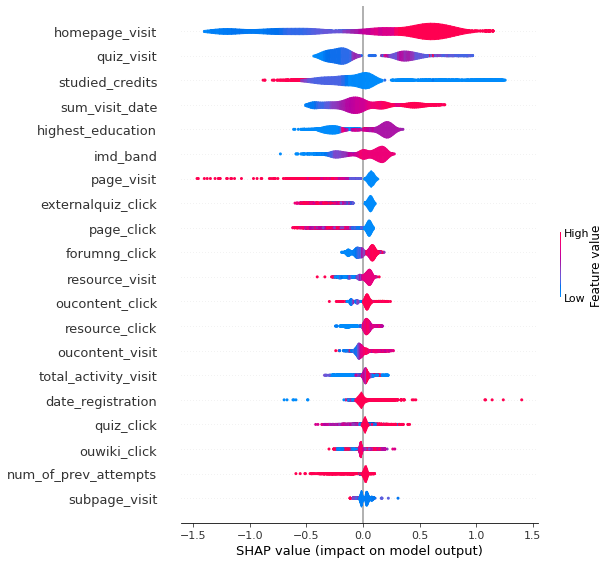

In [235]:
shap_values_x_train = explainerGB.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

In [236]:
shap_values_x_train[0]
shap_values_x_train[2]
shap_values_x_train[:,0]

array([-3.85133201e-02, -5.21246076e-03,  8.36232740e-02,  1.15742900e-02,
       -7.81318810e-03, -1.78925366e-01,  0.00000000e+00, -6.30958203e-03,
        4.22719271e-02, -1.41334839e-01,  4.26233563e-04,  1.33588253e-02,
        0.00000000e+00,  1.33181874e-03, -1.13760446e-01,  0.00000000e+00,
       -2.63580132e-02,  4.48832592e-02, -8.43515507e-03,  1.64975906e-02,
        0.00000000e+00, -1.65328572e-01,  1.67969207e-04,  8.09001674e-03,
       -1.07706333e-02, -2.75201805e-01,  0.00000000e+00, -4.97972554e-03,
        3.12919616e-03, -5.94872618e-03, -5.66531444e-04, -1.33060618e+00,
        0.00000000e+00,  1.03199124e-03, -4.27761518e-02,  0.00000000e+00,
        7.33985210e-03,  5.75330416e-02, -2.44282737e-02, -3.47343500e-01,
        0.00000000e+00, -2.21376788e-01,  1.47396648e-04,  2.14188270e-02,
        6.56900643e-03, -2.63054253e-01, -4.77273690e-01, -1.47331705e-02,
       -1.14705934e-02,  0.00000000e+00,  0.00000000e+00, -6.11831459e-04,
        0.00000000e+00,  

array([-4.15733387e-02,  1.57840217e-01,  1.25904144e-01,  1.15742900e-02,
        1.81107061e-02, -5.83582229e-01,  0.00000000e+00, -1.01506378e-02,
        6.51148750e-02,  6.24989796e-02,  3.75476501e-04, -2.75417993e-02,
        0.00000000e+00,  1.33181874e-03,  7.80824731e-02,  0.00000000e+00,
       -2.96453037e-02,  5.35165893e-02, -1.29068896e-02,  4.44297600e-03,
        0.00000000e+00,  2.87826726e-02,  1.67969207e-04,  1.62960717e-02,
        2.69650874e-03, -6.07314211e-03,  0.00000000e+00, -1.12448641e-02,
        9.96351768e-03,  9.93635178e-04, -1.50159712e-04,  3.31919692e-01,
        0.00000000e+00,  1.09305439e-03, -1.63131614e-02,  0.00000000e+00,
        1.04797197e-02,  8.06398402e-02, -3.15325965e-02, -2.10816406e-01,
        0.00000000e+00,  6.73066661e-02,  1.47396648e-04,  7.26620988e-02,
        1.03248528e-03,  1.11867585e-02, -6.53976874e-02, -2.34836284e-03,
       -4.33737895e-03,  0.00000000e+00,  0.00000000e+00, -6.11831459e-04,
        0.00000000e+00,  

array([-0.03851332, -0.04253401, -0.04157334, ...,  0.00828619,
       -0.02648705, -0.01568273])

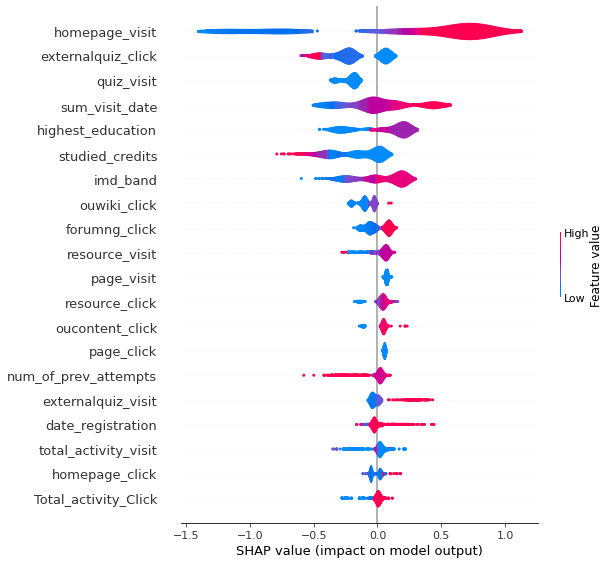

In [267]:
shap_values_x_test_AAA= explainerGB.shap_values(x_test_AAA)
shap.summary_plot(shap_values_x_test_AAA, x_test_AAA,plot_type="violin")

In [ ]:
shap_values_x_test_BBB= explainerGB.shap_values(x_test_BBB)
shap.summary_plot(shap_values_x_test_BBB, x_test_BBB,plot_type="violin")

In [261]:
x_test_DDD

date_registration  highest_education  imd_band  age_band  \
3                  -38.0                  4         3         3   
17                 -68.0                  4         1         1   
33                -131.0                  2         6         1   
87                -129.0                  4         1         1   
93                 -29.0                  3         5         2   
...                  ...                ...       ...       ...   
32478              -42.0                  2         6         1   
32490             -136.0                  2         6         2   
32529             -116.0                  3         3         1   
32579              -52.0                  2         7         1   
32592                0.0                  3         5         1   

       num_of_prev_attempts  studied_credits  dataplus_click  dualpane_click  \
3                         1               60             0.0             0.0   
17                        2              150             0.0             0.0   
33                        1               60             0.0             0.0   
87                        2               90             0.0             0.0   
93                        3               60             0.0             0.0   
...                     ...              ...             ...             ...   
32478                     0              120             0.0             0.0   
32490                     0               90             0.0             0.0   
32529                     1              120             0.0             0.0   
32579                     0               60             0.0             0.0   
32592                     0              120             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
3                     0.0            2.0             0.0             7.0   
17                    0.0            4.0             0.0            39.0   
33                    0.0            1.0            10.0            13.0   
87                    0.0            0.0             0.0             0.0   
93                    0.0            0.0             0.0             6.0   
...                   ...            ...             ...             ...   
32478                 3.0           73.0             9.0           101.0   
32490                 3.0          161.0            36.0           128.0   
32529                 3.0          312.0             0.0           107.0   
32579                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
3                     0.0                  1.0              0.0   
17                    0.0                  0.0              6.0   
33                    0.0                  0.0             15.0   
87                    0.0                  0.0              0.0   
93                    0.0                  0.0              0.0   
...                   ...                  ...              ...   
32478                 0.0                  1.0             74.0   
32490                 0.0                  7.0            102.0   
32529                 0.0                  6.0             73.0   
32579                 0.0                  0.0              0.0   
32592                 0.0                  0.0              0.0   

       ouelluminate_click  ouwiki_click  page_click  questionnaire_click  \
3                     0.0           0.0         0.0                  0.0   
17                    0.0           0.0         0.0                  0.0   
33                    0.0           0.0         0.0                  0.0   
87                    0.0           0.0         0.0                  0.0   
93                    0.0           0.0         0.0                  0.0   
...                   ...           ...         ...                

In [ ]:
shap_values_x_test_CCC = explainerGB.shap_values(x_test_CCC)
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC,plot_type="violin")

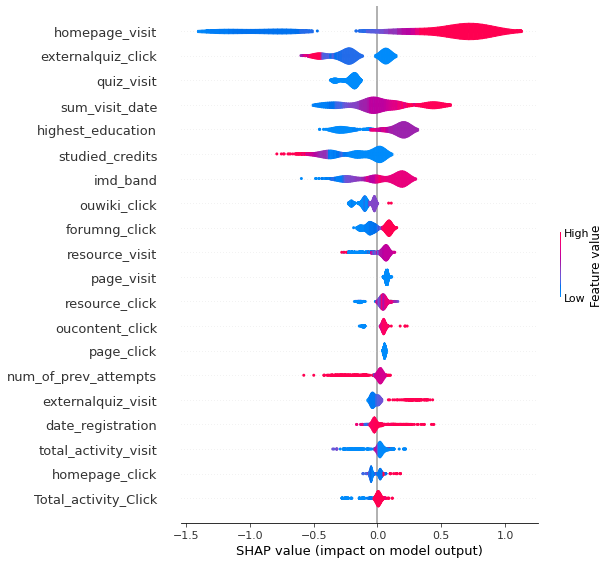

In [260]:
shap_values_x_test_DDD= explainerGB.shap_values(x_test_DDD)
shap.summary_plot(shap_values_x_test_DDD, x_test_DDD,plot_type="violin")

In [283]:
shap_values_x_test_DDD 

array([[ 0.02065148,  0.09534149, -0.05284168, ...,  0.        ,
         0.00321967, -0.00128317],
       [-0.03344435,  0.17416373, -0.27928091, ...,  0.        ,
         0.008729  ,  0.00729819],
       [-0.02430983, -0.2670159 ,  0.18394345, ...,  0.        ,
         0.00094446,  0.00065961],
       ...,
       [-0.04365144,  0.2324958 , -0.02901645, ...,  0.        ,
         0.01295231,  0.00774719],
       [ 0.00749739, -0.05820279,  0.10210163, ...,  0.        ,
        -0.03131438,  0.01208512],
       [ 0.36567249,  0.0776407 ,  0.07729219, ...,  0.        ,
         0.00884223,  0.00556699]])

In [ ]:
shap_values_x_test_EEE= explainerGB.shap_values(x_test_EEE)
shap.summary_plot(shap_values_x_test_EEE, x_test_EEE,plot_type="violin")

In [ ]:
shap_values_x_test_FFF= explainerGB.shap_values(x_test_FFF)
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="violin")

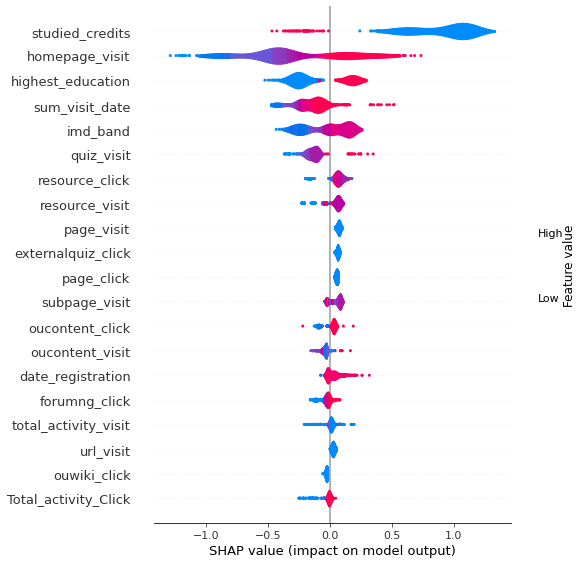

In [289]:
shap_values_x_test_GGG= explainerGB.shap_values(x_test_GGG)
shap.summary_plot(shap_values_x_test_GGG, x_test_GGG,plot_type="violin")

In [278]:
shap_values_x_test_DDD[0]
#shap_values_x_test_CCC[2]
#shap_values_x_test_CCC[:,0]

array([ 2.06514816e-02,  9.53414913e-02, -5.28416770e-02,  1.15742900e-02,
       -1.00129404e-01, -1.68424144e-01,  0.00000000e+00, -6.29353269e-03,
        6.41313872e-02, -1.55802996e-01,  4.26233563e-04,  2.52331472e-02,
        0.00000000e+00,  9.47841574e-04, -1.13760446e-01,  0.00000000e+00,
       -3.00695443e-02,  4.72903393e-02, -8.43515507e-03,  1.80173404e-02,
        0.00000000e+00, -1.38018155e-01,  5.06712958e-04,  8.09001674e-03,
       -7.79256922e-03, -6.17559409e-04,  0.00000000e+00, -4.97972554e-03,
        6.07032273e-03, -1.14332723e-02, -5.66531444e-04, -1.18730793e+00,
        0.00000000e+00, -5.18809203e-04, -4.30582642e-02,  0.00000000e+00,
        6.31510456e-03,  5.13184241e-02, -2.35006343e-02, -3.49725290e-01,
        0.00000000e+00, -2.24287369e-01,  1.47396648e-04,  2.14188270e-02,
        1.08906169e-02,  1.13056672e-01, -3.49235853e-01, -1.47331705e-02,
       -1.14705934e-02,  0.00000000e+00,  0.00000000e+00, -2.63883067e-03,
        0.00000000e+00,  

In [239]:
x_train.iloc[idx,:]


date_registration             -159.0
highest_education                4.0
imd_band                         9.0
age_band                         3.0
num_of_prev_attempts             0.0
studied_credits                240.0
dataplus_click                   0.0
dualpane_click                   0.0
externalquiz_click               0.0
forumng_click                   98.0
glossary_click                   0.0
homepage_click                  67.0
htmlactivity_click               0.0
oucollaborate_click              0.0
oucontent_click                331.0
ouelluminate_click               0.0
ouwiki_click                     0.0
page_click                       0.0
questionnaire_click              0.0
quiz_click                       0.0
repeatactivity_click             0.0
resource_click                   9.0
sharedsubpage_click              0.0
subpage_click                   23.0
url_click                        1.0
Total_activity_Click           529.0
dataplus_visit                   0.0
d

In [ ]:
#shap.plots.force(explainer.expected_value,shap_values.values,shap_values.data)

In [294]:
#shap.force_plot(ex.expected_value, shap_value[2], x_test.iloc[2,:])
idx=2
shap.force_plot(explainerGB.expected_value, 
                shap_values_x_train[idx,:], 
                x_train.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_DDD[idx,:], 
                x_test_DDD.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_GGG[idx,:], 
                x_test_GGG.iloc[idx,:])

In [268]:
#shap_values_x_train
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
#feature_importance
feature_importance.sort_values('importance', ascending=False)


feature  importance
31               homepage_visit    1.027951
5               studied_credits    0.322280
39                   quiz_visit    0.312113
1             highest_education    0.297842
46               sum_visit_date    0.275300
11               homepage_click    0.240849
2                      imd_band    0.202518
45         total_activity_visit    0.178325
0             date_registration    0.174154
14              oucontent_click    0.173906
9                 forumng_click    0.173526
25         Total_activity_Click    0.169367
8            externalquiz_click    0.167323
37                   page_visit    0.151251
19                   quiz_click    0.149430
34              oucontent_visit    0.137272
17                   page_click    0.135573
41               resource_visit    0.134397
44                    url_visit    0.117418
21               resource_click    0.116248
23                subpage_click    0.109996
16                 ouwiki_click    0.102942
24                    url_click    0.090427
29                forumng_visit    0.089034
43                subpage_visit    0.081291
4          num_of_prev_attempts    0.075603
7                dualpane_click    0.065940
36                 ouwiki_visit    0.042014
47                     gender_F    0.039792
3                      age_band    0.038270
27               dualpane_visit    0.035914
62                 disability_N    0.033096
13          oucollaborate_click    0.032601
59                 region_Wales    0.032525
18          questionnaire_click    0.030236
28           externalquiz_visit    0.029001
56     region_South East Region    0.027263
55              region_Scotland    0.026390
60  region_West Midlands Region    0.026330
58     region_South West Region    0.025868
38          questionnaire_visit    0.024660
33          oucollaborate_visit    0.020965
10               glossary_click    0.016070
49   region_East Anglian Region    0.015842
54  region_North Western Region    0.013398
53          region_North Region    0.012697
50  region_East Midlands Region    0.011627
61      region_Yorkshire Region    0.011153
52         region_London Region    0.009354
57          region_South Region    0.008804
51               region_Ireland    0.006808
30               glossary_visit    0.005563
6                dataplus_click    0.002808
22          sharedsubpage_click    0.000835
32           htmlactivity_visit    0.000000
48                     gender_M    0.000000
42          sharedsubpage_visit    0.000000
40         repeatactivity_visit    0.000000
35           ouelluminate_visit    0.000000
26               dataplus_visit    0.000000
20         repeatactivity_click    0.000000
15           ouelluminate_click    0.000000
12           htmlactivity_click    0.000000
63                 disability_Y    0.000000

In [284]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance['AAA'] = np.abs(shap_values_x_test_AAA).mean(0)
feature_importance['BBB'] = np.abs(shap_values_x_test_BBB).mean(0)
feature_importance['CCC'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['EEE'] = np.abs(shap_values_x_test_EEE).mean(0)
feature_importance['FFF'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance
feature_importance.sort_values('x_train', ascending=False)

NameError: name 'shap_values_x_test_BBB' is not defined

In [287]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)

feature  importance       DDD
31               homepage_visit    1.027951  0.689067
5               studied_credits    0.322280  0.194000
39                   quiz_visit    0.312113  0.220247
1             highest_education    0.297842  0.201119
46               sum_visit_date    0.275300  0.207670
11               homepage_click    0.240849  0.039188
2                      imd_band    0.202518  0.167367
45         total_activity_visit    0.178325  0.045118
0             date_registration    0.174154  0.045726
14              oucontent_click    0.173906  0.057297
9                 forumng_click    0.173526  0.078123
25         Total_activity_Click    0.169367  0.030453
8            externalquiz_click    0.167323  0.223418
37                   page_visit    0.151251  0.069526
19                   quiz_click    0.149430  0.010816
34              oucontent_visit    0.137272  0.028931
17                   page_click    0.135573  0.052594
41               resource_visit    0.134397  0.073912
44                    url_visit    0.117418  0.013837
21               resource_click    0.116248  0.058041
23                subpage_click    0.109996  0.014613
16                 ouwiki_click    0.102942  0.097298
24                    url_click    0.090427  0.007193
29                forumng_visit    0.089034  0.007463
43                subpage_visit    0.081291  0.029244
4          num_of_prev_attempts    0.075603  0.050753
7                dualpane_click    0.065940  0.010613
36                 ouwiki_visit    0.042014  0.014079
47                     gender_F    0.039792  0.004108
3                      age_band    0.038270  0.009811
27               dualpane_visit    0.035914  0.013095
62                 disability_N    0.033096  0.010933
13          oucollaborate_click    0.032601  0.006378
59                 region_Wales    0.032525  0.012068
18          questionnaire_click    0.030236  0.007017
28           externalquiz_visit    0.029001  0.046631
56     region_South East Region    0.027263  0.007379
55              region_Scotland    0.026390  0.005315
60  region_West Midlands Region    0.026330  0.003080
58     region_South West Region    0.025868  0.009670
38          questionnaire_visit    0.024660  0.021108
33          oucollaborate_visit    0.020965  0.014837
10               glossary_click    0.016070  0.015855
49   region_East Anglian Region    0.015842  0.000000
54  region_North Western Region    0.013398  0.002512
53          region_North Region    0.012697  0.000000
50  region_East Midlands Region    0.011627  0.000000
61      region_Yorkshire Region    0.011153  0.000000
52         region_London Region    0.009354  0.000000
57          region_South Region    0.008804  0.003412
51               region_Ireland    0.006808  0.001537
30               glossary_visit    0.005563  0.006097
6                dataplus_click    0.002808  0.000000
22          sharedsubpage_click    0.000835  0.000219
32           htmlactivity_visit    0.000000  0.000000
48                     gender_M    0.000000  0.006842
42          sharedsubpage_visit    0.000000  0.000311
40         repeatactivity_visit    0.000000  0.000000
35           ouelluminate_visit    0.000000  0.000000
26               dataplus_visit    0.000000  0.000000
20         repeatactivity_click    0.000000  0.000000
15           ouelluminate_click    0.000000  0.000000
12           htmlactivity_click    0.000000  0.000000
63                 disability_Y    0.000000  0.008488

In [295]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)

feature  importance       DDD       GGG
31               homepage_visit    1.027951  0.689067  0.435353
5               studied_credits    0.322280  0.194000  0.860999
39                   quiz_visit    0.312113  0.220247  0.145173
1             highest_education    0.297842  0.201119  0.224048
46               sum_visit_date    0.275300  0.207670  0.180313
11               homepage_click    0.240849  0.039188  0.017422
2                      imd_band    0.202518  0.167367  0.152047
45         total_activity_visit    0.178325  0.045118  0.030935
0             date_registration    0.174154  0.045726  0.043119
14              oucontent_click    0.173906  0.057297  0.047091
9                 forumng_click    0.173526  0.078123  0.040692
25         Total_activity_Click    0.169367  0.030453  0.024294
8            externalquiz_click    0.167323  0.223418  0.064215
37                   page_visit    0.151251  0.069526  0.071204
19                   quiz_click    0.149430  0.010816  0.018218
34              oucontent_visit    0.137272  0.028931  0.044741
17                   page_click    0.135573  0.052594  0.056845
41               resource_visit    0.134397  0.073912  0.072948
44                    url_visit    0.117418  0.013837  0.026081
21               resource_click    0.116248  0.058041  0.085656
23                subpage_click    0.109996  0.014613  0.019775
16                 ouwiki_click    0.102942  0.097298  0.024874
24                    url_click    0.090427  0.007193  0.001987
29                forumng_visit    0.089034  0.007463  0.010376
43                subpage_visit    0.081291  0.029244  0.055444
4          num_of_prev_attempts    0.075603  0.050753  0.018571
7                dualpane_click    0.065940  0.010613  0.008093
36                 ouwiki_visit    0.042014  0.014079  0.010761
47                     gender_F    0.039792  0.004108  0.003981
3                      age_band    0.038270  0.009811  0.020642
27               dualpane_visit    0.035914  0.013095  0.009996
62                 disability_N    0.033096  0.010933  0.006101
13          oucollaborate_click    0.032601  0.006378  0.001739
59                 region_Wales    0.032525  0.012068  0.013156
18          questionnaire_click    0.030236  0.007017  0.010378
28           externalquiz_visit    0.029001  0.046631  0.007204
56     region_South East Region    0.027263  0.007379  0.012229
55              region_Scotland    0.026390  0.005315  0.020131
60  region_West Midlands Region    0.026330  0.003080  0.002445
58     region_South West Region    0.025868  0.009670  0.006561
38          questionnaire_visit    0.024660  0.021108  0.022555
33          oucollaborate_visit    0.020965  0.014837  0.002030
10               glossary_click    0.016070  0.015855  0.004297
49   region_East Anglian Region    0.015842  0.000000  0.000000
54  region_North Western Region    0.013398  0.002512  0.003332
53          region_North Region    0.012697  0.000000  0.000000
50  region_East Midlands Region    0.011627  0.000000  0.000000
61      region_Yorkshire Region    0.011153  0.000000  0.000000
52         region_London Region    0.009354  0.000000  0.000000
57          region_South Region    0.008804  0.003412  0.003770
51               region_Ireland    0.006808  0.001537  0.001893
30               glossary_visit    0.005563  0.006097  0.003661
6                dataplus_click    0.002808  0.000000  0.000000
22          sharedsubpage_click    0.000835  0.000219  0.000375
32           htmlactivity_visit    0.000000  0.000000  0.000000
48                     gender_M    0.000000  0.006842  0.011959
42          sharedsubpage_visit    0.000000  0.000311  0.000252
40         repeatactivity_visit    0.000000  0.000000  0.000000
35           ouelluminate_visit    0.000000  0.000000  0.000000
26               dataplus_visit    0.000000  0.000000  0.000000
20         repeatactivity_click    0.000000  0.000000  0.000000
15           ouelluminate_click    0.000000  0.000000  0

feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance.sort_values('importance', ascending=False)


feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
print("x_train")
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
print("x_test_AAA")
shap.summary_plot(shap_values_x_test_AAA,x_test_AAA,plot_type="bar")
print("x_test_BBB")
shap.summary_plot(shap_values_x_test_BBB, x_test_BBB,plot_type="bar")
print("x_test_CCC")
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC,plot_type="bar")
print("x_test_DDD")
shap.summary_plot(shap_values_x_test_DDD,x_test_DDD,plot_type="bar")
print("x_test_EEE")
shap.summary_plot(shap_values_x_test_EEE, x_test_EEE,plot_type="bar")
print("x_test_FFF")
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="bar")
print("x_test_GGG")
shap.summary_plot(shap_values_x_test_GGG, x_test_GGG,plot_type="bar")

# XAI-2

In [ ]:
stop

# LR

In [246]:
# Logistic Regression #
clflogistic.fit(x_train,y_train)
y_pred_logistic=clflogistic.predict(x_test)
print('student info logistic regression')

print("F1:",round(metrics.f1_score(y_test, y_pred_logistic),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_logistic),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_logistic),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_logistic),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_logistic),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_logistic,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

student info logistic regression
F1: 0.716
Precision: 0.66
Recall: 0.783
Accuracy: 0.727
AUC: 0.733

 confusion_matrix 
 [[620 172]
 [320 691]] 

              precision    recall  f1-score   support

           0       0.80      0.68      0.74      1011
           1       0.66      0.78      0.72       792

    accuracy                           0.73      1803
   macro avg       0.73      0.73      0.73      1803
weighted avg       0.74      0.73      0.73      1803



In [247]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerGB = shap.Explainer(clflogistic)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

1

Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LogisticRegression()

In [248]:
explainer = shap.Explainer(clflogistic,x_train_summary)

#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LogisticRegression()

In [ ]:
explainer = shap.KernelExplainer(clflogistic,x_train_summary)

# SVM

In [249]:
# SVM #
clfsvc = clfsvc.fit(x_train,y_train)
y_pred_svm = clfsvc.predict(x_test)
print('student info svc')

print("F1:",round(metrics.f1_score(y_test, y_pred_svm),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_svm),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_svm),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_svm),3))

from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_svm),3))
from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_svm,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))


student info svc
F1: 0.725
Precision: 0.658
Recall: 0.807
Accuracy: 0.731
AUC: 0.739

 confusion_matrix 
 [[639 153]
 [332 679]] 

              precision    recall  f1-score   support

           0       0.82      0.67      0.74      1011
           1       0.66      0.81      0.72       792

    accuracy                           0.73      1803
   macro avg       0.74      0.74      0.73      1803
weighted avg       0.75      0.73      0.73      1803



In [250]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
#explainerGB = shap.TreeExplainer()
explainer = shap.Explainer(clfsvc)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

1

Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC()

In [ ]:
stop
idx=2
x_train.iloc[idx, :]
y_train.iloc[idx]

In [ ]:

#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

#explainervote7 = shap.KernelExplainer(votemodel7.predict,x_train_summary)


# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerGB2 = shap.Explainer(Gradientmodel.predict,x_train)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)



In [ ]:
x_train_summary = shap.kmeans(x_train, 10)
x_train_summary

In [ ]:
shap.initjs()
#explainerGB = shap.KernelExplainer(Gradientmodel,x_train_summary)
#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

In [ ]:
x_test.iloc[:,:]

In [ ]:
ExplainerGB2= shap.KernelExplainer(Gradientmodel.predict, x_train_summary)


In [ ]:
shap_values_x_test_FFF = ExplainerGB2.shap_values(x_test_FFF)

In [ ]:
#shap_values_x_train = explainerGB2.shap_values(x_train)
shap.summary_plot(shap_values_x_train, x_test)

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
shap_values_x_train[0]
shap_values_x_train[2]
shap_values_x_train[:,0]

In [ ]:
shap_values_x_test_CCC = explainerGB.shap_values(x_test_CCC)
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC)

In [ ]:
shap_values_x_test_CCC[0]
shap_values_x_test_CCC[2]
shap_values_x_test_CCC[:,0]

In [ ]:
shap_values_x_test_FFF= explainerGB.shap_values(x_test_FFF)
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF)

In [ ]:
#shap.plots.force(explainer.expected_value,shap_values.values,shap_values.data)

In [ ]:
#shap.force_plot(ex.expected_value, shap_value[2], x_test.iloc[2,:])
idx=2
shap.force_plot(explainer.expected_value, 
                shap_values_x_train[idx,:], 
                x_train.iloc[idx,:])

shap.force_plot(explainer.expected_value, 
                shap_values_x_test_CCC[idx,:], 
                x_test_CCC.iloc[idx,:])

shap.force_plot(explainer.expected_value, 
                shap_values_x_test_FFF[idx,:], 
                x_test_FFF.iloc[idx,:])

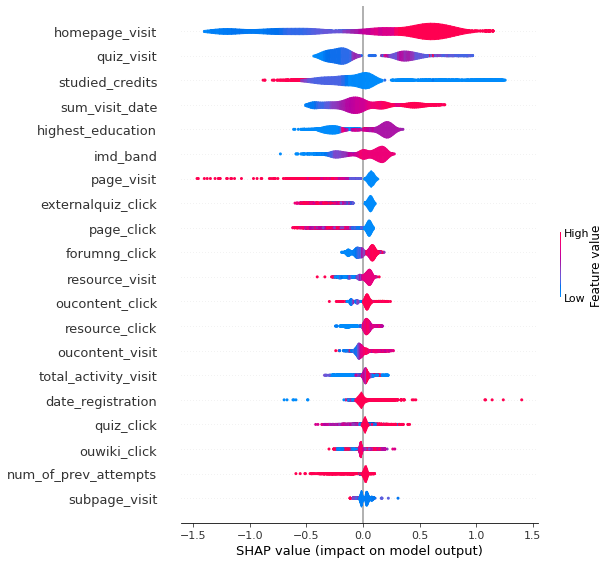

NameError: name 'shap_values_x_test_CCC' is not defined

In [251]:

shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")
shap.summary_plot(shap_values_x_test_CCC,x_test_CCC,plot_type="violin")
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="violin")

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
shap.summary_plot(shap_values_x_test_CCC,x_test_CCC,plot_type="bar")
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="bar")

# XAI-3

In [ ]:
Explainerbote7= shap.KernelExplainer(votemodel7.predict, x_train_summary)
shap_values_x_test_FFF = Explainerbote7.shap_values(x_test_FFF)

In [ ]:
#shap_values_x_train = explainerGB2.shap_values(x_train)
shap.summary_plot(shap_values_x_train, x_test)

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)


In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
#hap.plots.scatter(shap_values[:,"sum_visit_date"])

In [ ]:
#shap.plots.waterfall(shap_values_x_train, max_display=14)
#shap.plots.waterfall(shap_values[0,], max_display=14)
#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
#explainer.expected_value
#model.predict_proba(x_train)

In [ ]:
#shap.plots.waterfall(shap_values_x_train[idx,:], max_display=14)
#shap.plots.waterfall(shap_values[0,], max_display=14)

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, x_train)

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
#shap.dependence_plot("sum_visit_date", shap_values, x_train)

In [ ]:
#shap_interaction_values=explainer.shap_interaction_values(x_train)
#shap.summary_plot(shap_interaction_values,x_train)

In [ ]:
"""shap.plots.partial_dependence(
    "sum_visit_date", model.predict, x_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)"""

In [ ]:
"""
shap.partial_dependence_plot(
     "sum_visit_date", model.predict, x_test, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[0:1,:]
)"""

In [ ]:
y = dataForRunningModel["FinalResult"]
X = dataForRunningModel.drop(["FinalResult","code_module","code_presentation","id_student"], axis=1)

In [ ]:
dataForRunningModel

In [ ]:
X
y

In [ ]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y = y
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
x_train

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [308]:
model = XGBClassifier()
model.fit(x_train, y_train)


from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

calculate_accuracy(model, x_test, y_test)

y_pred = model.predict(x_test)

print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[22:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 67.72%


0.6772046589018302

F1: 0.5695266272189349
Precision: 0.6875
Recall: 0.4861111111111111
Accuracy: 0.6772046589018302
AUC: 0.6565075832509069

 confusion_matrix 
 [[385 407]
 [175 836]] 

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1011
           1       0.69      0.49      0.57       792

    accuracy                           0.68      1803
   macro avg       0.68      0.66      0.66      1803
weighted avg       0.68      0.68      0.67      1803



pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [309]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerXGB = shap.TreeExplainer(model)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

1

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


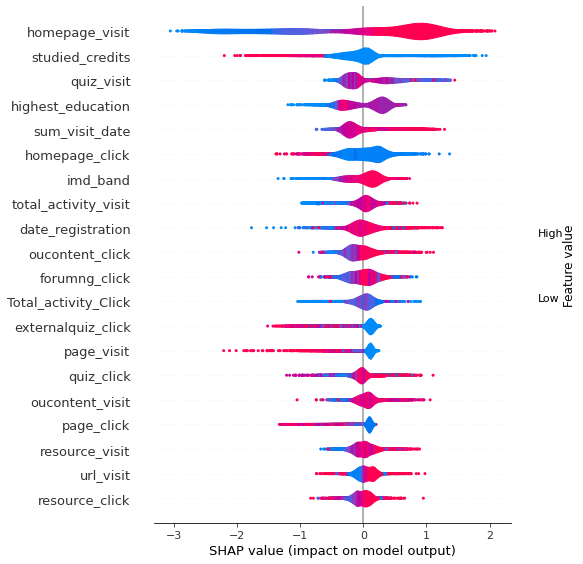

In [310]:
shap_values_x_train = explainerXGB.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

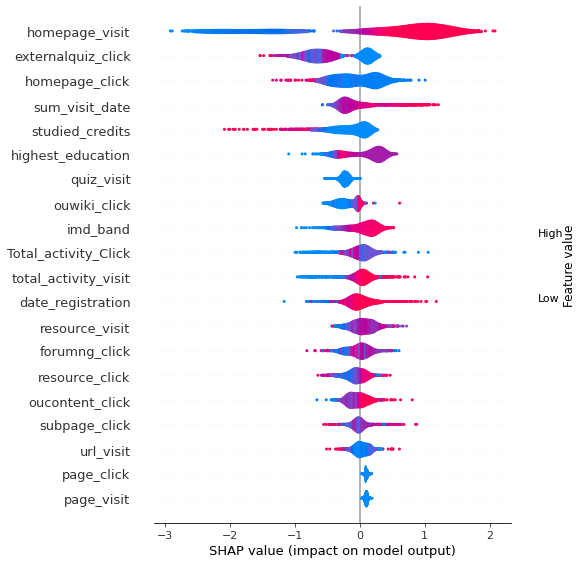

In [311]:
shap_values_x_test= explainerXGB.shap_values(x_test)
shap.summary_plot(shap_values_x_test, x_test,plot_type="violin")

x_train


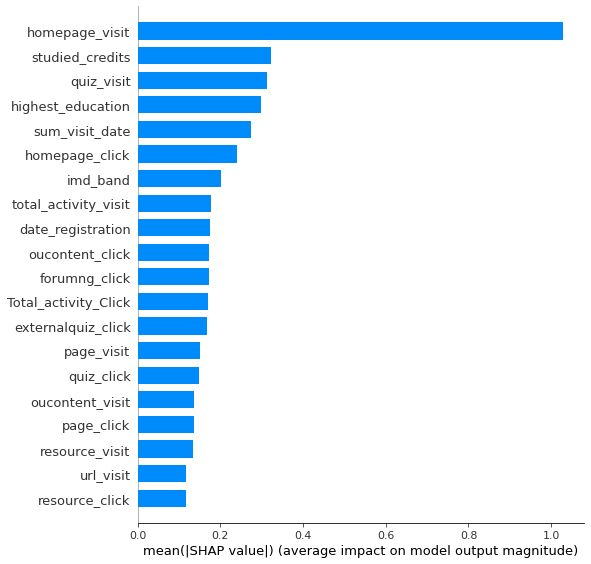

x_test


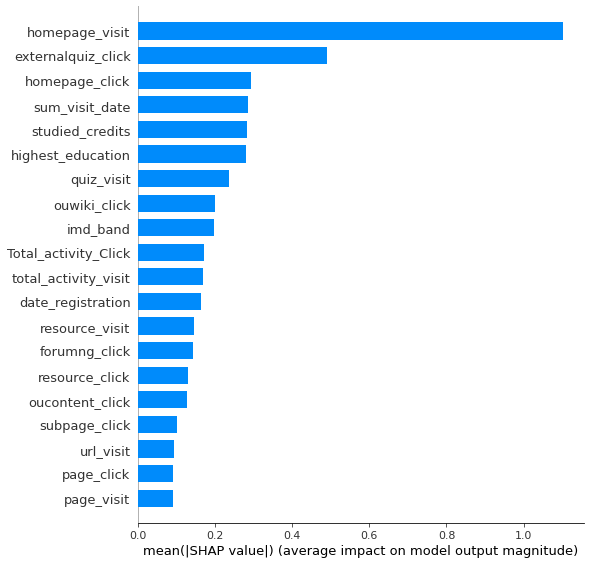

In [257]:
print("x_train")
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
print("x_test")
shap.summary_plot(shap_values_x_test,x_test,plot_type="bar")

In [299]:
shap.initjs()
#explainerGB = shap.KernelExplainer(Gradientmodel,x_train_summary)
#explainerGB = shap.GradientExplainer(Gradientmodel,x_train_summary)
#shap_values = explainerGB.shap_values(x_train)
#shap_values = explainer.shap_values(x_train)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


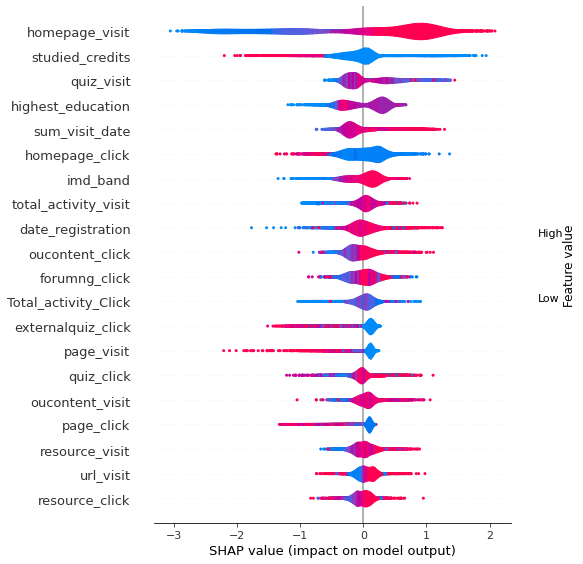

In [320]:
shap_values_x_train = explainerXGB.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

In [321]:
shap_values_x_train[0]
shap_values_x_train[2]
shap_values_x_train[:,0]

array([-1.56668186e-01, -2.37285107e-01,  1.26051053e-01,  6.08841069e-02,
       -2.49465853e-01, -4.74453151e-01, -1.26871828e-03, -1.63872577e-02,
        7.85488039e-02, -3.42736334e-01, -3.94805195e-03,  1.83044285e-01,
        0.00000000e+00, -4.18589544e-03, -1.97347388e-01,  0.00000000e+00,
       -3.82171348e-02,  6.70710132e-02, -1.14021590e-02, -5.60390726e-02,
        0.00000000e+00, -1.09034628e-01,  1.75165333e-04, -3.38875800e-02,
       -2.19663605e-02, -5.79719841e-01,  0.00000000e+00, -1.28742028e-02,
       -4.05110791e-03,  5.44419922e-02, -4.59945202e-03, -2.57634902e+00,
        0.00000000e+00,  6.16484787e-03,  1.65564850e-01,  0.00000000e+00,
        2.64727697e-02,  1.18110694e-01, -9.76038072e-03, -3.51358086e-01,
        0.00000000e+00, -1.56535640e-01,  0.00000000e+00,  2.48852768e-03,
        7.28716254e-02, -9.19885099e-01, -2.60536939e-01, -1.54531762e-01,
        0.00000000e+00, -5.84395453e-02, -3.98454303e-03,  2.58210814e-03,
        5.26581472e-03,  

array([ 4.7121957e-01,  2.6771219e-02,  2.0033717e-01,  1.1026576e-01,
        3.6552716e-02, -4.0598160e-01, -1.1857165e-03, -1.5488470e-02,
        1.8496418e-01,  6.4868793e-02,  1.9515732e-03, -1.3905735e-01,
        0.0000000e+00, -1.0133674e-02,  5.1869977e-01,  0.0000000e+00,
       -9.7640917e-02,  7.3936269e-02, -2.1133889e-02, -6.7901358e-02,
        0.0000000e+00,  6.4116947e-02,  2.6722671e-04,  1.0484586e-02,
       -1.7533317e-02, -7.8756884e-02,  0.0000000e+00, -2.4448356e-02,
        1.2815718e-03, -1.1240783e-01, -1.3035886e-03,  4.2234892e-01,
        0.0000000e+00,  8.6709755e-03, -3.1070307e-02,  0.0000000e+00,
        4.2501250e-03,  9.9266656e-02, -1.2363173e-02, -3.0743006e-01,
        0.0000000e+00,  1.0502247e-01,  0.0000000e+00, -6.1914358e-02,
        1.2991256e-01, -3.8134784e-02, -1.4149587e-01,  1.1936212e-01,
        0.0000000e+00,  6.5790176e-02, -2.6925826e-02, -3.6317466e-03,
        9.1965310e-05, -6.1639296e-03,  9.4369585e-03,  1.5549945e-02,
      

array([-0.15666819, -0.31707886,  0.47121957, ...,  0.06305043,
       -0.17319585, -0.0760148 ], dtype=float32)

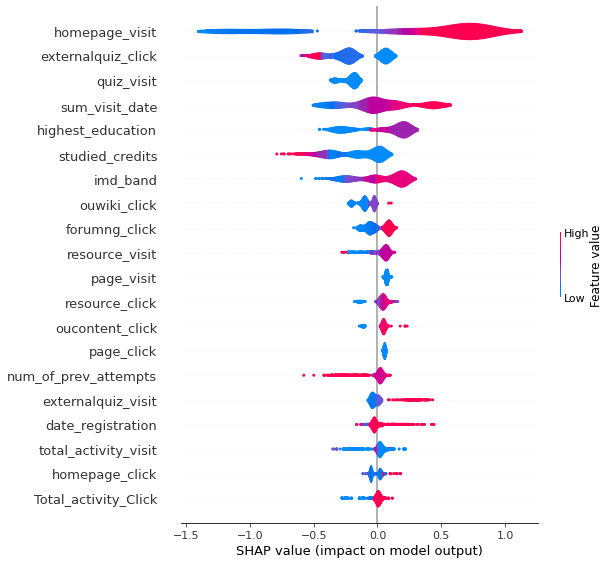

In [267]:
shap_values_x_test_AAA= explainerGB.shap_values(x_test_AAA)
shap.summary_plot(shap_values_x_test_AAA, x_test_AAA,plot_type="violin")

In [ ]:
shap_values_x_test_BBB= explainerGB.shap_values(x_test_BBB)
shap.summary_plot(shap_values_x_test_BBB, x_test_BBB,plot_type="violin")

In [261]:
x_test_DDD

date_registration  highest_education  imd_band  age_band  \
3                  -38.0                  4         3         3   
17                 -68.0                  4         1         1   
33                -131.0                  2         6         1   
87                -129.0                  4         1         1   
93                 -29.0                  3         5         2   
...                  ...                ...       ...       ...   
32478              -42.0                  2         6         1   
32490             -136.0                  2         6         2   
32529             -116.0                  3         3         1   
32579              -52.0                  2         7         1   
32592                0.0                  3         5         1   

       num_of_prev_attempts  studied_credits  dataplus_click  dualpane_click  \
3                         1               60             0.0             0.0   
17                        2              150             0.0             0.0   
33                        1               60             0.0             0.0   
87                        2               90             0.0             0.0   
93                        3               60             0.0             0.0   
...                     ...              ...             ...             ...   
32478                     0              120             0.0             0.0   
32490                     0               90             0.0             0.0   
32529                     1              120             0.0             0.0   
32579                     0               60             0.0             0.0   
32592                     0              120             0.0             0.0   

       externalquiz_click  forumng_click  glossary_click  homepage_click  \
3                     0.0            2.0             0.0             7.0   
17                    0.0            4.0             0.0            39.0   
33                    0.0            1.0            10.0            13.0   
87                    0.0            0.0             0.0             0.0   
93                    0.0            0.0             0.0             6.0   
...                   ...            ...             ...             ...   
32478                 3.0           73.0             9.0           101.0   
32490                 3.0          161.0            36.0           128.0   
32529                 3.0          312.0             0.0           107.0   
32579                 0.0            0.0             0.0             0.0   
32592                 0.0            0.0             0.0             0.0   

       htmlactivity_click  oucollaborate_click  oucontent_click  \
3                     0.0                  1.0              0.0   
17                    0.0                  0.0              6.0   
33                    0.0                  0.0             15.0   
87                    0.0                  0.0              0.0   
93                    0.0                  0.0              0.0   
...                   ...                  ...              ...   
32478                 0.0                  1.0             74.0   
32490                 0.0                  7.0            102.0   
32529                 0.0                  6.0             73.0   
32579                 0.0                  0.0              0.0   
32592                 0.0                  0.0              0.0   

       ouelluminate_click  ouwiki_click  page_click  questionnaire_click  \
3                     0.0           0.0         0.0                  0.0   
17                    0.0           0.0         0.0                  0.0   
33                    0.0           0.0         0.0                  0.0   
87                    0.0           0.0         0.0                  0.0   
93                    0.0           0.0         0.0                  0.0   
...                   ...           ...         ...                

In [ ]:
shap_values_x_test_CCC = explainerGB.shap_values(x_test_CCC)
shap.summary_plot(shap_values_x_test_CCC, x_test_CCC,plot_type="violin")

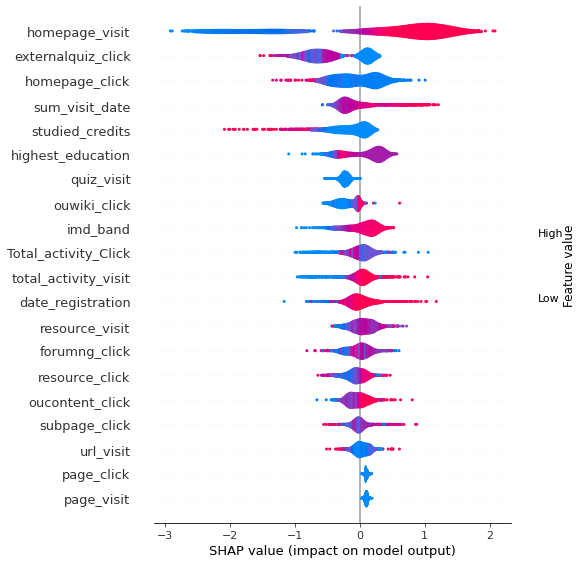

In [313]:
shap_values_x_test_DDD= explainerXGB.shap_values(x_test_DDD)
shap.summary_plot(shap_values_x_test_DDD, x_test_DDD,plot_type="violin")

In [314]:
shap_values_x_test_DDD 

array([[ 0.05359845, -0.20302531, -0.03660892, ...,  0.00148792,
         0.00884398,  0.        ],
       [-0.2437035 ,  0.2191037 , -0.3351559 , ...,  0.00663641,
         0.03474662,  0.        ],
       [-0.1711235 , -0.31147027,  0.22269276, ..., -0.00563921,
         0.00115529,  0.        ],
       ...,
       [-0.03701492,  0.43150663,  0.06563462, ..., -0.00253885,
         0.03064089,  0.        ],
       [-0.17252652, -0.16286723,  0.07917199, ...,  0.00637149,
        -0.17046495,  0.        ],
       [ 0.15120599,  0.21946006,  0.03821938, ..., -0.00345621,
         0.02639524,  0.        ]], dtype=float32)

In [ ]:
shap_values_x_test_EEE= explainerGB.shap_values(x_test_EEE)
shap.summary_plot(shap_values_x_test_EEE, x_test_EEE,plot_type="violin")

In [ ]:
shap_values_x_test_FFF= explainerGB.shap_values(x_test_FFF)
shap.summary_plot(shap_values_x_test_FFF, x_test_FFF,plot_type="violin")

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


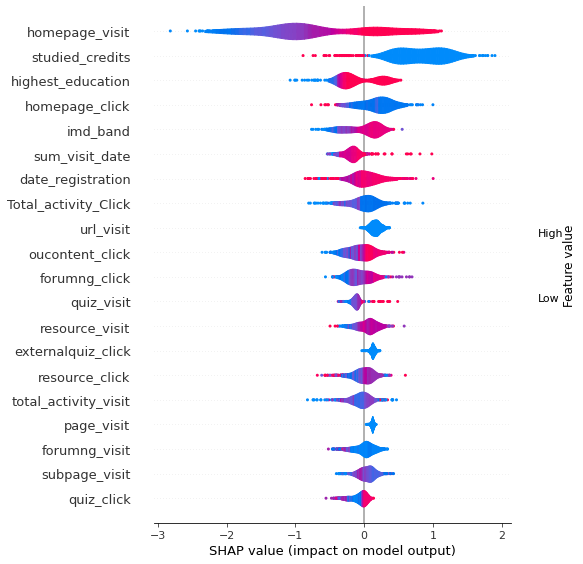

In [318]:
shap_values_x_test_GGG= explainerXGB.shap_values(x_test_GGG)
shap.summary_plot(shap_values_x_test_GGG, x_test_GGG,plot_type="violin")

In [315]:
shap_values_x_test_DDD[0]
#shap_values_x_test_CCC[2]
#shap_values_x_test_CCC[:,0]

array([ 5.35984524e-02, -2.03025311e-01, -3.66089158e-02,  1.12237155e-01,
       -5.55446930e-02, -3.34390163e-01, -1.23595772e-03, -1.18689332e-02,
        6.82972968e-02, -4.14444119e-01, -2.92051118e-03,  3.88036340e-01,
        0.00000000e+00, -3.48549373e-02, -1.76009804e-01,  0.00000000e+00,
       -4.46908213e-02,  8.24726075e-02, -1.03254300e-02, -6.37803078e-02,
        0.00000000e+00, -1.28304452e-01,  1.53448185e-04,  5.88137358e-02,
        8.22351575e-02,  2.02024609e-01,  0.00000000e+00, -1.34719517e-02,
        2.49014306e-03,  6.84586167e-02, -4.85986611e-03, -2.37708879e+00,
        0.00000000e+00,  6.20741444e-03,  1.62739456e-01,  0.00000000e+00,
       -1.96607690e-02,  1.07361719e-01, -8.48593842e-03, -2.77367890e-01,
        0.00000000e+00, -1.70793891e-01,  0.00000000e+00,  1.33690853e-02,
        8.93141925e-02, -2.09066883e-01, -2.45389715e-01, -1.79975390e-01,
        0.00000000e+00, -3.12764049e-02, -2.61381082e-03,  2.58210814e-03,
       -1.25962198e-02, -

In [239]:
x_train.iloc[idx,:]


date_registration             -159.0
highest_education                4.0
imd_band                         9.0
age_band                         3.0
num_of_prev_attempts             0.0
studied_credits                240.0
dataplus_click                   0.0
dualpane_click                   0.0
externalquiz_click               0.0
forumng_click                   98.0
glossary_click                   0.0
homepage_click                  67.0
htmlactivity_click               0.0
oucollaborate_click              0.0
oucontent_click                331.0
ouelluminate_click               0.0
ouwiki_click                     0.0
page_click                       0.0
questionnaire_click              0.0
quiz_click                       0.0
repeatactivity_click             0.0
resource_click                   9.0
sharedsubpage_click              0.0
subpage_click                   23.0
url_click                        1.0
Total_activity_Click           529.0
dataplus_visit                   0.0
d

In [ ]:
#shap.plots.force(explainer.expected_value,shap_values.values,shap_values.data)

In [294]:
#shap.force_plot(ex.expected_value, shap_value[2], x_test.iloc[2,:])
idx=2
shap.force_plot(explainerGB.expected_value, 
                shap_values_x_train[idx,:], 
                x_train.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_DDD[idx,:], 
                x_test_DDD.iloc[idx,:])

shap.force_plot(explainerGB.expected_value, 
                shap_values_x_test_GGG[idx,:], 
                x_test_GGG.iloc[idx,:])

In [305]:
#shap_values_x_train
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
#feature_importance
feature_importance.sort_values('importance', ascending=False)


feature  importance
31               homepage_visit    1.027951
5               studied_credits    0.322280
39                   quiz_visit    0.312113
1             highest_education    0.297842
46               sum_visit_date    0.275300
11               homepage_click    0.240849
2                      imd_band    0.202518
45         total_activity_visit    0.178325
0             date_registration    0.174154
14              oucontent_click    0.173906
9                 forumng_click    0.173526
25         Total_activity_Click    0.169367
8            externalquiz_click    0.167323
37                   page_visit    0.151251
19                   quiz_click    0.149430
34              oucontent_visit    0.137272
17                   page_click    0.135573
41               resource_visit    0.134397
44                    url_visit    0.117418
21               resource_click    0.116248
23                subpage_click    0.109996
16                 ouwiki_click    0.102942
24                    url_click    0.090427
29                forumng_visit    0.089034
43                subpage_visit    0.081291
4          num_of_prev_attempts    0.075603
7                dualpane_click    0.065940
36                 ouwiki_visit    0.042014
47                     gender_F    0.039792
3                      age_band    0.038270
27               dualpane_visit    0.035914
62                 disability_N    0.033096
13          oucollaborate_click    0.032601
59                 region_Wales    0.032525
18          questionnaire_click    0.030236
28           externalquiz_visit    0.029001
56     region_South East Region    0.027263
55              region_Scotland    0.026390
60  region_West Midlands Region    0.026330
58     region_South West Region    0.025868
38          questionnaire_visit    0.024660
33          oucollaborate_visit    0.020965
10               glossary_click    0.016070
49   region_East Anglian Region    0.015842
54  region_North Western Region    0.013398
53          region_North Region    0.012697
50  region_East Midlands Region    0.011627
61      region_Yorkshire Region    0.011153
52         region_London Region    0.009354
57          region_South Region    0.008804
51               region_Ireland    0.006808
30               glossary_visit    0.005563
6                dataplus_click    0.002808
22          sharedsubpage_click    0.000835
32           htmlactivity_visit    0.000000
48                     gender_M    0.000000
42          sharedsubpage_visit    0.000000
40         repeatactivity_visit    0.000000
35           ouelluminate_visit    0.000000
26               dataplus_visit    0.000000
20         repeatactivity_click    0.000000
15           ouelluminate_click    0.000000
12           htmlactivity_click    0.000000
63                 disability_Y    0.000000

In [284]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance['AAA'] = np.abs(shap_values_x_test_AAA).mean(0)
feature_importance['BBB'] = np.abs(shap_values_x_test_BBB).mean(0)
feature_importance['CCC'] = np.abs(shap_values_x_test_CCC).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['EEE'] = np.abs(shap_values_x_test_EEE).mean(0)
feature_importance['FFF'] = np.abs(shap_values_x_test_FFF).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance
feature_importance.sort_values('x_train', ascending=False)

NameError: name 'shap_values_x_test_BBB' is not defined

In [316]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('importance', ascending=False)

feature  importance       DDD
31               homepage_visit    1.027951  1.100974
5               studied_credits    0.322280  0.283513
39                   quiz_visit    0.312113  0.237729
1             highest_education    0.297842  0.280053
46               sum_visit_date    0.275300  0.284940
11               homepage_click    0.240849  0.293062
2                      imd_band    0.202518  0.198671
45         total_activity_visit    0.178325  0.170698
0             date_registration    0.174154  0.164137
14              oucontent_click    0.173906  0.129035
9                 forumng_click    0.173526  0.143119
25         Total_activity_Click    0.169367  0.172328
8            externalquiz_click    0.167323  0.490090
37                   page_visit    0.151251  0.091877
19                   quiz_click    0.149430  0.075619
34              oucontent_visit    0.137272  0.090291
17                   page_click    0.135573  0.092793
41               resource_visit    0.134397  0.146254
44                    url_visit    0.117418  0.095107
21               resource_click    0.116248  0.131189
23                subpage_click    0.109996  0.102158
16                 ouwiki_click    0.102942  0.201094
24                    url_click    0.090427  0.083760
29                forumng_visit    0.089034  0.090572
43                subpage_visit    0.081291  0.074875
4          num_of_prev_attempts    0.075603  0.085921
7                dualpane_click    0.065940  0.024189
36                 ouwiki_visit    0.042014  0.030109
47                     gender_F    0.039792  0.036448
3                      age_band    0.038270  0.029777
27               dualpane_visit    0.035914  0.013404
62                 disability_N    0.033096  0.039528
13          oucollaborate_click    0.032601  0.053999
59                 region_Wales    0.032525  0.022258
18          questionnaire_click    0.030236  0.011061
28           externalquiz_visit    0.029001  0.068466
56     region_South East Region    0.027263  0.029837
55              region_Scotland    0.026390  0.031729
60  region_West Midlands Region    0.026330  0.022341
58     region_South West Region    0.025868  0.033801
38          questionnaire_visit    0.024660  0.011649
33          oucollaborate_visit    0.020965  0.052573
10               glossary_click    0.016070  0.080002
49   region_East Anglian Region    0.015842  0.016668
54  region_North Western Region    0.013398  0.011895
53          region_North Region    0.012697  0.013432
50  region_East Midlands Region    0.011627  0.010190
61      region_Yorkshire Region    0.011153  0.007829
52         region_London Region    0.009354  0.009347
57          region_South Region    0.008804  0.007675
51               region_Ireland    0.006808  0.005225
30               glossary_visit    0.005563  0.017397
6                dataplus_click    0.002808  0.001186
22          sharedsubpage_click    0.000835  0.000253
32           htmlactivity_visit    0.000000  0.000000
48                     gender_M    0.000000  0.000000
42          sharedsubpage_visit    0.000000  0.000000
40         repeatactivity_visit    0.000000  0.000000
35           ouelluminate_visit    0.000000  0.000000
26               dataplus_visit    0.000000  0.000000
20         repeatactivity_click    0.000000  0.000000
15           ouelluminate_click    0.000000  0.000000
12           htmlactivity_click    0.000000  0.000000
63                 disability_Y    0.000000  0.000000

In [323]:
#shap_values_x_test_AAA
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = np.abs(shap_values_x_train).mean(0)
feature_importance['DDD'] = np.abs(shap_values_x_test_DDD).mean(0)
feature_importance['GGG'] = np.abs(shap_values_x_test_GGG).mean(0)
#feature_importance['x_train'] = np.abs(shap_values_x_train).mean(0)
feature_importance.sort_values('DDD', ascending=False)

feature  importance       DDD       GGG
31               homepage_visit    1.027951  1.100974  0.938175
8            externalquiz_click    0.167323  0.490090  0.124757
11               homepage_click    0.240849  0.293062  0.253027
46               sum_visit_date    0.275300  0.284940  0.200553
5               studied_credits    0.322280  0.283513  0.807743
1             highest_education    0.297842  0.280053  0.285118
39                   quiz_visit    0.312113  0.237729  0.136328
16                 ouwiki_click    0.102942  0.201094  0.045344
2                      imd_band    0.202518  0.198671  0.210680
25         Total_activity_Click    0.169367  0.172328  0.161431
45         total_activity_visit    0.178325  0.170698  0.122770
0             date_registration    0.174154  0.164137  0.182152
41               resource_visit    0.134397  0.146254  0.127366
9                 forumng_click    0.173526  0.143119  0.155811
21               resource_click    0.116248  0.131189  0.123237
14              oucontent_click    0.173906  0.129035  0.158524
23                subpage_click    0.109996  0.102158  0.091021
44                    url_visit    0.117418  0.095107  0.160152
17                   page_click    0.135573  0.092793  0.104015
37                   page_visit    0.151251  0.091877  0.117263
29                forumng_visit    0.089034  0.090572  0.117083
34              oucontent_visit    0.137272  0.090291  0.094116
4          num_of_prev_attempts    0.075603  0.085921  0.040484
24                    url_click    0.090427  0.083760  0.066665
10               glossary_click    0.016070  0.080002  0.030881
19                   quiz_click    0.149430  0.075619  0.104511
43                subpage_visit    0.081291  0.074875  0.105979
28           externalquiz_visit    0.029001  0.068466  0.005523
13          oucollaborate_click    0.032601  0.053999  0.012508
33          oucollaborate_visit    0.020965  0.052573  0.008220
62                 disability_N    0.033096  0.039528  0.034209
47                     gender_F    0.039792  0.036448  0.043443
58     region_South West Region    0.025868  0.033801  0.029497
55              region_Scotland    0.026390  0.031729  0.034431
36                 ouwiki_visit    0.042014  0.030109  0.036623
56     region_South East Region    0.027263  0.029837  0.044194
3                      age_band    0.038270  0.029777  0.048382
7                dualpane_click    0.065940  0.024189  0.020191
60  region_West Midlands Region    0.026330  0.022341  0.020339
59                 region_Wales    0.032525  0.022258  0.022531
30               glossary_visit    0.005563  0.017397  0.007159
49   region_East Anglian Region    0.015842  0.016668  0.016365
53          region_North Region    0.012697  0.013432  0.009315
27               dualpane_visit    0.035914  0.013404  0.011383
54  region_North Western Region    0.013398  0.011895  0.018907
38          questionnaire_visit    0.024660  0.011649  0.010113
18          questionnaire_click    0.030236  0.011061  0.009439
50  region_East Midlands Region    0.011627  0.010190  0.012576
52         region_London Region    0.009354  0.009347  0.011203
61      region_Yorkshire Region    0.011153  0.007829  0.011297
57          region_South Region    0.008804  0.007675  0.008549
51               region_Ireland    0.006808  0.005225  0.006683
6                dataplus_click    0.002808  0.001186  0.001297
22          sharedsubpage_click    0.000835  0.000253  0.000270
32           htmlactivity_visit    0.000000  0.000000  0.000000
48                     gender_M    0.000000  0.000000  0.000000
42          sharedsubpage_visit    0.000000  0.000000  0.000000
40         repeatactivity_visit    0.000000  0.000000  0.000000
35           ouelluminate_visit    0.000000  0.000000  0.000000
26               dataplus_visit    0.000000  0.000000  0.000000
20         repeatactivity_click    0.000000  0.000000  0.000000
15           ouelluminate_click    0.000000  0.000000  0

# RF

In [ ]:
#Random forest
clfrandom = clfrandom.fit(x_train,y_train)
y_pred_random=clfrandom.predict(x_test)
print('student info random forest')
print("F1:",metrics.f1_score(y_test, y_pred_random))
print("Precision:",metrics.precision_score(y_test, y_pred_random))
print("Recall:",metrics.recall_score(y_test, y_pred_random))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))


from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,y_pred_random))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_random,labels=[1,0]),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random))

In [ ]:
#idx=idx+1

y_train.iloc[idx]
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatB)oost, and scikit-learn models)
explainerRF = shap.TreeExplainer(clfrandom)
#explainer = shap.Explainer(votemodel7)

#shap.Explainer(votemodel7.predict, x_train)
#explainer =shap.KernelExplainer(votemodel7)

#shap.Explainer(Gradientmodel.predict, x_train)

In [ ]:
shap_values_x_train = explainerRF.shap_values(x_train)
#shap.summary_plot(shap_values_x_train, x_train)
shap.summary_plot(shap_values_x_train, x_train,plot_type="violin")

In [ ]:
shap_values_x_test= explainerRF.shap_values(x_test)
shap.summary_plot(shap_values_x_test, x_test,plot_type="violin")

In [ ]:
print("x_train")
shap.summary_plot(shap_values_x_train, x_train,plot_type="bar")
print("x_test")
shap.summary_plot(shap_values_x_test,x_test,plot_type="bar")

In [ ]:
#20220708 SCD

In [ ]:
#지난 모든 학기의 동일 수업




dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation!="2014J")]
dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="EEE")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB)&(dataForRunningModel.code_presentation!="2014J")]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="BBB")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation!="2014J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]


###
#TermB=['2013B','2014B']

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="AAA")&(dataForRunningModel.code_presentation=="2014J")]

#dataForRunningModel_PastTerm=dataForRunningModel[dataForRunningModel.code_presentation=="2013J"]
#dataForRunningModel_PredictTerm=dataForRunningModel[(dataForRunningModel.code_module=="DDD")&(dataForRunningModel.code_presentation=="2014J")]

#df.loc[df['B'].isin(['one','three'])])

dataForRunningModel_PastTerm.sort_values("code_presentation")
dataForRunningModel_PastTerm.sort_values("code_module")
dataForRunningModel_PredictTerm

In [ ]:
dataForRunningModel_PastTerm2=dataForRunningModel_PastTerm.drop(columns=({"code_module","code_presentation","id_student"}))
dataForRunningModel_PredictTerm2=dataForRunningModel_PredictTerm.drop(columns=({"code_module","code_presentation","id_student"}))

In [ ]:

x_train=dataForRunningModel_PastTerm2.drop(["FinalResult"], axis=1)
y_train=dataForRunningModel_PastTerm2["FinalResult"]

x_test=dataForRunningModel_PredictTerm2.drop(["FinalResult"], axis=1)
y_test=dataForRunningModel_PredictTerm2["FinalResult"]

In [ ]:
import sklearn.metrics as metrics

In [ ]:
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc),("clflogistic",clflogistic),("knnmodel",knnmodel)],voting='hard')
#votemodel6 = VotingClassifier([('clfrandom', clfrandom), ('Gradientmodel', Gradientmodel),("XGBmodel",XGBmodel),("adamodel",adamodel),("baggingmodel",baggingmodel),("clfsvc",clfsvc)],voting='hard')
votemodel6 = VotingClassifier([("clfsvc",clfsvc),("knnmodel",knnmodel),("clflogistic",clflogistic)],voting='hard')


votemodel6 =  votemodel6.fit(x_train,y_train)
y_pred_votemodel6=votemodel6.predict(x_test)
print('student info VotingClassifier(LR+KNN+SVM)-hard')

print("F1:",round(metrics.f1_score(y_test, y_pred_votemodel6),3))
print("Precision:",round(metrics.precision_score(y_test, y_pred_votemodel6),3))
print("Recall:",round(metrics.recall_score(y_test, y_pred_votemodel6),3))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_votemodel6),3))


from sklearn.metrics import roc_auc_score
print("AUC:",round(roc_auc_score(y_test,y_pred_votemodel6),3))

from sklearn.metrics import confusion_matrix
print("\n","confusion_matrix","\n",confusion_matrix(y_test,y_pred_votemodel6),"\n")
cf_matrix=confusion_matrix(y_test,y_pred_votemodel6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_votemodel6))